# Telecom Churn Case Study

### Submitted By
    Mudassar Dildar Majgaonkar

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another which is called as customer churning. Retaining a high value customers is more important than acquiring new customers. In this case study we will analyze the dataset and develop the model to:
    1. Identify high value existing customers who are at high risk of churn
    2. Identify the basic indicators of churn.
    


# Business Objective and Data Understanding

There are 2 main models of payment in the telecom industry : ***Postpaid and Prepaid***.

    In this case study we will develop a churn prediction model based on Prepaid payment model.

There are 2 ways to define churn: ***Revenue Based and Usage Based***.

    In this case study we will develop the churn prediction model based on service usage of the customer.

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. 
    
      In this case study we define the high value customers as those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months.
      
The dataset contains customer-level information for a 4 months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. There are few discrepancies in the dataset regarding this condition which we will take care during data pre-processing.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). 

In churn prediction, we assume that there are three phases of customer lifecycle :

    1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

    2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

    3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

The main business objective is to predict the churn in the last (i.e. the 9th) month using the fetaures from the first 3 months. 

The predictive model we will develop in this case study will help us to fulfill the above objective.

# Data Pre-Processing

Lets analyze and gather basic information about the dataset

In [1]:
#Import the necessary libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import necessary libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data from csv file into variable for processing
telecom_data_master= pd.read_csv(r"C:\Users\Preeti\Downloads\telecom_churn_data.csv")

In [3]:
#Check data
telecom_data_master.head()

#Check shape
telecom_data_master.shape

#Check basic information
telecom_data_master.info()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

(99999, 226)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Since there are around 226 columns in order to check the basic information of the columns we will need to break them in batches of 40 and check.

In [4]:
#Check additional data about columns before EDA
telecom_data_master.iloc[:,0:40].info()

telecom_data_master.iloc[:,40:80].info()

telecom_data_master.iloc[:,80:120].info()

telecom_data_master.iloc[:,120:160].info()

telecom_data_master.iloc[:,160:200].info()

telecom_data_master.iloc[:,200:226].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mobile_number         99999 non-null  int64  
 1   circle_id             99999 non-null  int64  
 2   loc_og_t2o_mou        98981 non-null  float64
 3   std_og_t2o_mou        98981 non-null  float64
 4   loc_ic_t2o_mou        98981 non-null  float64
 5   last_date_of_month_6  99999 non-null  object 
 6   last_date_of_month_7  99398 non-null  object 
 7   last_date_of_month_8  98899 non-null  object 
 8   last_date_of_month_9  98340 non-null  object 
 9   arpu_6                99999 non-null  float64
 10  arpu_7                99999 non-null  float64
 11  arpu_8                99999 non-null  float64
 12  arpu_9                99999 non-null  float64
 13  onnet_mou_6           96062 non-null  float64
 14  onnet_mou_7           96140 non-null  float64
 15  onnet_mou_8        

Apart from date_last_rechg* columns which basically seem to be date columns, are object type rest all are numeric type. 

There are some null values populated in the columns lets check the null value percentage. We will do this even in batch of 40 since the column number is huge.

In [5]:
#Check for null values
telecom_data_master.iloc[:,0:40].isnull().sum()/len(telecom_data_master.iloc[:,0:40])*100
telecom_data_master.iloc[:,40:80].isnull().sum()/len(telecom_data_master.iloc[:,40:80])*100
telecom_data_master.iloc[:,80:120].isnull().sum()/len(telecom_data_master.iloc[:,80:120])*100
telecom_data_master.iloc[:,120:160].isnull().sum()/len(telecom_data_master.iloc[:,120:160])*100
telecom_data_master.iloc[:,160:200].isnull().sum()/len(telecom_data_master.iloc[:,160:200])*100
telecom_data_master.iloc[:,200:226].isnull().sum()/len(telecom_data_master.iloc[:,200:226])*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_6    3.937039
loc_og_t2c_mou_7    3.859039
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou_9    7.745077
loc_og_mou_6        3.937039
loc_og_mou_7        3.859039
loc_og_mou_8        5.378054
loc_og_mou_9        7.745077
std_og_t2t_mou_6    3.937039
std_og_t2t_mou_7    3.859039
std_og_t2t_mou_8    5.378054
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_6    3.937039
std_og_t2m_mou_7    3.859039
std_og_t2m_mou_8    5.378054
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_6    3.937039
std_og_t2f_mou_7    3.859039
std_og_t2f_mou_8    5.378054
std_og_t2f_mou_9    7.745077
std_og_t2c_mou_6    3.937039
std_og_t2c_mou_7    3.859039
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_og_mou_6        3.937039
std_og_mou_7        3.859039
std_og_mou_8        5.378054
std_og_mou_9        7.745077
isd_og_mou_6        3.937039
isd_og_mou_7        3.859039
isd_og_mou_8        5.378054
isd_og_mou_9        7.745077
spl_og_mou_6        3.937039
spl_og_mou_7  

og_others_9         7.745077
total_og_mou_6      0.000000
total_og_mou_7      0.000000
total_og_mou_8      0.000000
total_og_mou_9      0.000000
loc_ic_t2t_mou_6    3.937039
loc_ic_t2t_mou_7    3.859039
loc_ic_t2t_mou_8    5.378054
loc_ic_t2t_mou_9    7.745077
loc_ic_t2m_mou_6    3.937039
loc_ic_t2m_mou_7    3.859039
loc_ic_t2m_mou_8    5.378054
loc_ic_t2m_mou_9    7.745077
loc_ic_t2f_mou_6    3.937039
loc_ic_t2f_mou_7    3.859039
loc_ic_t2f_mou_8    5.378054
loc_ic_t2f_mou_9    7.745077
loc_ic_mou_6        3.937039
loc_ic_mou_7        3.859039
loc_ic_mou_8        5.378054
loc_ic_mou_9        7.745077
std_ic_t2t_mou_6    3.937039
std_ic_t2t_mou_7    3.859039
std_ic_t2t_mou_8    5.378054
std_ic_t2t_mou_9    7.745077
std_ic_t2m_mou_6    3.937039
std_ic_t2m_mou_7    3.859039
std_ic_t2m_mou_8    5.378054
std_ic_t2m_mou_9    7.745077
std_ic_t2f_mou_6    3.937039
std_ic_t2f_mou_7    3.859039
std_ic_t2f_mou_8    5.378054
std_ic_t2f_mou_9    7.745077
std_ic_t2o_mou_6    3.937039
std_ic_t2o_mou

std_ic_mou_9                 7.745077
total_ic_mou_6               0.000000
total_ic_mou_7               0.000000
total_ic_mou_8               0.000000
total_ic_mou_9               0.000000
spl_ic_mou_6                 3.937039
spl_ic_mou_7                 3.859039
spl_ic_mou_8                 5.378054
spl_ic_mou_9                 7.745077
isd_ic_mou_6                 3.937039
isd_ic_mou_7                 3.859039
isd_ic_mou_8                 5.378054
isd_ic_mou_9                 7.745077
ic_others_6                  3.937039
ic_others_7                  3.859039
ic_others_8                  5.378054
ic_others_9                  7.745077
total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_num_9             0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt

date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
vol_2g_mb_6                  0.000000
vol_2g_mb_7                  0.000000
vol_2g_mb_8                  0.000000
vol_2g_mb_9                  0.000000
vol_3g_mb_6                  0.000000
vol_3g_mb_7 

night_pck_user_9    74.077741
monthly_2g_6         0.000000
monthly_2g_7         0.000000
monthly_2g_8         0.000000
monthly_2g_9         0.000000
sachet_2g_6          0.000000
sachet_2g_7          0.000000
sachet_2g_8          0.000000
sachet_2g_9          0.000000
monthly_3g_6         0.000000
monthly_3g_7         0.000000
monthly_3g_8         0.000000
monthly_3g_9         0.000000
sachet_3g_6          0.000000
sachet_3g_7          0.000000
sachet_3g_8          0.000000
sachet_3g_9          0.000000
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
sep_vbc_3g           0.000000
dtype: float64

As seen from the above output there seem to be quite few variables/columns with more than 70% of null data. Lets try to filter those columns out.

In [6]:
colmns_missing_data = round(100*(telecom_data_master.isnull().sum()/len(telecom_data_master.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]
len(colmns_missing_data[colmns_missing_data >= 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

40

There are round about 40 columns where the null values are greater than 70%. We will need to take care of these columns but lets check some additional information to see if we can drop them or impute them.

In [7]:
#Describe the data
#Check additional data about columns before EDA
telecom_data_master.iloc[:,0:20].describe()

telecom_data_master.iloc[:,20:40].describe()

telecom_data_master.iloc[:,40:60].describe()

telecom_data_master.iloc[:,60:80].describe()

telecom_data_master.iloc[:,80:100].describe()

telecom_data_master.iloc[:,100:120].describe()

telecom_data_master.iloc[:,120:140].describe()

telecom_data_master.iloc[:,140:160].describe()

telecom_data_master.iloc[:,160:180].describe()

telecom_data_master.iloc[:,180:200].describe()

telecom_data_master.iloc[:,200:226].describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  
count  96140.000000  94621.000000  
mean     197.045133    196.574803  
std      325.862803    327.170662  
min        0.000000      0.000000  
25%       32.190000     31.630000  
50%       91.735000     92.140000  
75%      226.815000    228.260000  
max     9667.130000  14007.340000

offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  92254.000000   96062.000000   96140.000000   94621.000000   
mean     190.337222       9.950013       7.149898       7.292981   
std      319.396092      72.825411      73.447948      68.402466   
min        0.000000       0.000000       0.000000       0.000000   
25%       27.130000       0.000000       0.000000       0.000000   
50%       87.290000       0.000000       0.000000       0.000000   
75%      220.505000       0.000000       0.000000       0.000000   
max    10310.760000   13724.380000   15371.040000   13095.360000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   92254.000000   96062.000000   96140.000000   94621.000000   
mean        6.343841      13.911337       9.818732       9.971890   
std        57.137537      71.443196      58.455762      64.713221   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      8464.030000    3775.110000    2812.040000    5337.040000   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   92254.000000      96062.000000      96140.000000      94621.000000   
mean        8.555519         47.100763         46.473010         45.887806   
std        58.438186        150.856393        155.318705        151.184830   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.630000          1.600000   
50%         0.000000         11.910000         11.610000         11.730000   
75%         0.000000         40.960000         39.910000         40.110000   
max      4428.460000       6431.330000       7400.660000      10752.560000   

       loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean          44.584446         93.342088         91.397131         91.755128   
std          147.995390        162.780544        157.492308        156.537048   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.360000          9.880000         10.025000          9.810000   
50%           11.260000         41.030000         40.430000         40.360000   
75%           39.280000        110.390000        107.560000        109.090000   
max        10389.240000       4729.740000       4557.140000       4961.330000   

       loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  
count      92254.000000      96062.000000      96140.000000      94621.000000  
mean          90.463192          3.751013          3.792985          3.677991  
std          158.681454         14.230438         14.264986         13.270996  
min            0.000000          0.000000          0.000000          0.000000  
25%            8.810000          0.000000          0.000000          0.000000  
50%           39.120000          0.000000          0.000000          0.000000  
75%          106.810000          2.080000          2.090000          2.040000  
max         4429.880000       1466.030000       1196.430000        928.490000

loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean           3.655123          1.123056          1.368500          1.433821   
std           13.457549          5.448946          7.533445          6.783335   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            1.940000          0.000000          0.000000          0.000000   
max          927.410000        342.860000        916.240000        502.090000   

       loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count      92254.000000  96062.000000  96140.000000  94621.000000   
mean           1.232726    144.201175    141.670476    141.328209   
std            5.619021    251.751489    248.731086    245.914311   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000     17.110000     17.480000     17.110000   
50%            0.000000     65.110000     63.685000     63.730000   
75%            0.000000    168.270000    164.382500    166.110000   
max          339.840000  10643.380000   7674.780000  11039.910000   

       loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
count  92254.000000      96062.000000      96140.000000      94621.000000   
mean     138.709970         79.829870         83.299598         83.282673   
std      245.934517        252.476533        263.631042        265.486090   
min        0.000000          0.000000          0.000000          0.000000   
25%       15.560000          0.000000          0.000000          0.000000   
50%       61.840000          0.000000          0.000000          0.000000   
75%      162.225000         30.807500         31.132500         30.580000   
max    11099.260000       7366.580000       8133.660000       8014.430000   

       std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean          82.342919         87.299624         90.804137         89.838390   
std          267.184991        255.617850        269.347911        271.757783   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          3.950000          3.635000          3.310000   
75%           28.230000         53.290000         54.040000         52.490000   
max         9382.580000       8314.760000       9284.740000      13950.040000   

       std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  
count      92254.000000      96062.000000      96140.000000      94621.000000  
mean          86.276622          1.129011          1.115010          1.067792  
std          261.407396          7.984970          8.599406          7.905971  
min            0.000000          0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000          0.000000  
50%            2.500000          0.000000          0.000000          0.000000  
75%           48.560000          0.000000          0.000000          0.000000  
max        10223.430000        628.560000        544.630000        516.910000

std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
count      92254.000000           96062.0           96140.0           94621.0   
mean           1.042362               0.0               0.0               0.0   
std            8.261770               0.0               0.0               0.0   
min            0.000000               0.0               0.0               0.0   
25%            0.000000               0.0               0.0               0.0   
50%            0.000000               0.0               0.0               0.0   
75%            0.000000               0.0               0.0               0.0   
max          808.490000               0.0               0.0               0.0   

       std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
count           92254.0  96062.000000  96140.000000  94621.000000   
mean                0.0    168.261218    175.221436    174.191498   
std                 0.0    389.948499    408.922934    411.633049   
min                 0.0      0.000000      0.000000      0.000000   
25%                 0.0      0.000000      0.000000      0.000000   
50%                 0.0     11.640000     11.090000     10.410000   
75%                 0.0    144.837500    150.615000    147.940000   
max                 0.0   8432.990000  10936.730000  13980.060000   

       std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  \
count  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
mean     169.664466      0.798277      0.776572      0.791247      0.723892   
std      405.138658     25.765248     25.603052     25.544471     21.310751   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        8.410000      0.000000      0.000000      0.000000      0.000000   
75%      142.105000      0.000000      0.000000      0.000000      0.000000   
max    11495.310000   5900.660000   5490.280000   5681.540000   4244.530000   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9   og_others_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean       3.916811      4.978279      5.053769      4.412767      0.454157   
std       14.936449     20.661570     17.855111     16.328227      4.125911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.430000      3.710000      3.990000      3.230000      0.000000   
max     1023.210000   2372.510000   1390.880000   1635.710000    800.890000   

        og_others_7   og_others_8  
count  96140.000000  94621.000000  
mean       0.030235      0.033372  
std        2.161717      2.323464  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      370.130000    394.930000

og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
count  92254.000000    99999.000000    99999.000000    99999.000000   
mean       0.047456      305.133424      310.231175      304.119513   
std        3.635466      463.419481      480.031178      478.150031   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.000000       44.740000       43.010000       38.580000   
50%        0.000000      145.140000      141.530000      138.610000   
75%        0.000000      372.860000      378.570000      369.900000   
max      787.790000    10674.030000    11365.310000    14043.060000   

       total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
count    99999.000000      96062.000000      96140.000000      94621.000000   
mean       289.279198         47.922365         47.990520         47.211362   
std        468.980002        140.258485        145.795055        137.239552   
min          0.000000          0.000000          0.000000          0.000000   
25%         25.510000          2.990000          3.230000          3.280000   
50%        125.460000         15.690000         15.740000         16.030000   
75%        353.480000         46.840000         45.810000         46.290000   
max      11517.730000       6626.930000       9324.660000      10696.230000   

       loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean          46.281794        107.475650        107.120493        108.460515   
std          140.130610        171.713903        169.423620        169.723759   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.290000         17.290000         18.590000         18.930000   
50%           15.660000         56.490000         57.080000         58.240000   
75%           45.180000        132.387500        130.960000        133.930000   
max        10598.830000       4693.860000       4455.830000       6274.190000   

       loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean         106.155471         12.084305         12.599697         11.751834   
std          165.492803         40.140895         42.977442         39.125379   
min            0.000000          0.000000          0.000000          0.000000   
25%           18.560000          0.000000          0.000000          0.000000   
50%           56.610000          0.880000          0.930000          0.930000   
75%          130.490000          8.140000          8.282500          8.110000   
max         5463.780000       1872.340000       1983.010000       2433.060000   

       loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  
count      92254.000000  96062.000000  96140.000000  94621.000000  
mean          12.173105    167.491059    167.719540    167.432575  
std           43.840776    254.124029    256.242707    250.025523  
min            0.000000      0.000000      0.000000      0.000000  
25%            0.000000     30.390000     32.460000     32.740000  
50%            0.960000     92.160000     92.550000     93.830000  
75%            8.140000    208.075000    205.837500    207.280000  
max         4318.280000   7454.630000   9669.910000  10830.160000

loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
count  92254.000000      96062.000000      96140.000000      94621.000000   
mean     164.619293          9.575993         10.011904          9.883921   
std      249.845070         54.330607         57.411971         55.073186   
min        0.000000          0.000000          0.000000          0.000000   
25%       32.290000          0.000000          0.000000          0.000000   
50%       91.640000          0.000000          0.000000          0.000000   
75%      202.737500          4.060000          4.230000          4.080000   
max    10796.290000       5459.560000       5800.930000       4309.290000   

       std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean           9.432479         20.722240         21.656415         21.183211   
std           53.376273         80.793414         86.521393         83.683565   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          2.030000          2.040000          2.030000   
75%            3.510000         15.030000         15.740000         15.360000   
max         3819.830000       5647.160000       6141.880000       5645.860000   

       std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean          19.620913          2.156397          2.216923          2.085004   
std           74.913050         16.495594         16.454061         15.812580   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            1.740000          0.000000          0.000000          0.000000   
75%           14.260000          0.000000          0.000000          0.000000   
max         5689.760000       1351.110000       1136.080000       1394.890000   

       std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  \
count      92254.000000           96062.0           96140.0           94621.0   
mean           2.173419               0.0               0.0               0.0   
std           15.978601               0.0               0.0               0.0   
min            0.000000               0.0               0.0               0.0   
25%            0.000000               0.0               0.0               0.0   
50%            0.000000               0.0               0.0               0.0   
75%            0.000000               0.0               0.0               0.0   
max         1431.960000               0.0               0.0               0.0   

       std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  
count           92254.0  96062.000000  96140.000000  94621.000000  
mean                0.0     32.457179     33.887833     33.154735  
std                 0.0    106.283386    113.720168    110.127008  
min                 0.0      0.000000      0.000000      0.000000  
25%                 0.0      0.000000      0.000000      0.010000  
50%                 0.0      5.890000      5.960000      5.880000  
75%                 0.0     26.930000     28.310000     27.710000  
max                 0.0   5712.110000   6745.760000   5957.140000

std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
count  92254.000000    99999.000000    99999.000000    99999.000000   
mean      31.229344      200.130037      202.853055      198.750783   
std      101.982303      291.651671      298.124954      289.321094   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.000000       38.530000       41.190000       38.290000   
50%        5.380000      114.740000      116.340000      114.660000   
75%       25.690000      251.670000      250.660000      248.990000   
max     5956.660000     7716.140000     9699.010000    10830.380000   

       total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  \
count    99999.000000  96062.000000  96140.000000  94621.000000  92254.000000   
mean       189.214260      0.061557      0.033585      0.040361      0.163137   
std        284.823024      0.160920      0.155725      0.146147      0.527860   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%         32.370000      0.000000      0.000000      0.000000      0.000000   
50%        105.890000      0.000000      0.000000      0.000000      0.000000   
75%        236.320000      0.000000      0.000000      0.000000      0.060000   
max      10796.590000     19.760000     21.330000     16.860000     62.380000   

       isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9   ic_others_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean       7.460608      8.334936      8.442001      8.063003      0.854656   
std       59.722948     65.219829     63.813098     63.505379     11.955164   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     6789.410000   5289.540000   4127.010000   5057.740000   1362.940000   

        ic_others_7   ic_others_8   ic_others_9  total_rech_num_6  \
count  96140.000000  94621.000000  92254.000000      99999.000000   
mean       1.012960      0.970800      1.017162          7.558806   
std       12.673099     13.284348     12.381172          7.078405   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          3.000000   
50%        0.000000      0.000000      0.000000          6.000000   
75%        0.000000      0.000000      0.000000          9.000000   
max     1495.940000   2327.510000   1005.230000        307.000000   

       total_rech_num_7  total_rech_num_8  
count      99999.000000      99999.000000  
mean           7.700367          7.212912  
std            7.070422          7.203753  
min            0.000000          0.000000  
25%            3.000000          3.000000  
50%            6.000000          5.000000  
75%           10.000000          9.000000  
max          138.000000        196.000000

total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean           6.893019        327.514615        322.962970        324.157122   
std            7.096261        398.019701        408.114237        416.540455   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.000000        109.000000        100.000000         90.000000   
50%            5.000000        230.000000        220.000000        225.000000   
75%            9.000000        437.500000        428.000000        434.500000   
max          131.000000      35190.000000      40335.000000      45320.000000   

       total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
count      99999.000000    99999.000000    99999.000000    99999.000000   
mean         303.345673      104.637486      104.752398      107.728207   
std          404.588583      120.614894      124.523970      126.902505   
min            0.000000        0.000000        0.000000        0.000000   
25%           52.000000       30.000000       30.000000       30.000000   
50%          200.000000      110.000000      110.000000       98.000000   
75%          415.000000      120.000000      128.000000      144.000000   
max        37235.000000     4010.000000     4010.000000     4449.000000   

       max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  \
count    99999.000000        99999.000000        99999.000000   
mean       101.943889           63.156252           59.385804   
std        125.375109           97.356649           95.915385   
min          0.000000            0.000000            0.000000   
25%         28.000000            0.000000            0.000000   
50%         61.000000           30.000000           30.000000   
75%        144.000000          110.000000          110.000000   
max       3399.000000         4010.000000         4010.000000   

       last_day_rch_amt_8  last_day_rch_amt_9  
count        99999.000000        99999.000000  
mean            62.641716           43.901249  
std            104.431816           90.809712  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%             30.000000            0.000000  
75%            130.000000           50.000000  
max           4449.000000         3399.000000

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
25%           25.00000         1.000000         1.000000         1.000000   
50%          145.00000         1.000000         1.000000         1.000000   
75%          179.00000         2.000000         2.000000         2.000000   
max         1555.00000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     25922.000000        25153.000000        25571.000000   
mean          0.659363          192.600982          200.981292   
std           1.411513          192.646318          196.791224   
min           0.000000            1.000000            0.500000   
25%           0.000000           82.000000           92.000000   
50%           0.000000          154.000000          154.000000   
75%           1.000000          252.000000          252.000000   
max          49.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  
count        26339.000000  
mean           197.526489  
std            191.301305  
min              0.500000  
25%             87.000000  
50%            154.000000  
75%            252.000000  
max           4076.000000

av_rech_amt_data_9   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8  \
count        25922.000000  99999.000000  99999.000000  99999.000000   
mean           192.734315     51.904956     51.229937     50.170154   
std            188.400286    213.356445    212.302217    212.347892   
min              1.000000      0.000000      0.000000      0.000000   
25%             69.000000      0.000000      0.000000      0.000000   
50%            164.000000      0.000000      0.000000      0.000000   
75%            252.000000      0.000000      0.000000      0.000000   
max           4061.000000  10285.900000   7873.550000  11117.610000   

        vol_2g_mb_9   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_3g_mb_9  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      44.719701    121.396219    128.995847    135.410689    136.056613   
std      198.653570    544.247227    541.494013    558.775335    577.394194   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     8993.950000  45735.400000  28144.120000  30036.060000  39221.270000   

          arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6  \
count  25153.000000  25571.000000  26339.000000  25922.000000  25153.000000   
mean      89.555057     89.384120     91.173849    100.264116     86.398003   
std      193.124653    195.893924    188.180936    216.291992    172.767523   
min      -30.820000    -26.040000    -24.490000    -71.090000    -35.830000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.480000      0.420000      0.880000      2.605000     10.830000   
75%      122.070000    119.560000    122.070000    140.010000    122.070000   
max     6362.280000   4980.900000   3716.900000  13884.310000   6433.760000   

          arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  \
count  25571.000000  26339.000000  25922.000000      25153.000000   
mean      85.914450     86.599478     93.712026          0.025086   
std      176.379871    168.247852    171.384224          0.156391   
min      -15.480000    -55.830000    -45.740000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        8.810000      9.270000     14.800000          0.000000   
75%      122.070000    122.070000    140.010000          0.000000   
max     4809.360000   3483.170000   3467.170000          1.000000   

       night_pck_user_7  night_pck_user_8  
count      25571.000000      26339.000000  
mean           0.023034          0.020844  
std            0.150014          0.142863  
min            0.000000          0.000000  
25%            0.000000          0.000000  
50%            0.000000          0.000000  
75%            0.000000          0.000000  
max            1.000000          1.000000

night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
count      25922.000000  99999.000000  99999.000000  99999.000000   
mean           0.015971      0.079641      0.083221      0.081001   
std            0.125366      0.295058      0.304395      0.299568   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.000000      0.000000   
75%            0.000000      0.000000      0.000000      0.000000   
max            1.000000      4.000000      5.000000      5.000000   

       monthly_2g_9   sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.068781      0.389384      0.439634      0.450075      0.393104   
std        0.278120      1.497320      1.636230      1.630263      1.347140   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000     42.000000     48.000000     44.000000     40.000000   

       monthly_3g_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  99999.000000  ...  99999.000000  25153.000000  25571.000000   
mean       0.075921  ...      0.084581      0.914404      0.908764   
std        0.363371  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      1.000000      1.000000   
50%        0.000000  ...      0.000000      1.000000      1.000000   
75%        0.000000  ...      0.000000      1.000000      1.000000   
max       14.000000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 26 columns]

From above output there seem to be some values like arpu* where the minimum values are negative. Negative revenue means either the customers are making loss to the company or the values populated are some what wrong. We will need some more analysis to gather a conclusion.

Now lets check we can use any column as primary index for dataframe merging if required later. From the output above it seems like only mobile_number is the column which will differentiate the customers.

Lets check if the values in mobile_number column are unique or if there are any duplicates in this column.

In [8]:
#Check the uniqueness of mobile_number column
telecom_data_master.shape
len(telecom_data_master['mobile_number'].unique())

(99999, 226)

99999

There are 99999 rows in the dataset and all are unique. So mobile_number can be used as primary_index if required.

# *Few Observations about the initial data:*

1. ARPU (Average Revenue Per User) values in the dataset are negative for some users. As seen from output above minimum value of ARPU is negative. This either means that he data is not correct or these users are making loss for the company. Either way this is not important and these rows can be dropped.
2. mobile_number has all the unique values and can be used for indexing/as primary index.
3. There are lots of null values in the dataset. Most of these values are in the columns highlighting usage from the user. So rather than dropping these values we will impute them.
4. Month 6,7 is called as good phase. And hence we will be using these column values to calculate and filter the high value customers.
5. Month 8 is the action phase. We will use this month data for comparing the data later with the good phase data.
6. Month 9 is the churn phase. So we will use this month data for tagging the churners.
7. Apart from columns aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g  all the other columns are in format <column_name>_<month> so we will rename this column in that format

## Dummy Variables Creation

According to the data dictionary , there are 8 sort of categorical variables and all of these have more than 70% missing values. Here we will impute missing values with '-1' where -1 can be treated as a new category. 

Later we will convert these variables to dummy variables.

    # night_pck_user_6
    # night_pck_user_7
    # night_pck_user_8
    # night_pck_user_9
    # fb_user_6
    # fb_user_7
    # fb_user_8
    # fb_user_9

In [9]:
#Impute the null values with new category value -1
categorical_data = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in categorical_data:
    telecom_data_master[var].fillna(value=-1, inplace=True)

In [10]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(telecom_data_master['night_pck_user_6'],prefix="night_pck6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telecom_data_master['night_pck_user_7'],prefix="night_pck7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telecom_data_master['night_pck_user_8'],prefix="night_pck8",drop_first=True)

fb_user_6_s = pd.get_dummies(telecom_data_master['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telecom_data_master['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telecom_data_master['fb_user_8'],prefix="fb8",drop_first=True)

telecom_data_master = pd.concat([telecom_data_master,night_pck_user_6_s],axis=1)
telecom_data_master = pd.concat([telecom_data_master,night_pck_user_7_s],axis=1)
telecom_data_master = pd.concat([telecom_data_master,night_pck_user_8_s],axis=1)

telecom_data_master = pd.concat([telecom_data_master,fb_user_6_s],axis=1)
telecom_data_master = pd.concat([telecom_data_master,fb_user_7_s],axis=1)
telecom_data_master = pd.concat([telecom_data_master,fb_user_8_s],axis=1)

# drop all original categorial columns
telecom_data_master = telecom_data_master.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [11]:
telecom_data_master.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'night_pck7_0.0', 'night_pck7_1.0', 'night_pck8_0.0', 'night_pck8_1.0',
       'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0', 'fb8_0.0', 'fb8_1.0'],
      dtype='object', length=232)

Now lets impute the missing values of the important variables first before we move on with furthur pre-processing. There are few columns like

    # total_rech_data_6
    # total_rech_data_7
    # total_rech_data_8
    # total_rech_data_9
    # av_rech_amt_data_6
    # av_rech_amt_data_7
    # av_rech_amt_data_8
    # av_rech_amt_data_9

which are to be used for calculating the high value customers and hence they cant be dropped. 

Hence we will just impute the missing values rather than dropping it straight away. Also for calculationg the high value individual we will **DERIVE** another column of **total_amount_recharged from the total recharges done and avg amount of recharge done.**

In [12]:
#Lets check the initial information for the total_rech_data* and av_rech_amnt_data* columns
telecom_data_master[telecom_data_master.columns[telecom_data_master.columns.to_series().str.startswith('total_rech_data')]].describe()
telecom_data_master[telecom_data_master.columns[telecom_data_master.columns.to_series().str.startswith('av_rech_amt_data')]].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  
count       25922.000000  
mean            2.441170  
std             2.516339  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max            84.000000

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        25153.000000        25571.000000        26339.000000   
mean           192.600982          200.981292          197.526489   
std            192.646318          196.791224          191.301305   
min              1.000000            0.500000            0.500000   
25%             82.000000           92.000000           87.000000   
50%            154.000000          154.000000          154.000000   
75%            252.000000          252.000000          252.000000   
max           7546.000000         4365.000000         4076.000000   

       av_rech_amt_data_9  
count        25922.000000  
mean           192.734315  
std            188.400286  
min              1.000000  
25%             69.000000  
50%            164.000000  
75%            252.000000  
max           4061.000000

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'total_rech_data_6')

Text(0.5, 1.0, 'total_rech_data_7')

Text(0.5, 1.0, 'av_rech_amt_data_6')

Text(0.5, 1.0, 'av_rech_amt_data_7')

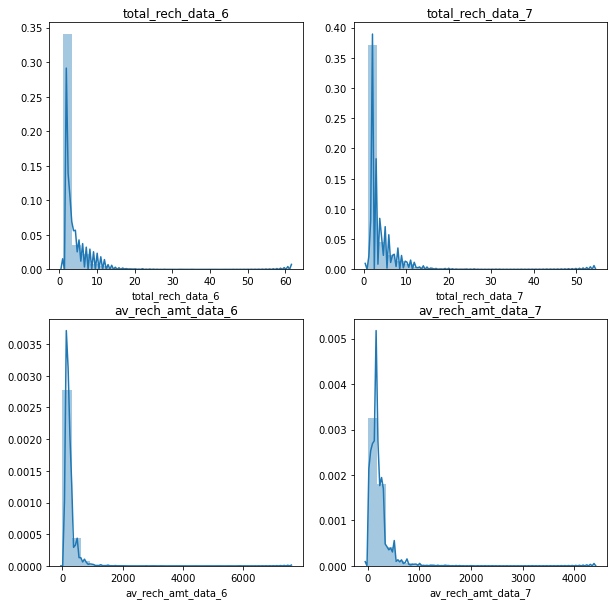

In [13]:
# Let us look at the distribution to find out the value to fill
# total_rech_data_* and av_rech_amt_data_*
# We are just checking 6 and 7 months here since these are the months used to filter high value customers


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
sns.distplot(telecom_data_master.total_rech_data_6.dropna(),bins=25,kde=True)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
sns.distplot(telecom_data_master.total_rech_data_7.dropna(),bins=25,kde=True)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
sns.distplot(telecom_data_master.av_rech_amt_data_6.dropna(),bins=25,kde=True)


# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
sns.distplot(telecom_data_master.av_rech_amt_data_7.dropna(),bins=25,kde=True)

Variables are numeric as seen from the description above and distribution somewhat resembles the 'power law'. The minimum value as seen from above is 1, and not zero. There are rows with missing values against date of recharges indicating that no recharge was done in that particular month. 

**Thus, we will assume no recharge was done in that month/date and missing values will be imputed with 0.**

In [14]:
#Impute the null values with 0 for the above analyzed variables
telecom_data_master.total_rech_data_6.fillna(value=0, inplace=True)
telecom_data_master.total_rech_data_7.fillna(value=0, inplace=True)
telecom_data_master.total_rech_data_8.fillna(value=0, inplace=True)
telecom_data_master.total_rech_data_9.fillna(value=0, inplace=True)

telecom_data_master.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom_data_master.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom_data_master.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom_data_master.av_rech_amt_data_9.fillna(value=0, inplace=True)

Now after imputing few values of these important variables lets check the status of other null values in the dataset.

In [15]:
#Check the status of null values
colmns_missing_data = round(100*(telecom_data_master.isnull().sum()/len(telecom_data_master.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64

None of the above variables seem important so lets drop them.

In [16]:
col_missing_data = round(100*(telecom_data_master.isnull().sum()/len(telecom_data_master.index)), 2)
drop_missing_values_cols = col_missing_data[col_missing_data >= 70].index
telecom_data_master.drop(columns=drop_missing_values_cols, axis=1, inplace=True)
print('Number of cols droped here  = ', len(drop_missing_values_cols))
telecom_data_master.shape

Number of cols droped here  =  24


(99999, 208)

In [17]:
#Now lets check the status of data in general
round(100*(telecom_data_master.isnull().sum()/len(telecom_data_master.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
fb6_1.0           0.00
fb7_0.0           0.00
fb7_1.0           0.00
fb8_0.0           0.00
fb8_1.0           0.00
Length: 208, dtype: float64

Now since the data seems to be in pretty good shape lets filter out the data for high value customers.
As per the description the high value customers are filtered based on data from good phase i.e: 6 and 7 month. So we will use the data from these months to filter.

Also from the data dictionary seems that we have average amount of recharges done for data packs per month against total number of data pack recharges. Based on this we will **DERIVE** as new variable **TOTAL AMOUNT DATA RECHARGE DONE PER MONTH** and then use this variable to filter the high value customers.

### *Derived Variable - 1: total_rech_data_amt**

In [18]:
# New DERIVED Columns for Total Data Recharge Amount
telecom_data_master['total_rech_data_amt_6'] = telecom_data_master['total_rech_data_6']*telecom_data_master['av_rech_amt_data_6']
telecom_data_master['total_rech_data_amt_7'] = telecom_data_master['total_rech_data_7']*telecom_data_master['av_rech_amt_data_7']
telecom_data_master['total_rech_data_amt_8'] = telecom_data_master['total_rech_data_8']*telecom_data_master['av_rech_amt_data_8']
telecom_data_master['total_rech_data_amt_9'] = telecom_data_master['total_rech_data_9']*telecom_data_master['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_* since its of no more significance
drop_data_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

#Drop the original columns since they are no more required and also reduce the dimensionality of dataset.
telecom_data_master.drop(drop_data_columns, axis=1, inplace=True)

### *Derived Variable - 2: avg_rech_amt_6_7*
Average recharge amount done by customer in good phase (6th and 7th month)

#### Filter the high value customers

In [19]:
telecom_data_master['avg_rech_amt_6_7'] = round((telecom_data_master['total_rech_amt_6'] + telecom_data_master['total_rech_data_amt_6']+
                                       telecom_data_master['total_rech_amt_7'] + telecom_data_master ['total_rech_data_amt_7'])/2,2)


# Filter for High Value Customers
telecom_data_master = telecom_data_master.loc[(telecom_data_master['avg_rech_amt_6_7'] > telecom_data_master['avg_rech_amt_6_7'].quantile(0.70))]

#Drop the columns since these are no more required
telecom_data_master.drop('avg_rech_amt_6_7', axis=1, inplace=True)

#check shape of dataset
print('Dataframe Shape: ', telecom_data_master.shape)

Dataframe Shape:  (29953, 204)


Now lets take care of the variables which are not in standard naming format to match with the naming convention of other columns. <column_name>_<month_in_number>.

In [20]:
#rename the columns in standard naming format as other columns
telecom_data_master.rename(columns={'jun_vbc_3g': 'vbc_3g_6',
                        'jul_vbc_3g': 'vbc_3g_7',
                        'aug_vbc_3g': 'vbc_3g_8',
                        'sep_vbc_3g': 'vbc_3g_9'
                       }, inplace=True)

### ***Tag the churners***

Now since we have all the information needed about the high value customers and so on, lets tag the churners in the 9th phase and then filter the high value customers based of the **derived columns** above.

In [21]:
#Since 9th month is considered as the churn phase we will consider only data in 9th month
#for finding churners. As given in the problem statement use below columns for same.
churn_phase = telecom_data_master.loc[:,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

#Here we find all the churners whose last month incoming and outgoing
#And data usage 2G and 3G is 0
churn_data =telecom_data_master.loc[(churn_phase.total_ic_mou_9 == 0.00) 
                    & (churn_phase.total_og_mou_9 == 0.00)
                    & (churn_phase.vol_2g_mb_9 == 0.00)
                    & (churn_phase.vol_3g_mb_9 == 0.00), ['mobile_number']
                   ]

#Add new column for Churn and marked all the churned cutomers as 1
churn_data['churn'] = 1

# Merge the two dataframes: Original dataset df and churned dataset on mobile number
telecom_data_master = pd.merge(telecom_data_master, churn_data, how='outer', on='mobile_number')
telecom_data_master['churn'] = telecom_data_master['churn'].fillna(0)
telecom_data_master['churn'] = telecom_data_master['churn'].astype(int)

# Drop the 9th month columns as this column is not needed for building predictive model
mont_9_columns = list(map(lambda x : x.endswith('_9'),telecom_data_master.columns))
telecom_data_master.drop(telecom_data_master.loc[:,mont_9_columns],axis = 1, inplace=True)   

#Check the dataset
print('Dataframe Shape: ', telecom_data_master.shape)

Dataframe Shape:  (29953, 157)


We still have 157 columns existing and these are huge columns. In order to reduce the dimensionality of dataset lets check **if there are any columns in the dataset that have single values. Since data variance in these columns will be less they will contain very less information and hence can be dropped.**

In [22]:
#Check the column with single value
single_vals = list(filter(lambda x : len(telecom_data_master[x].value_counts()) < 2, telecom_data_master.columns))
print('Single value columns: ',single_vals)

#Drop these columns since they dont contain much data information
telecom_data_master.drop(single_vals,axis=1, inplace=True) 

#Check the dataset
print('Dataframe Shape: ', telecom_data_master.shape)

Single value columns:  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
Dataframe Shape:  (29953, 144)


Now lets take care of the rows with missing/null values.

In [23]:
#Check the sum of misisng values in each row
rows_missing_data = telecom_data_master.isnull().sum(axis=1)
round((rows_missing_data[rows_missing_data > 0].value_counts()/rows_missing_data.sum())*100,2)

27    1.21
1     0.52
28    0.38
81    0.37
54    0.27
55    0.09
56    0.04
2     0.03
82    0.03
29    0.02
83    0.01
dtype: float64

As seen from the above output there seems to be 27 rows with null values which constitute 1% of the whole dataset. So we can drop them and impute the rest. 

In [24]:
# 1% of rows has more than or equal to 27 missing values
drop_rows = telecom_data_master.isnull().sum(axis=1) >= 27

# drop rows with missing values greater >= 27
telecom_data_master = telecom_data_master[telecom_data_master.isnull().sum(axis=1) < 27]

#Check the dataset
print('Dataframe Shape after dropping rows: ', telecom_data_master.shape); 

Dataframe Shape after dropping rows:  (28460, 144)


Now lets check the remaining null columns and what they are.

In [25]:
# look at the column summary for null values
temp = round(100*(telecom_data_master.isnull().sum()/len(telecom_data_master.index)), 2)
temp[temp > 0]

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64

These basically seem the datetime columns. So let convert them to the datetime format and see if we can impute the values with 0 or some other value.

In [26]:
# covert date columns to python datetime format
col_date = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]

telecom_data_master[col_date].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
1           6/27/2014           7/25/2014           8/26/2014
2           6/25/2014           7/31/2014           8/30/2014
3           6/30/2014           7/31/2014           8/31/2014
4           6/18/2014            7/7/2014           8/24/2014
5           6/30/2014           7/30/2014           8/26/2014

In [27]:
# Convert the columns to datetime format
for col in col_date:
    telecom_data_master[col] = pd.to_datetime(telecom_data_master[col])

#Check the data
telecom_data_master[col_date].head()
telecom_data_master[col_date].describe()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
1          2014-06-27          2014-07-25          2014-08-26
2          2014-06-25          2014-07-31          2014-08-30
3          2014-06-30          2014-07-31          2014-08-31
4          2014-06-18          2014-07-07          2014-08-24
5          2014-06-30          2014-07-30          2014-08-26

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8
count                 28427                28408                28184
unique                   30                   31                   31
top     2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
freq                   8108                 7468                 6132
first   2014-06-01 00:00:00  2014-07-01 00:00:00  2014-08-01 00:00:00
last    2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00

Lets create another **DERIVE VARIABLE** of type numeric based on the date-time variables for the number of recharge days left/when the customer is likely to recharge.

### *Derived Variable - 3: recharge_day_**
Number of recharge days left/when the customer is next likely to recharge.

This is important derived variable because if the customer misses this timeline he is more likely to churn.

In [28]:
#Derive the recharge_day_* variable
import datetime

#Checkin the last date of each month as required
last_date_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

#Calculate the recharge day and append it to the original dataset
telecom_data_master["recharge_day_6"]      = (last_date_6 - telecom_data_master.date_of_last_rech_6).astype('timedelta64[D]')
telecom_data_master["recharge_day_7"]      = (last_date_7 - telecom_data_master.date_of_last_rech_7).astype('timedelta64[D]')
telecom_data_master["recharge_day_8"]      = (last_date_8 - telecom_data_master.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["recharge_day_6", "recharge_day_7", "recharge_day_8"]

#Check for null values if any
print("------Check for null values------")
telecom_data_master[day_columns].isnull().sum()

#Check the dataset
telecom_data_master[day_columns].info()
telecom_data_master[day_columns].describe()

------Check for null values------


recharge_day_6     33
recharge_day_7     52
recharge_day_8    276
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28460 entries, 1 to 29952
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recharge_day_6  28427 non-null  float64
 1   recharge_day_7  28408 non-null  float64
 2   recharge_day_8  28184 non-null  float64
dtypes: float64(3)
memory usage: 889.4 KB


recharge_day_6  recharge_day_7  recharge_day_8
count    28427.000000    28408.000000    28184.000000
mean         3.385830        3.484335        4.146040
std          4.488955        4.286559        5.100992
min          0.000000        0.000000        0.000000
25%          0.000000        0.000000        1.000000
50%          2.000000        2.000000        3.000000
75%          4.000000        5.000000        6.000000
max         29.000000       30.000000       30.000000

There are quite a few null values in the derived columns. From the above information it seems like mean and median are somewhat different and there is huge difference in the min and max values. So we will impute the null values with the median values rather than mean.

In [29]:
# Mean & Median are different: imputing with median value for recharge days left 
telecom_data_master.loc[np.isnan(telecom_data_master['recharge_day_6']), ['recharge_day_6']] = telecom_data_master['recharge_day_6'].median()
telecom_data_master.loc[np.isnan(telecom_data_master['recharge_day_7']), ['recharge_day_7']] = telecom_data_master['recharge_day_7'].median()
telecom_data_master.loc[np.isnan(telecom_data_master['recharge_day_8']), ['recharge_day_8']] = telecom_data_master['recharge_day_8'].median()


#Check the null status after imputing the values
round(100*(telecom_data_master.isnull().sum()/len(telecom_data_master.index)), 2)
telecom_data_master.shape

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
                        ... 
total_rech_data_amt_8    0.0
churn                    0.0
recharge_day_6           0.0
recharge_day_7           0.0
recharge_day_8           0.0
Length: 147, dtype: float64

(28460, 147)

Now it seems like all the null values are being taken care off. 

Lets drop the old date time columns since now they are of no more use.

In [30]:
#Drop the old date time columns since they are of no more use.
telecom_data_master.drop(col_date, axis=1, inplace=True)

#Check dataset
telecom_data_master.shape

(28460, 144)

Based on the additional data description lets derive another variable aon_years which will convert the existing aon variable (age on network) which is in days to years so that we will know how many years a customer has been on the same network. Old customers tend to be more loyal and they find it hard to shift until and unless there is some solid reason to shift the network. If customers with high AON values are churning then that is serious concern and these customer behaviours need to be analyzed in detail.

### *Derived Variable - 4: aon_years (Number of years a customer is on network)**

In [31]:
# Conversion of the number of months to years for customer on same network
telecom_data_master['aon_years']=telecom_data_master['aon']/365

#Convert them to integer
telecom_data_master['aon_years'] = telecom_data_master['aon_years'].astype(int)

#Check the data
telecom_data_master['aon_years'].head()

1    2
2    0
3    1
4    1
5    3
Name: aon_years, dtype: int32

In [32]:
#Drop the original column since no more required
telecom_data_master = telecom_data_master.drop(columns='aon',axis=1)
telecom_data_master.shape

(28460, 144)

Now lets check for the outliers in the dataset.

In [33]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_data_master.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.846000e+04  28460.000000  28460.000000  28460.000000  28460.000000   
mean    7.001214e+09    560.681677    571.002792    526.398454    265.370601   
std     6.877214e+05    449.186806    480.321084    500.987020    458.939982   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000623e+09    317.675750    322.740000    254.999500     20.155000   
50%     7.001218e+09    485.421500    489.337000    443.153000     90.030000   
75%     7.001806e+09    699.201500    705.215500    673.177250    299.040000   
90%     7.002166e+09    989.034600   1002.018600    991.385000    761.142000   
95%     7.002285e+09   1232.848650   1268.694950   1267.638400   1136.321000   
99%     7.002385e+09   1955.722150   1999.518040   1990.001880   2147.454800   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  28460.000000  28460.000000  28460.000000  28460.000000  28460.000000   
mean     276.154278    244.966389    379.958736    390.006591    350.373520   
std      482.972519    464.314412    479.427533    502.850561    485.890025   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.537500     14.887500     80.705000     80.380000     60.610000   
50%       89.910000     74.185000    231.535000    231.825000    199.940000   
75%      305.052500    257.792500    494.337500    506.532500    457.452500   
90%      802.402000    688.681000    899.381000    931.616000    845.118000   
95%     1206.341500   1103.186500   1256.611000   1292.606000   1187.778500   
99%     2220.592800   2176.466200   2303.222000   2434.877000   2221.281500   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       ...       fb8_0.0       fb8_1.0  total_rech_data_amt_6  \
count  ...  28460.000000  28460.000000           28460.000000   
mean   ...      0.057414      0.484610             445.362474   
std    ...      0.232636      0.499772            1418.133759   
min    ...      0.000000      0.000000               0.000000   
25%    ...      0.000000      0.000000               0.000000   
50%    ...      0.000000      0.000000              92.000000   
75%    ...      0.000000      1.000000             392.750000   
90%    ...      0.000000      1.000000            1057.000000   
95%    ...      1.000000      1.000000            2025.000000   
99%    ...      1.000000      1.000000            5130.000000   
max    ...      1.000000      1.000000          105644.000000   

       total_rech_data_amt_7  total_rech_data_amt_8         churn  \
count           28460.000000           28460.000000  28460.000000   
mean              528.289634             469.922578      0.055798   
std              1482.625991            1645.961032      0.229535   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%               100.000000              25.000000      0.000000   
75%               575.000000             342.000000      0.000000   
90%              1374.000000            1125.000000      0.000000   
95%              2432.000000            2268.000000      1.000000   
99%              6221.640000            5754.100000      1.000000   
max             55080.000000           89106.500000      1.000000   

       recharge_day_6  recharge_day_7  recharge_day_8     aon_years  
count    28460.000000    28460.000000    28460.000000  28460.000000  
mean         3.384223        3.481623        4.134926      2.872558  
std          4.486599        4.283111        5.077438      2.686318  
min          0.000000        0.000000        0.000000      0.000000  
25%          0.000000        0.000000        1.000000      1.000000  
50%          2.000000        2.000000        3.000000      2.000000

Since most of the outliers are revenue based columns and we will be modelling on usage based we will be not concerned about them.

In [34]:
#Check how many customers have churned and how many havent
telecom_data_master.churn.value_counts()

print("--------Percentage of churns------")
round(telecom_data_master.churn.value_counts()/len(telecom_data_master.churn)*100,2)

0    26872
1     1588
Name: churn, dtype: int64

--------Percentage of churns------


0    94.42
1     5.58
Name: churn, dtype: float64

The above output clearly states there is class imbalance where the non-churn rate is 95% whereas the churn rate is 6% in  the dataset. We will need to take care of this class imbalance during modelling.

# Exploratory Data Analysis (EDA)

Now lets analyze the data and see what additional information we can gather.

In [35]:
#Define few common methods for data visualization
# Solution code copied from stackoverflow and modified accordingly
# Link to stackflow: https://stackoverflow.com/a/48372659 
#This method display the value at the top of each bar in barplots
def showBarLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. 
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        #If the Bar value is float format the value to 1 Decimal Points
        if y_value.dtype == 'float64':
            label = "{:.1f}%".format(y_value)
        else:
            label = y_value
            
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
# This method plots the distribution of the given variable 
# and also plots a boxplot for variable against churn status for the value of dataframe and column passed.
def checkChurnStatus(df, col):
    plt.figure(figsize=(30,8))
    plt.suptitle(' Churn Status v/s ' +col ,fontsize=18)
    plt.subplot(1,2,1)
    sns.boxplot(x=df['churn'], y=df[col].apply(lambda x : np.log(x+1)), data=df)
    plt.subplot(1,2,2)
    ax = sns.barplot(x=df['churn'], y=df[col], data=df)
    showBarLabels(ax)

We will check the churn status against different variables based on the phases: Good Phase v/s Action Phase. This is done because any abnormality in customer behaviour in this phase is what we are on look out for.

Lets start by analyzing the data in the 8th month.

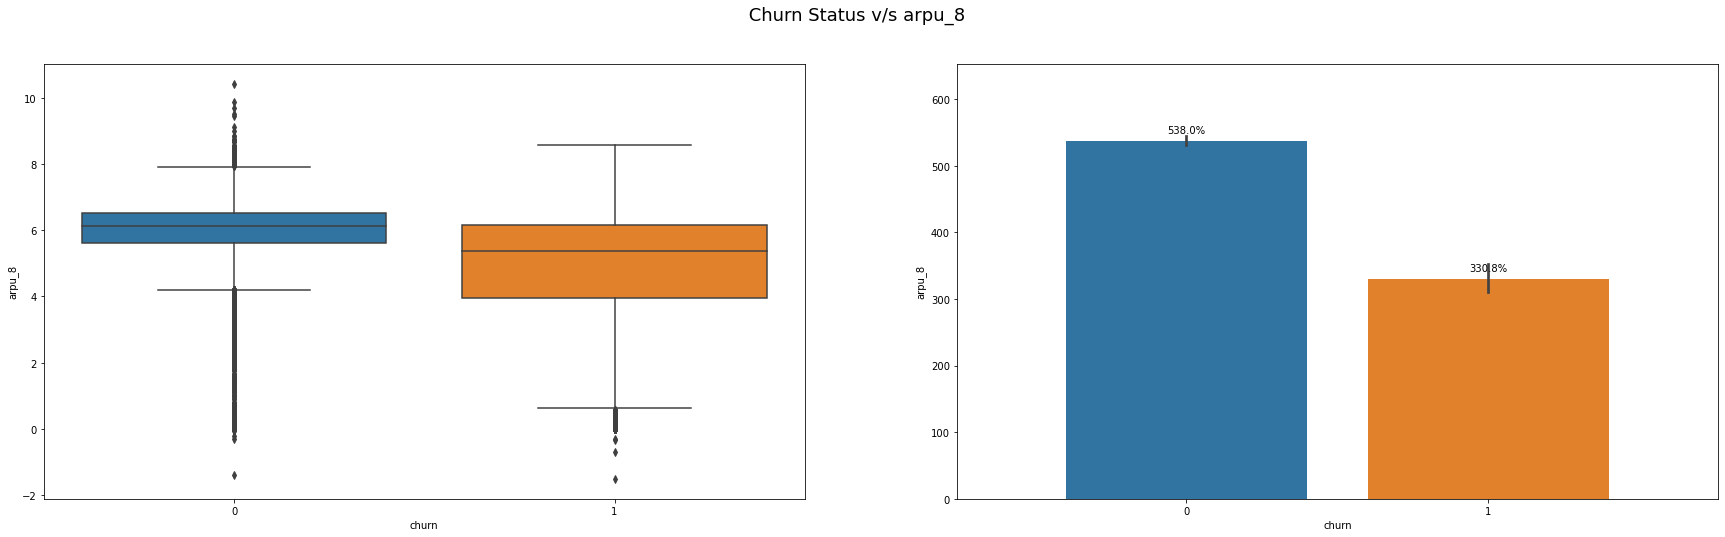

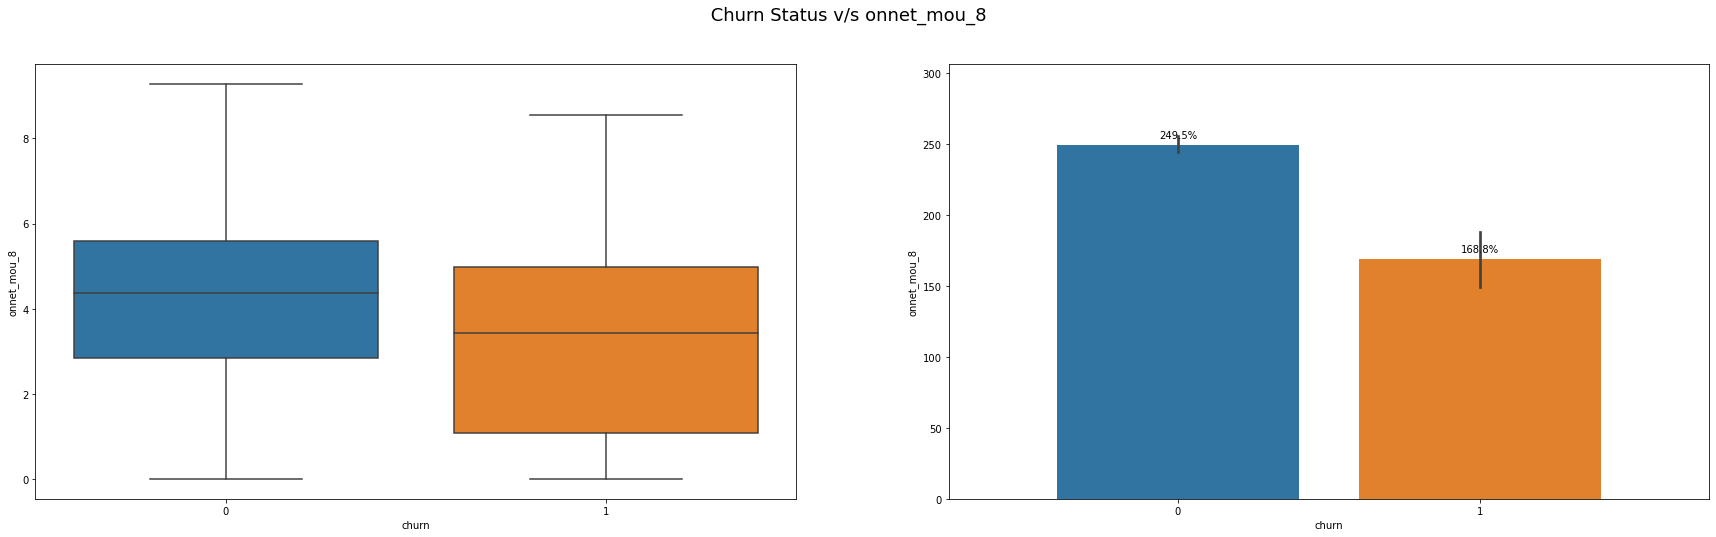

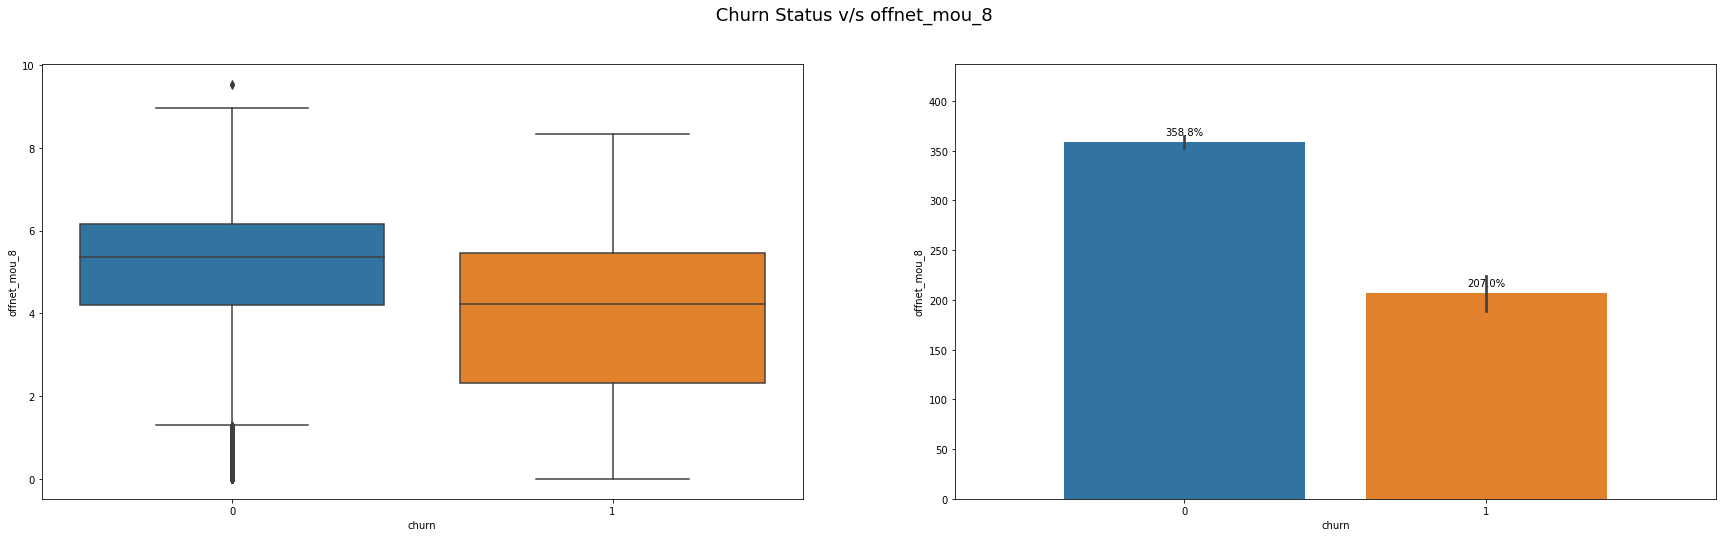

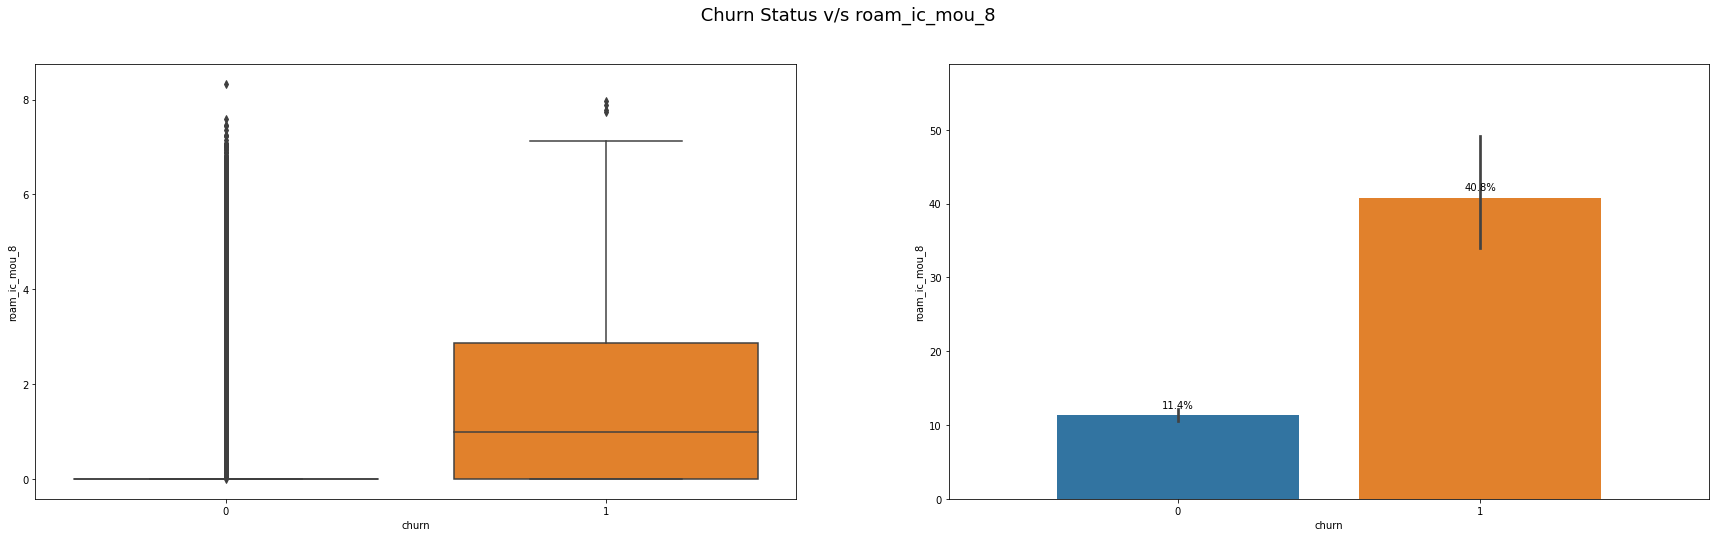

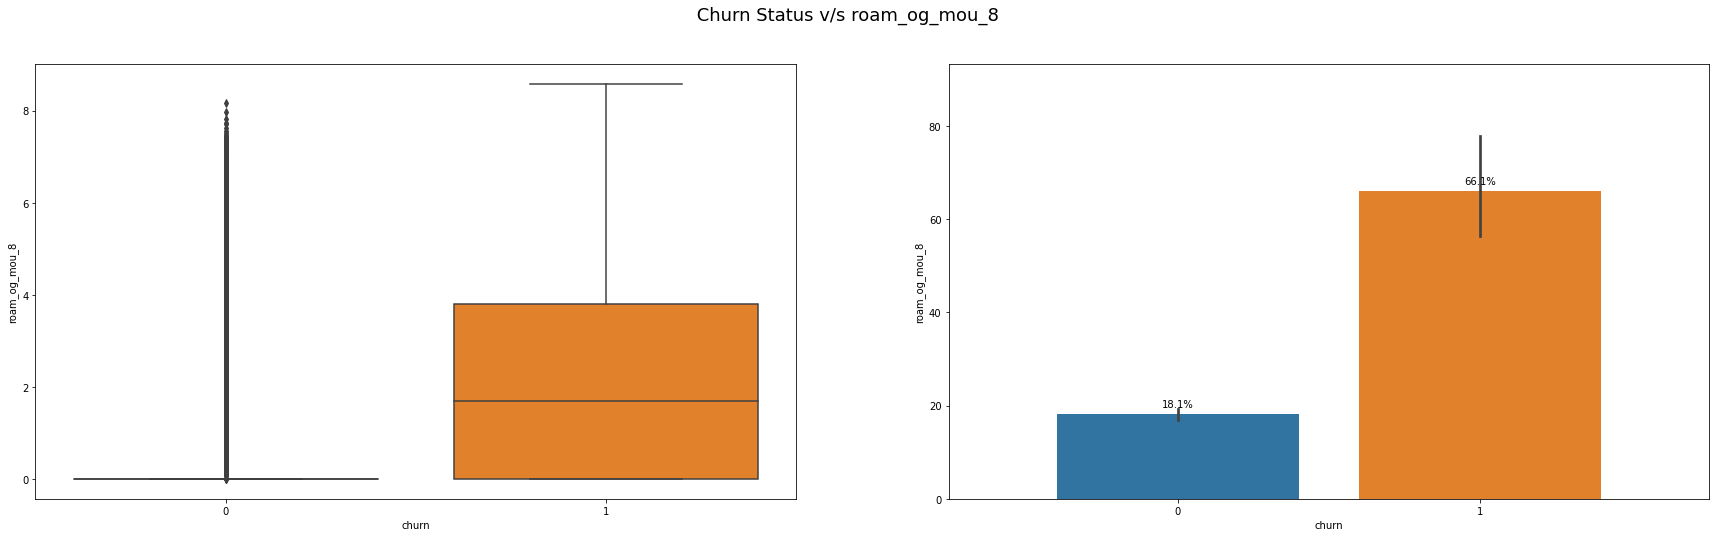

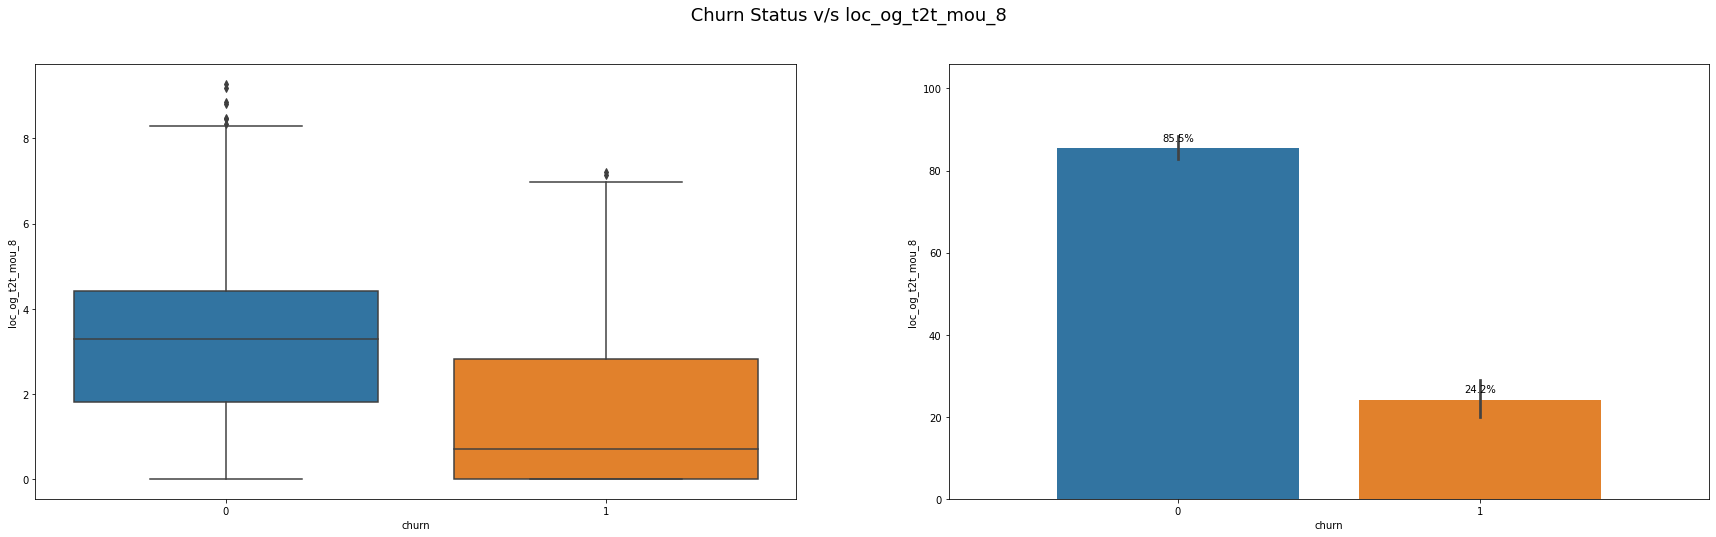

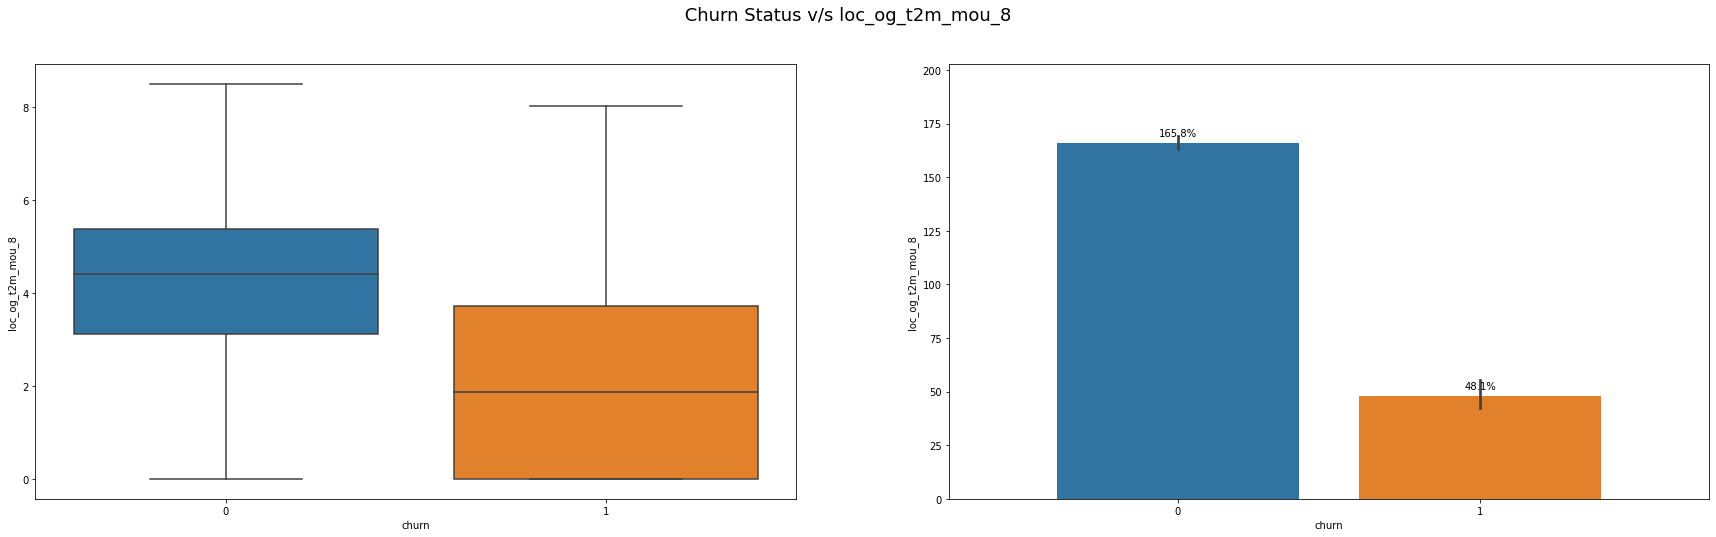

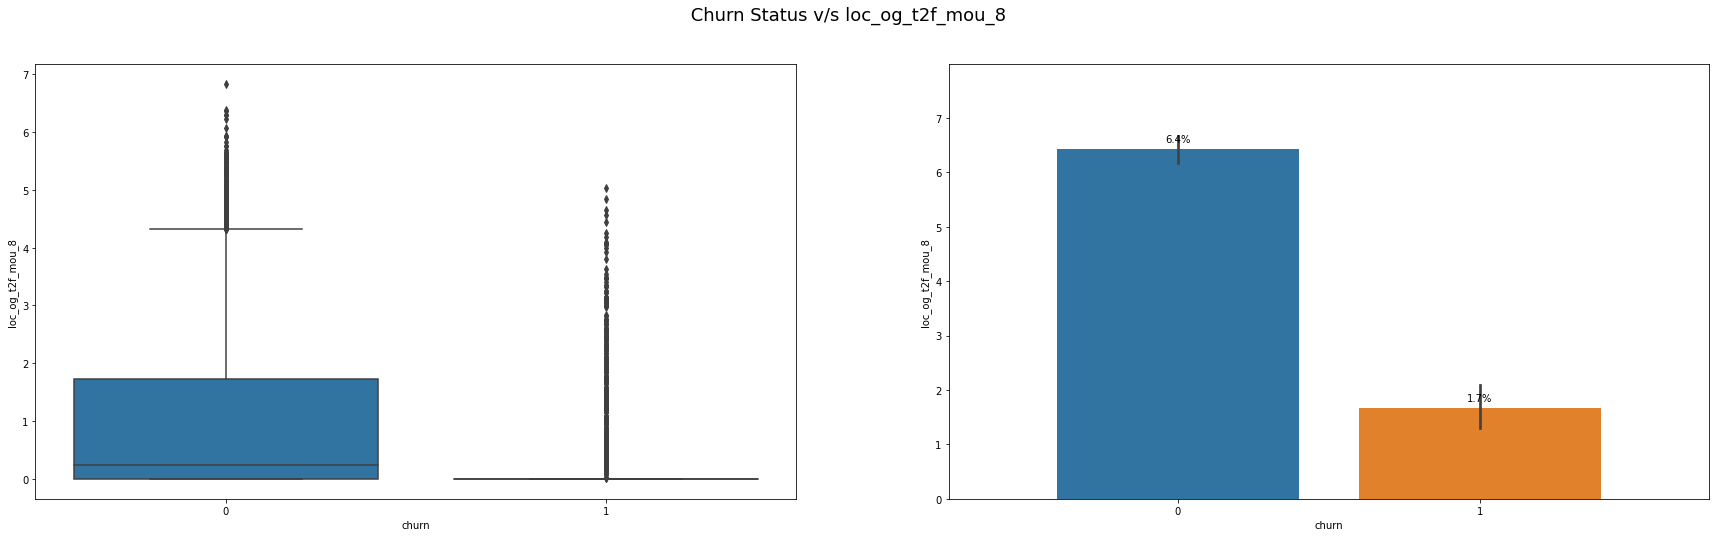

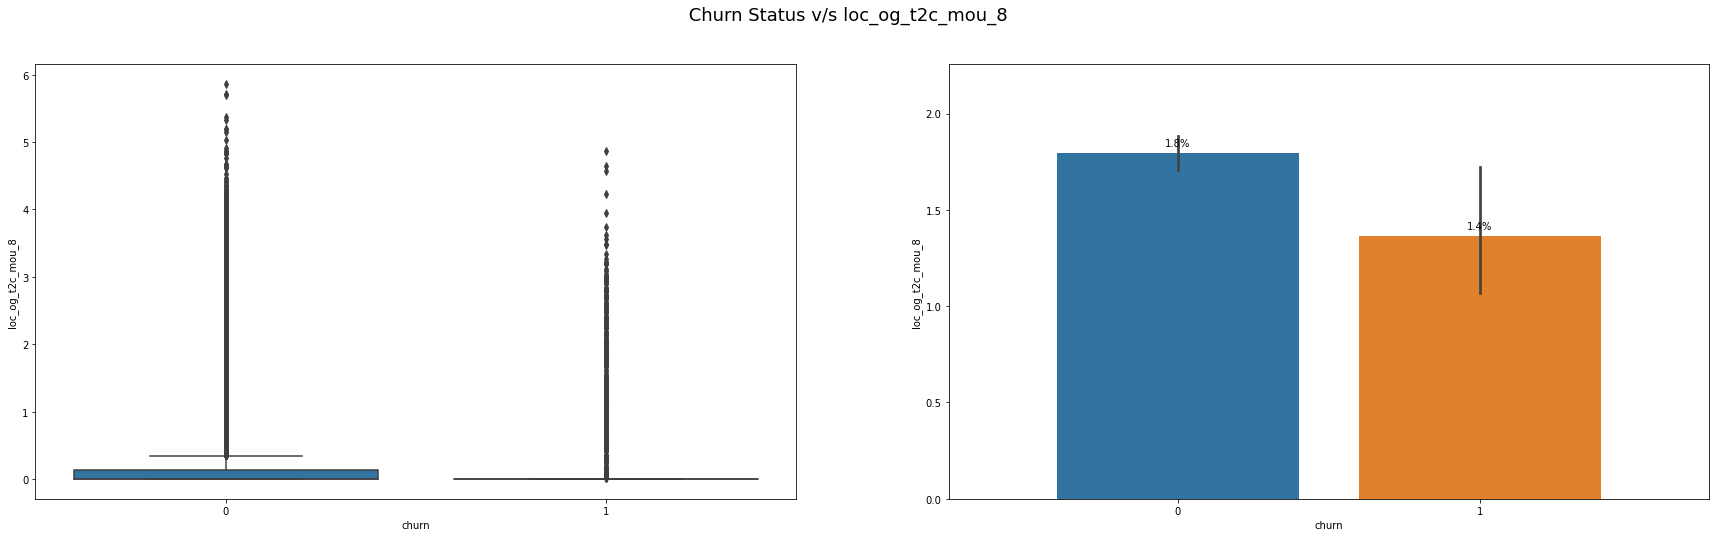

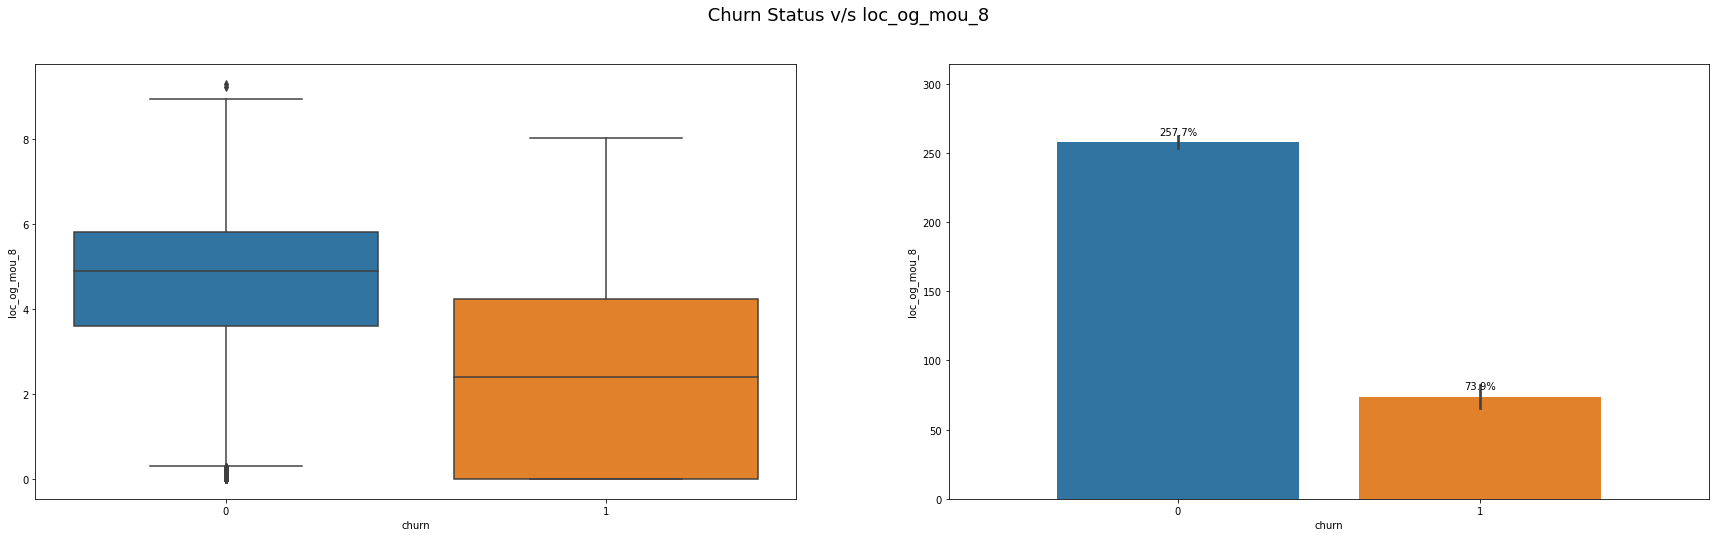

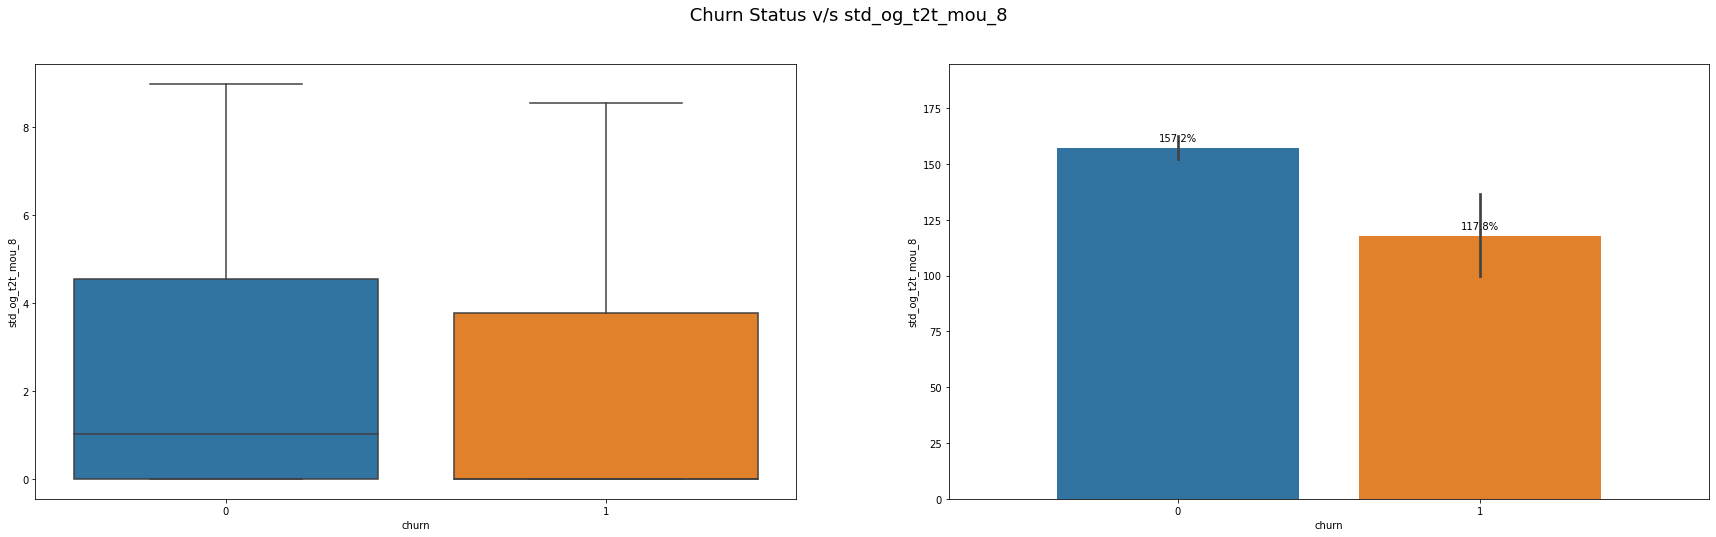

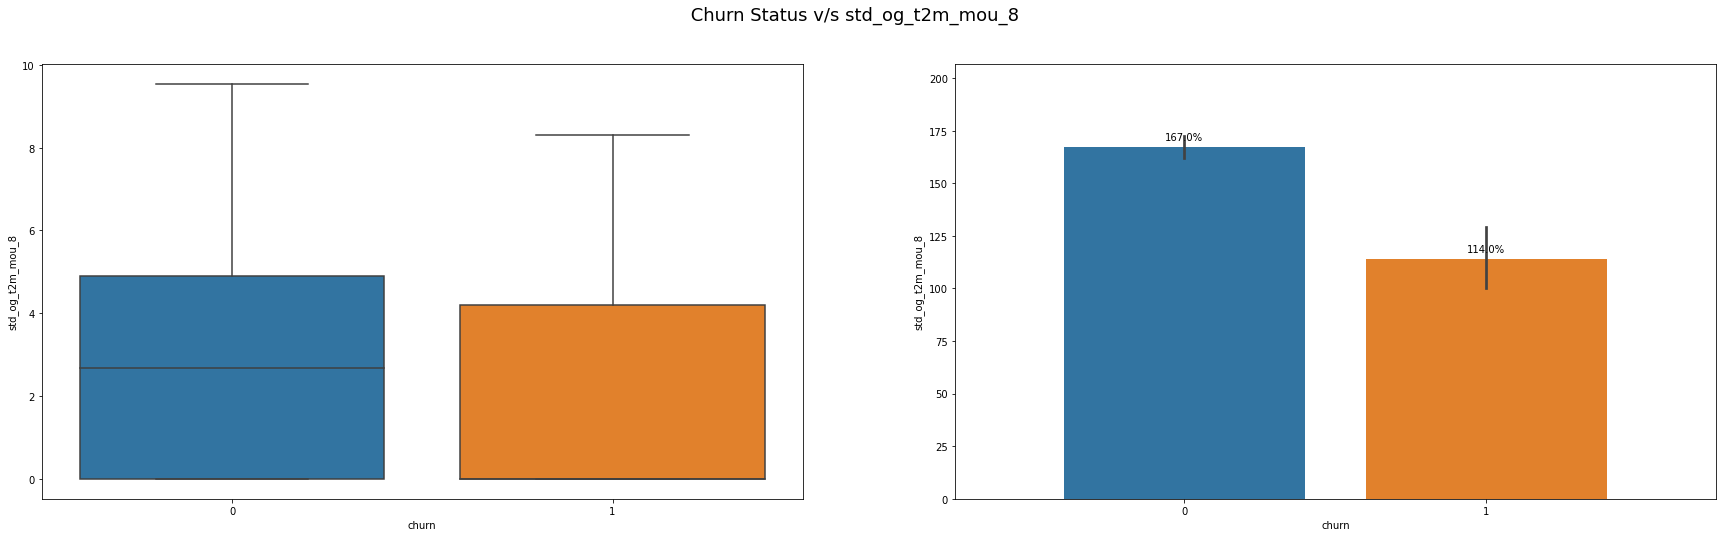

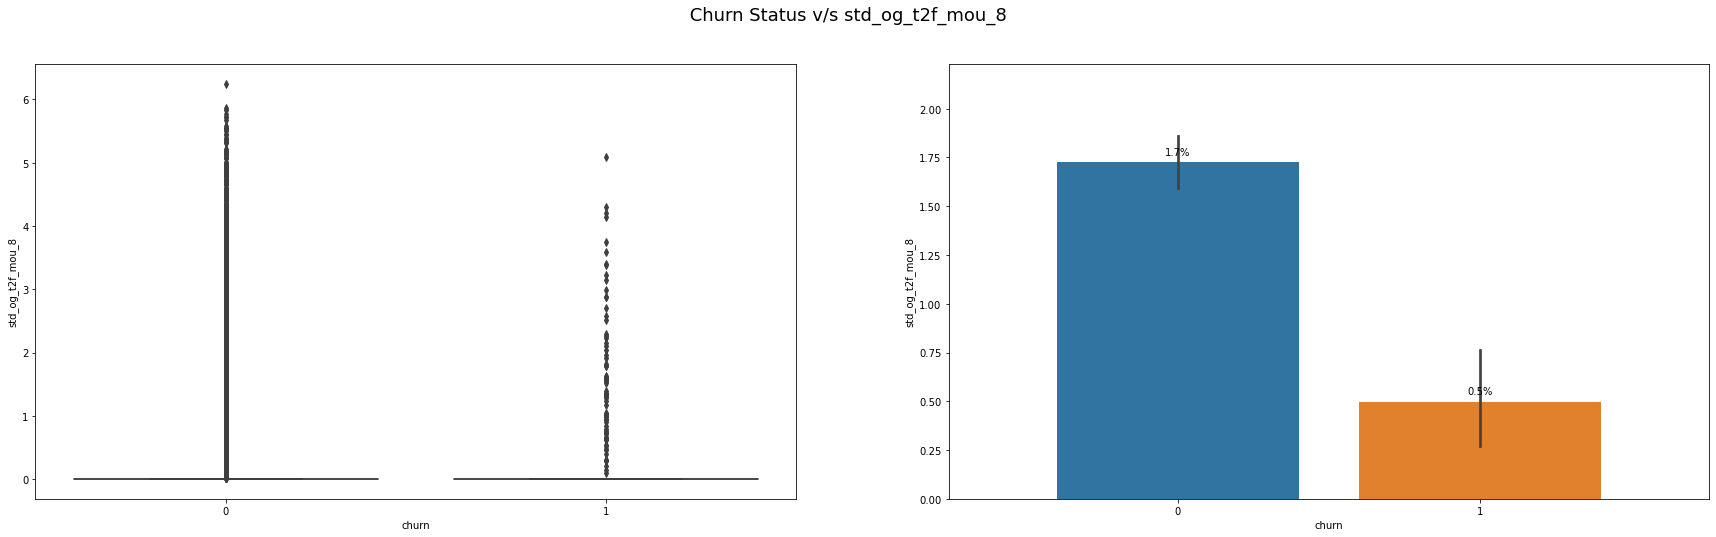

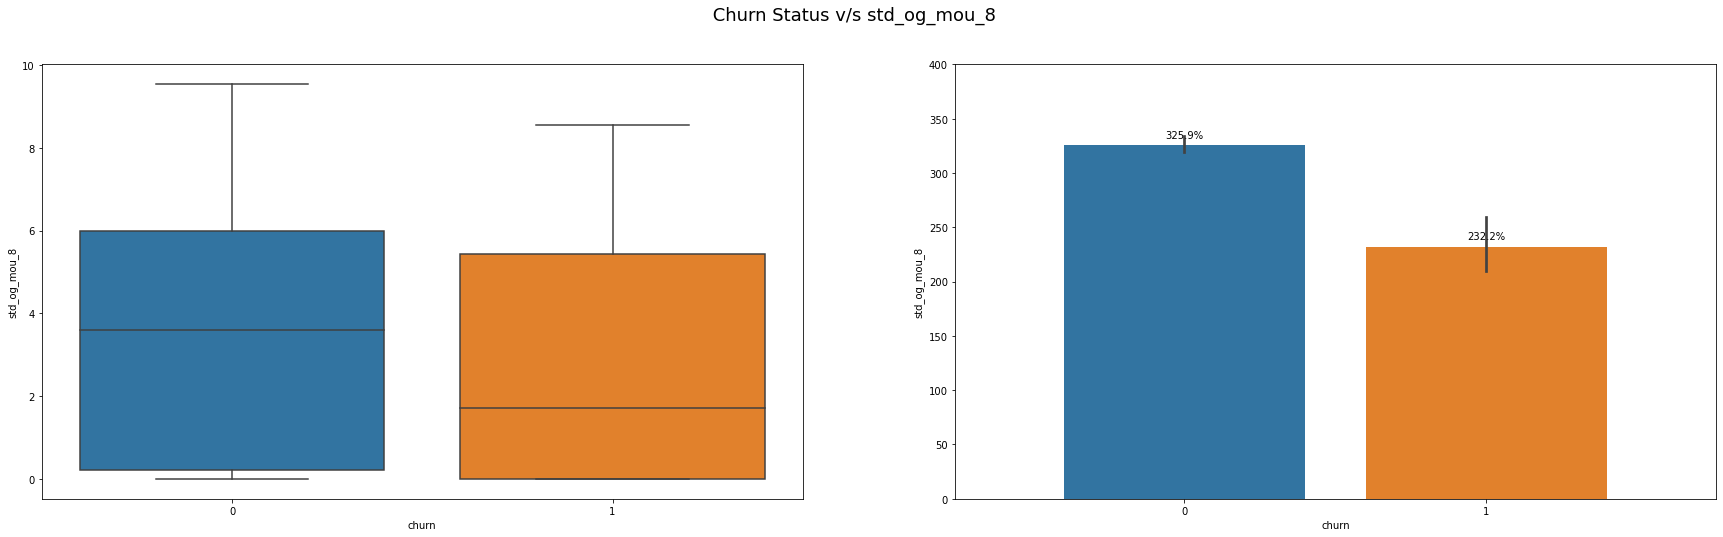

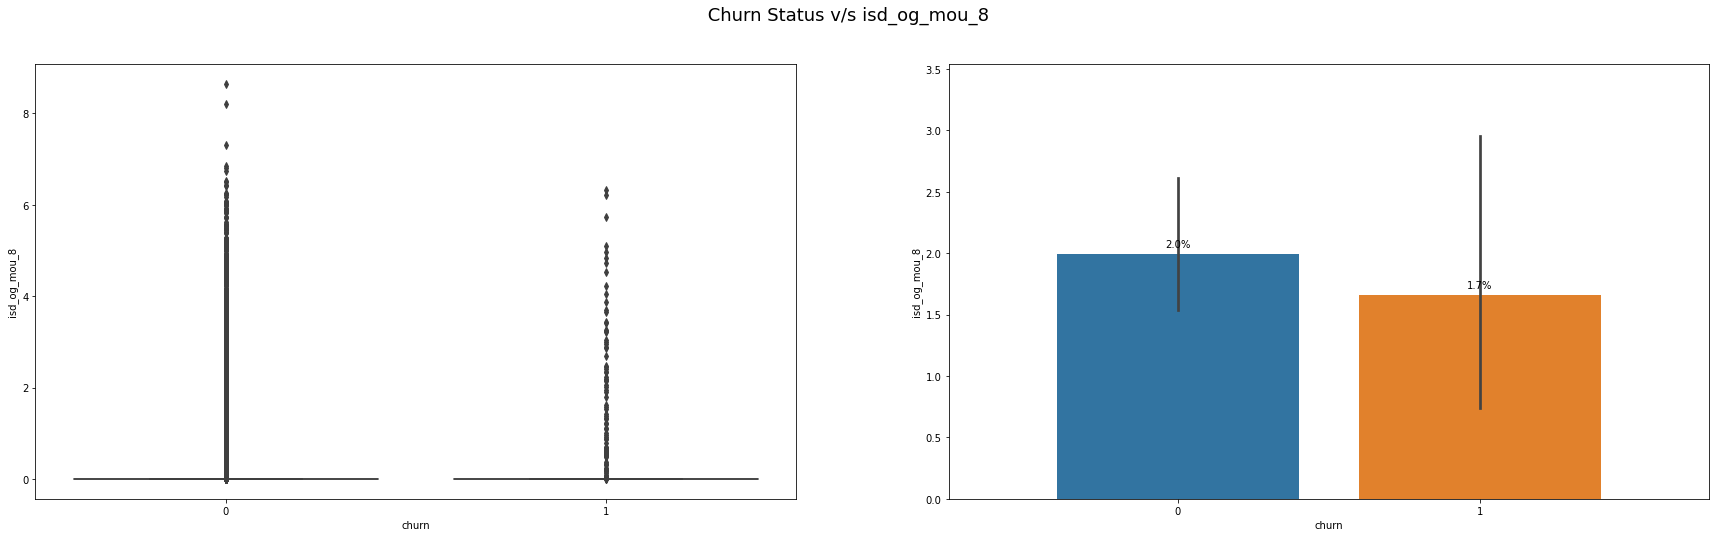

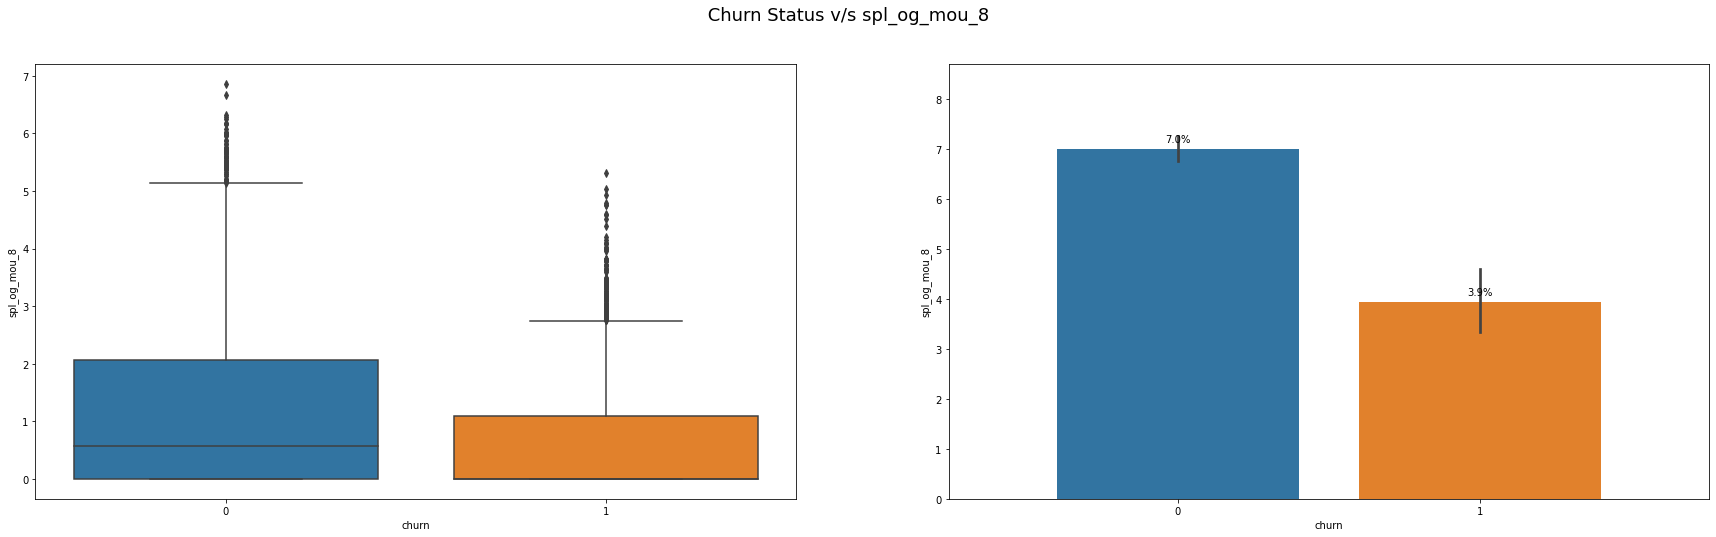

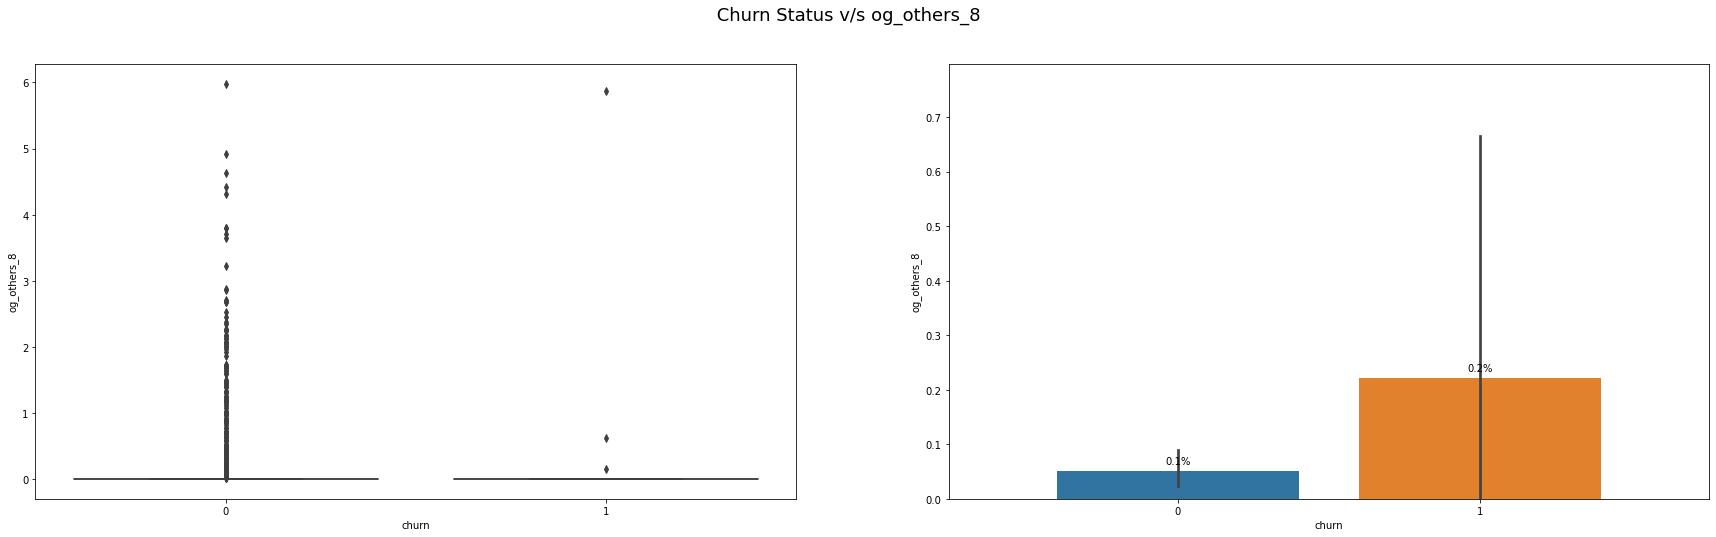

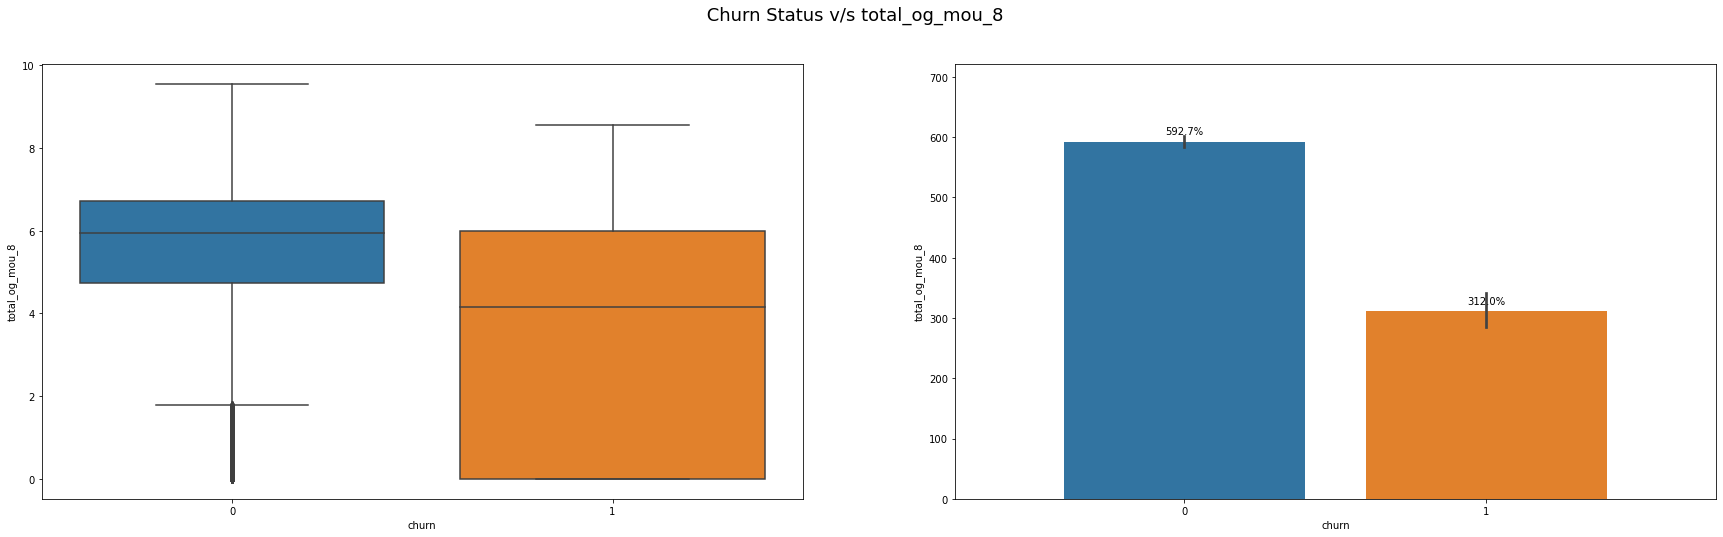

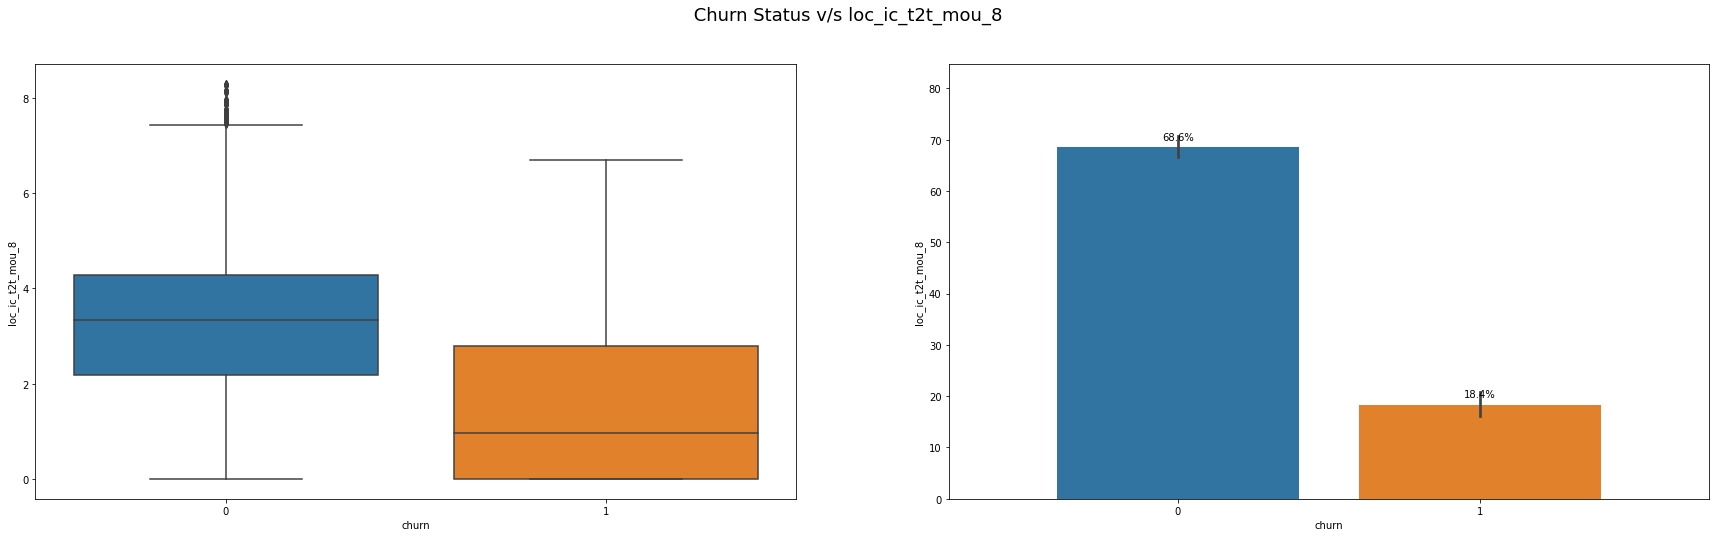

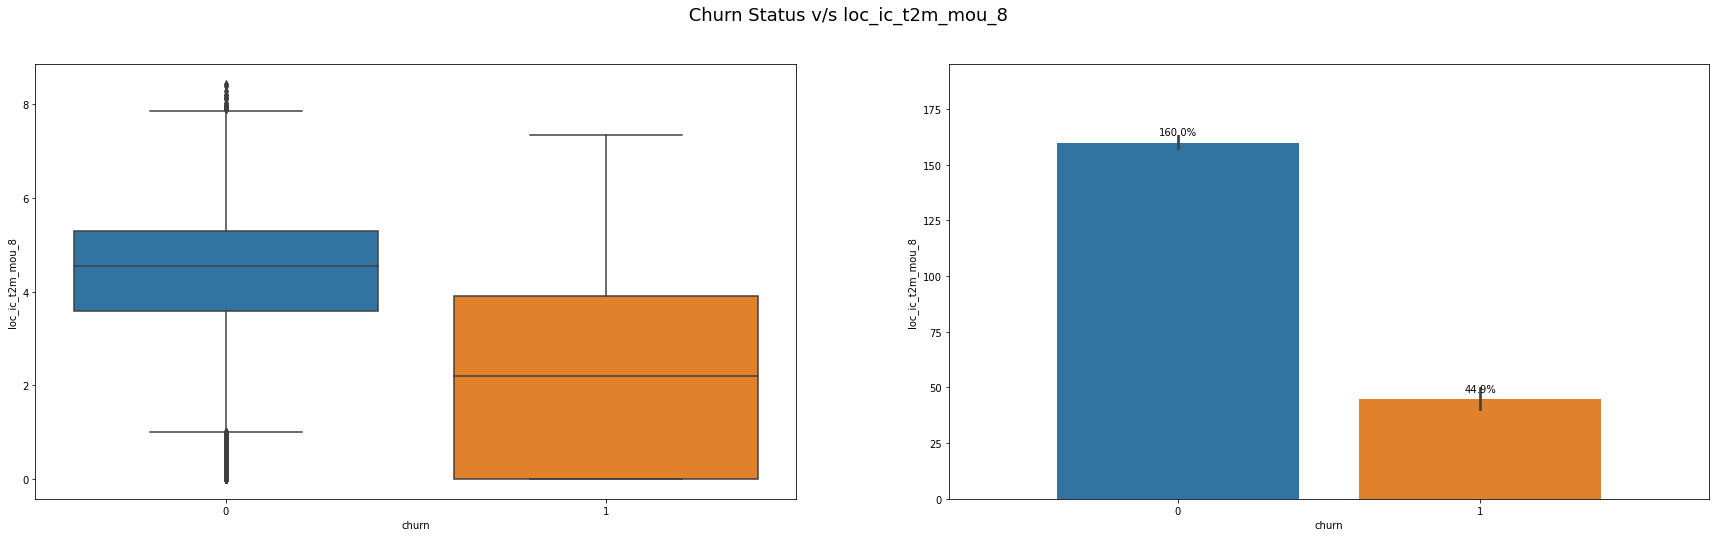

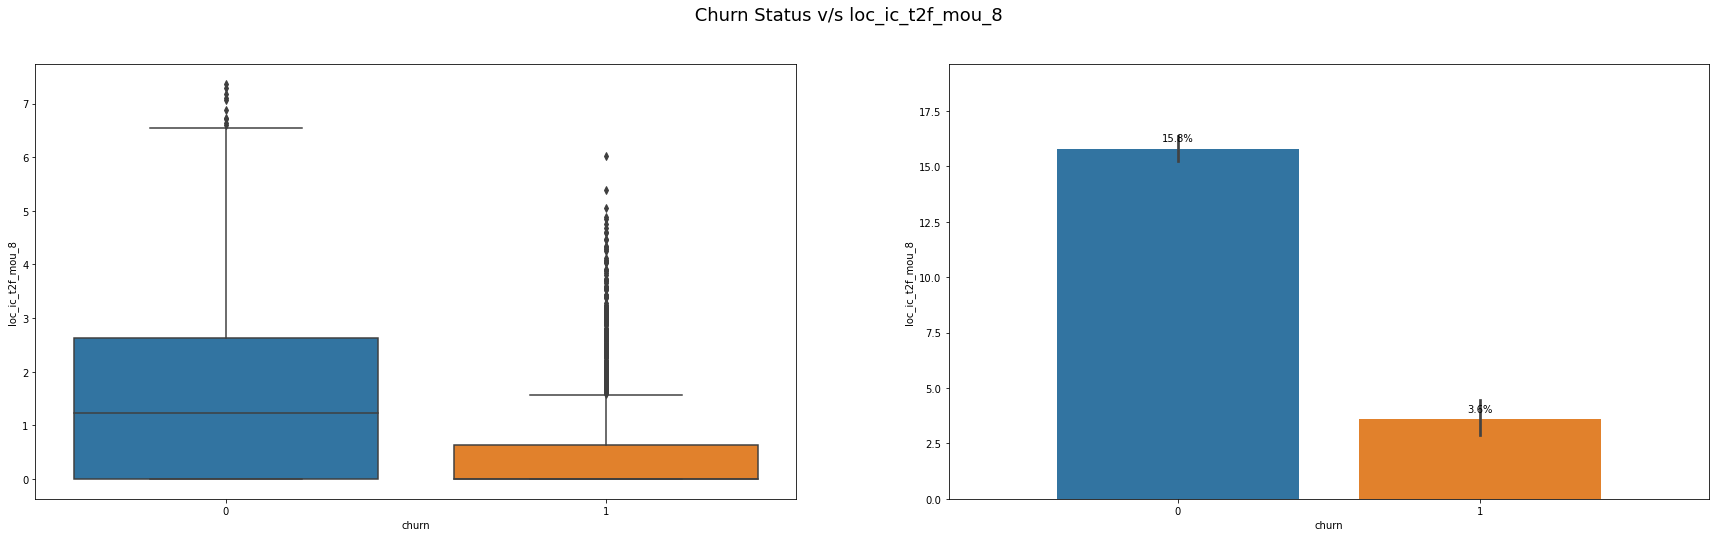

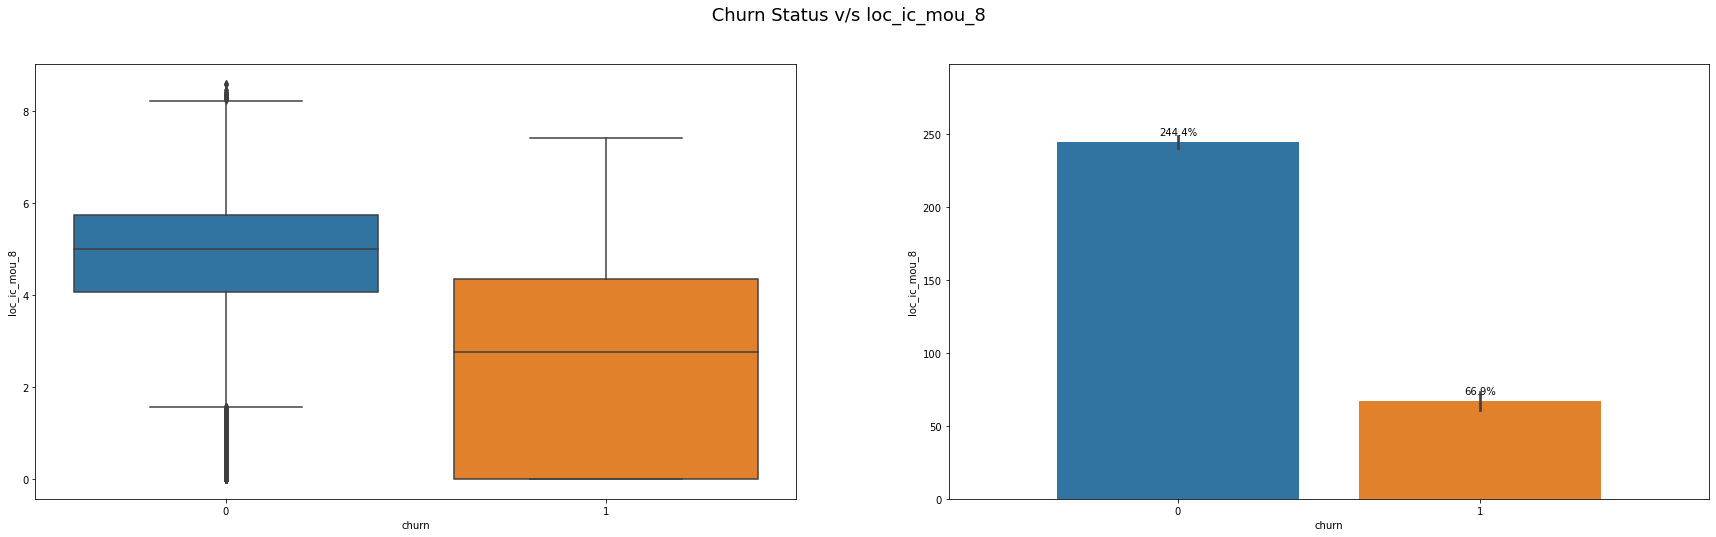

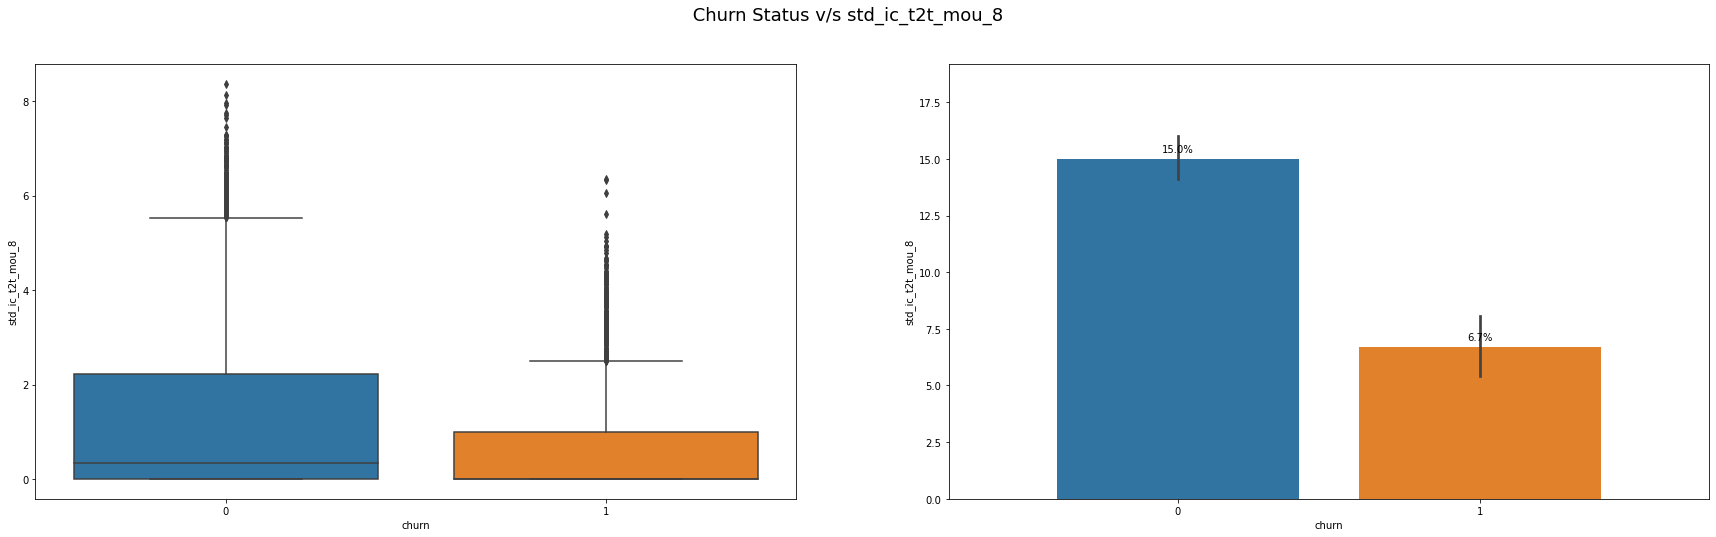

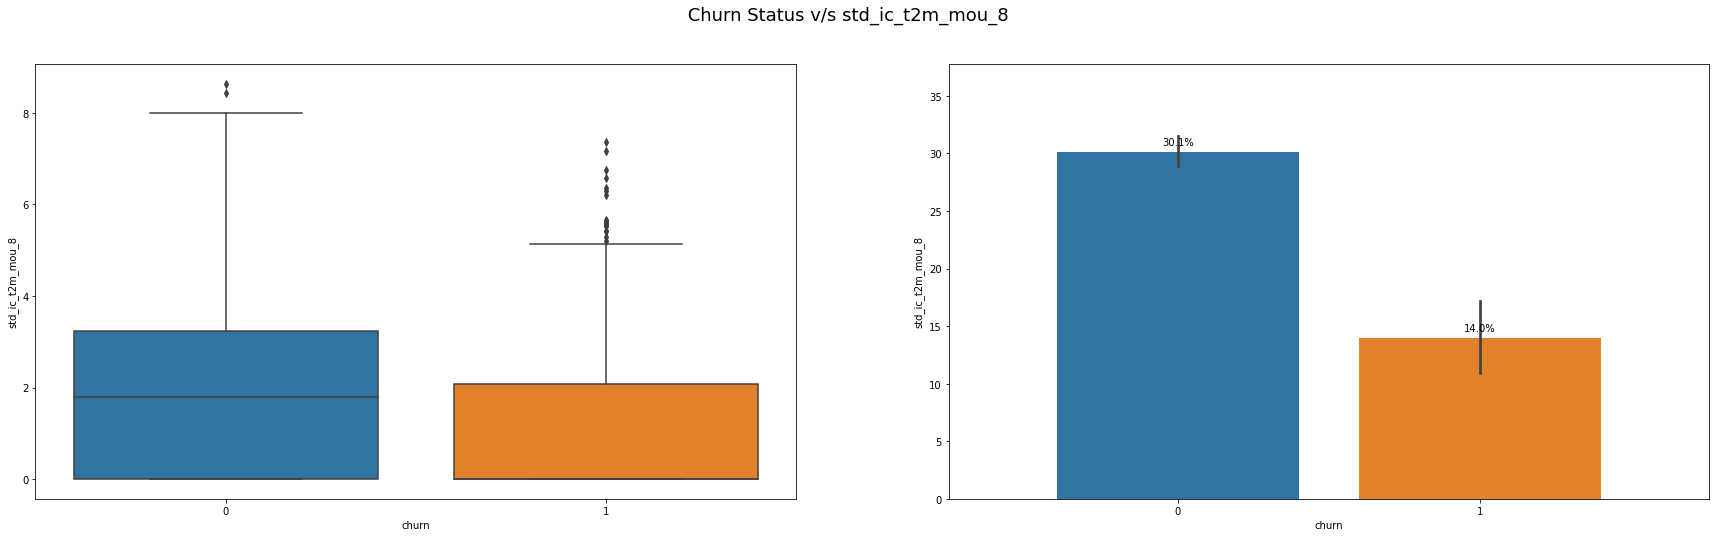

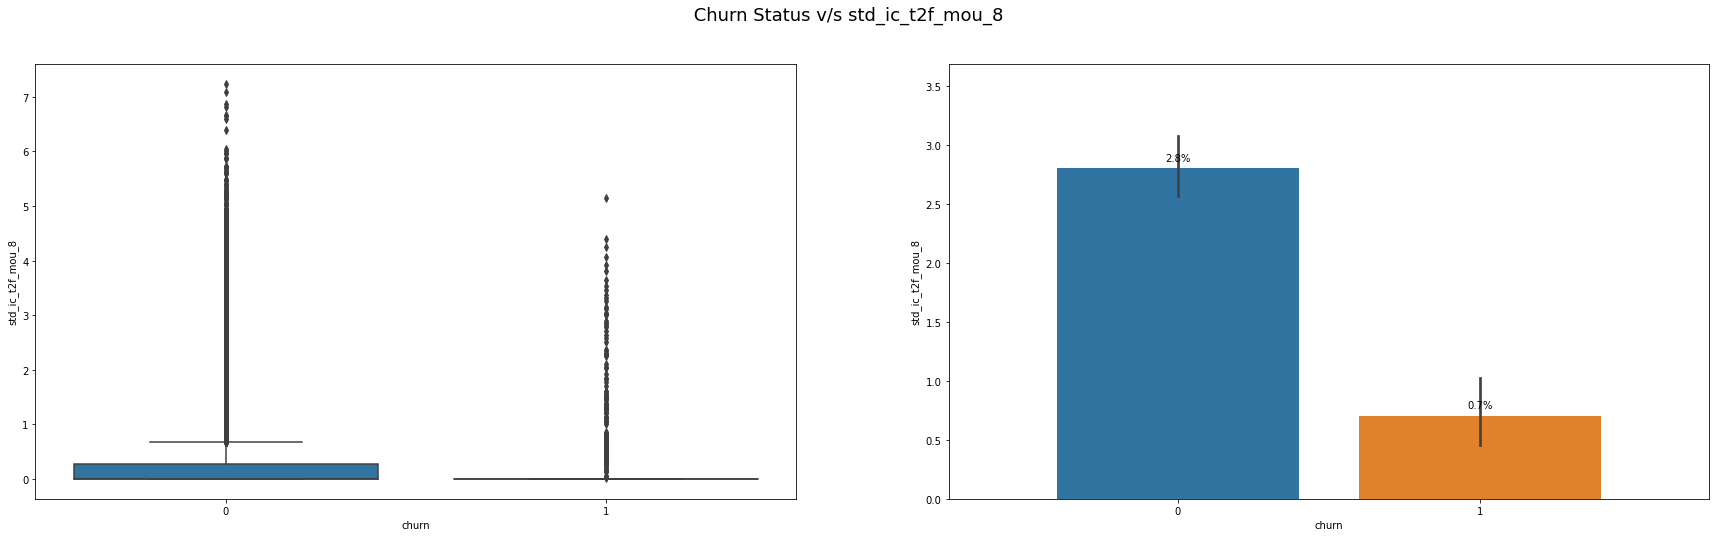

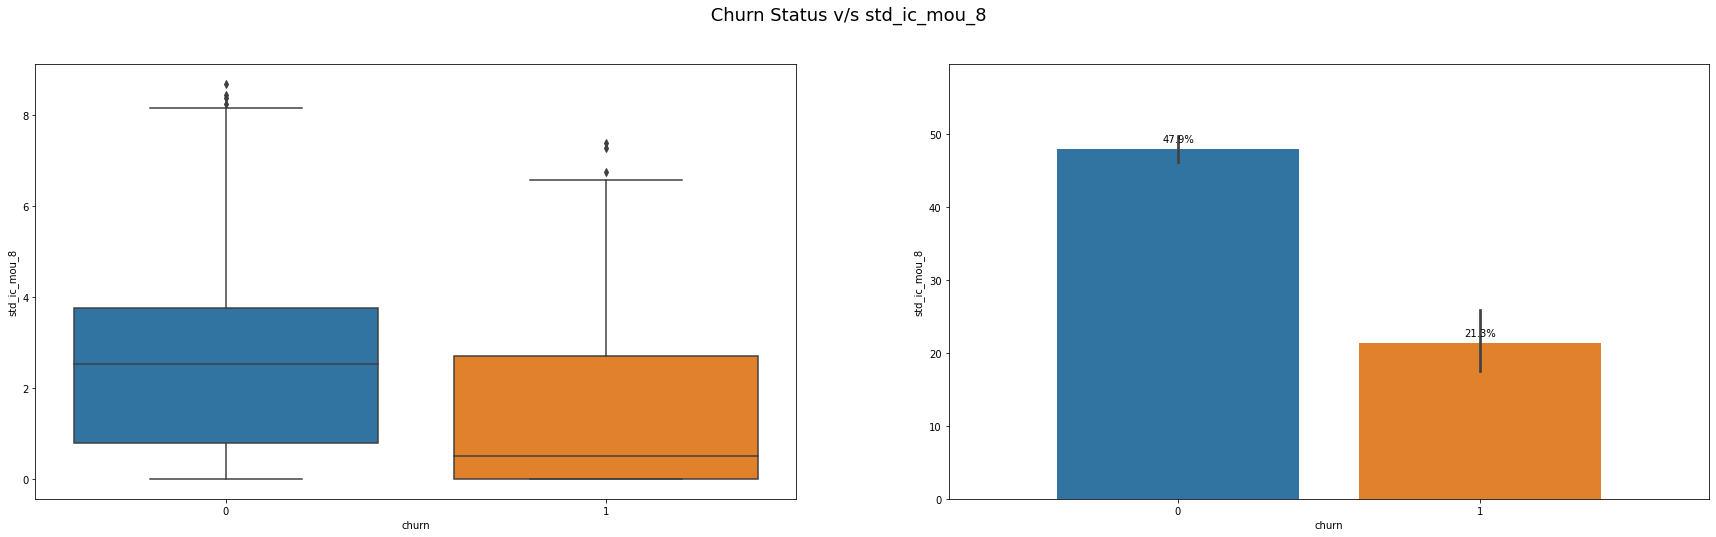

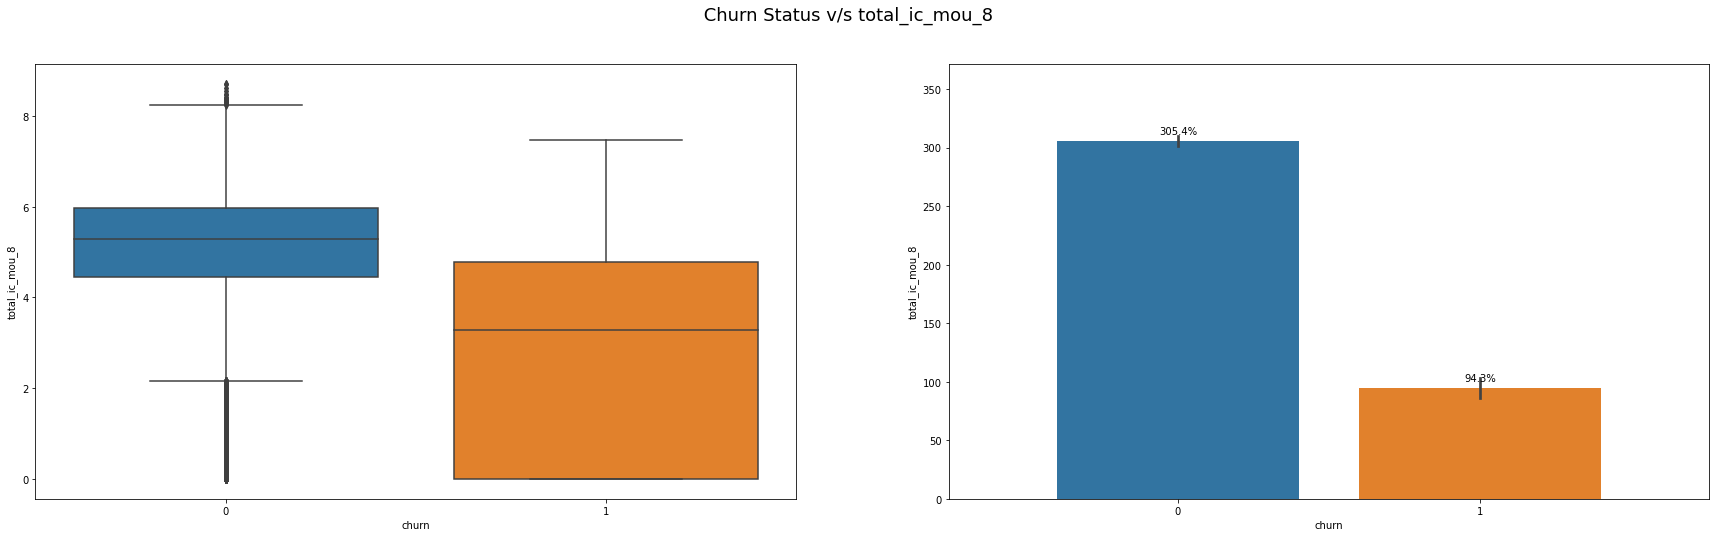

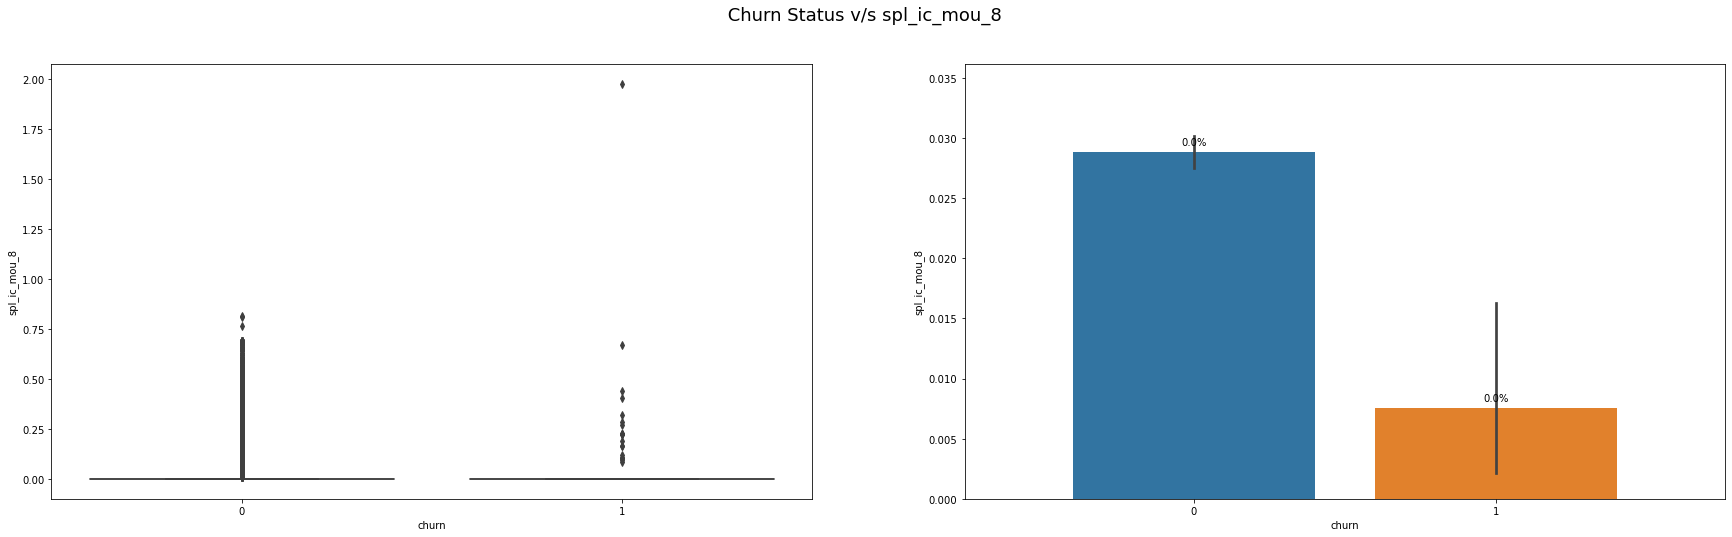

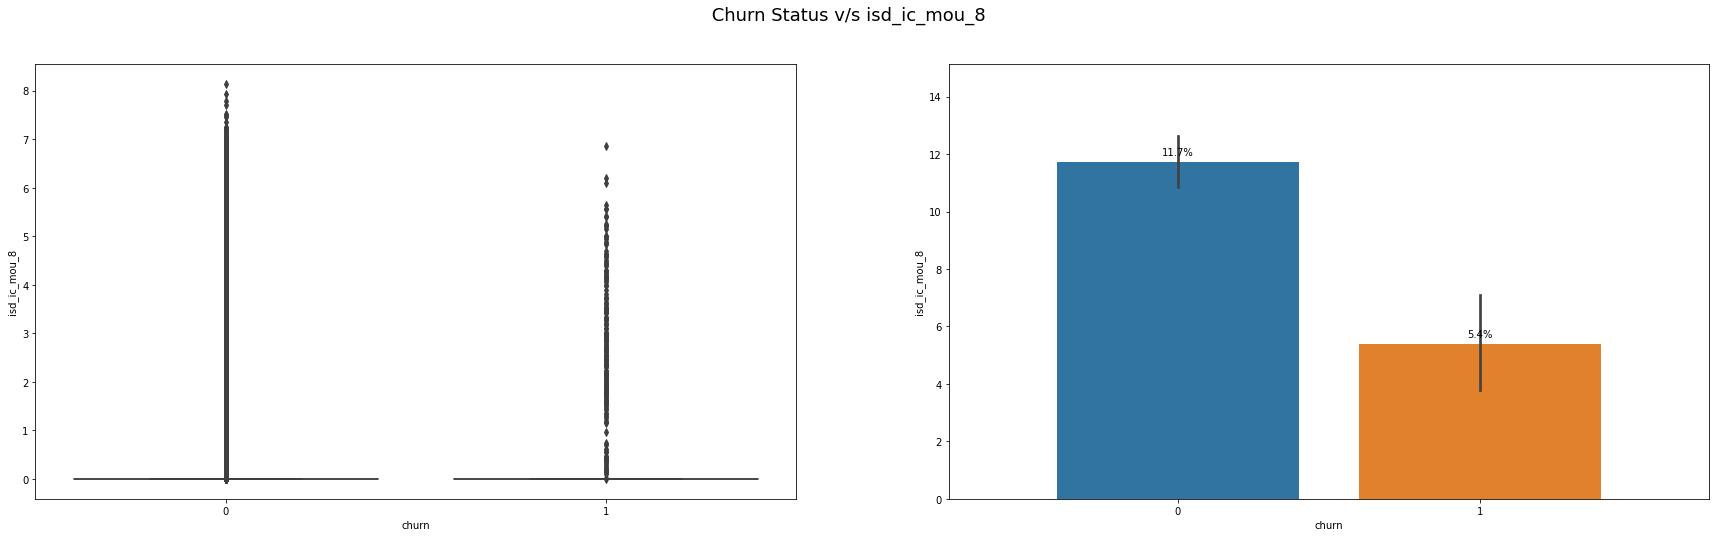

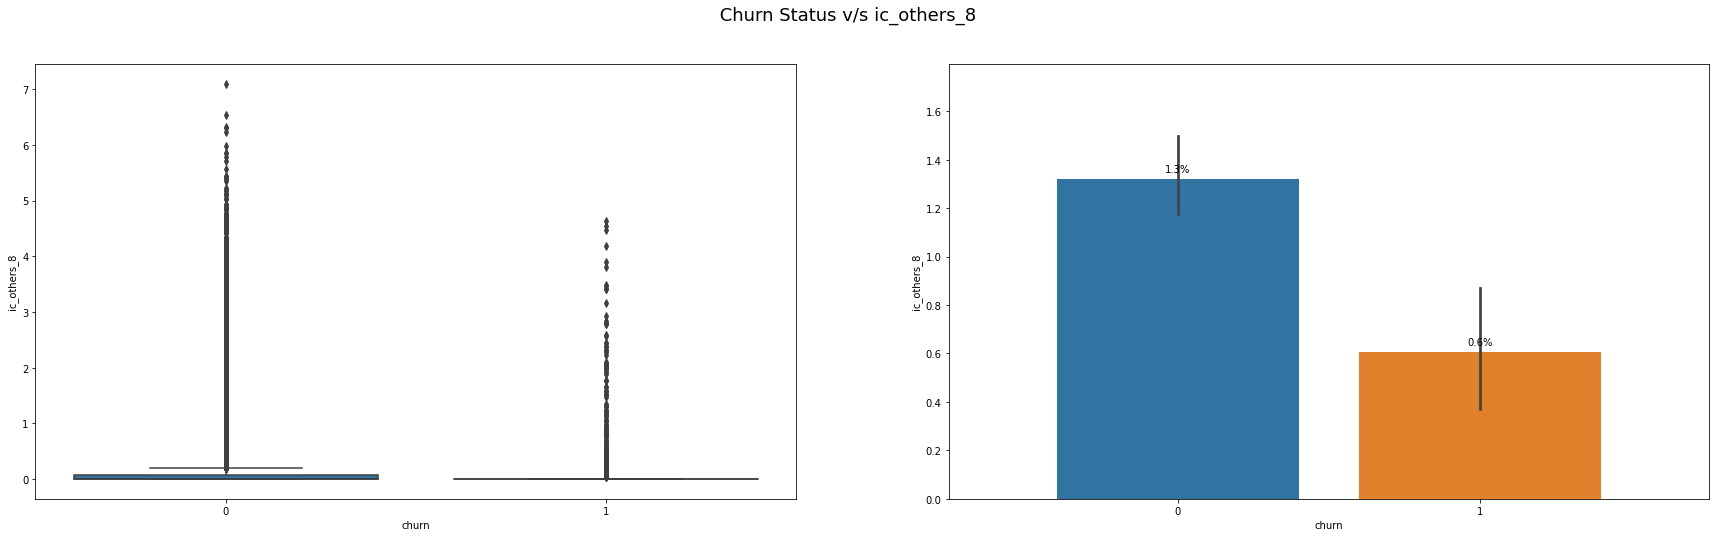

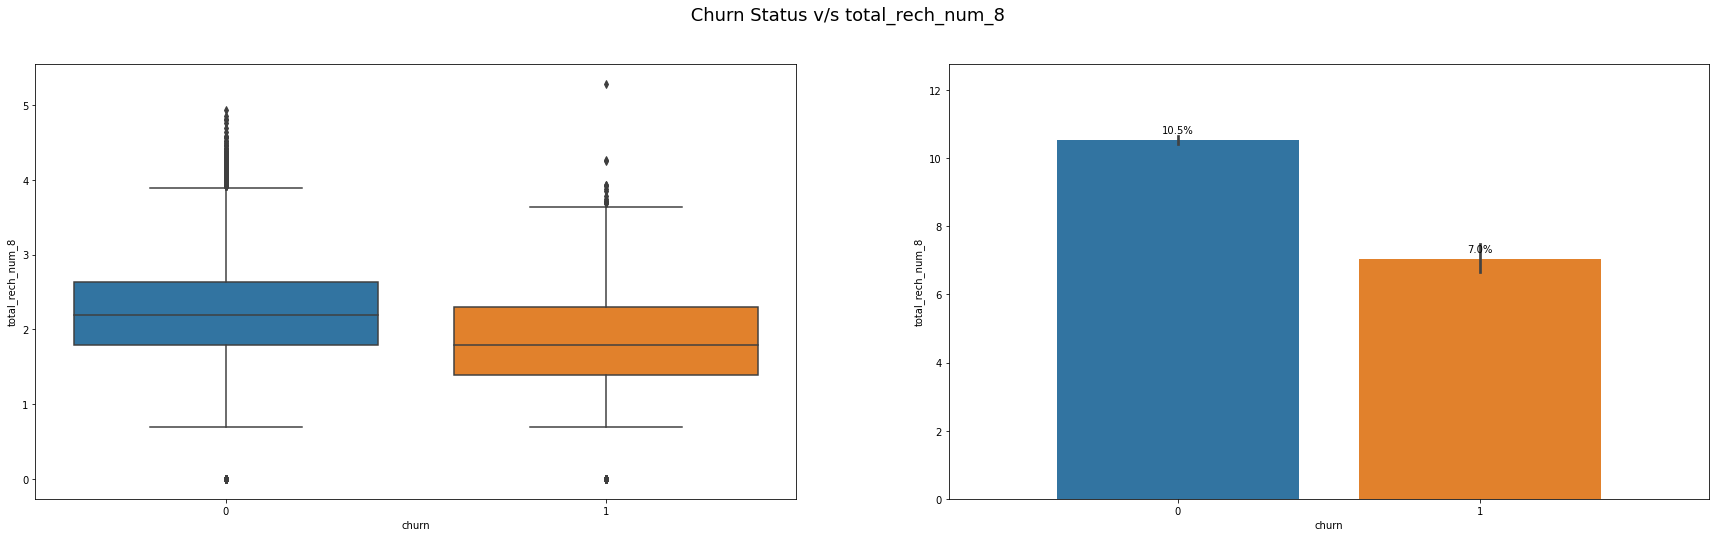

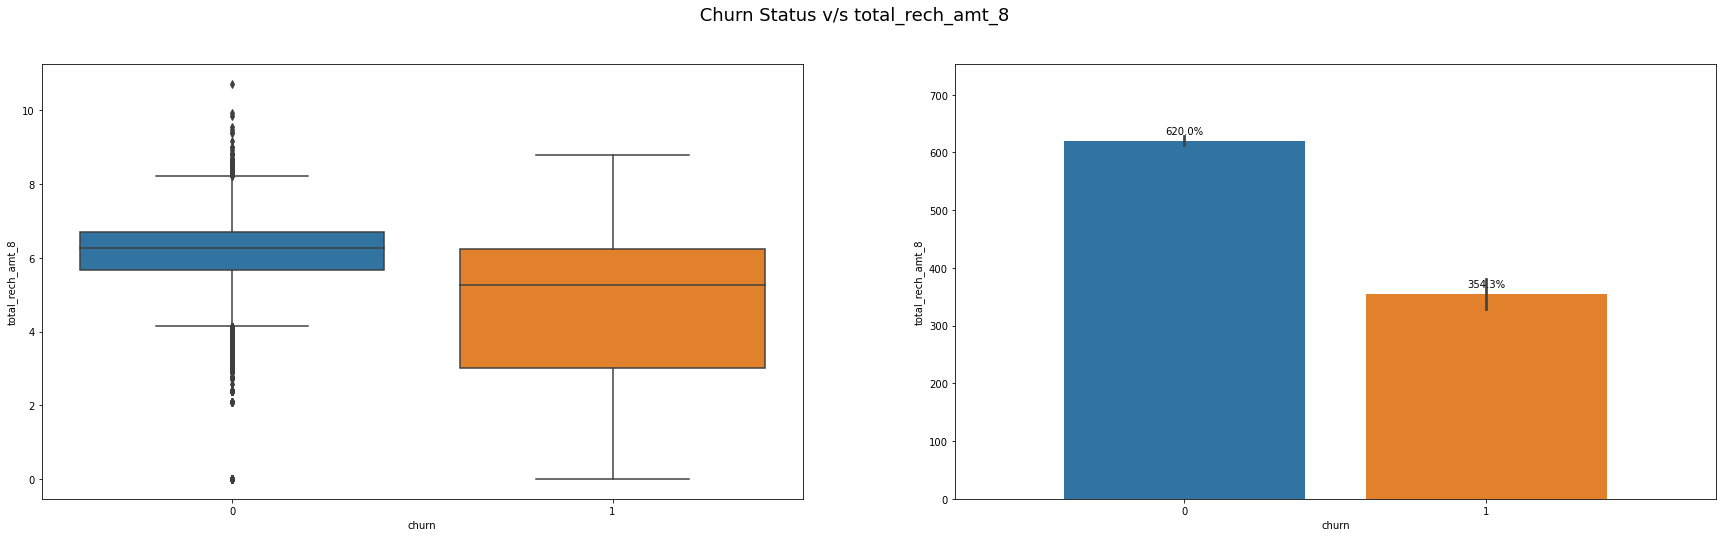

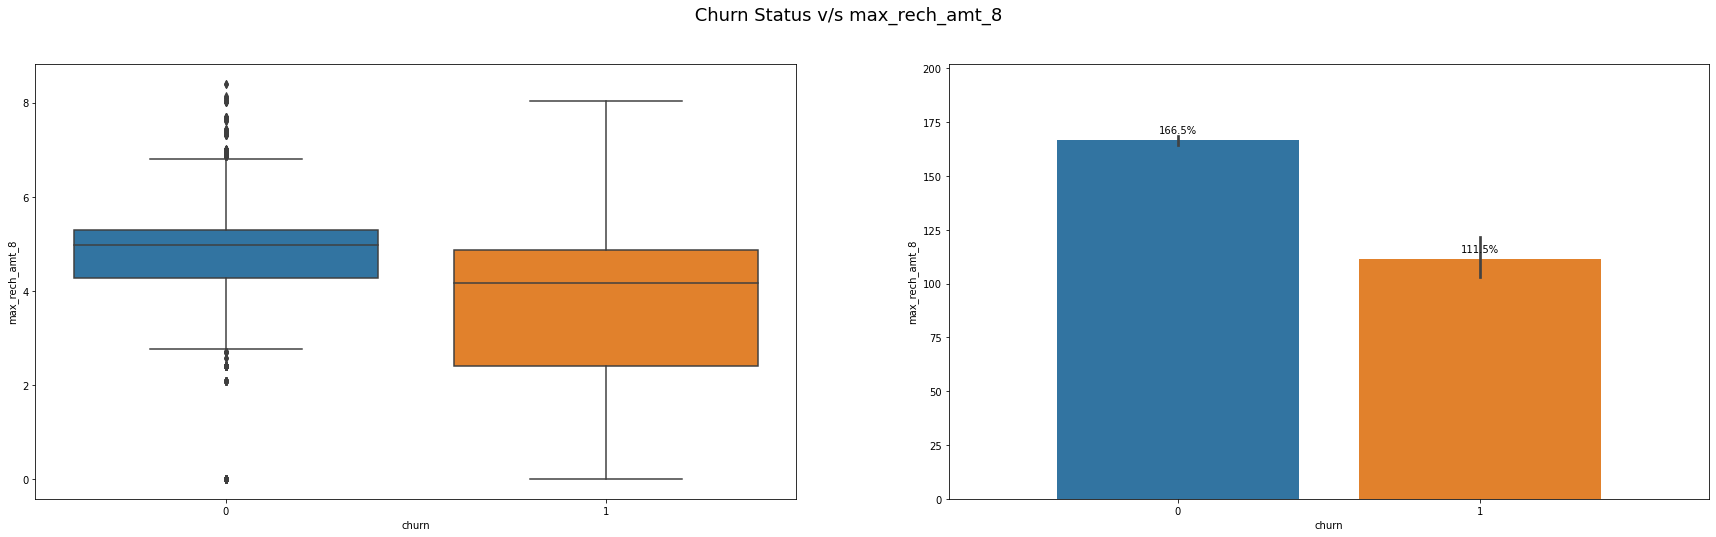

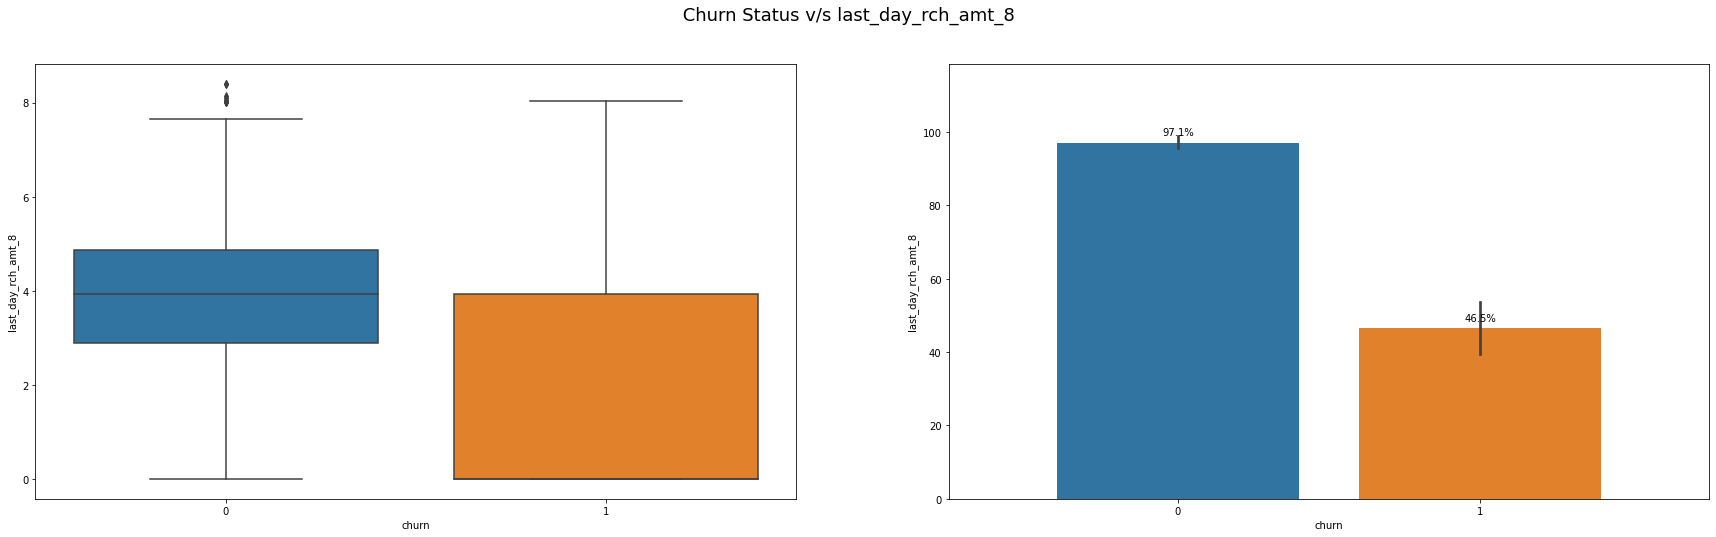

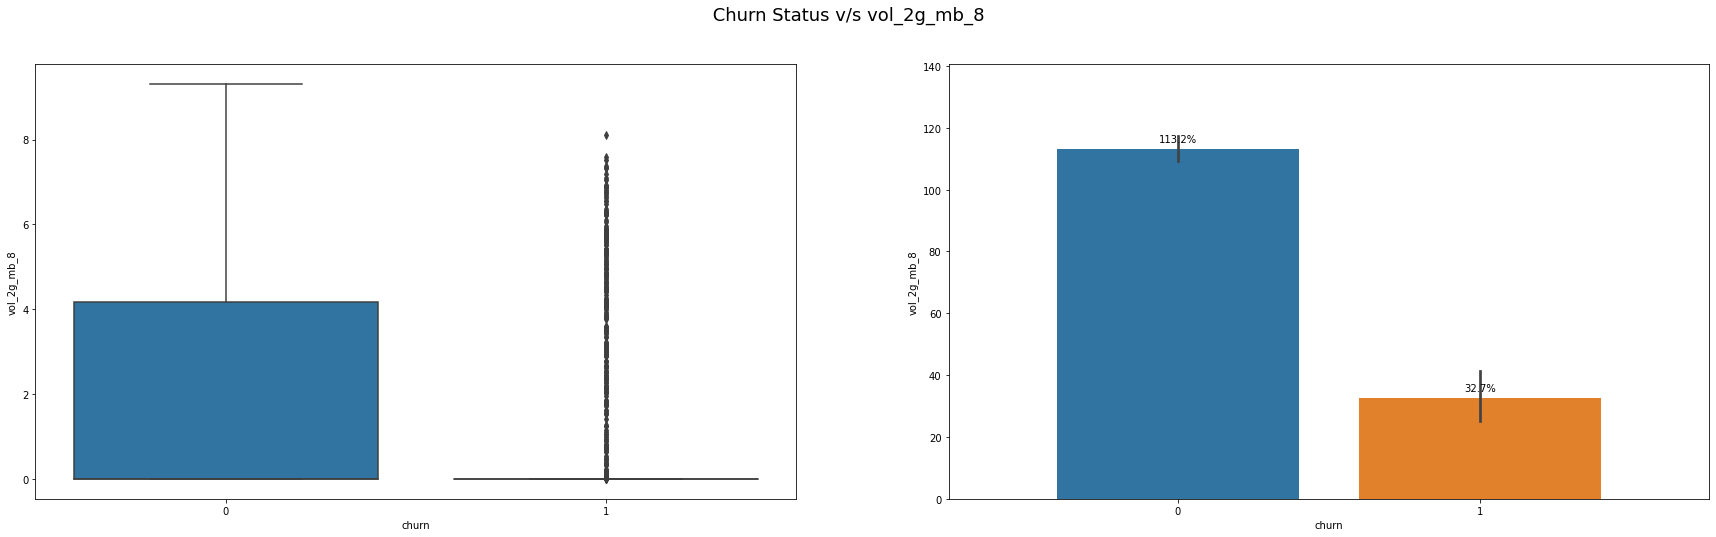

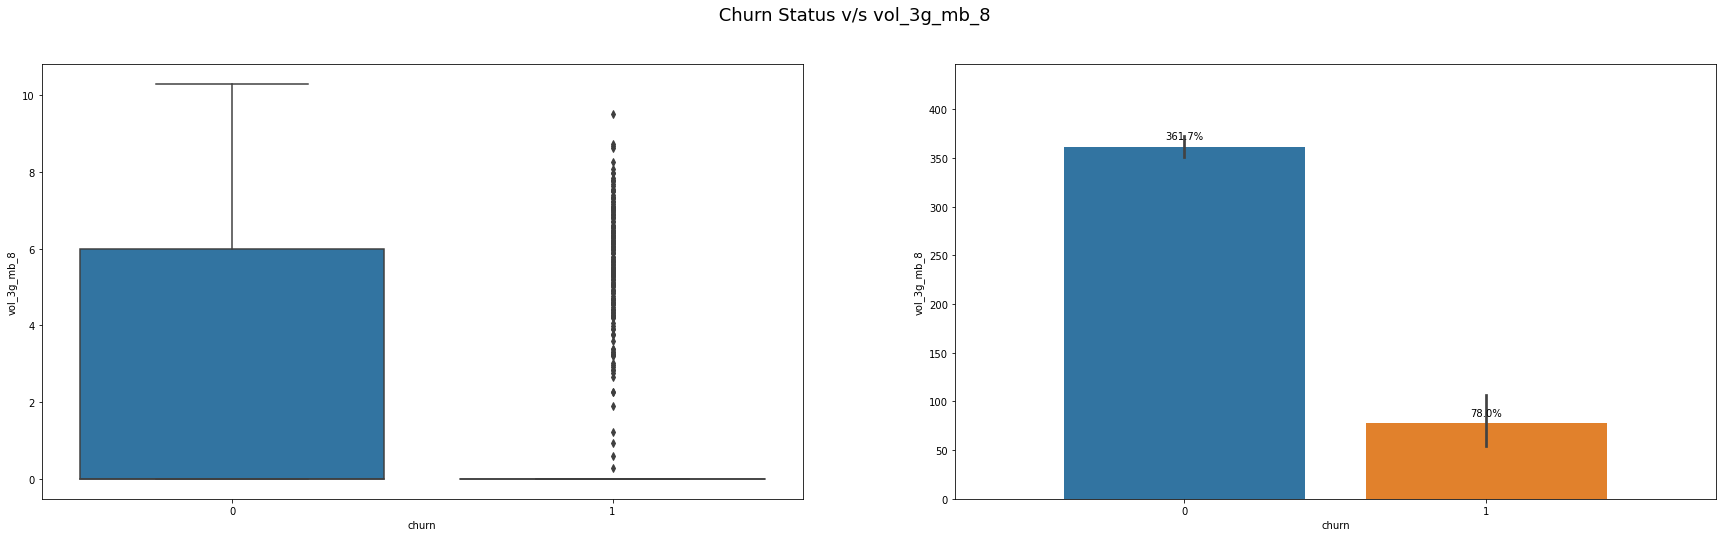

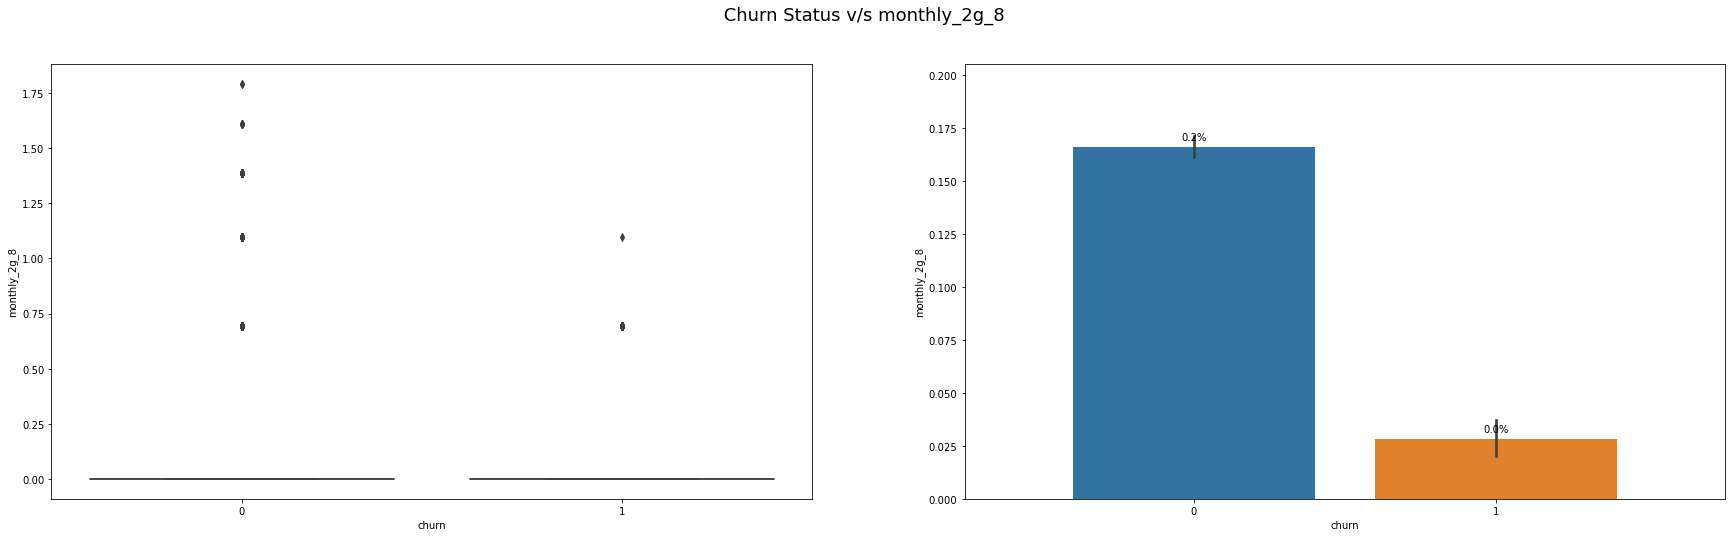

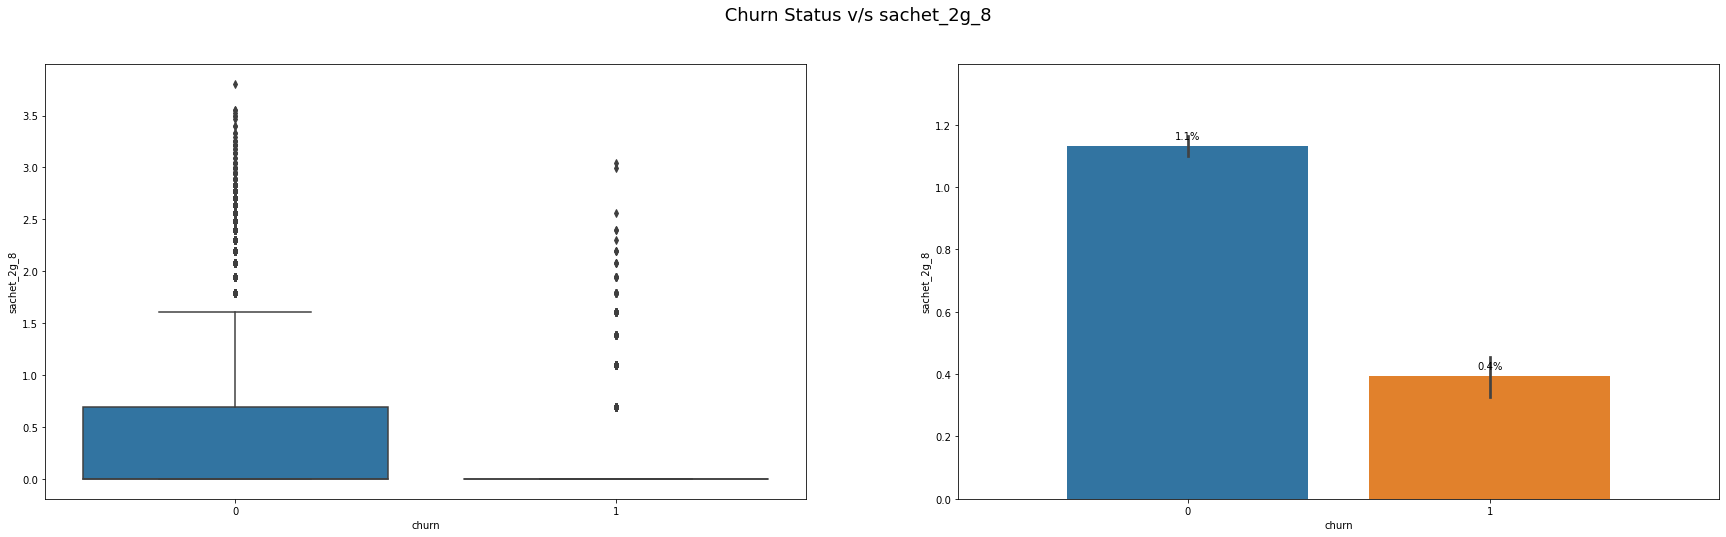

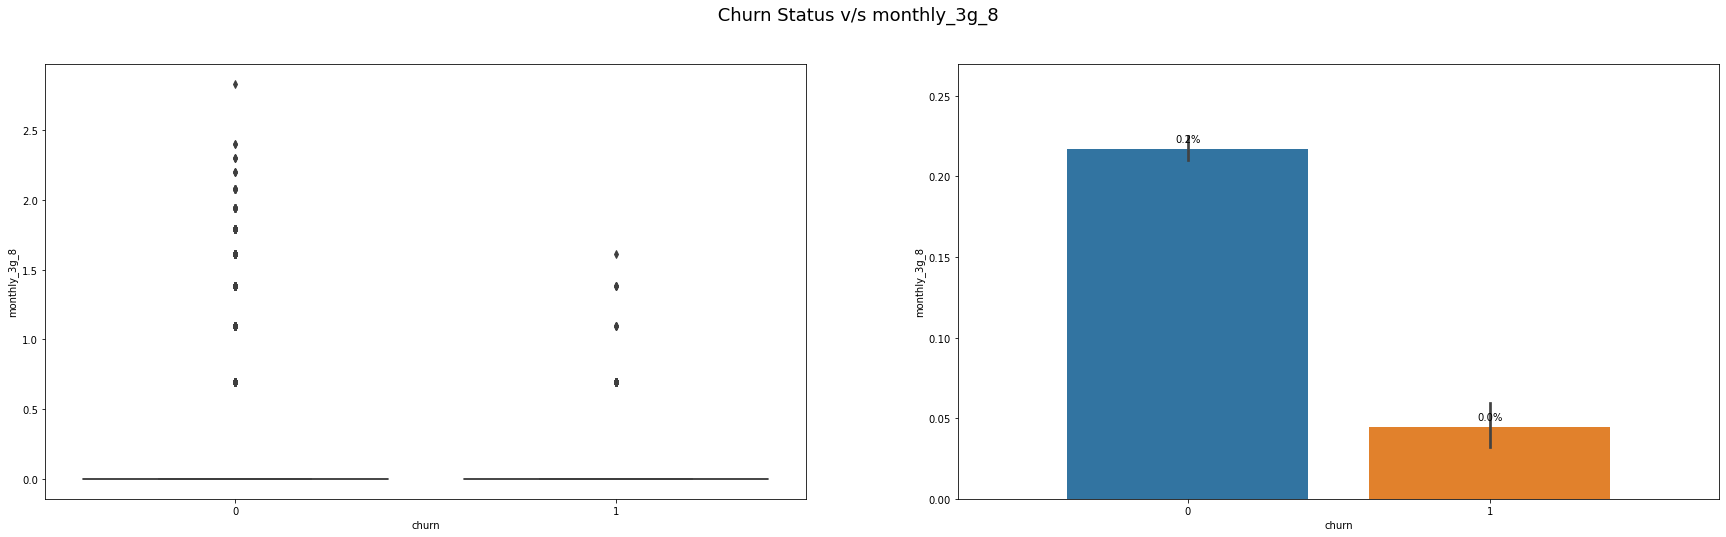

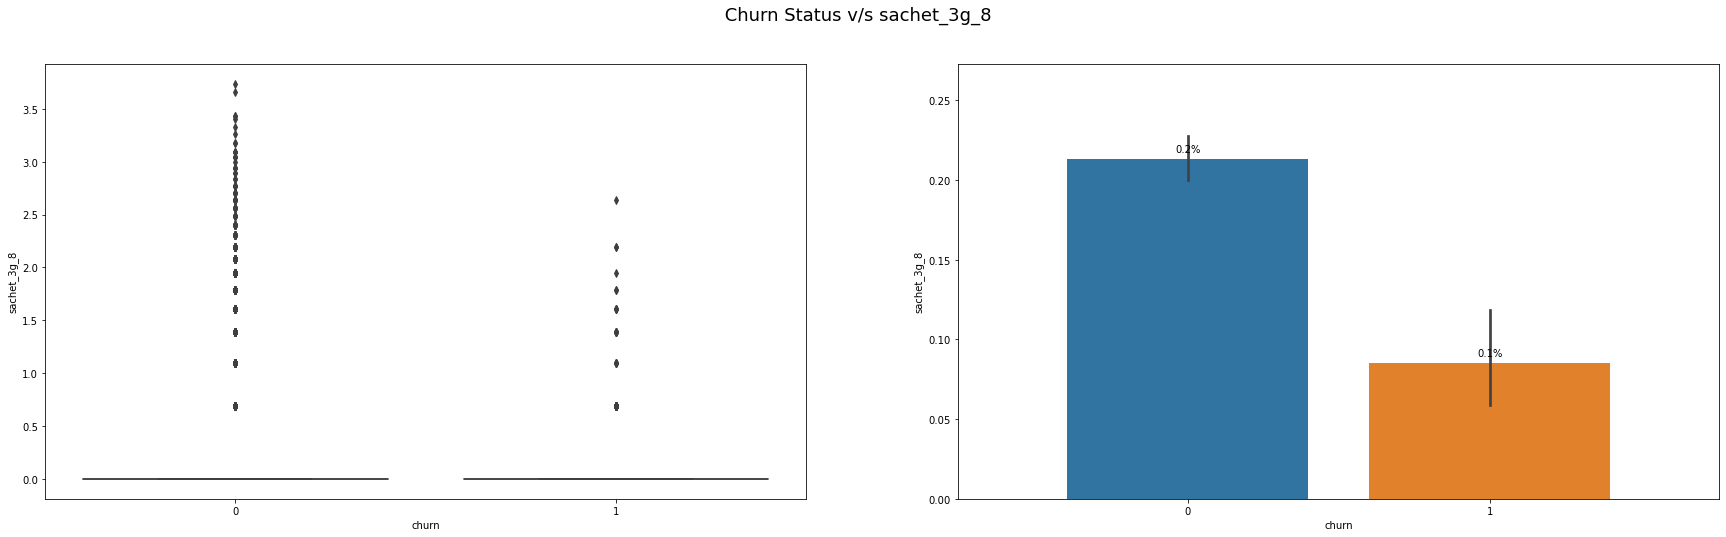

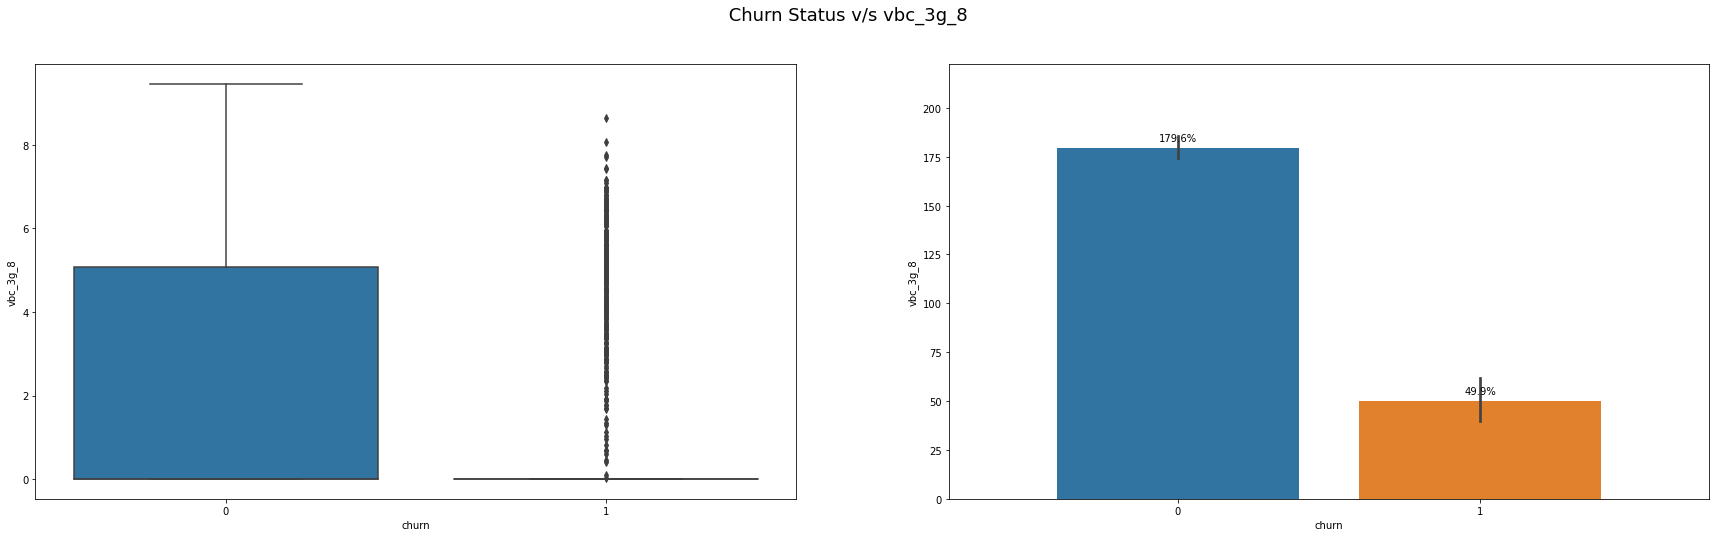

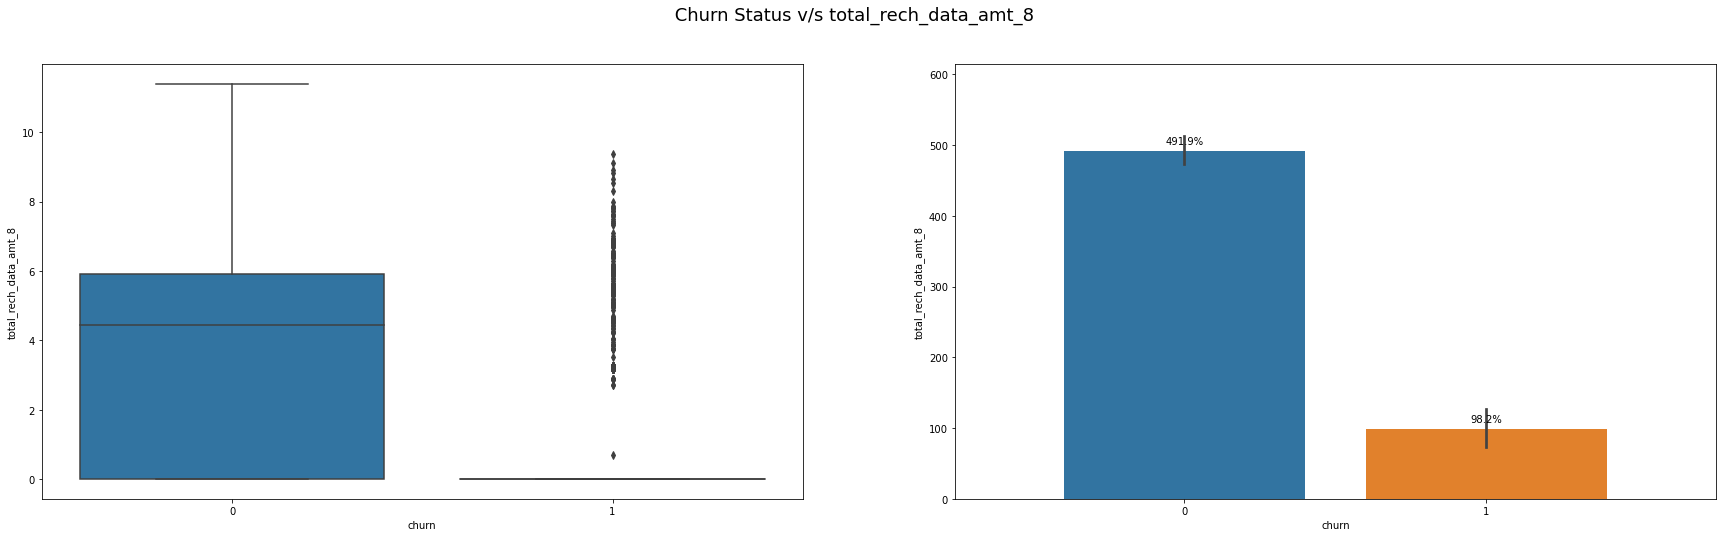

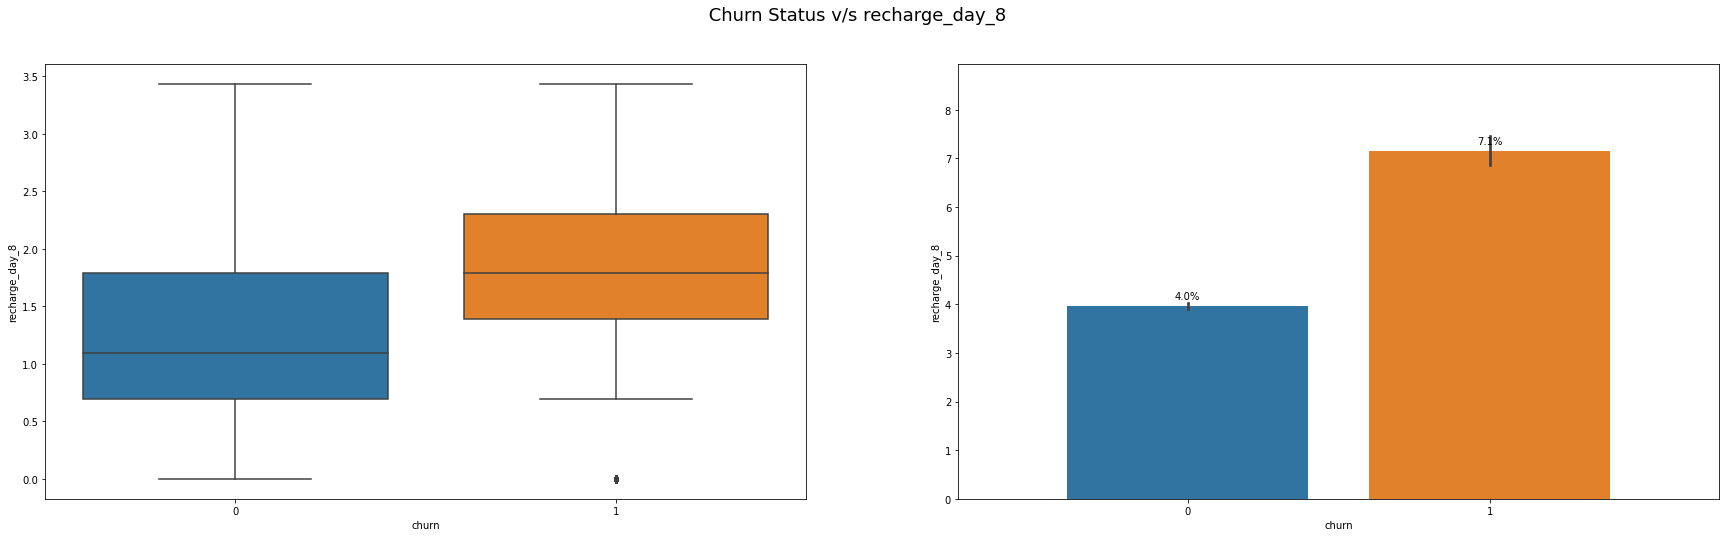

In [36]:
#Check the data in 8th month
for i in telecom_data_master[telecom_data_master.columns[telecom_data_master.columns.to_series().str.contains('_8')]].columns:
    checkChurnStatus(telecom_data_master,i)

Now lets check the status of the data in the 7th and 6th month.

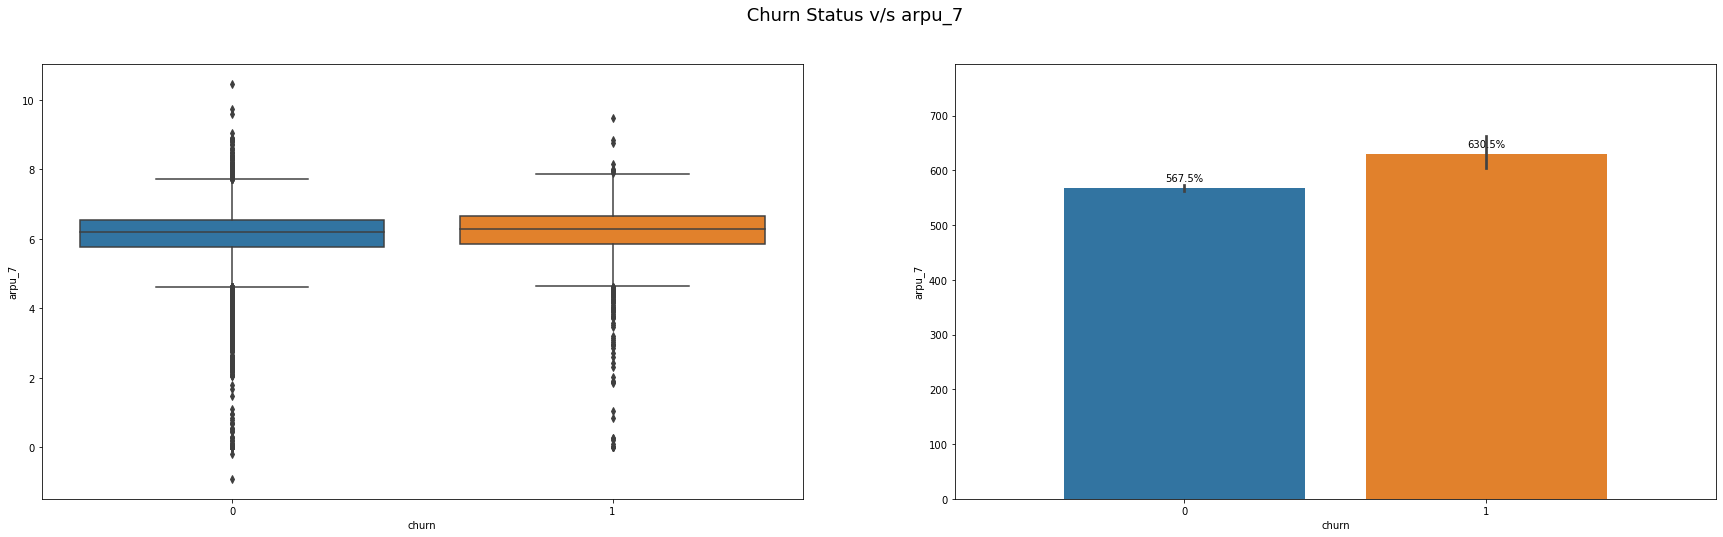

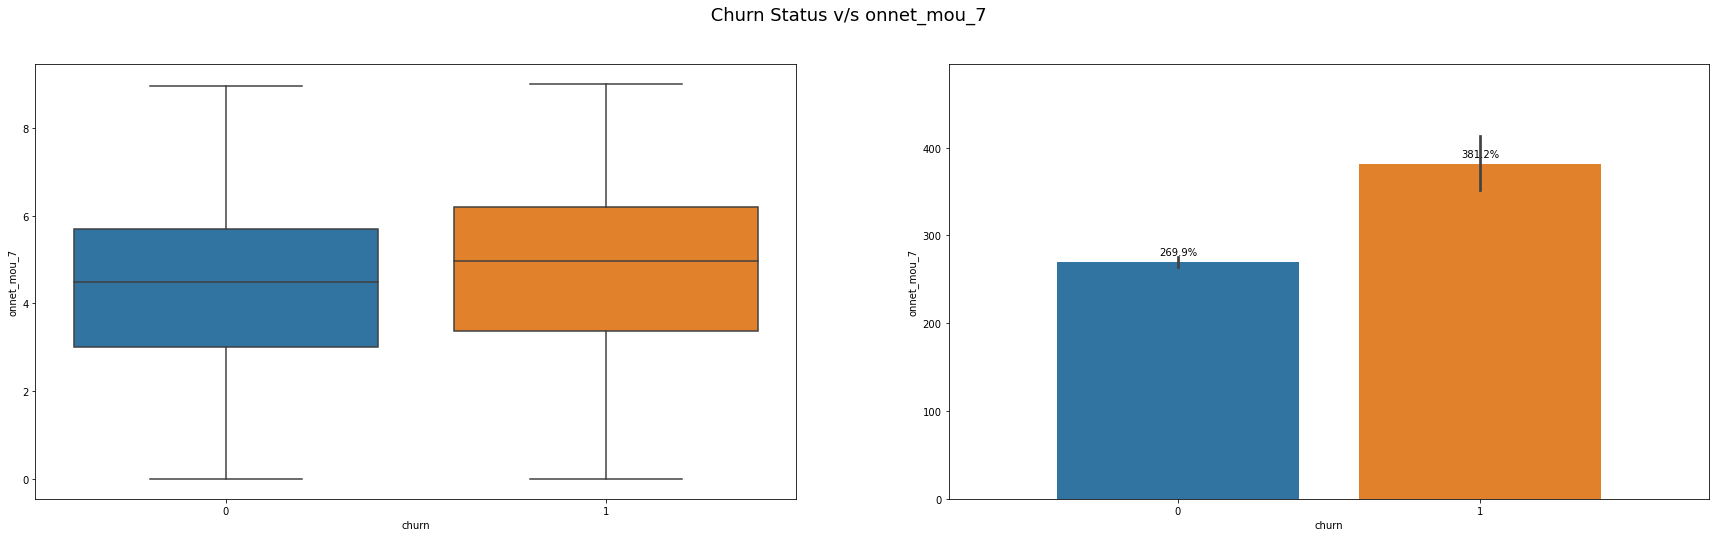

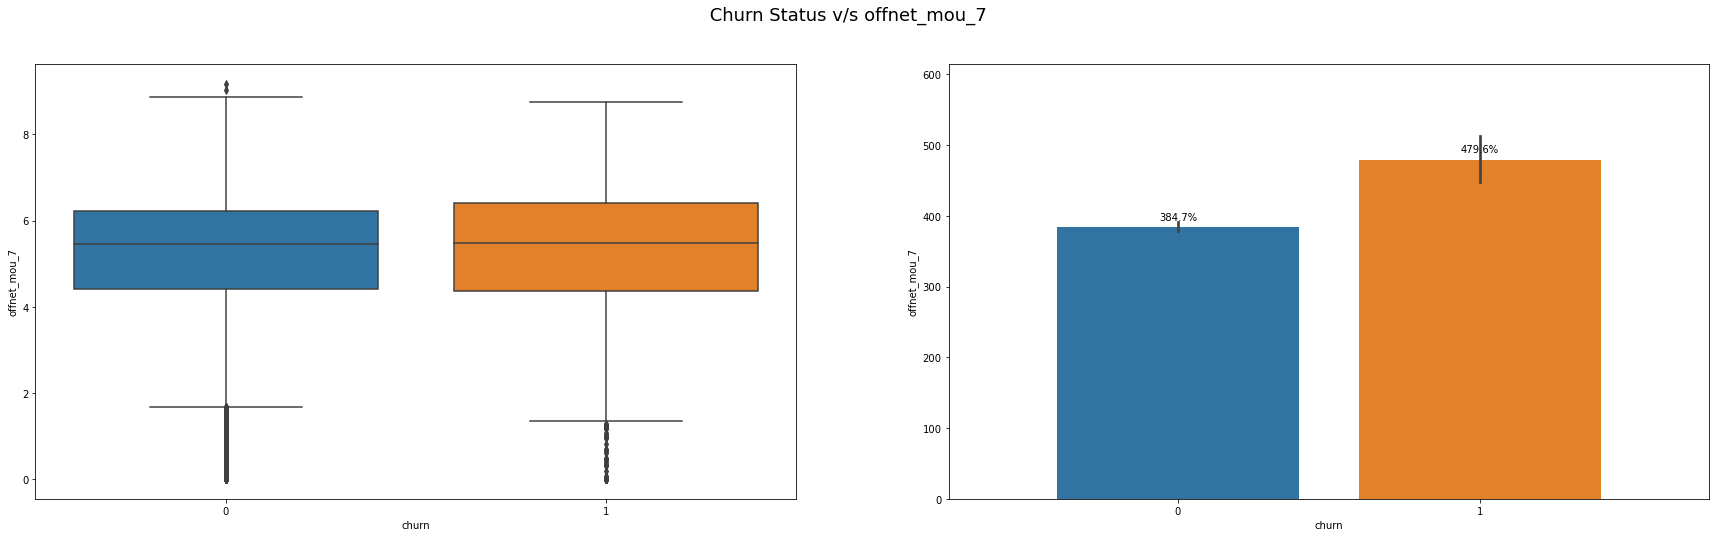

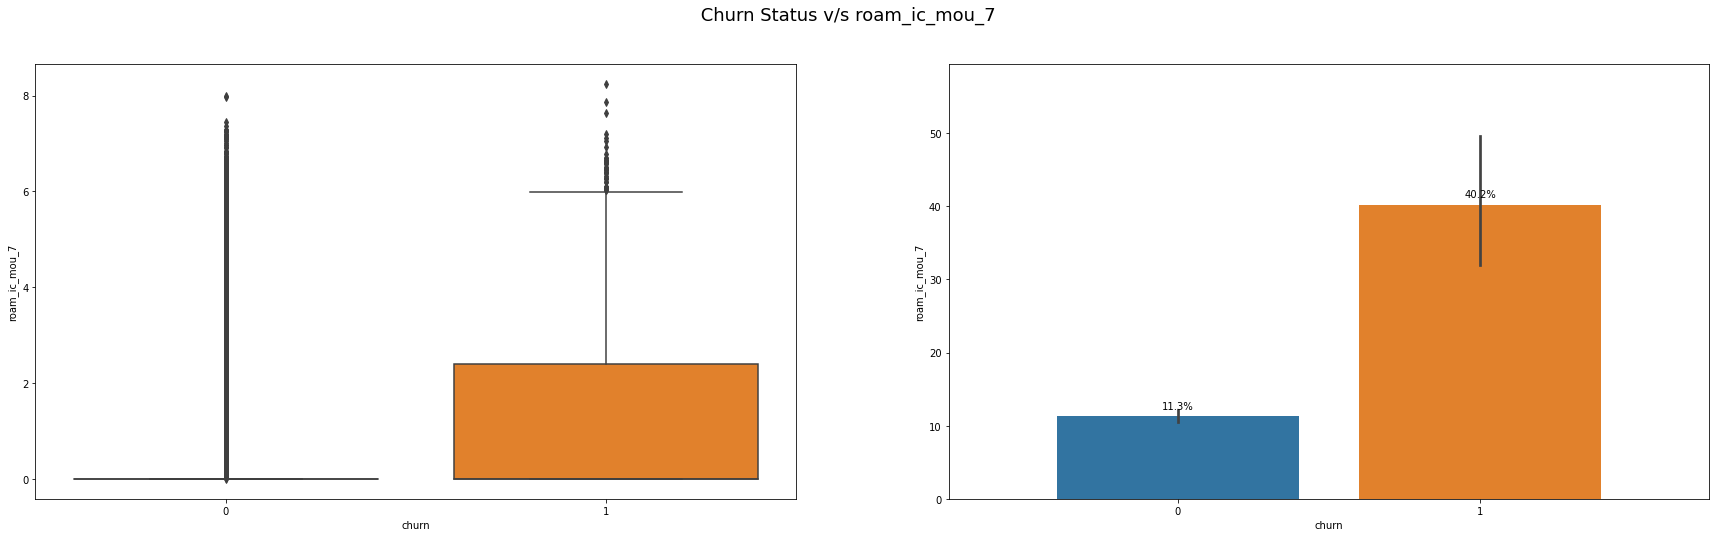

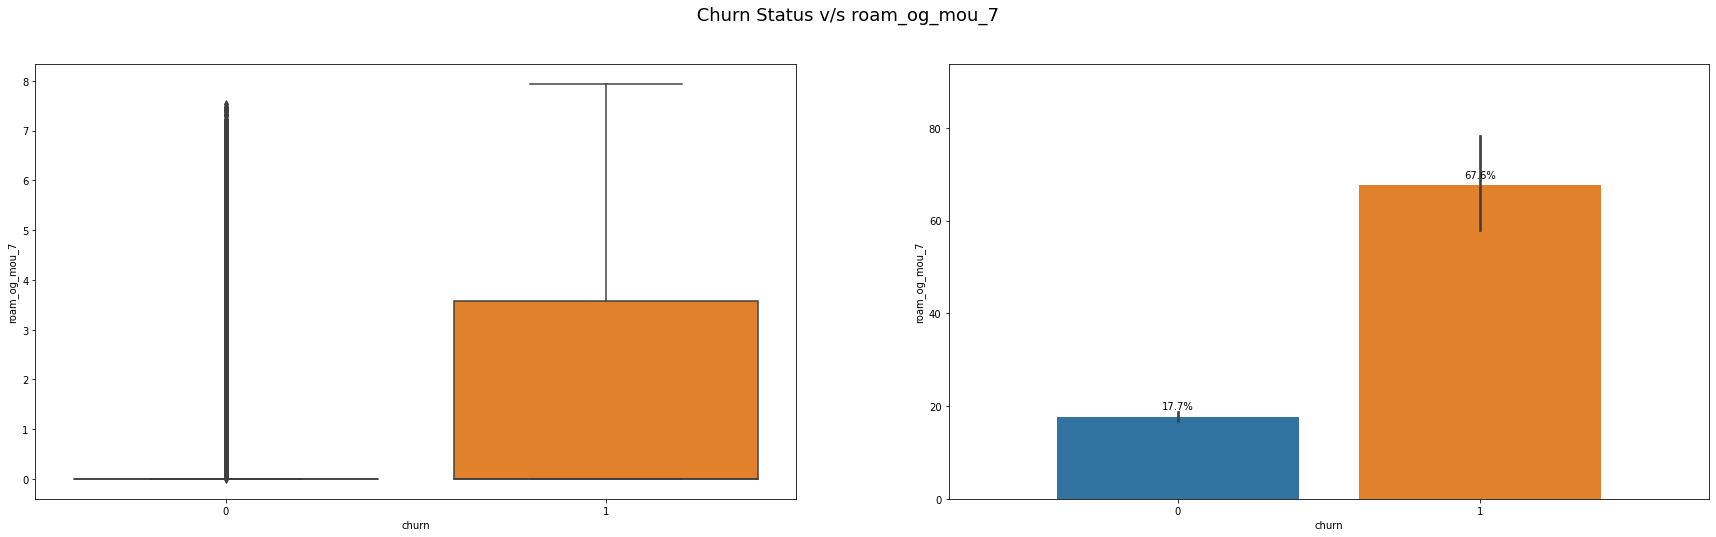

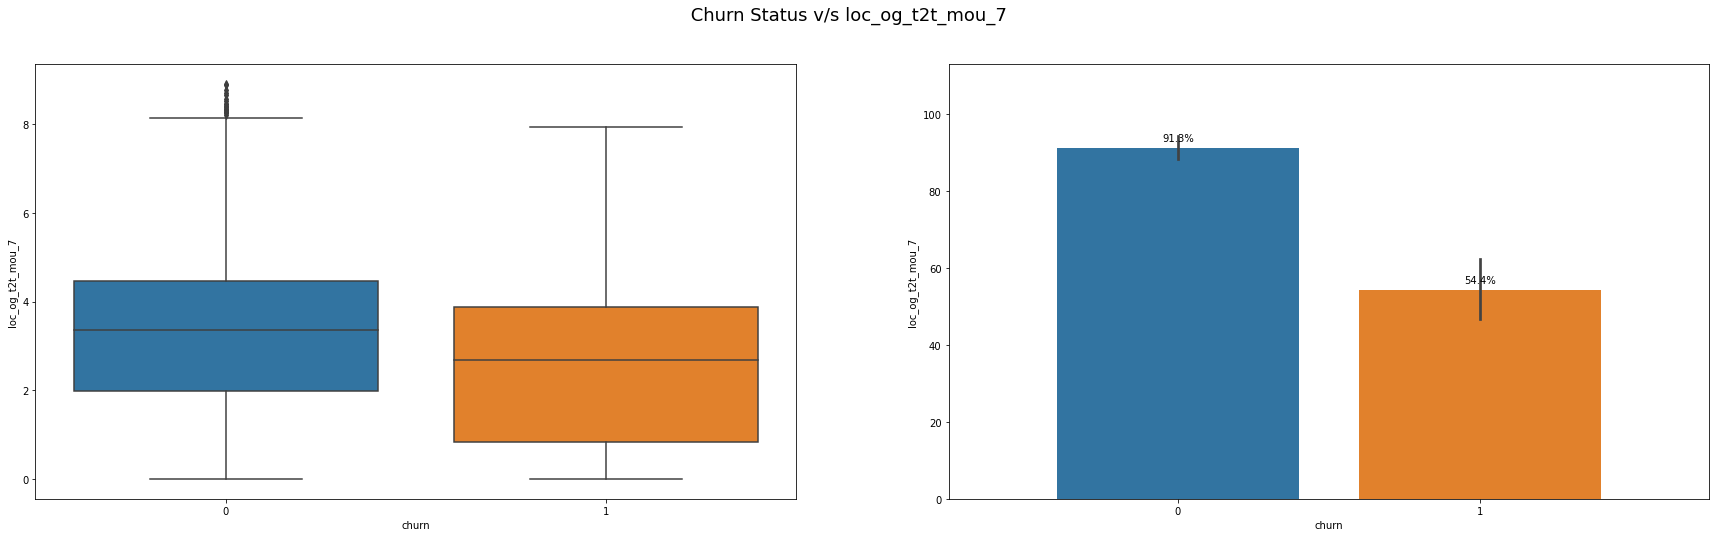

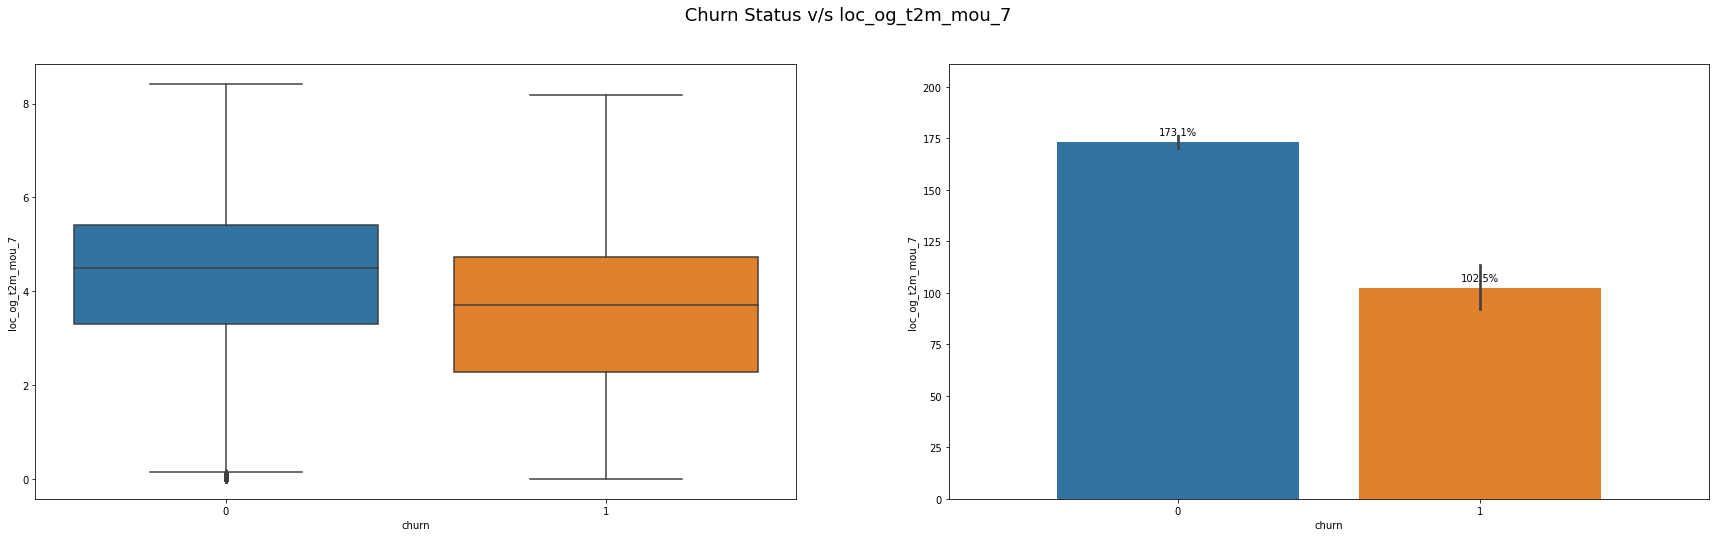

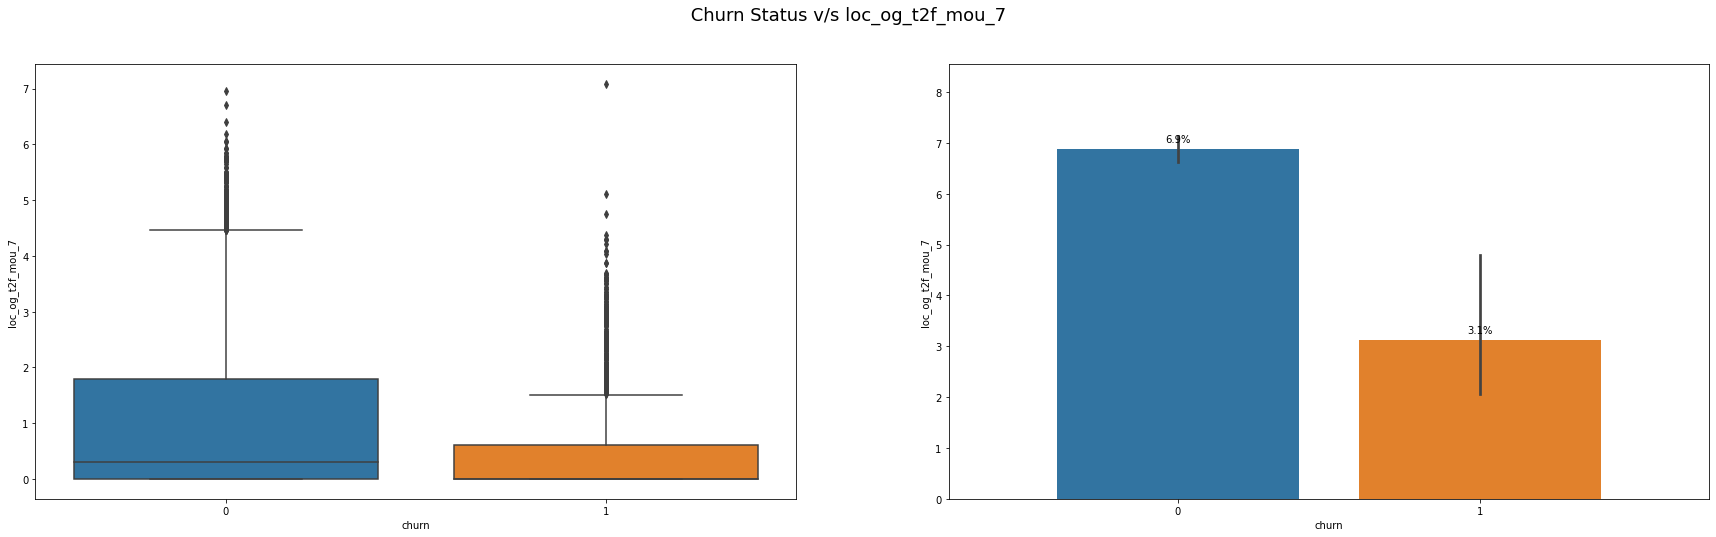

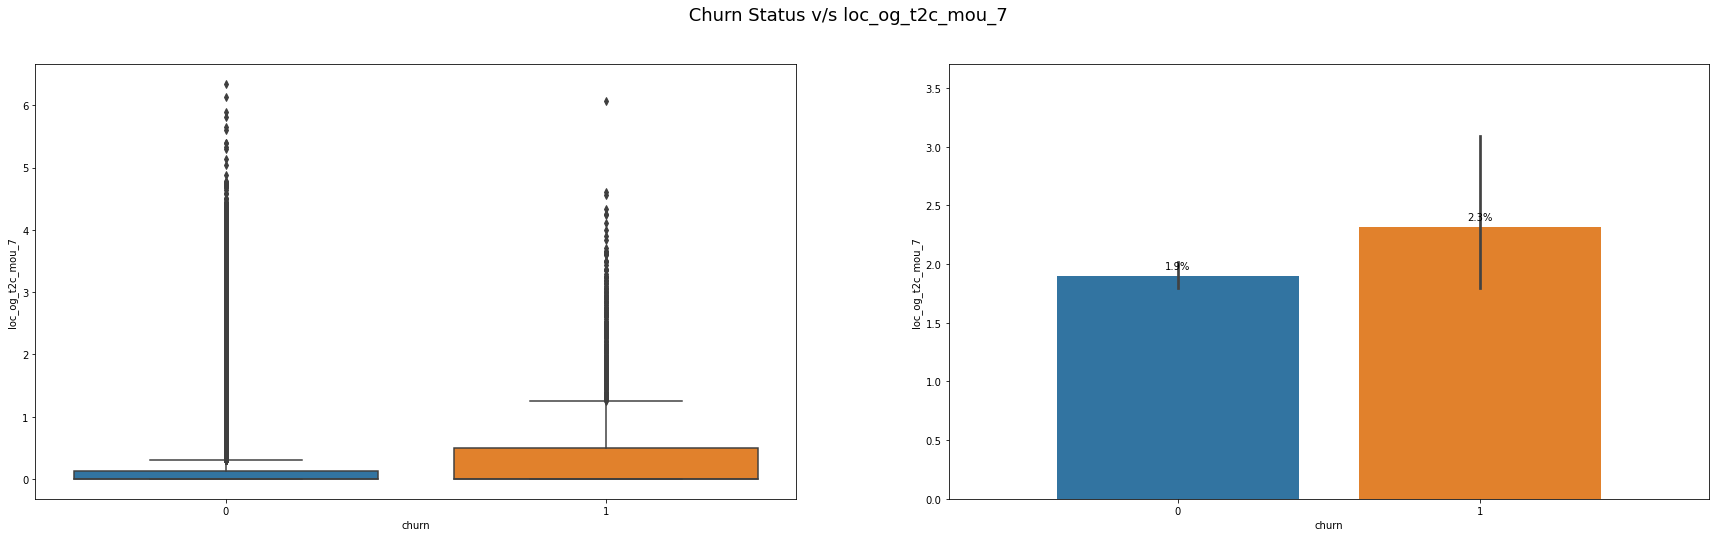

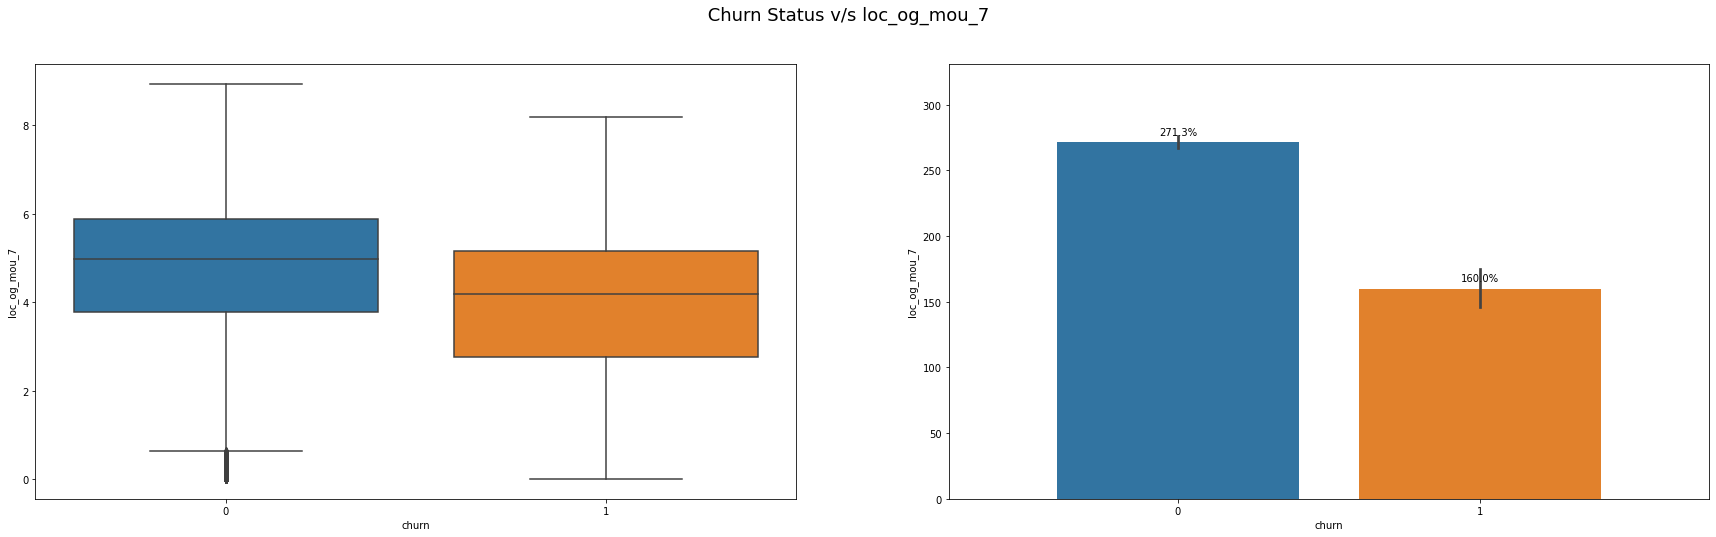

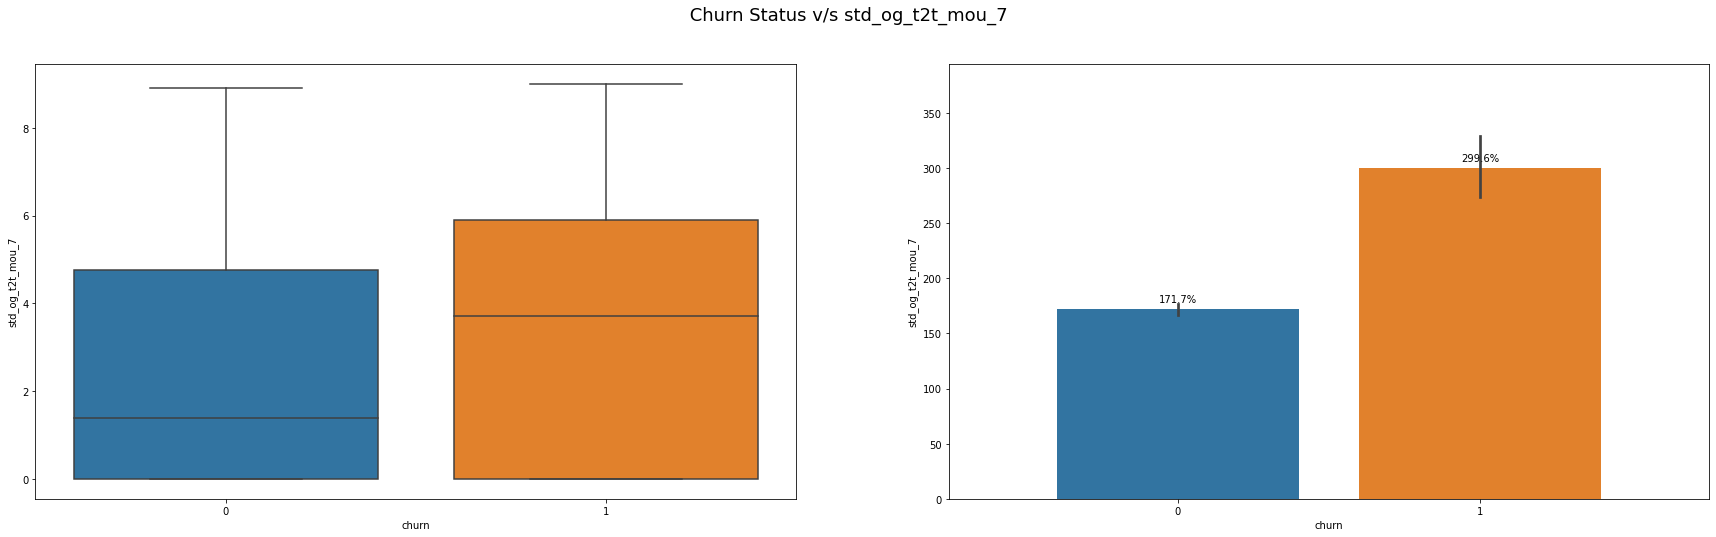

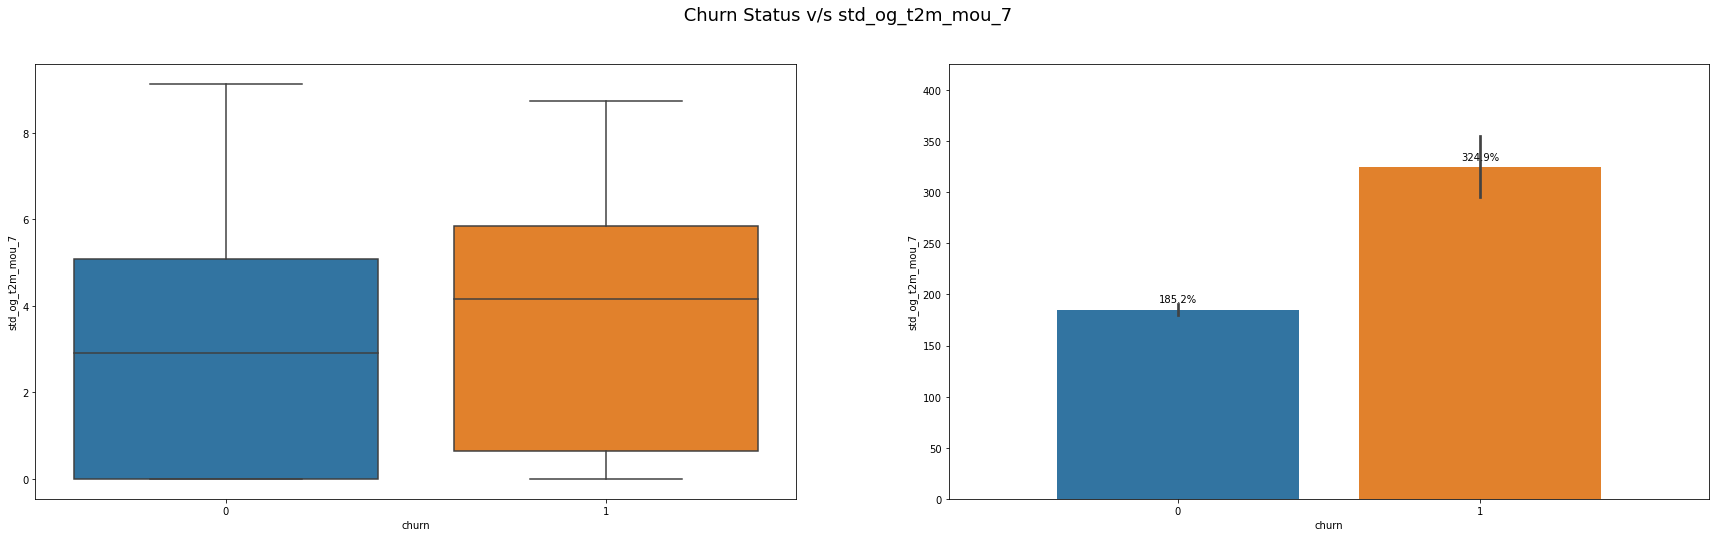

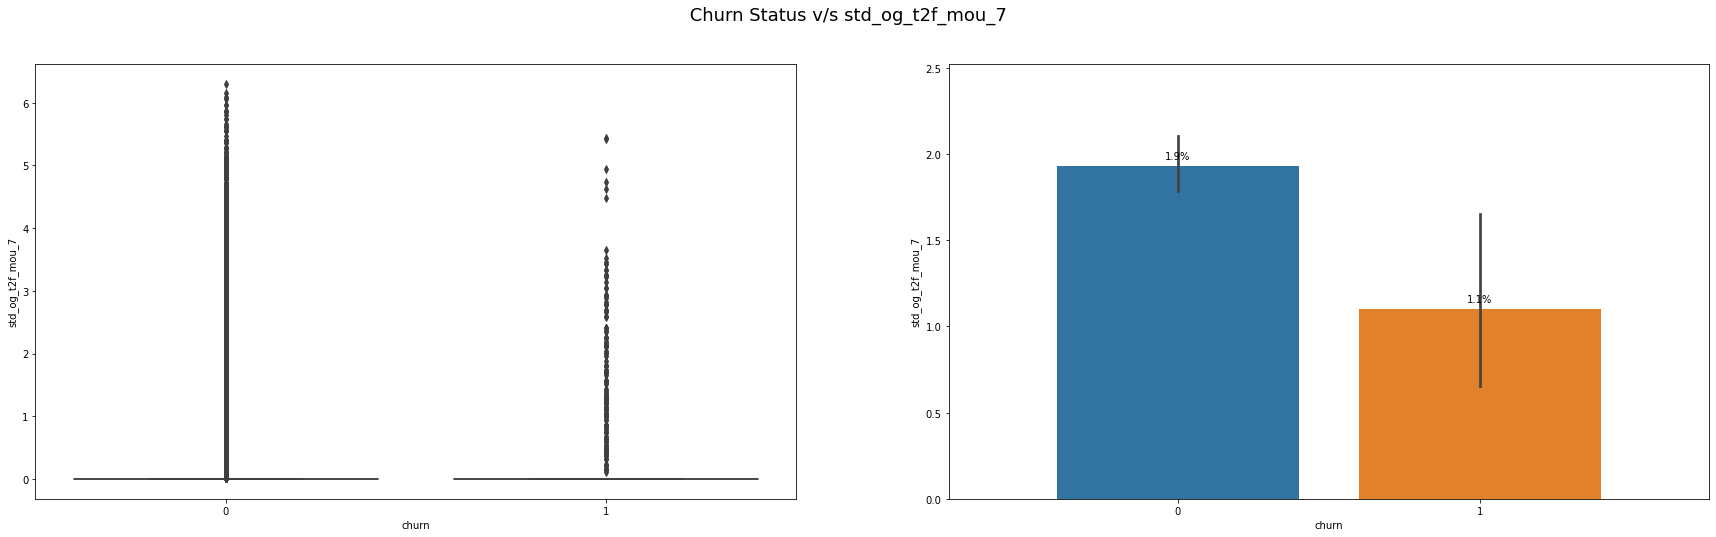

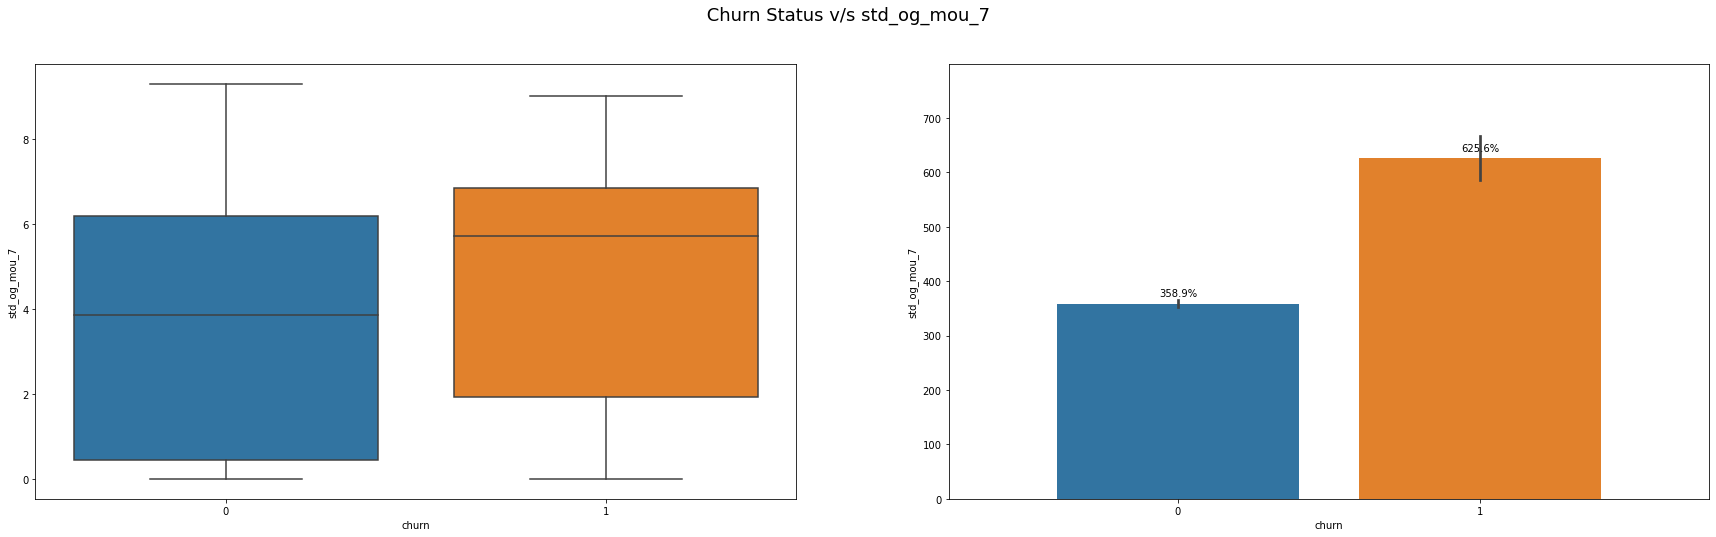

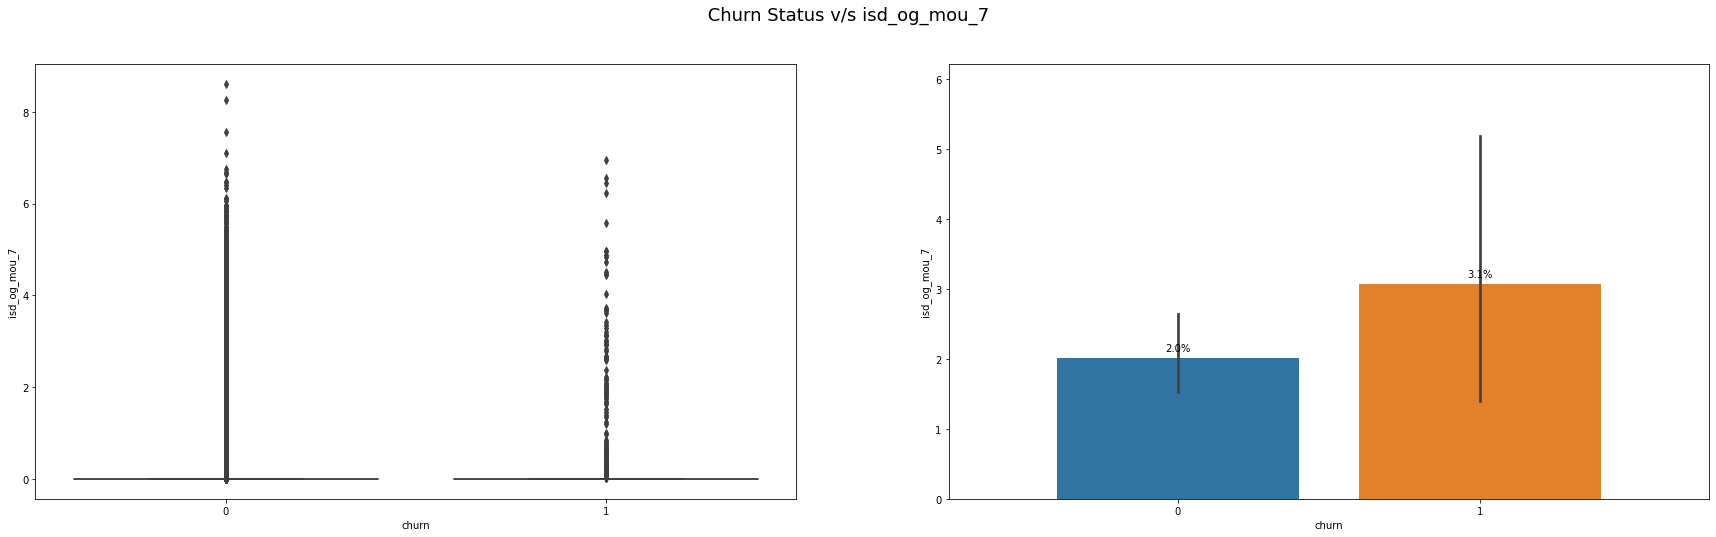

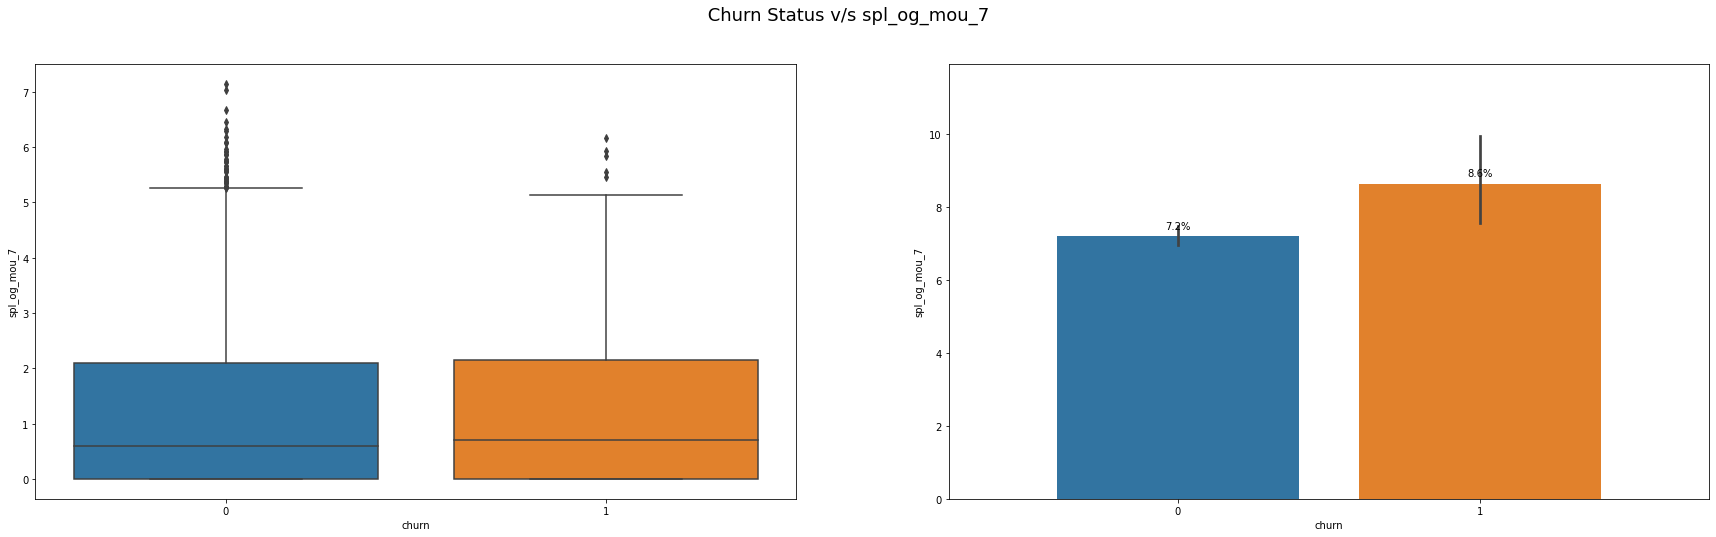

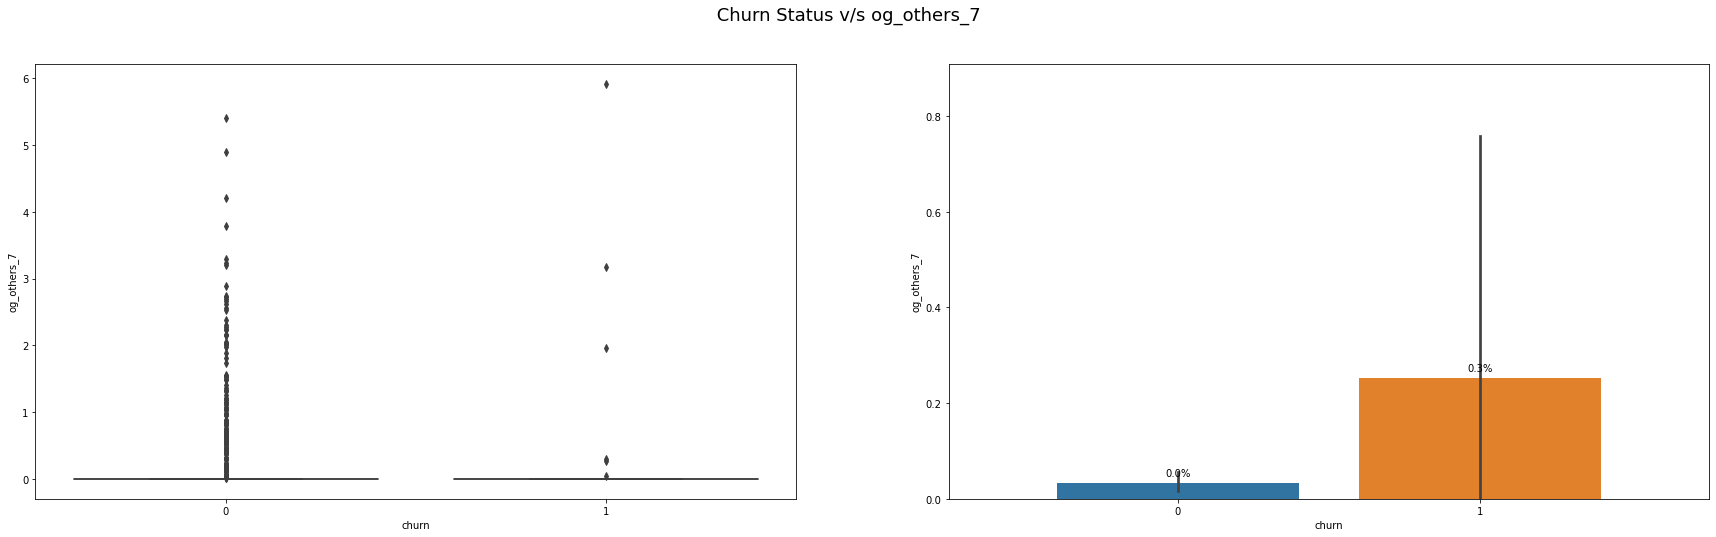

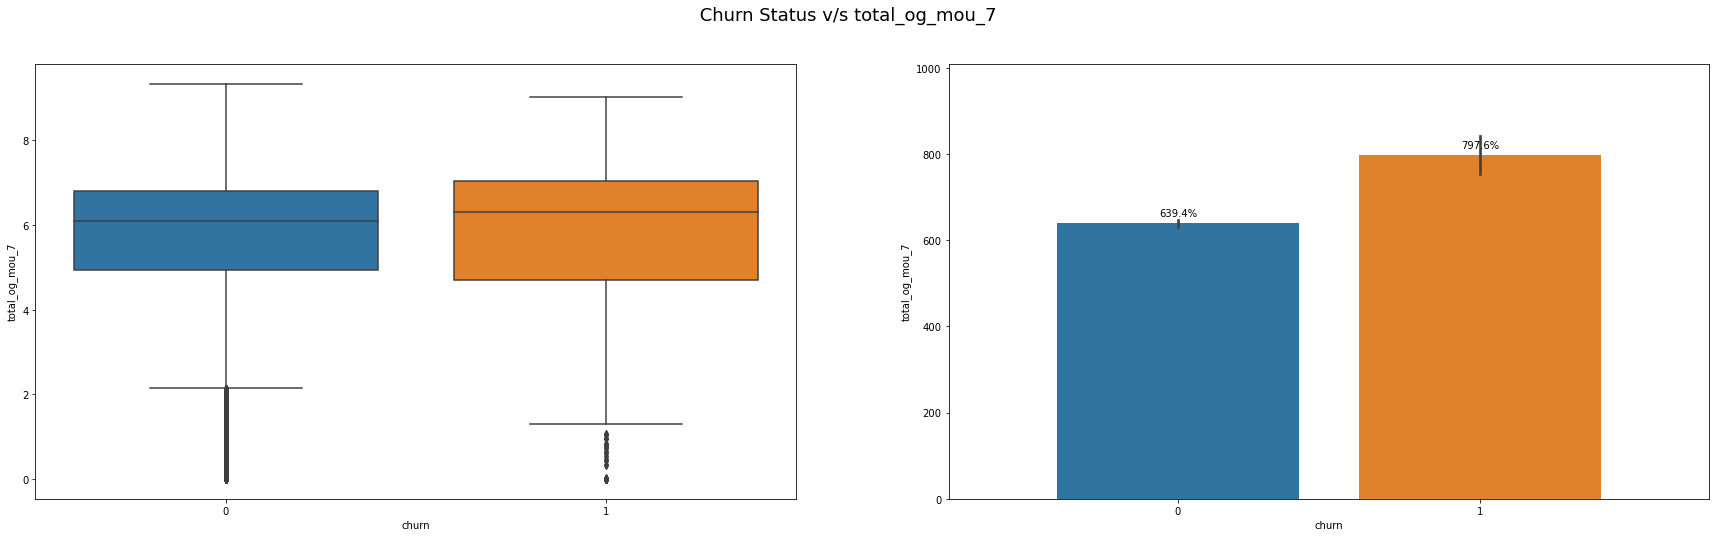

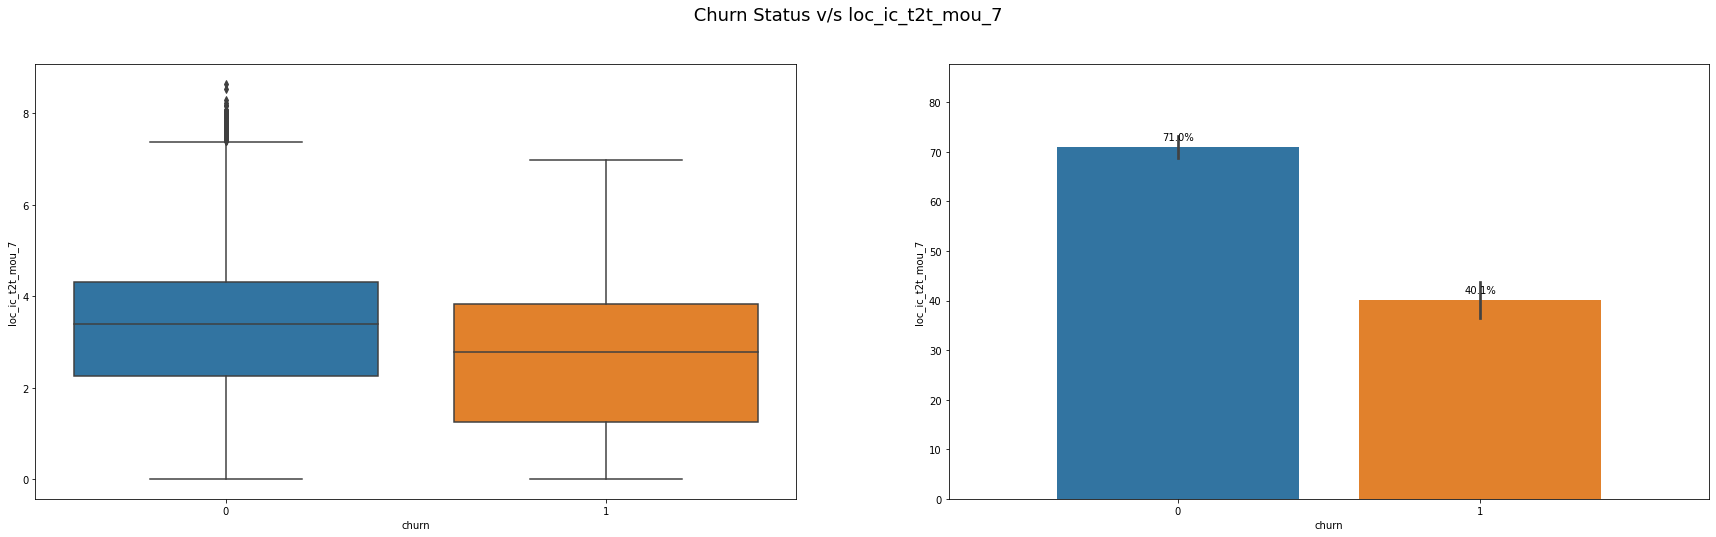

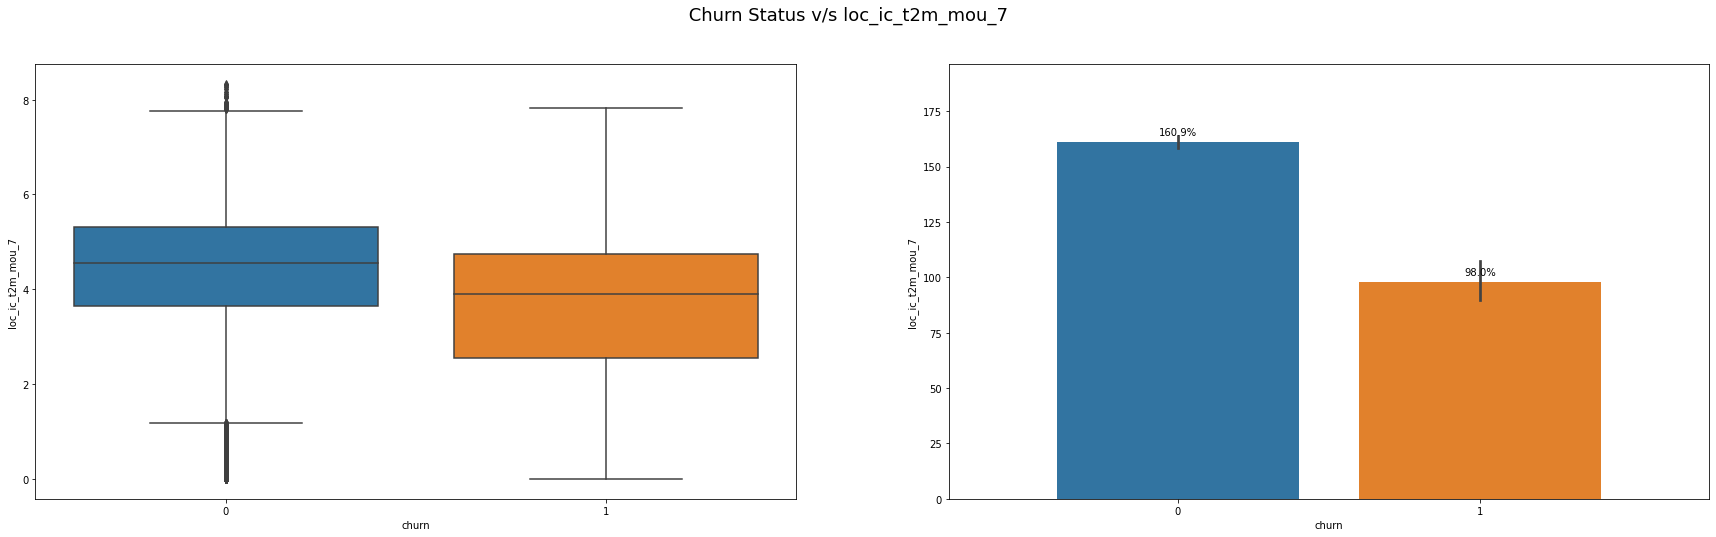

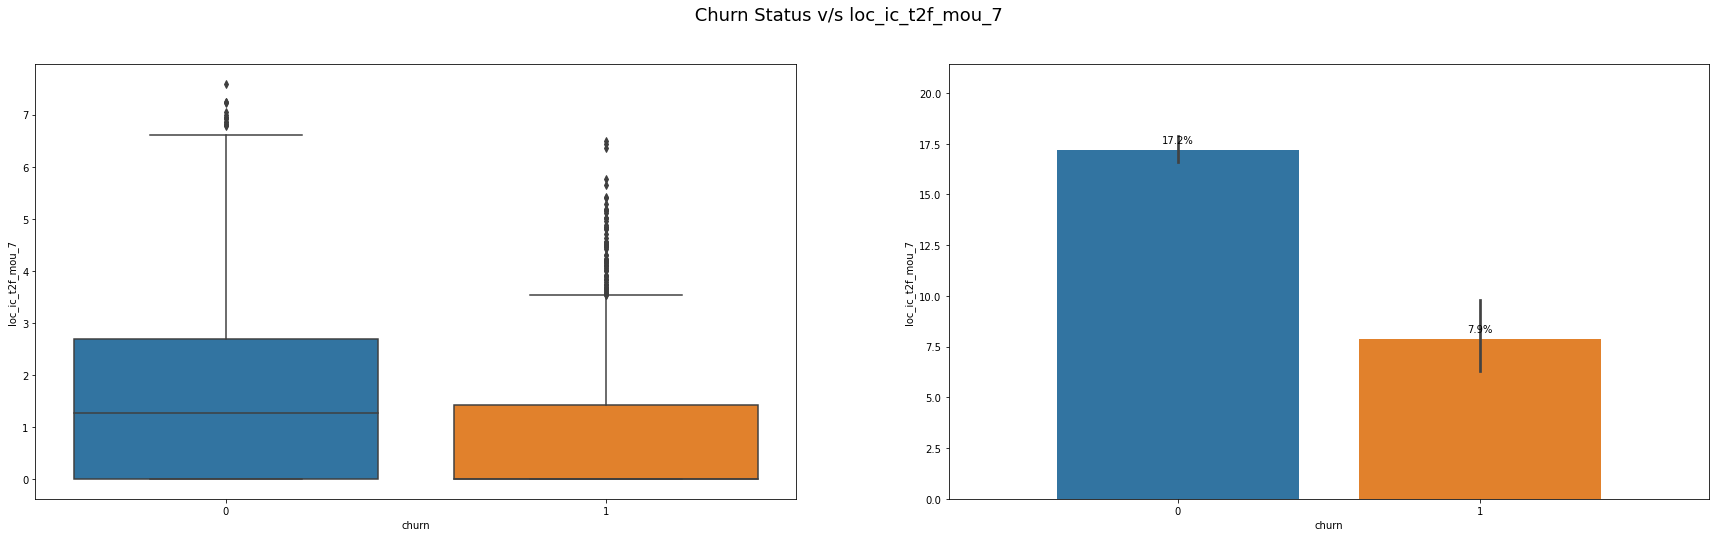

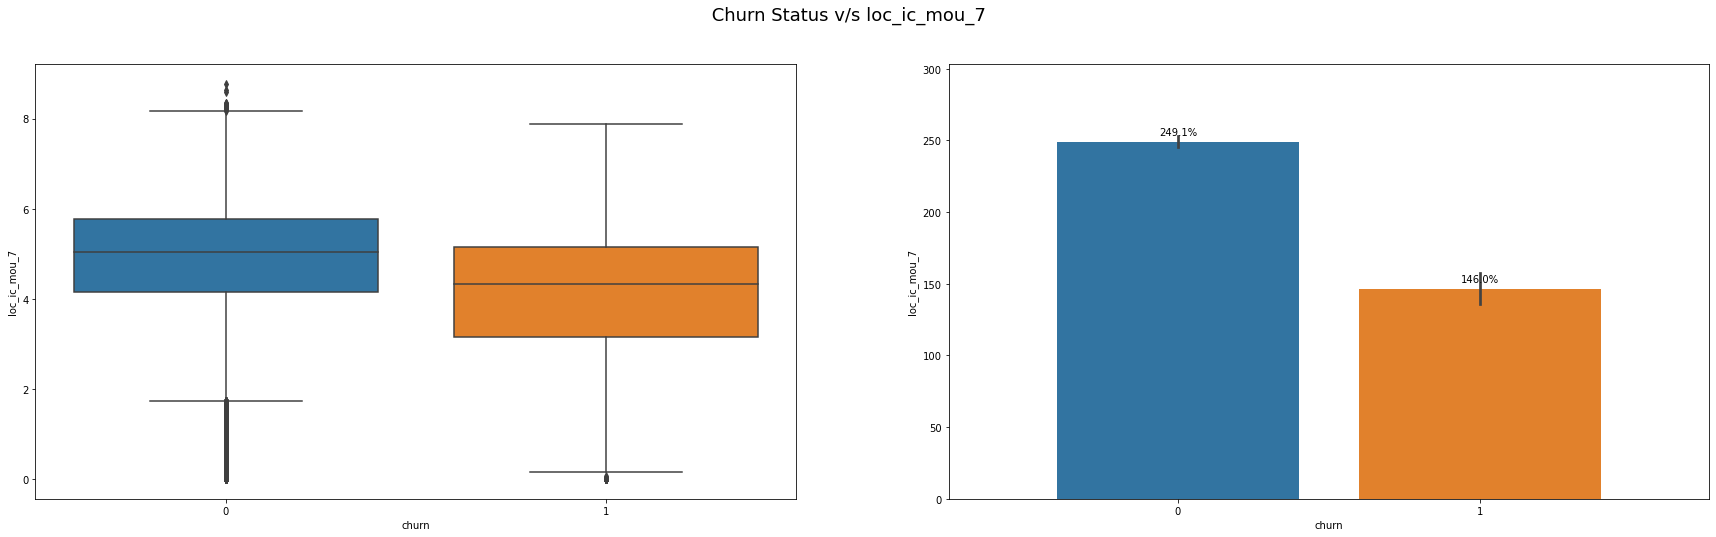

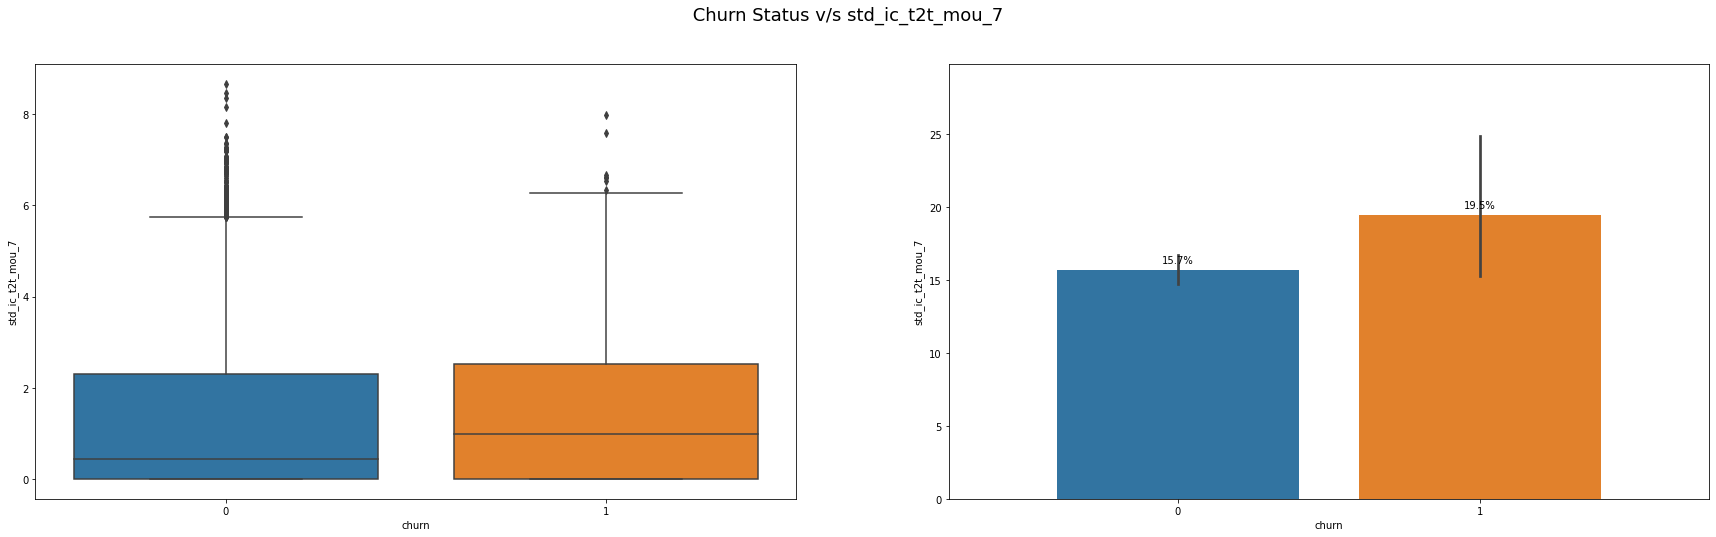

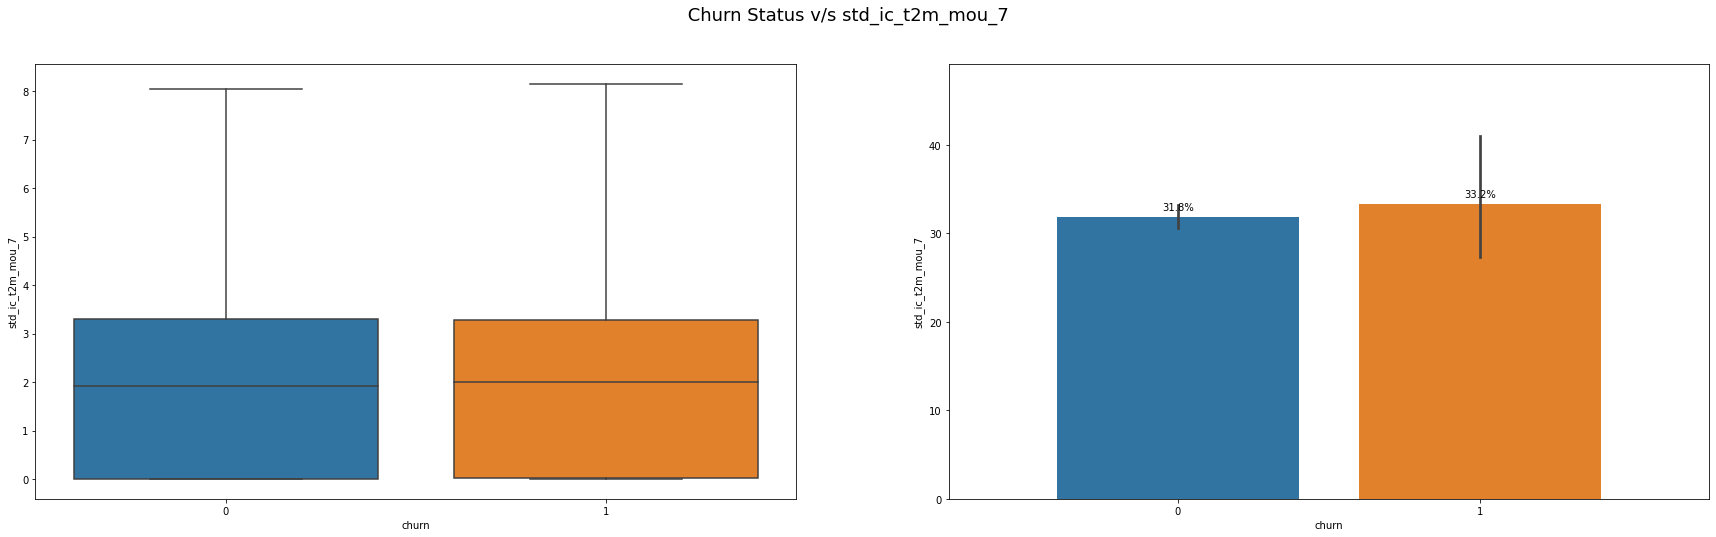

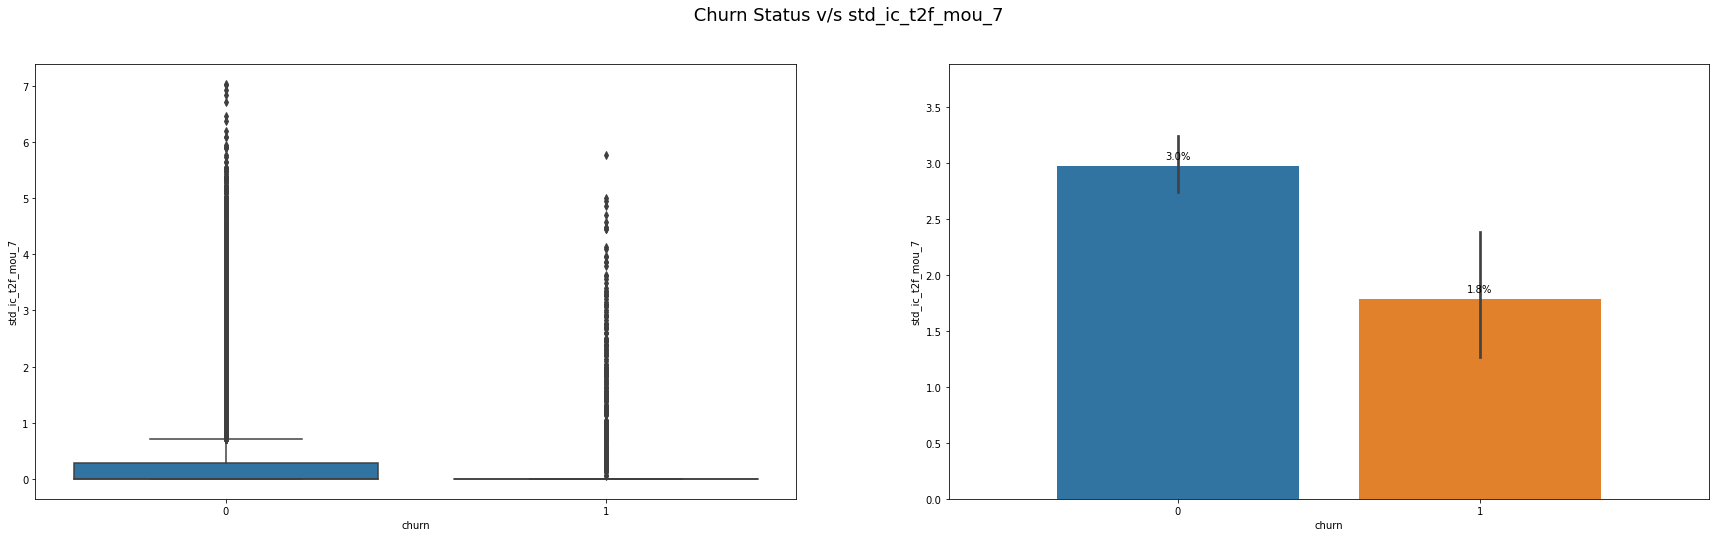

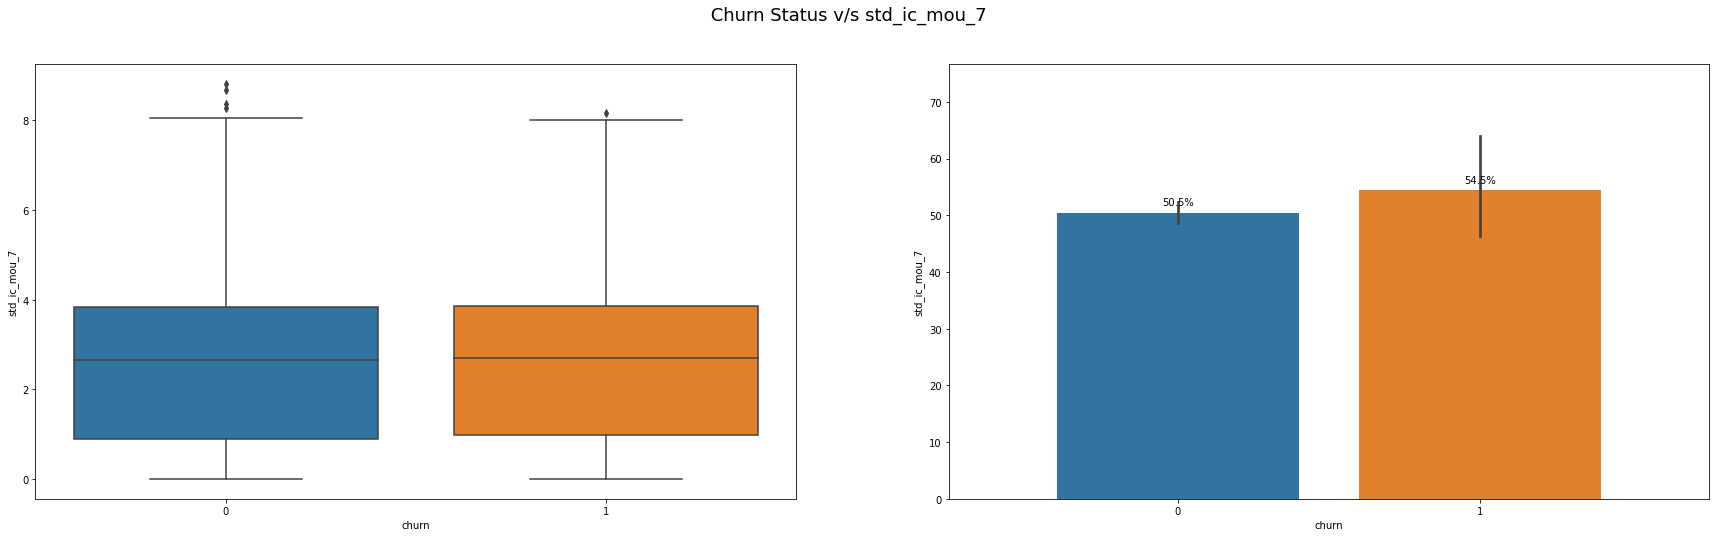

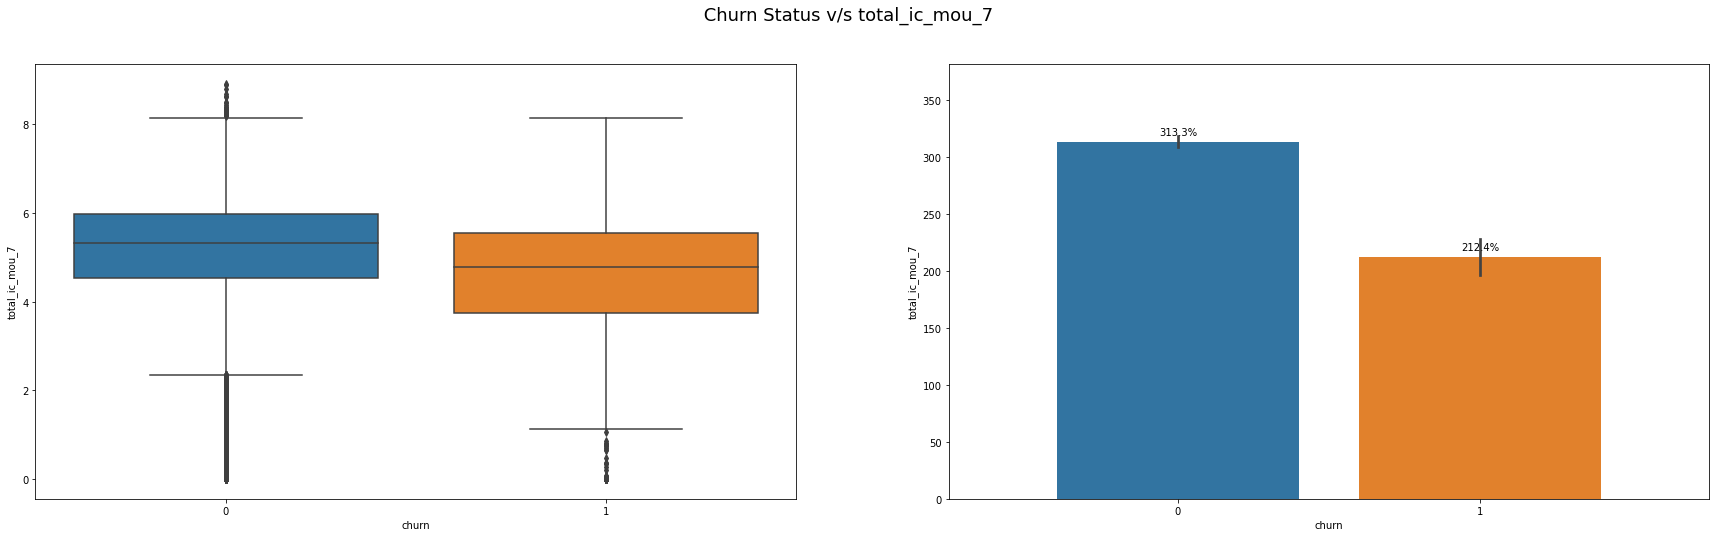

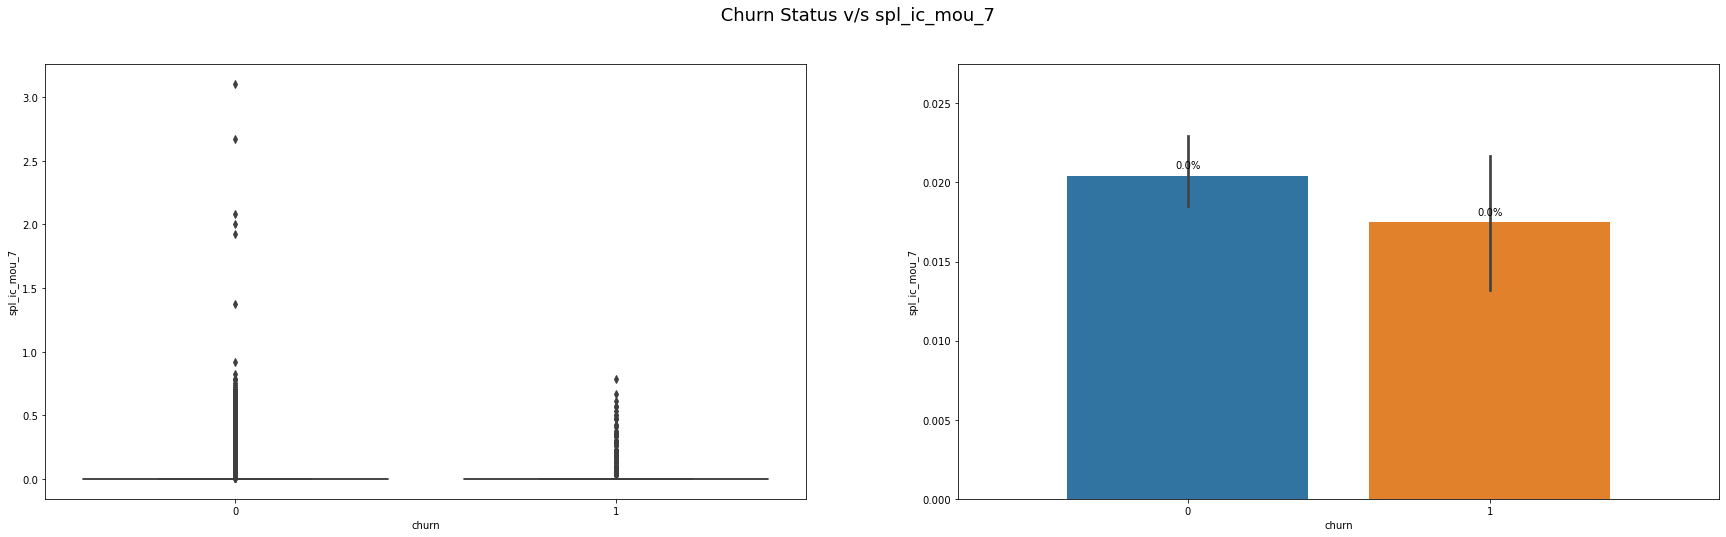

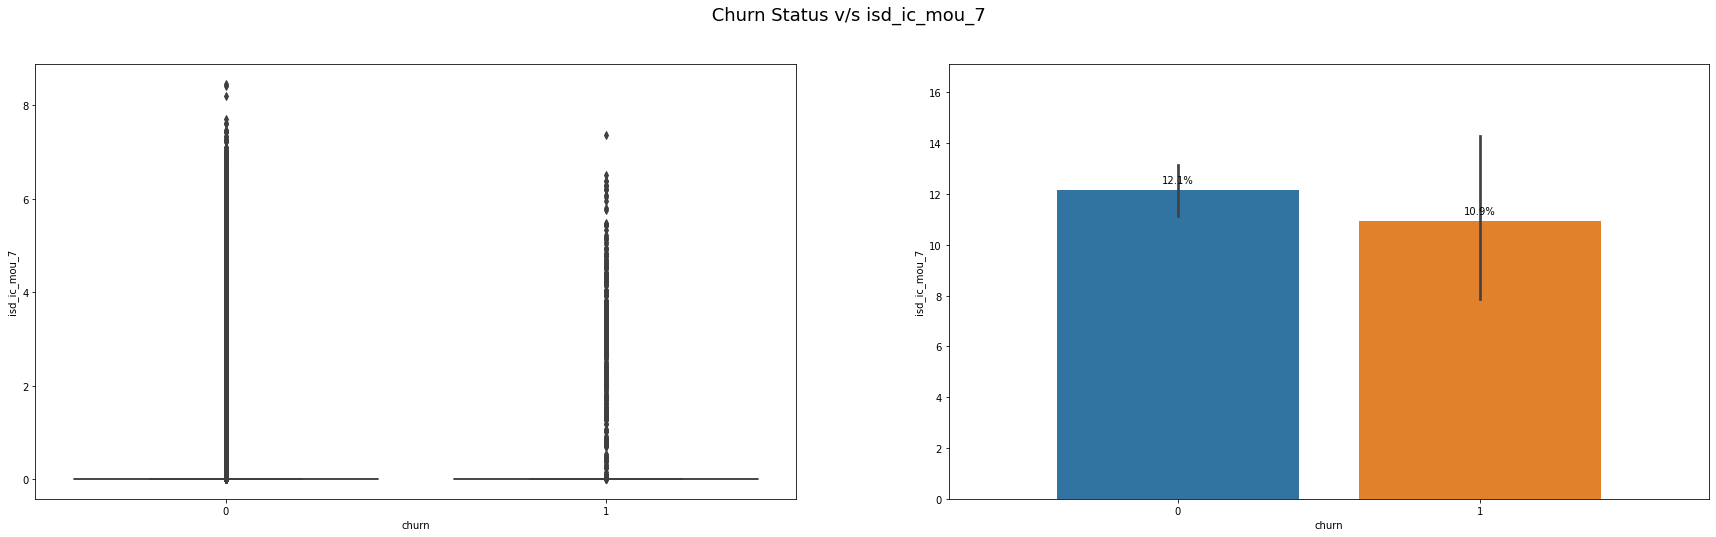

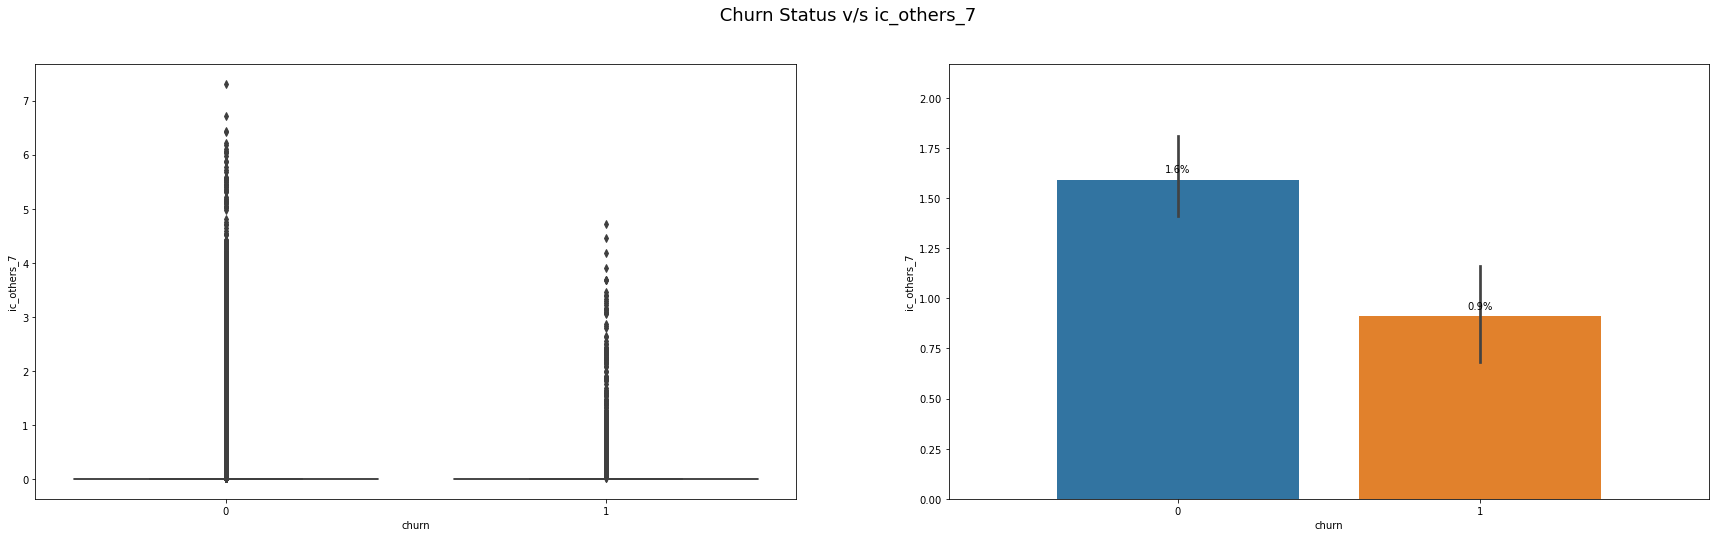

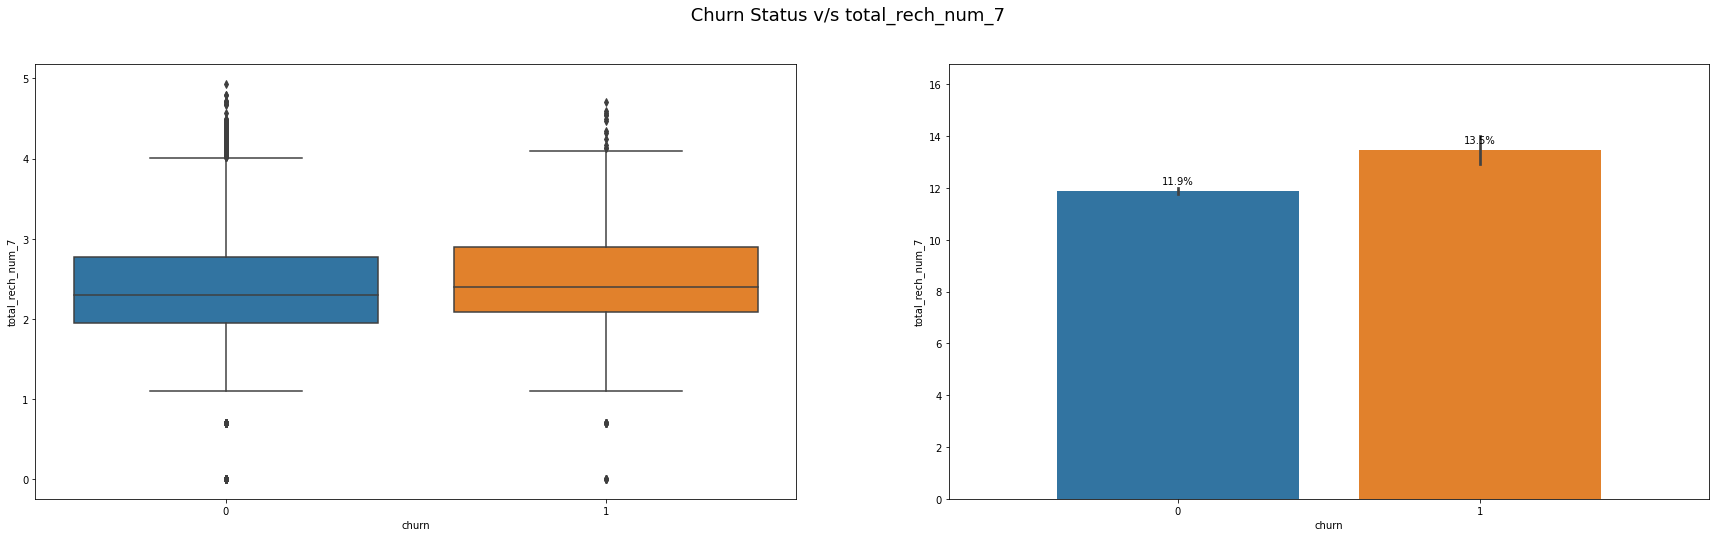

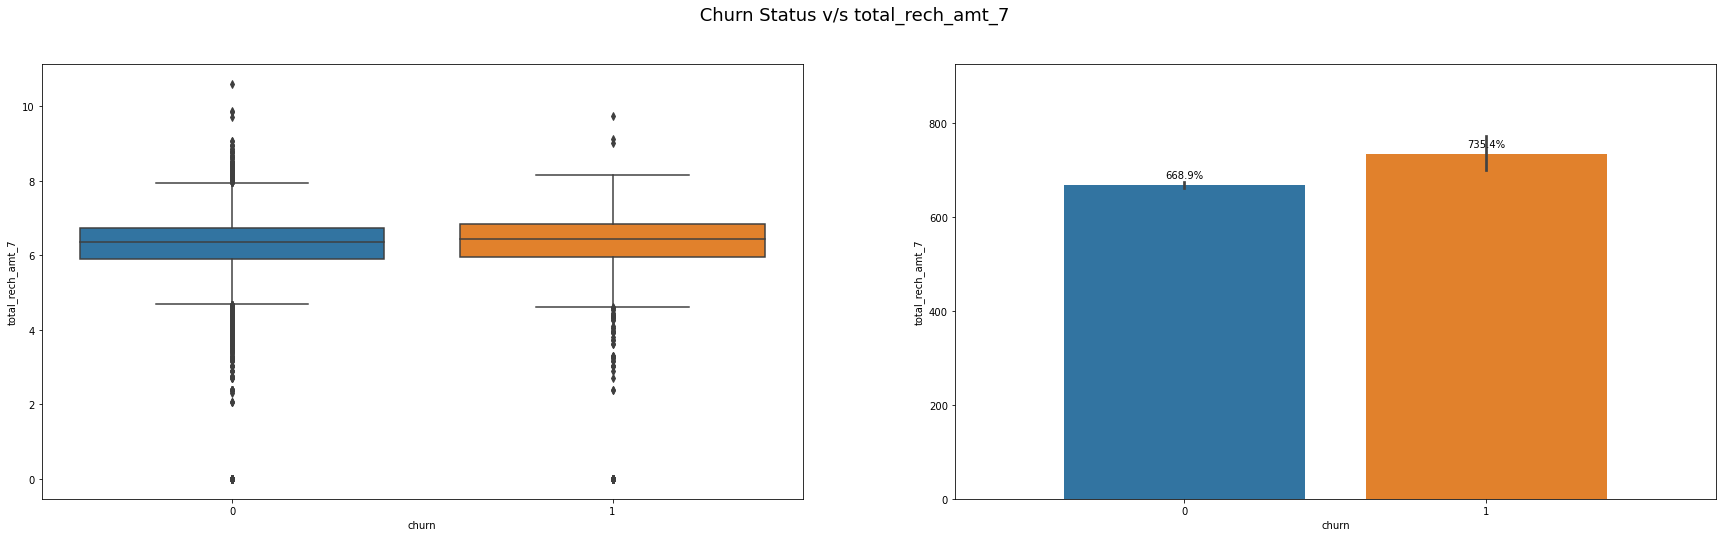

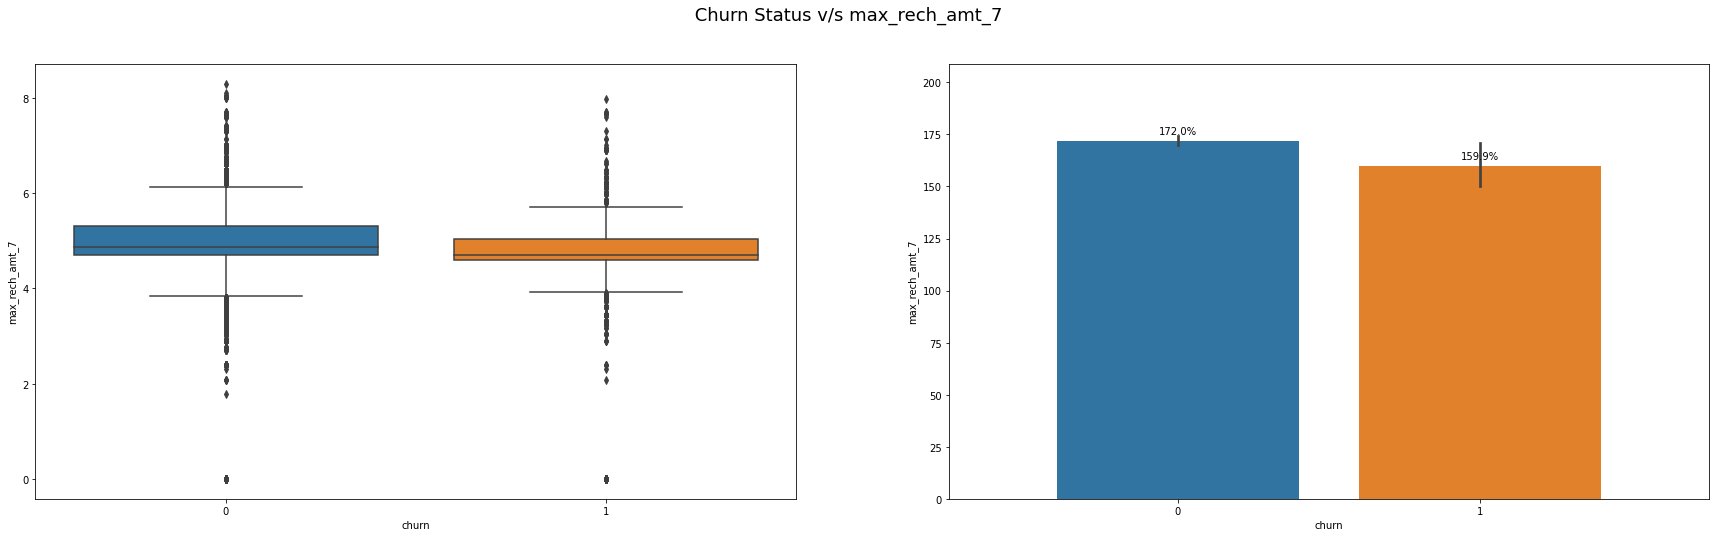

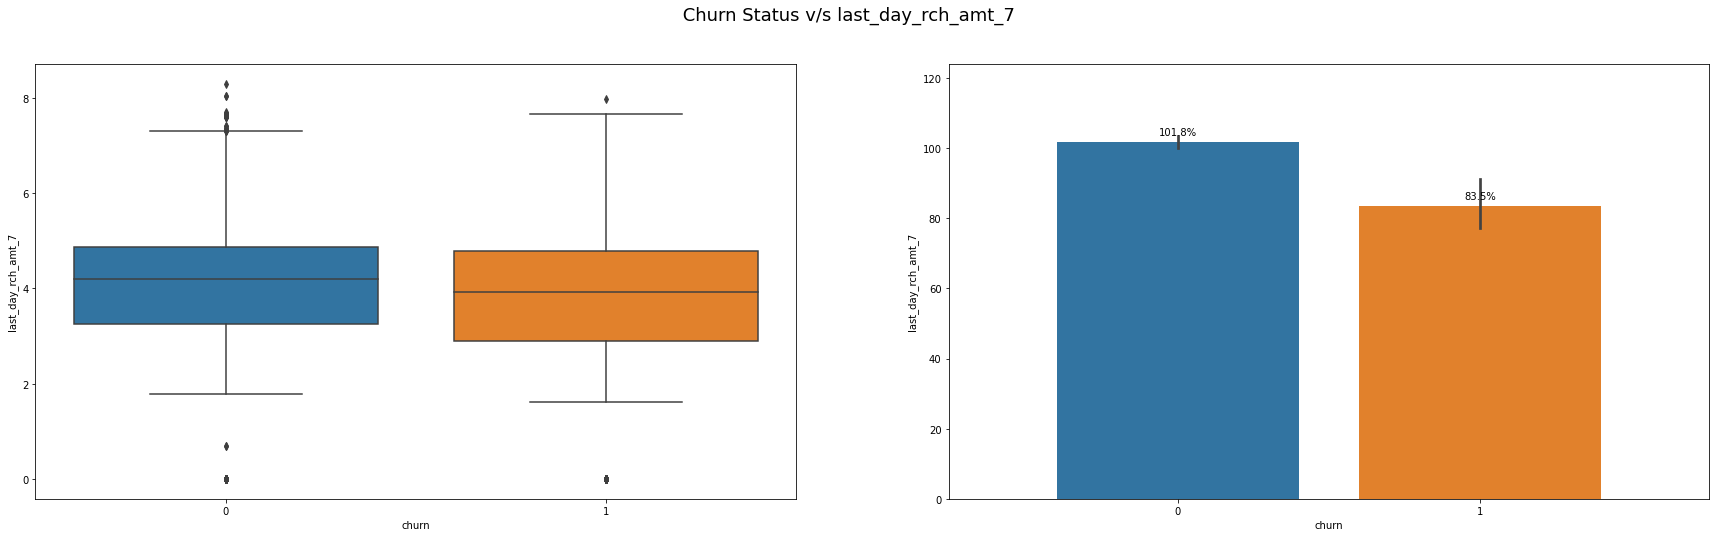

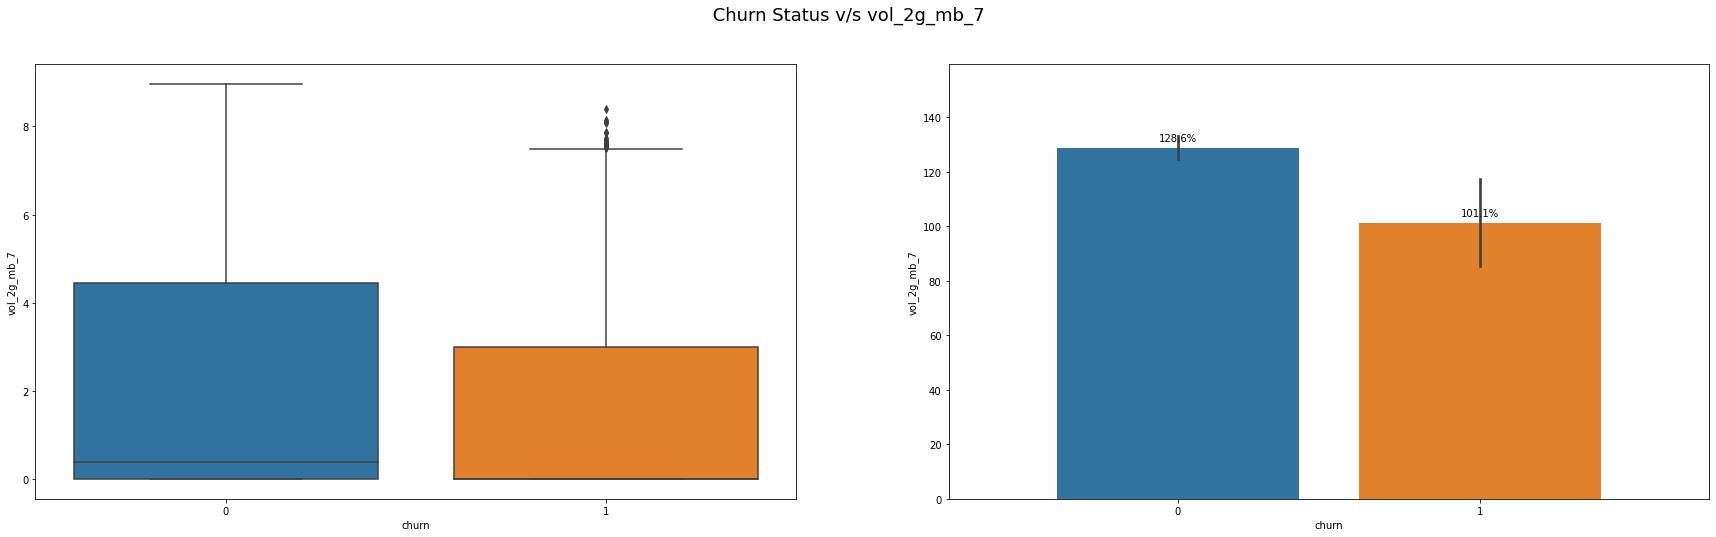

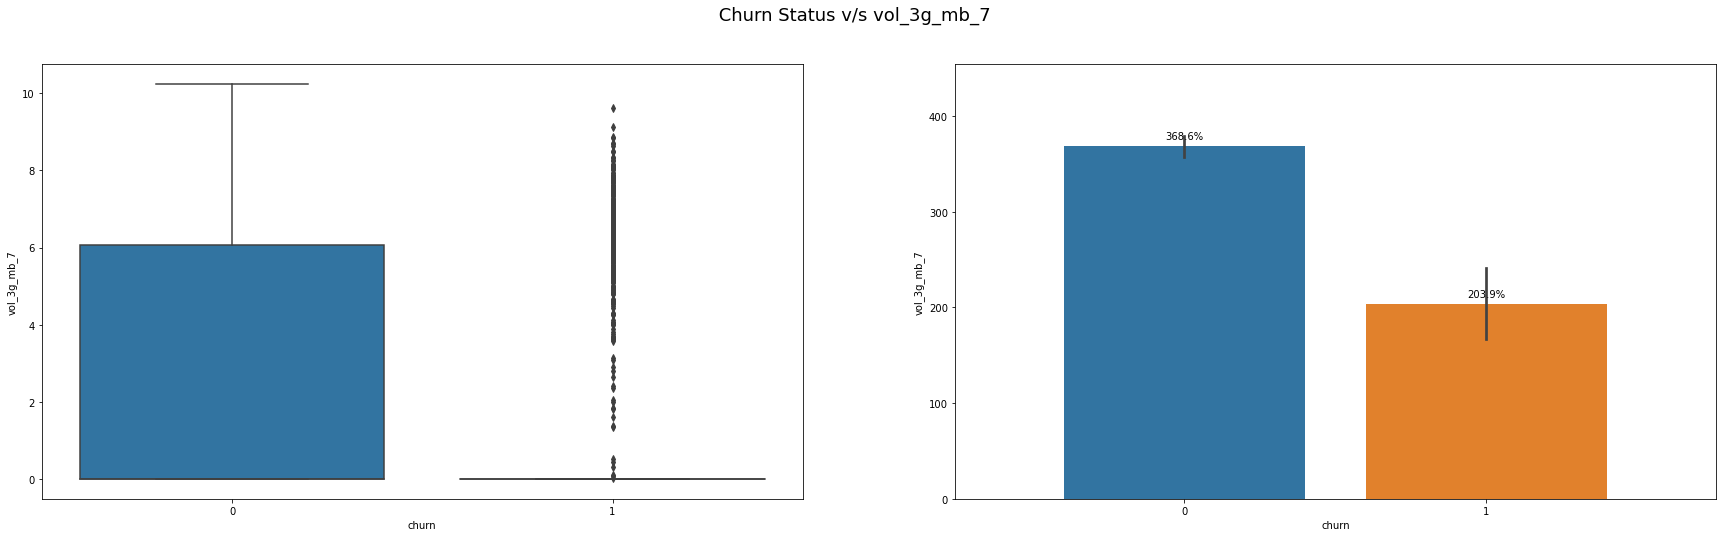

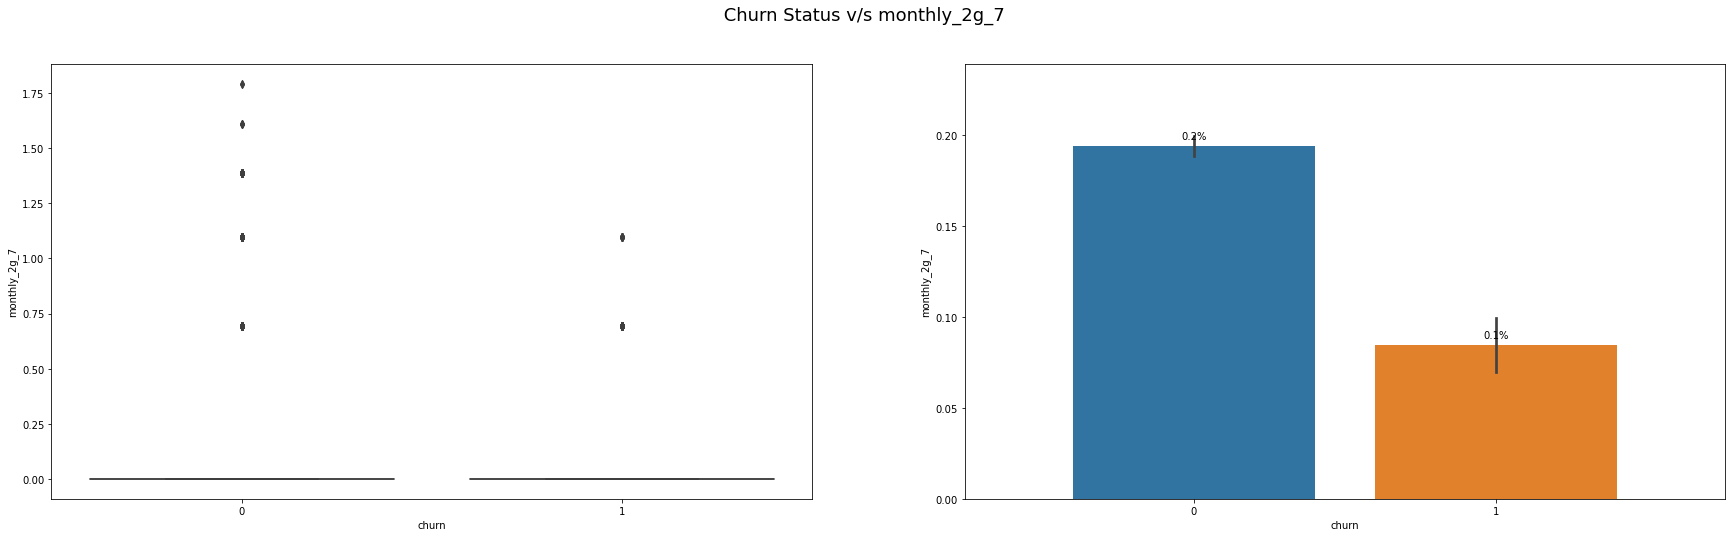

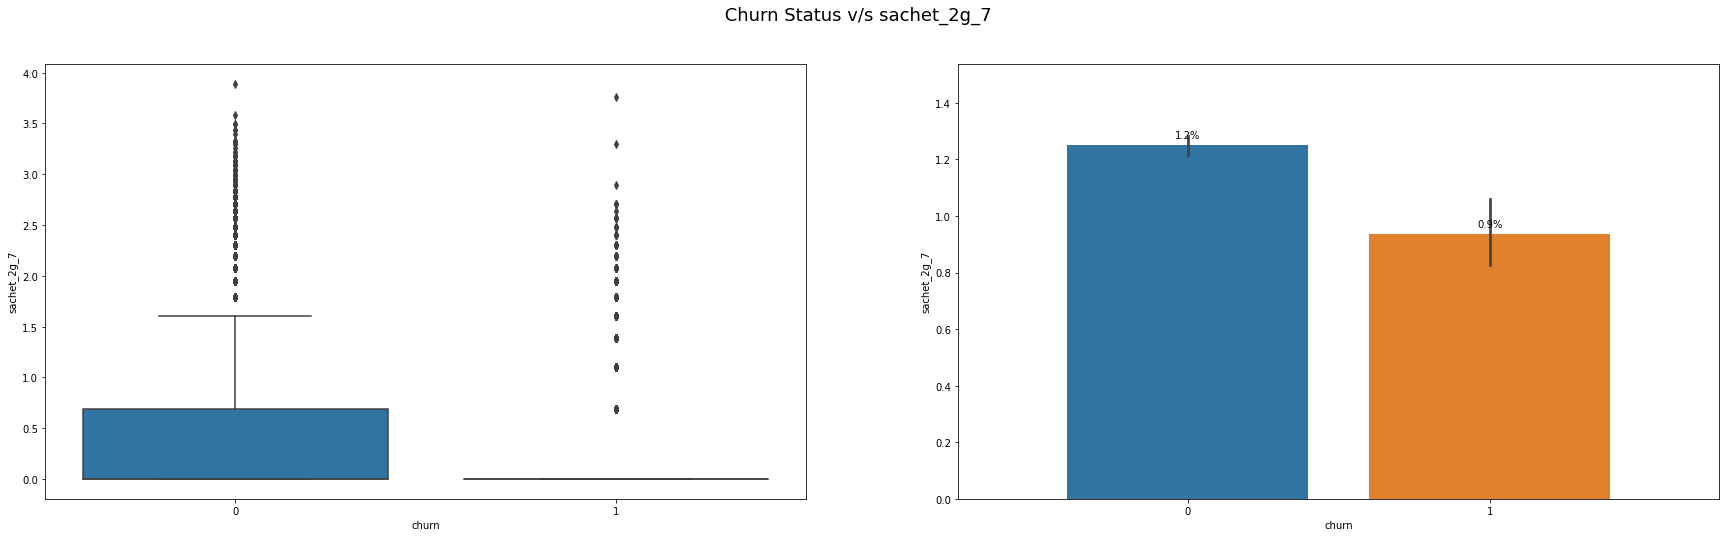

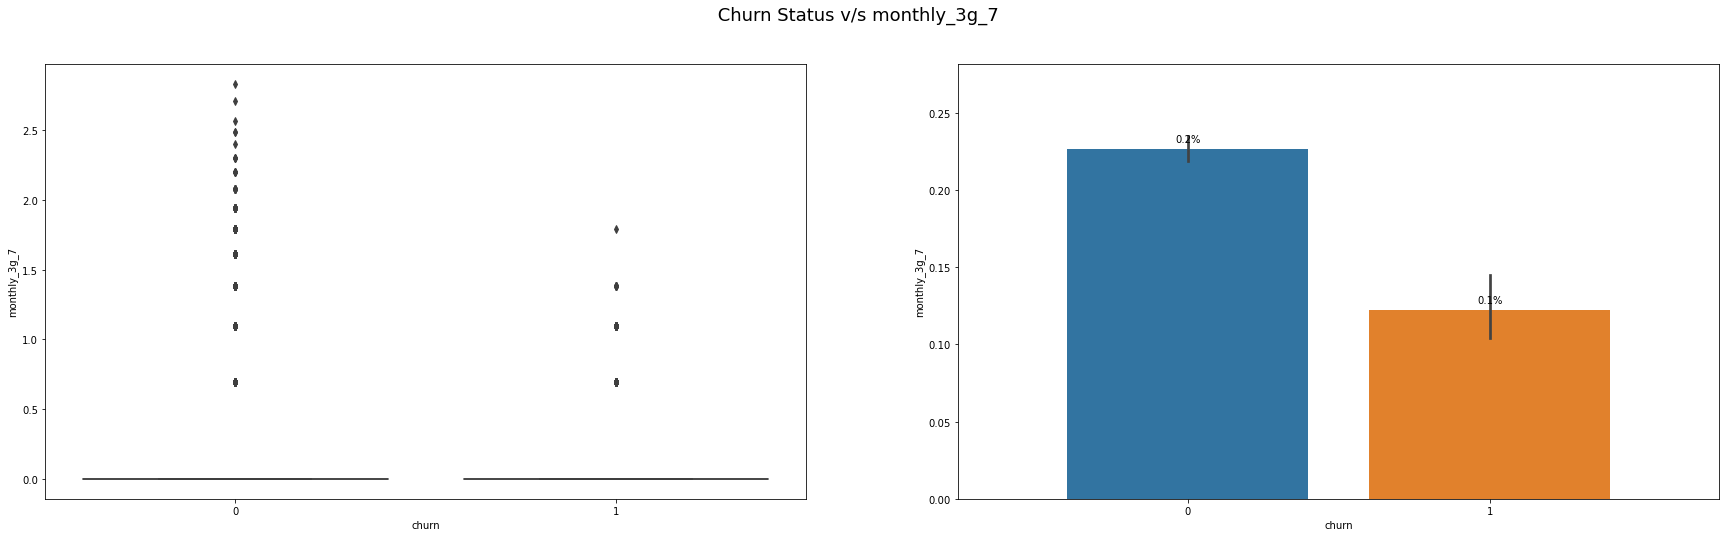

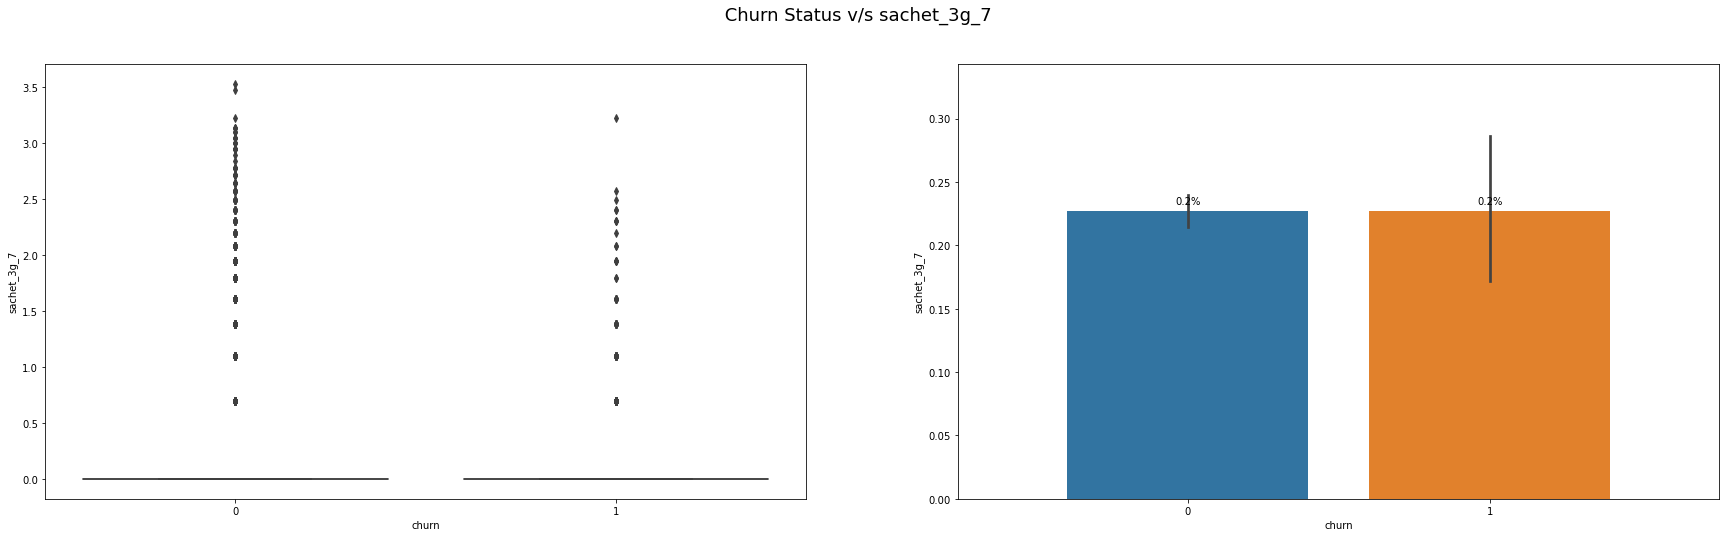

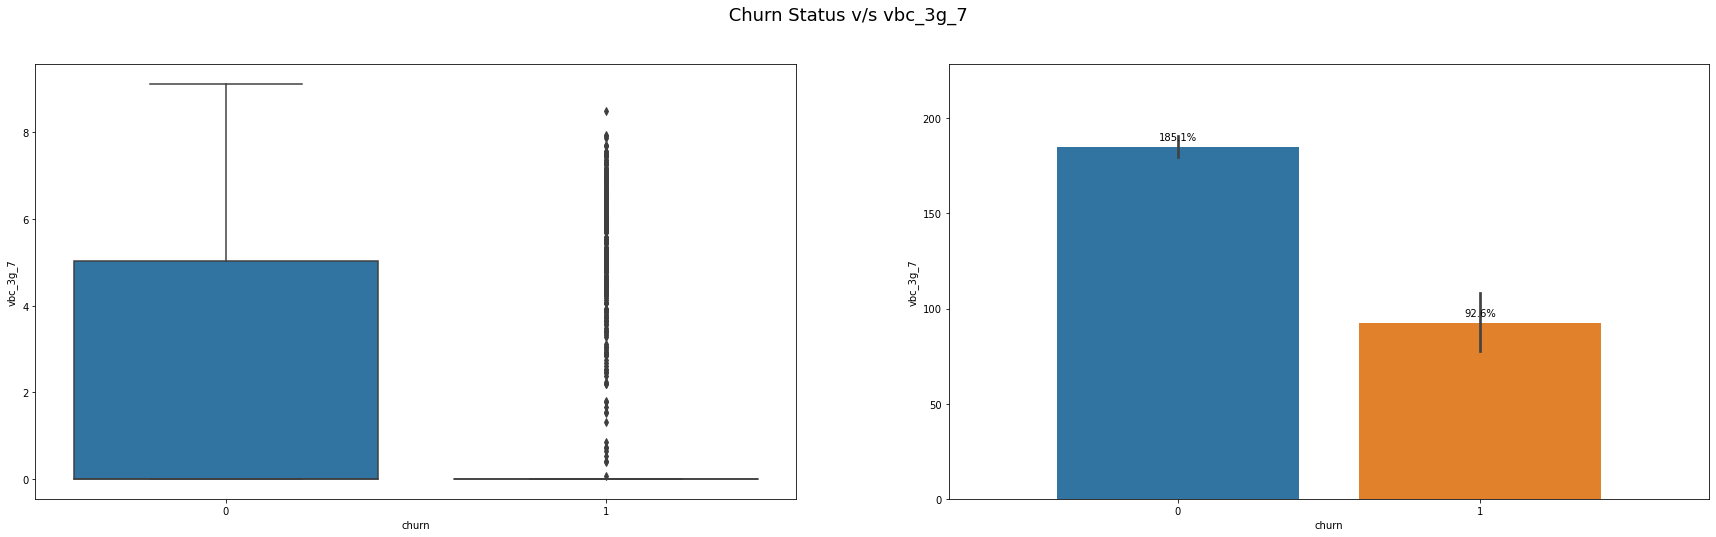

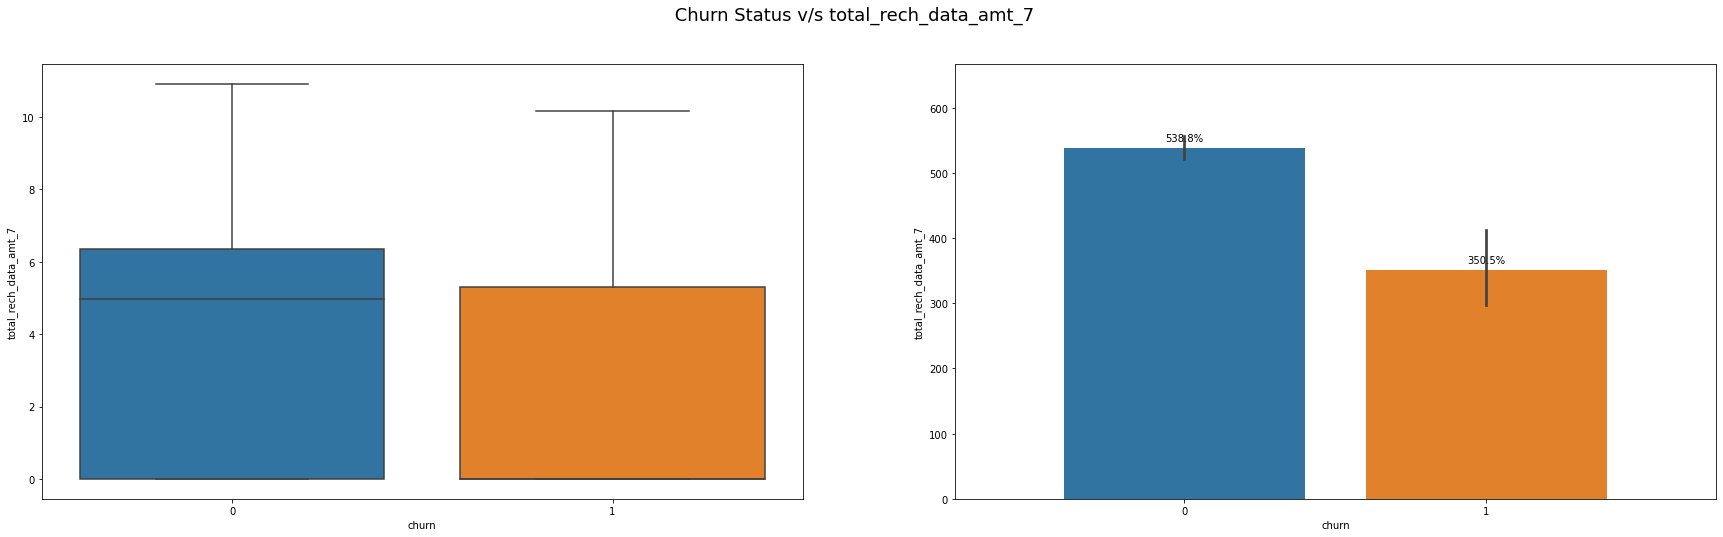

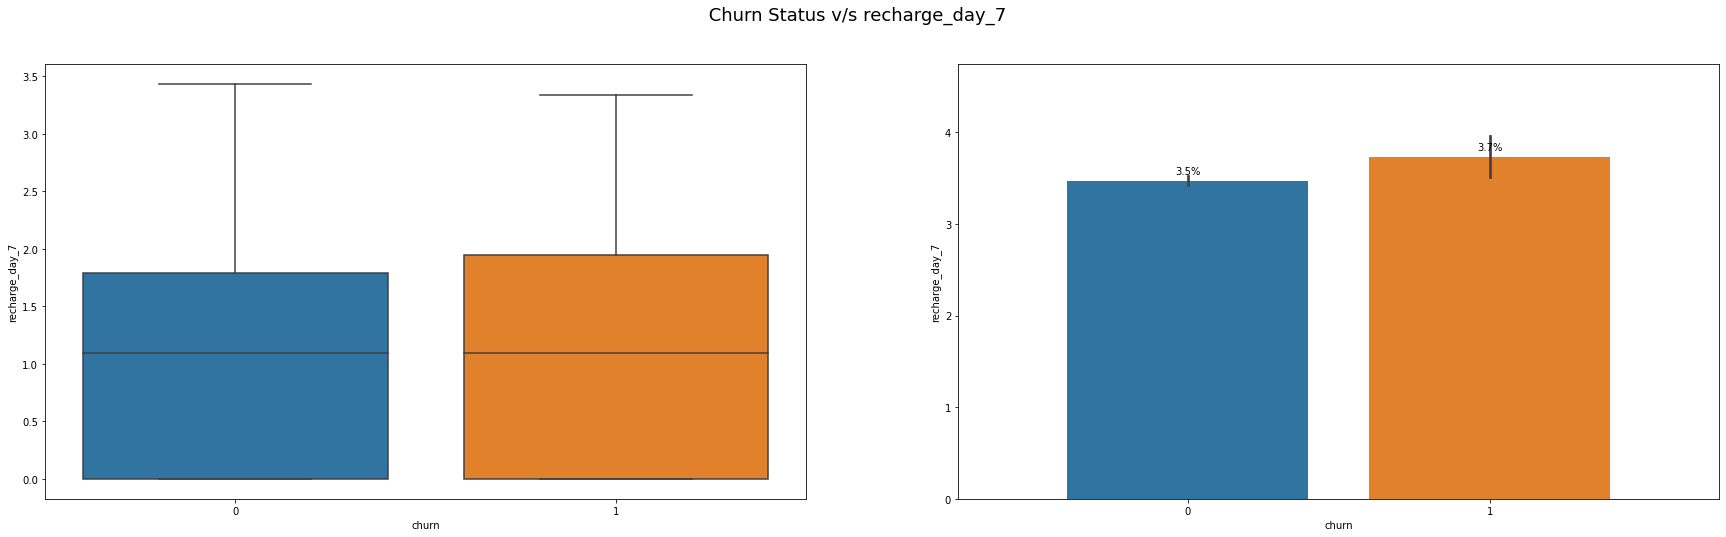

In [37]:
#Check the data in 7th month
for i in telecom_data_master[telecom_data_master.columns[telecom_data_master.columns.to_series().str.contains('_7')]].columns:
    checkChurnStatus(telecom_data_master,i)

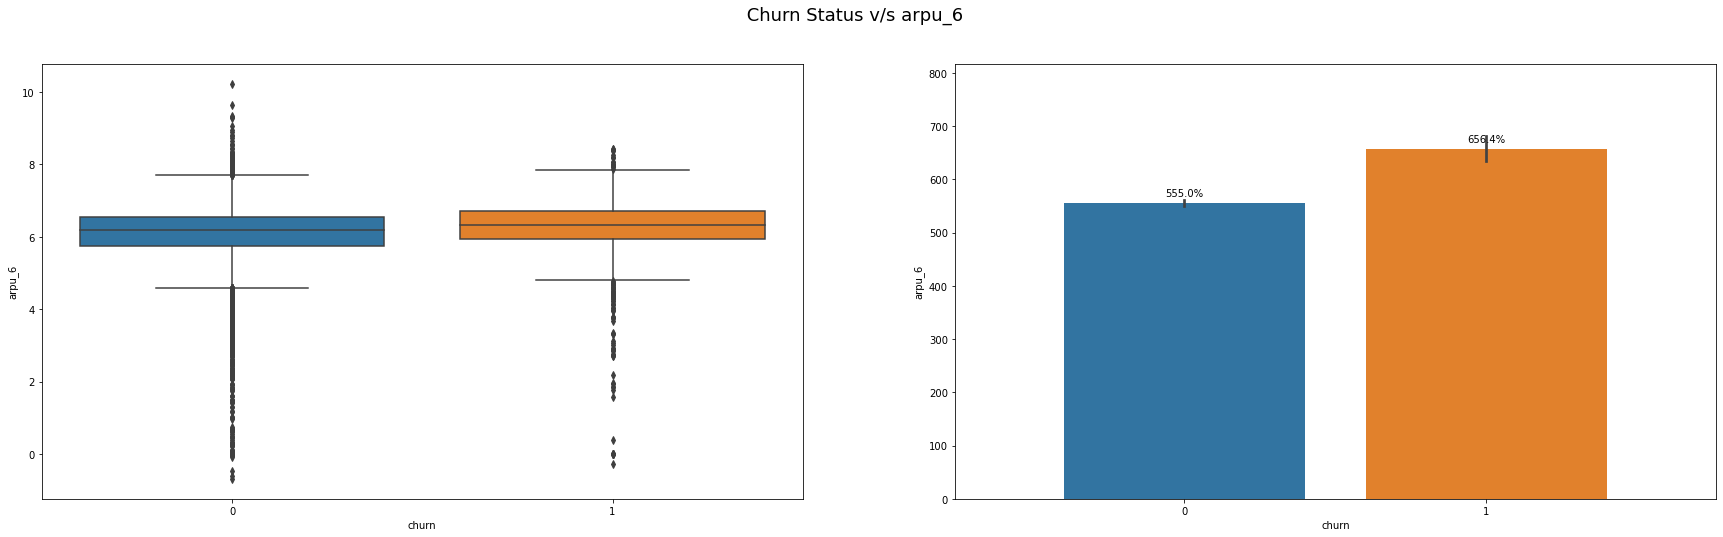

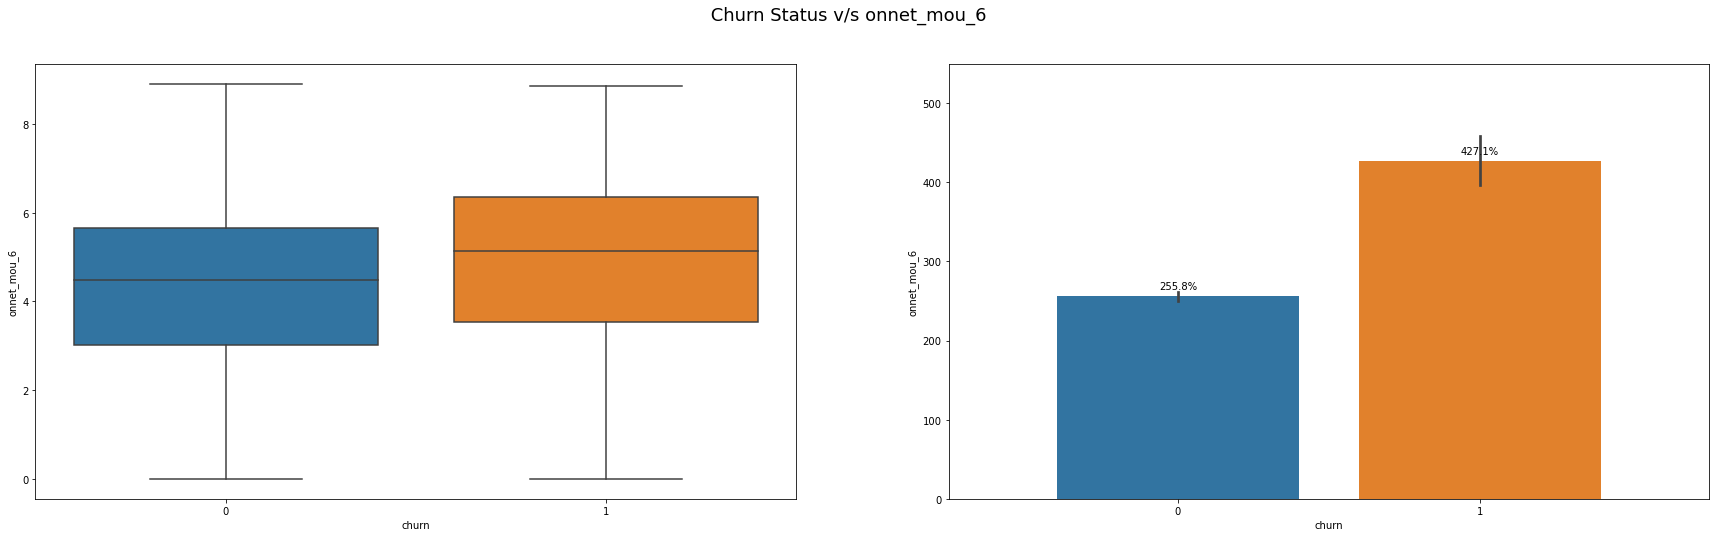

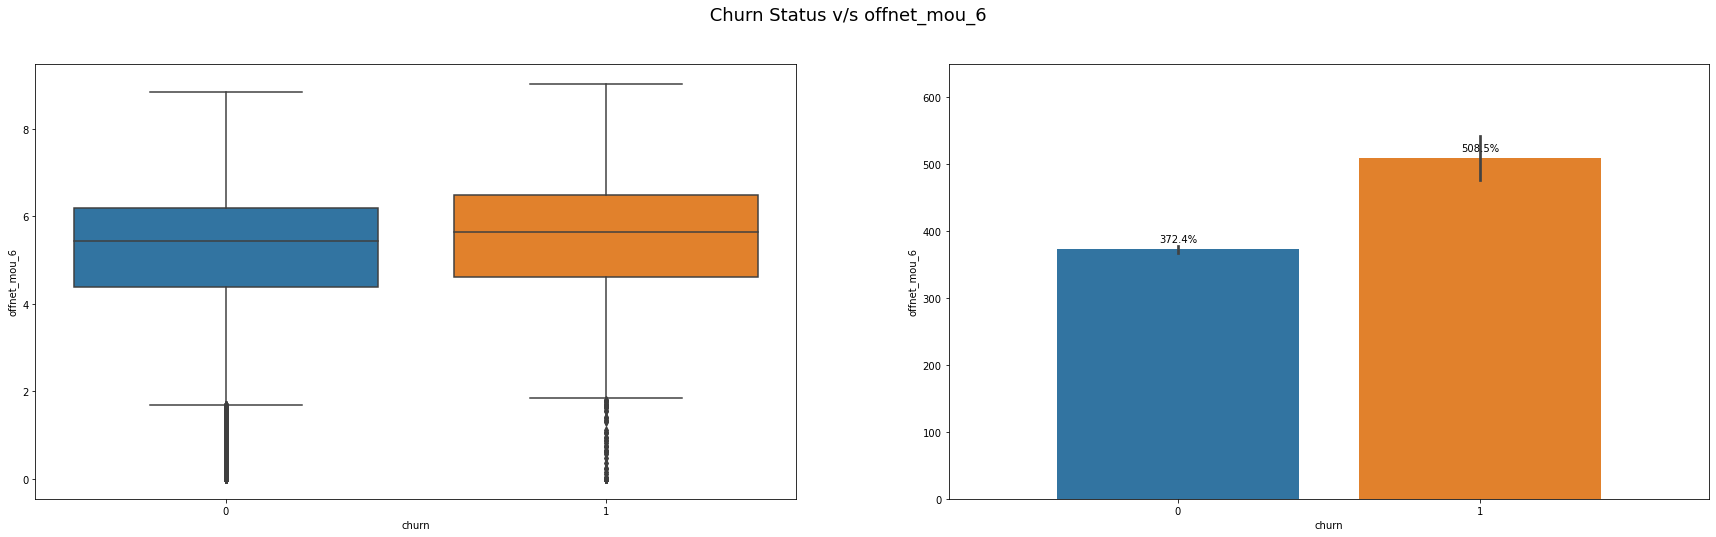

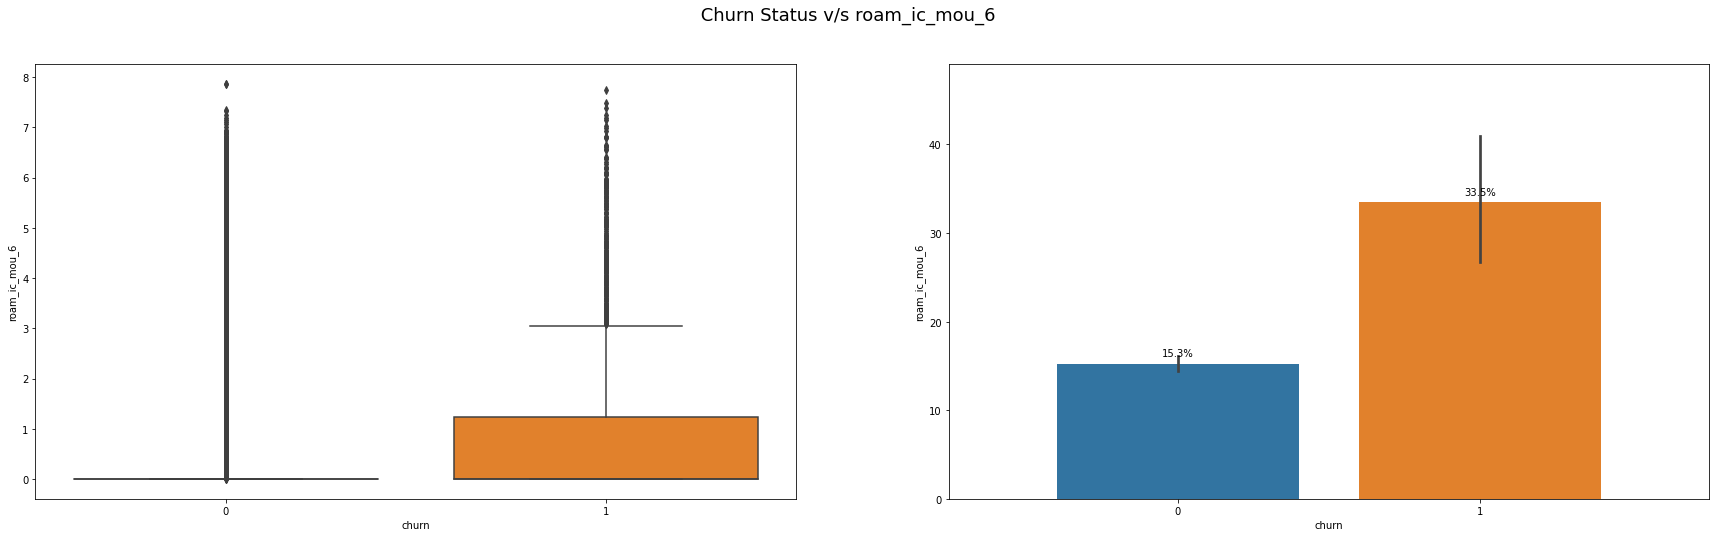

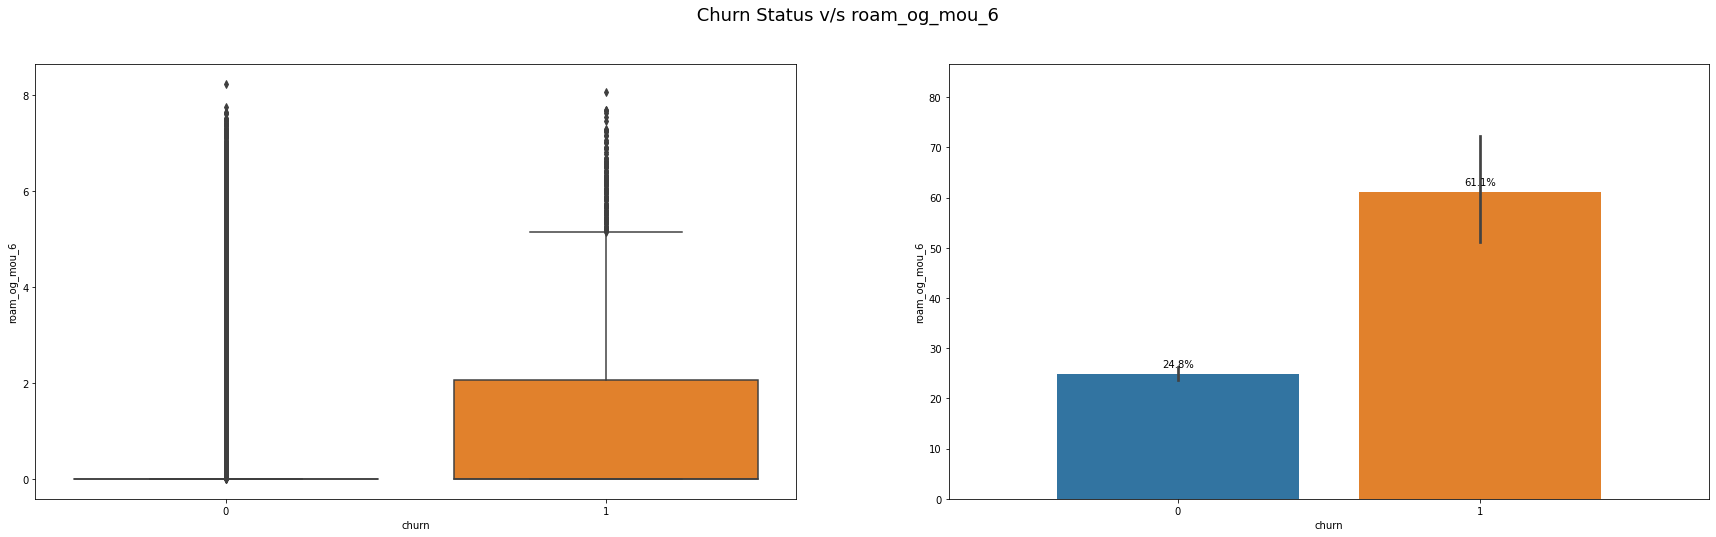

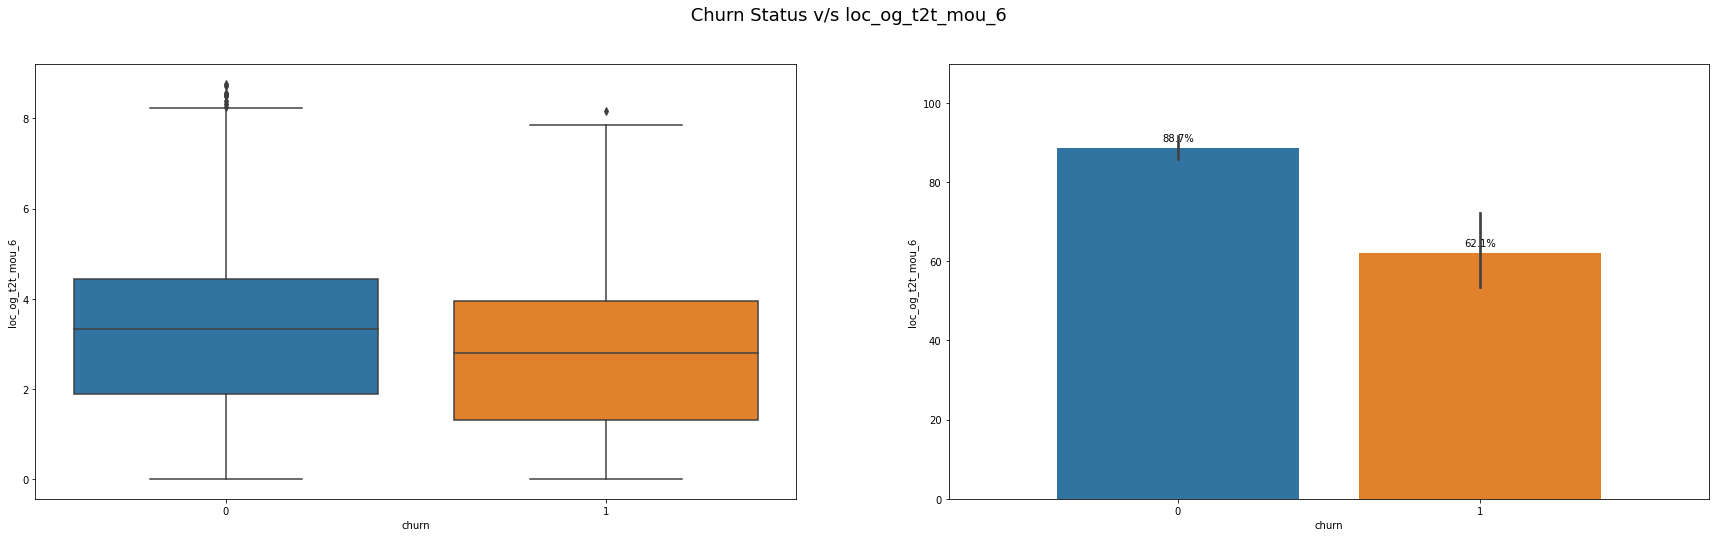

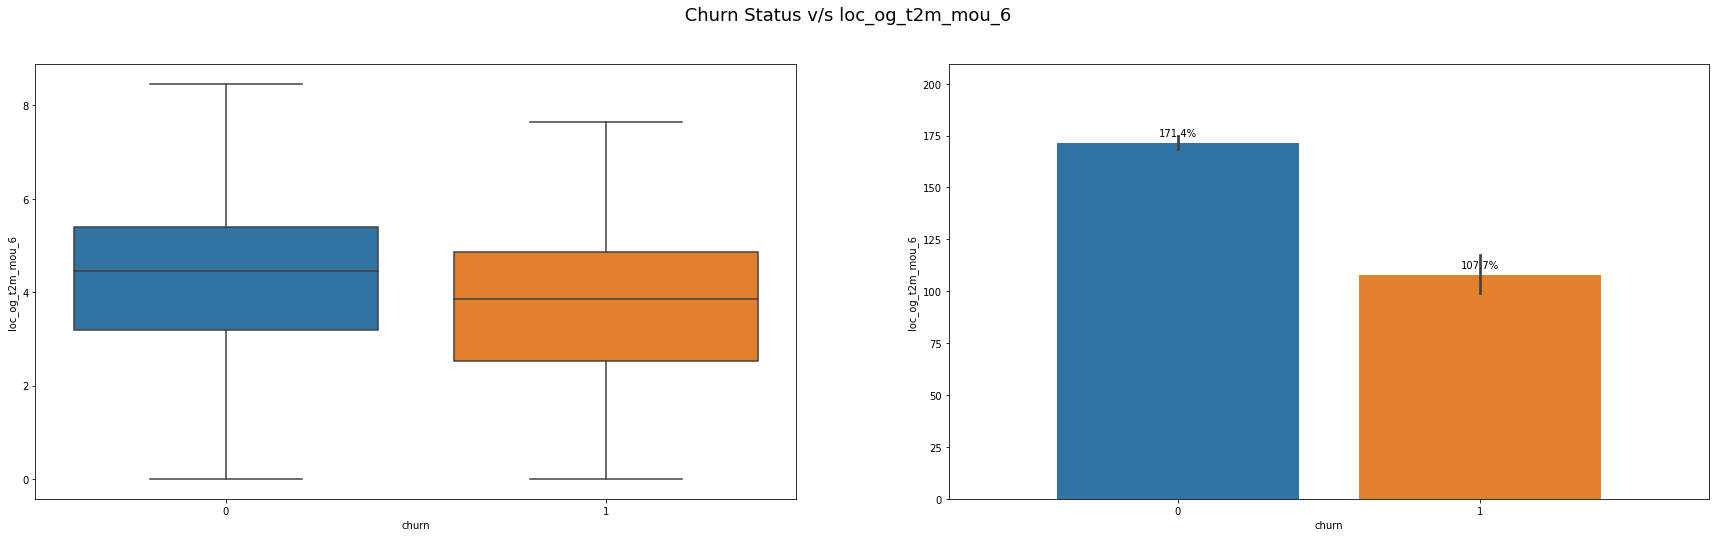

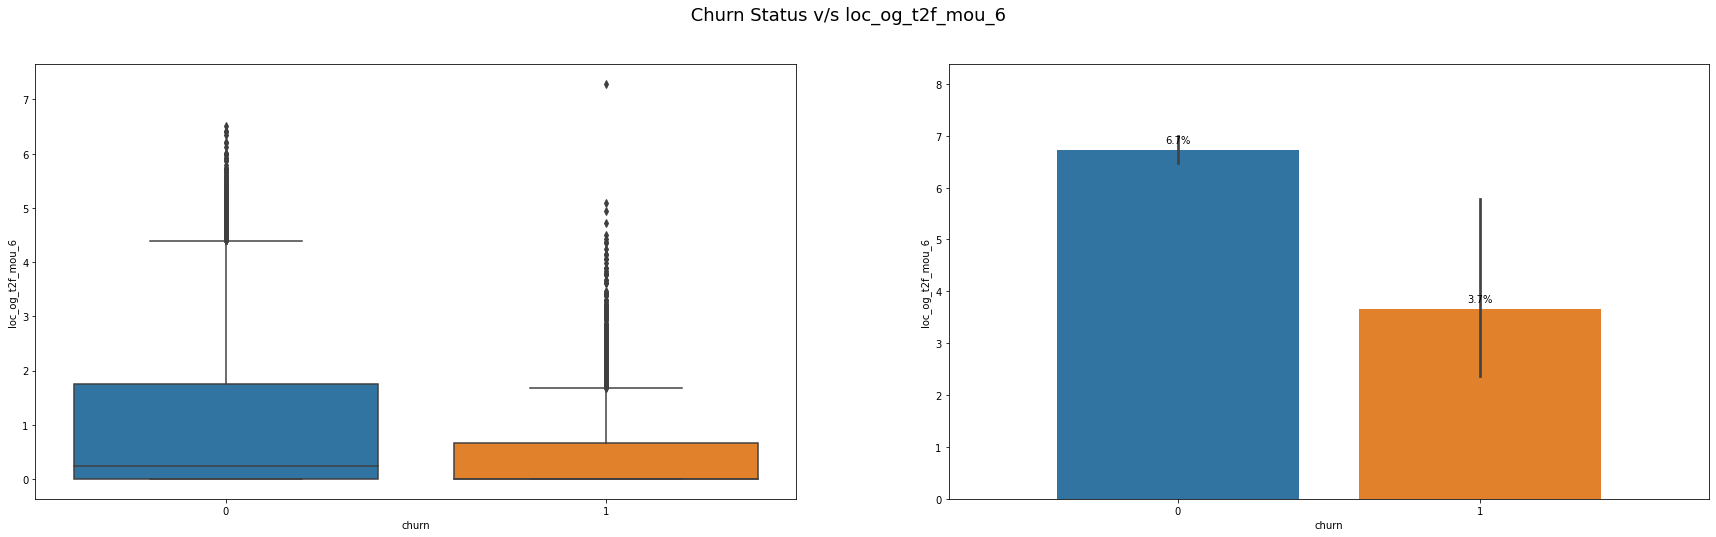

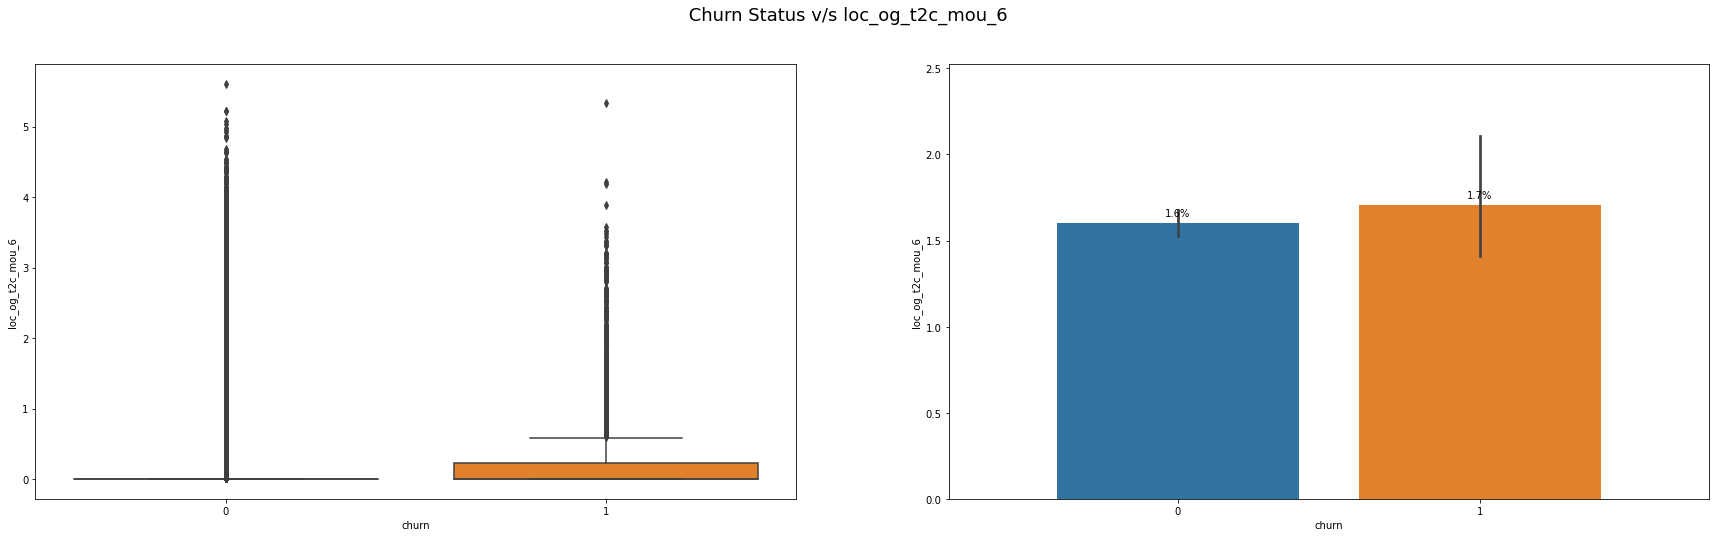

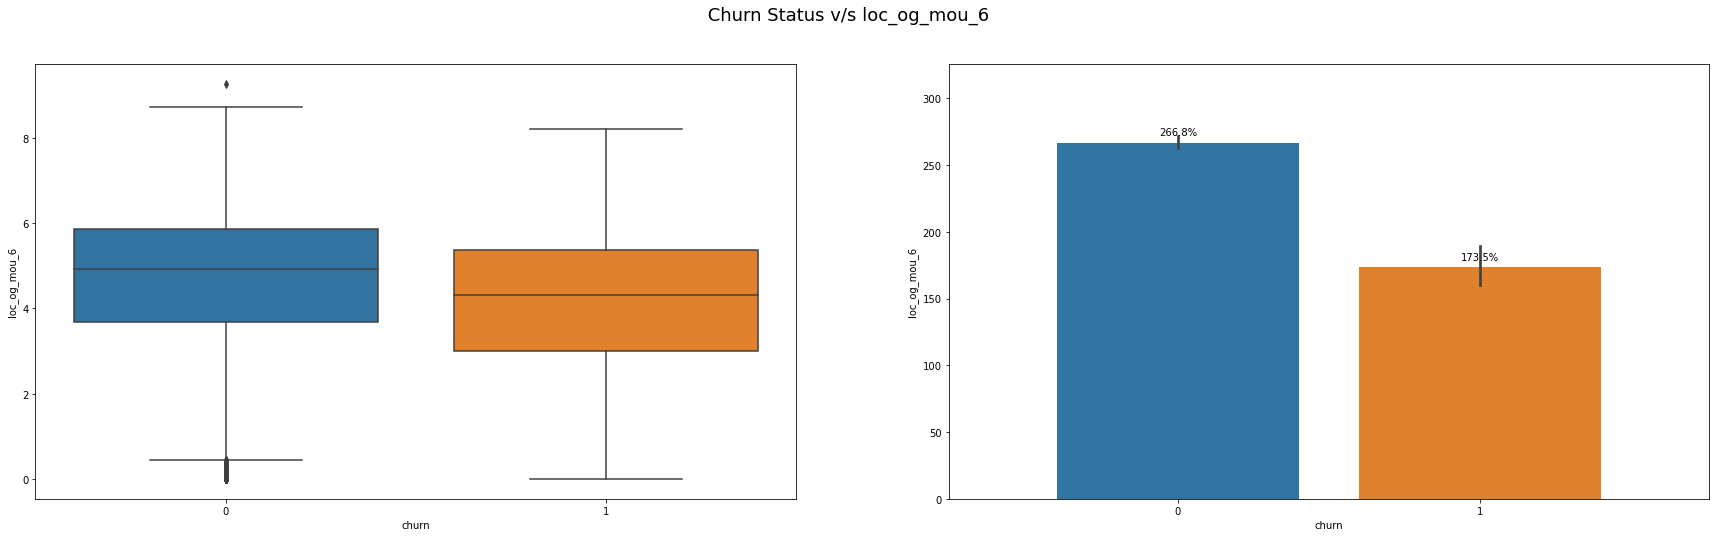

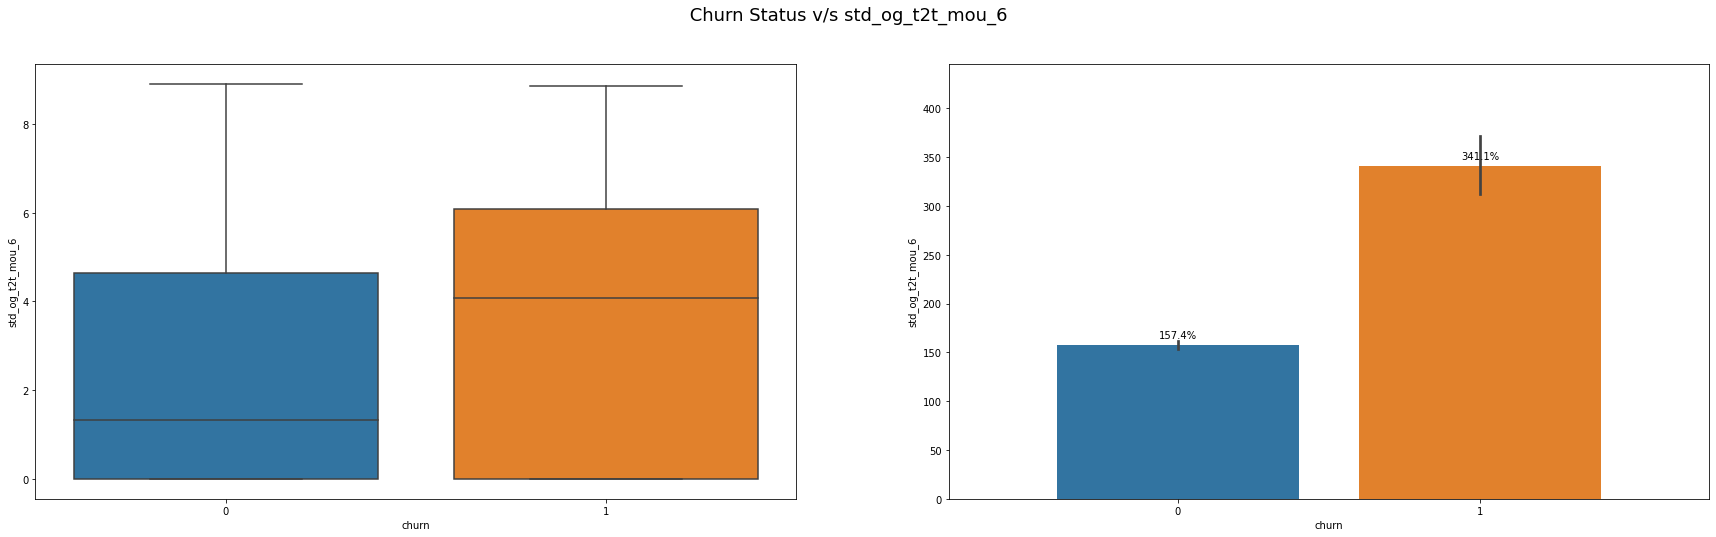

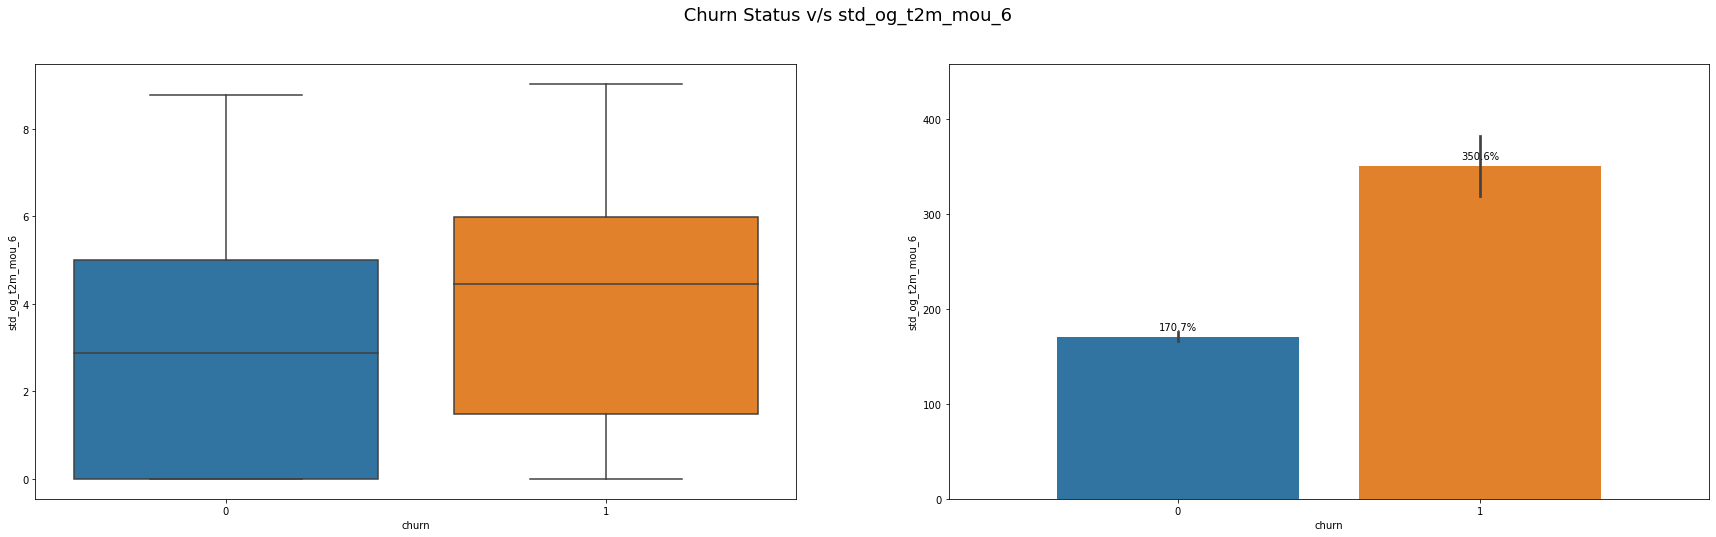

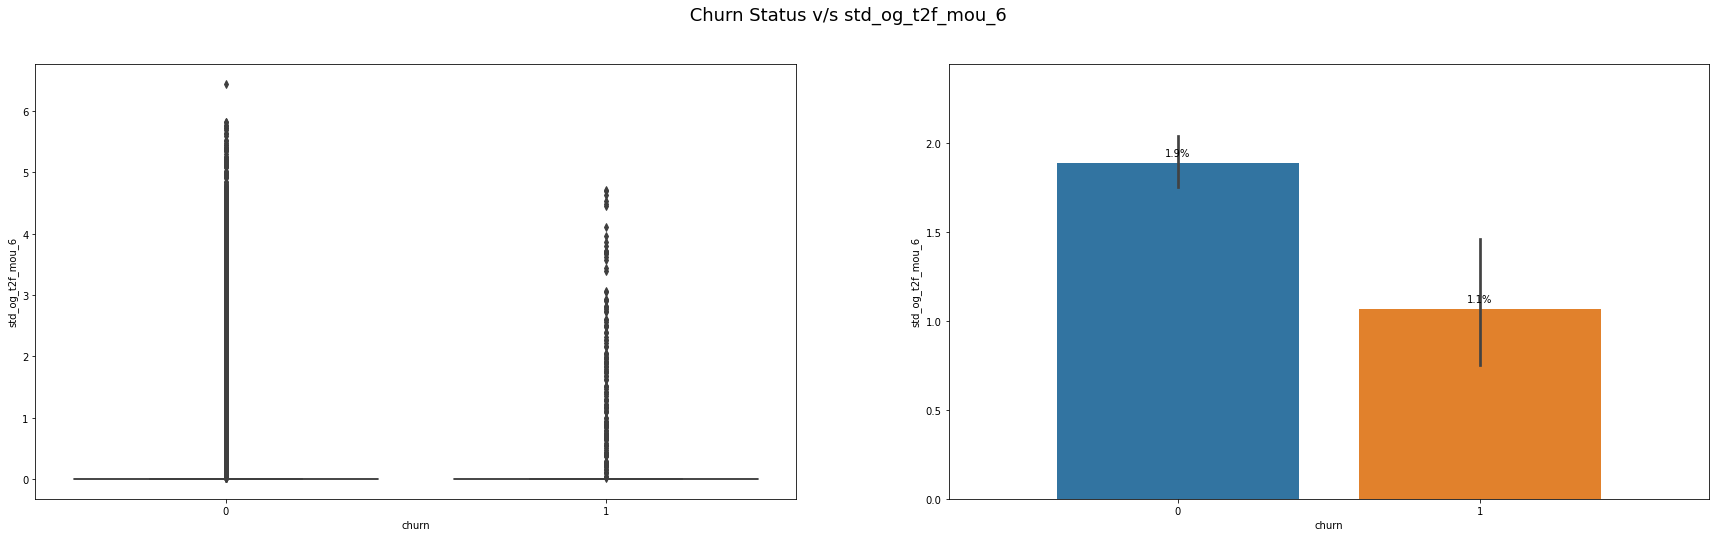

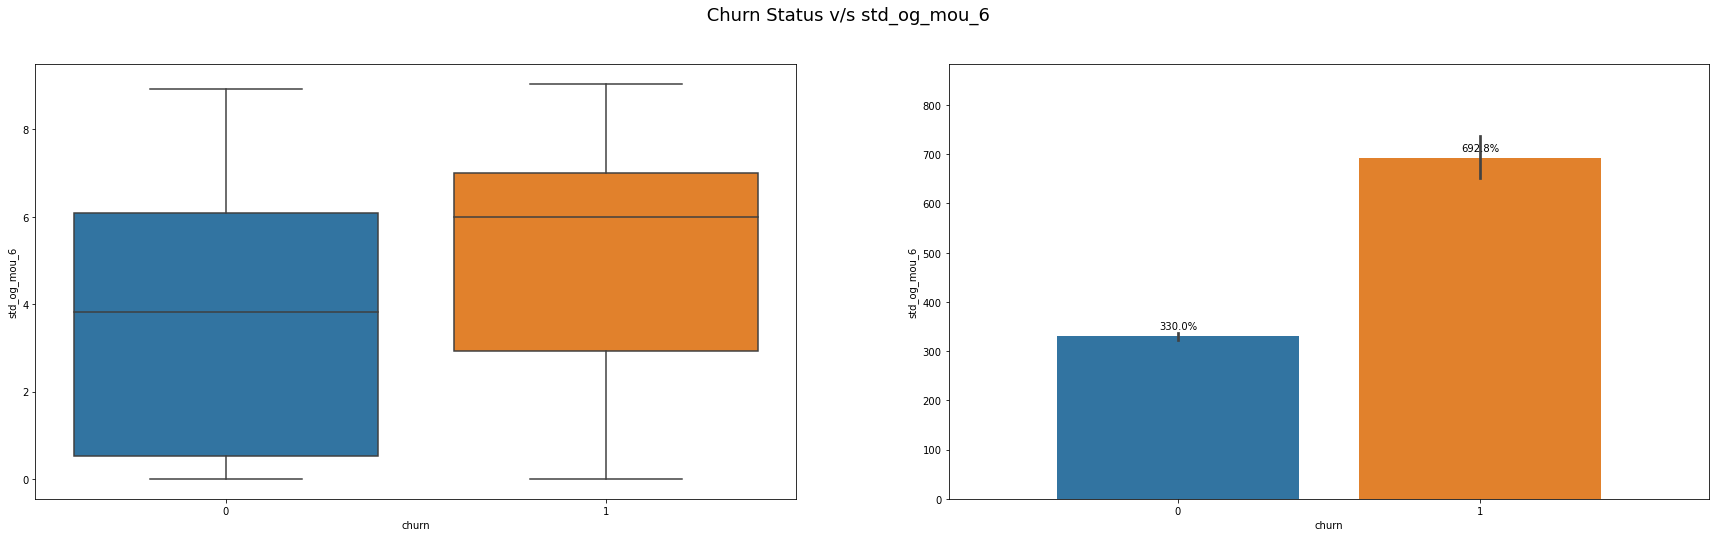

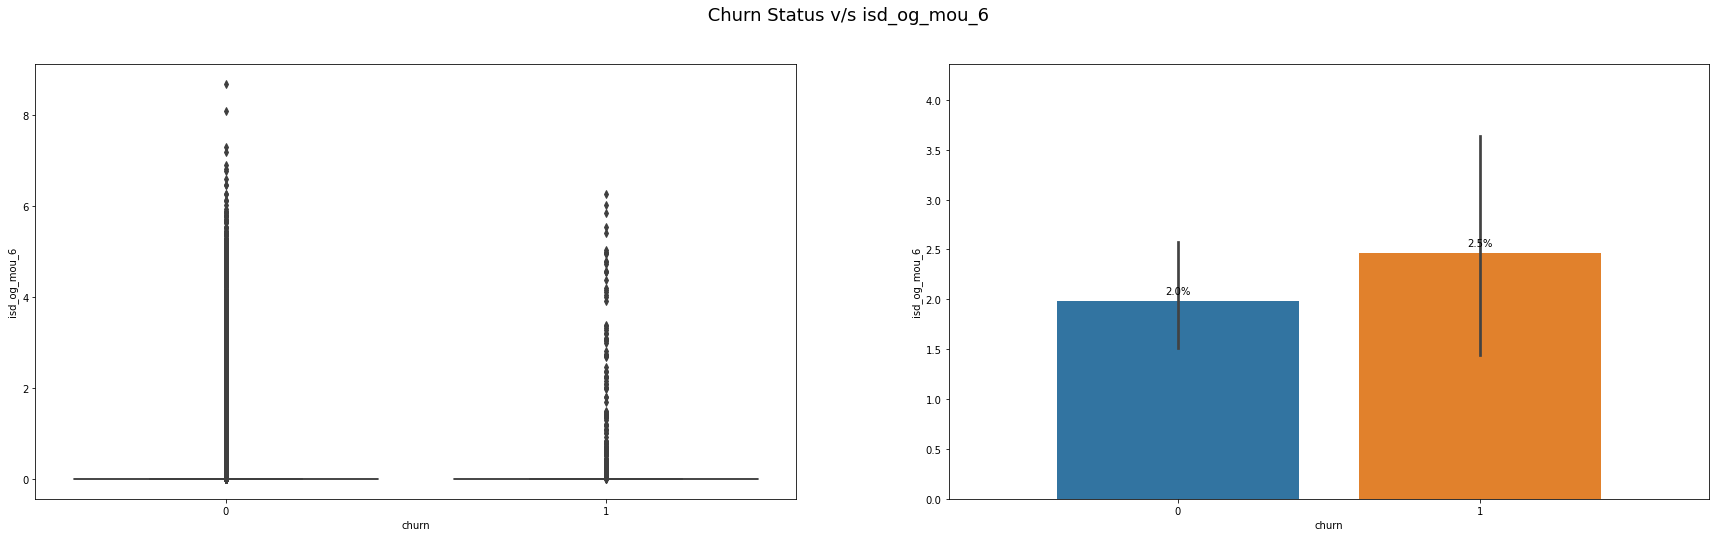

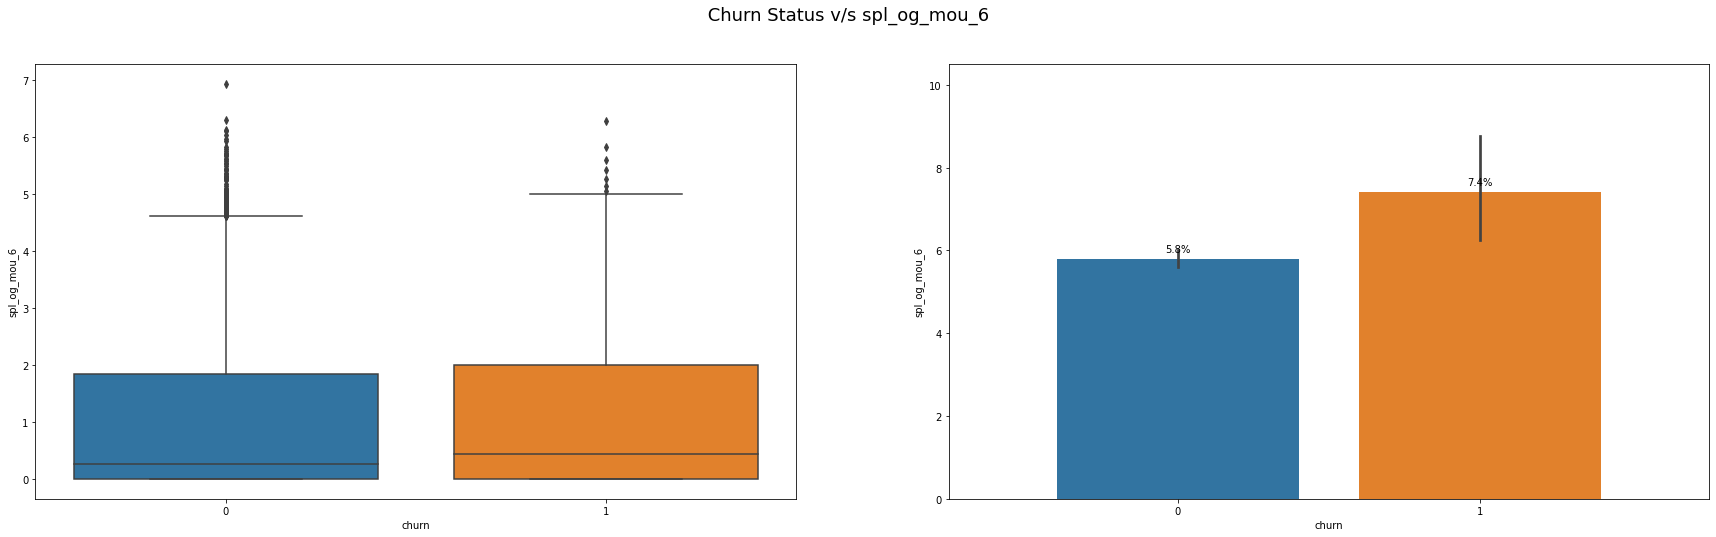

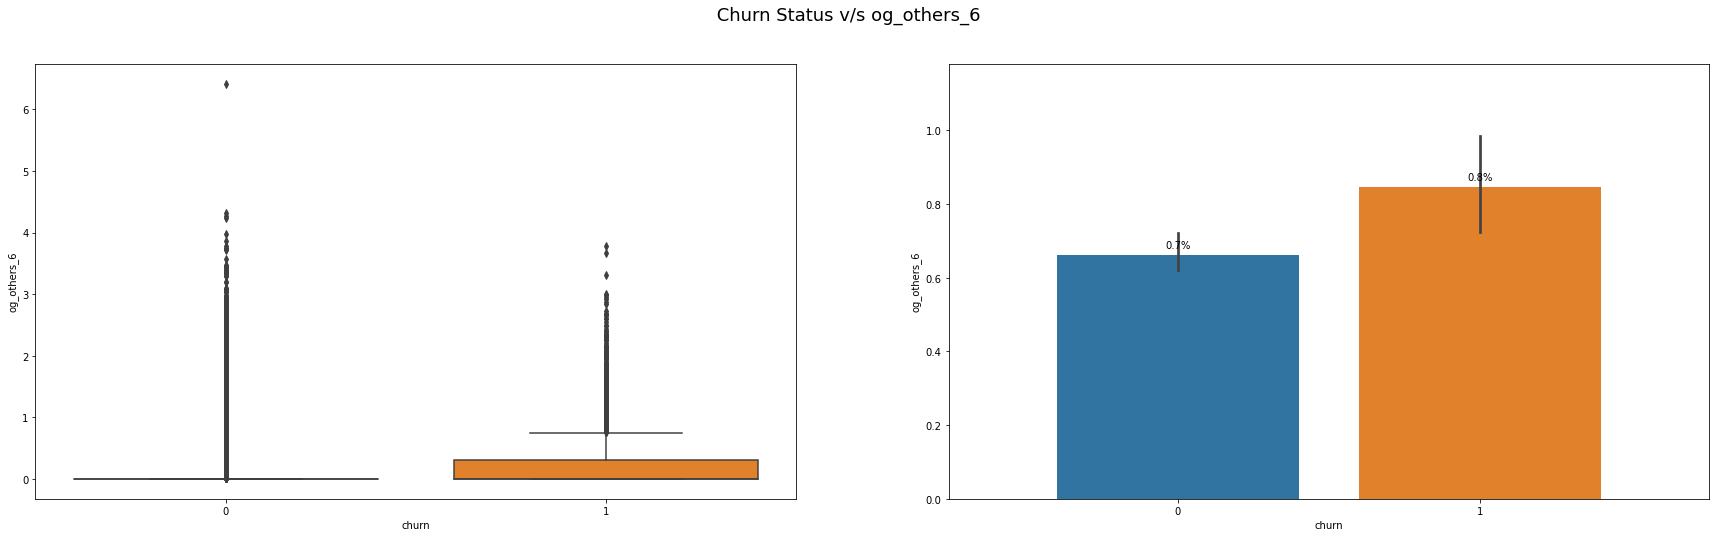

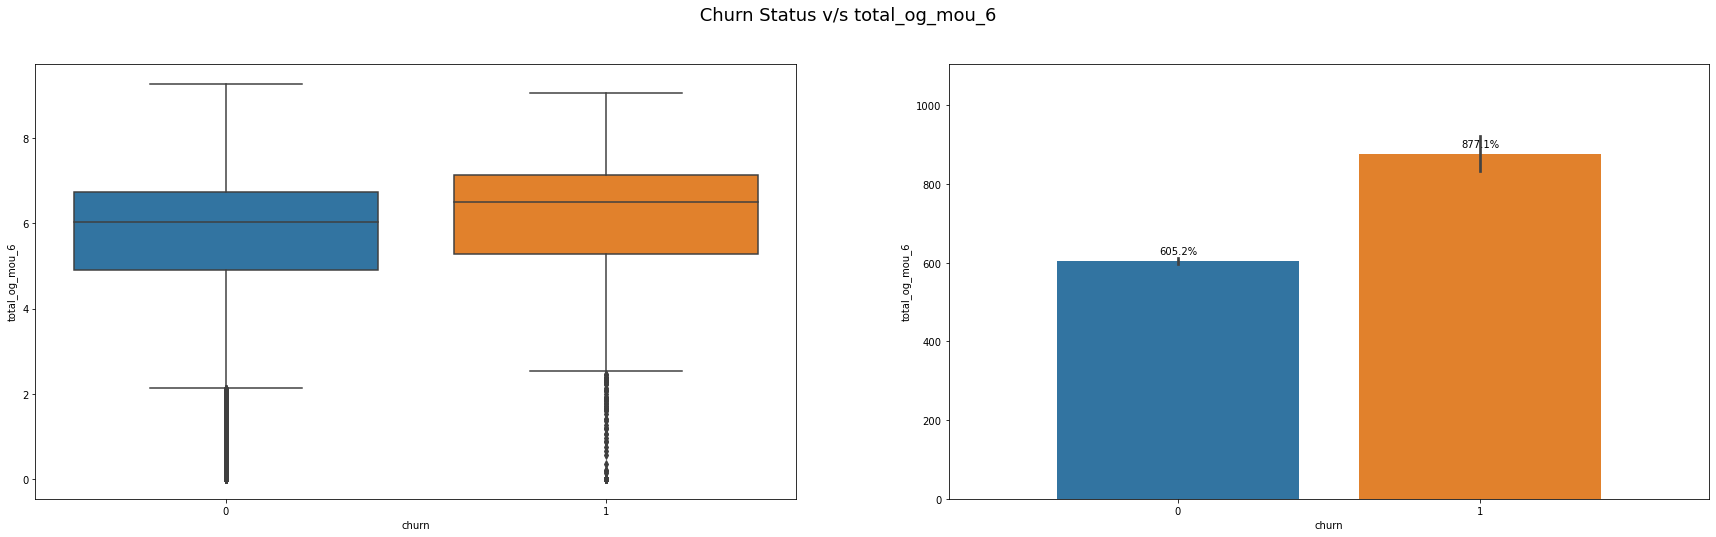

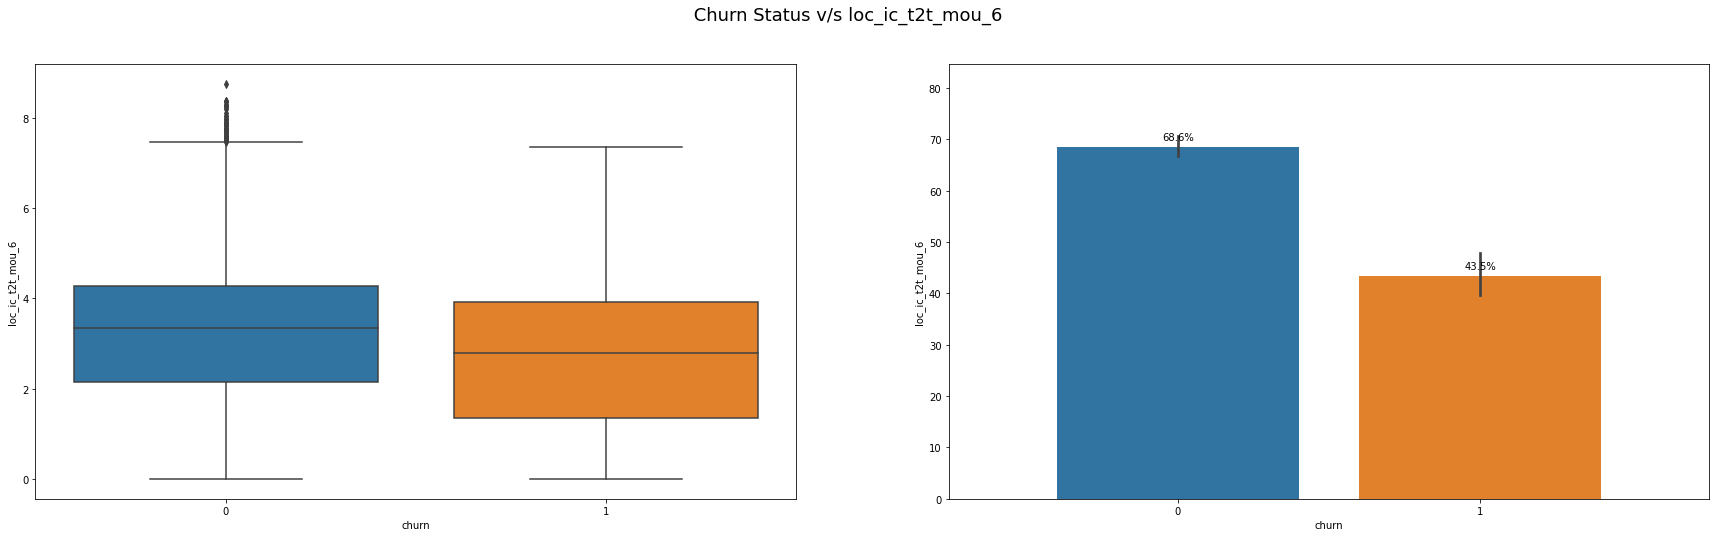

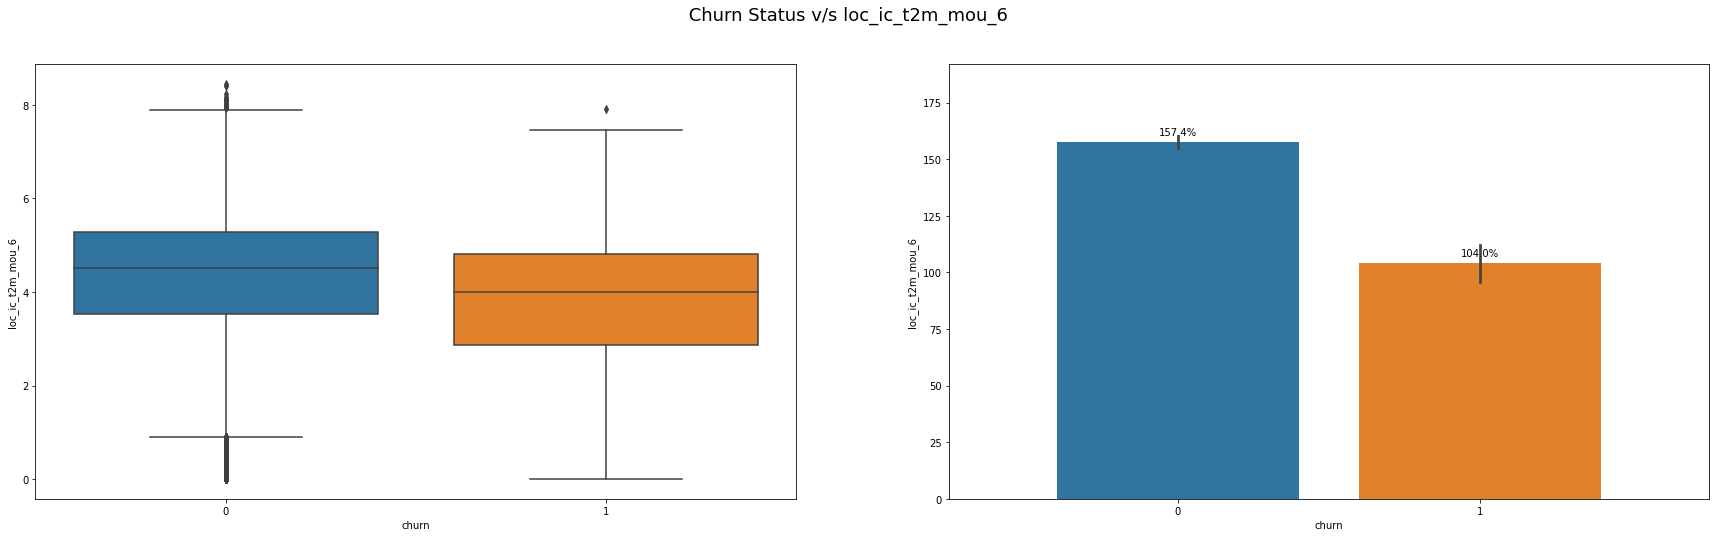

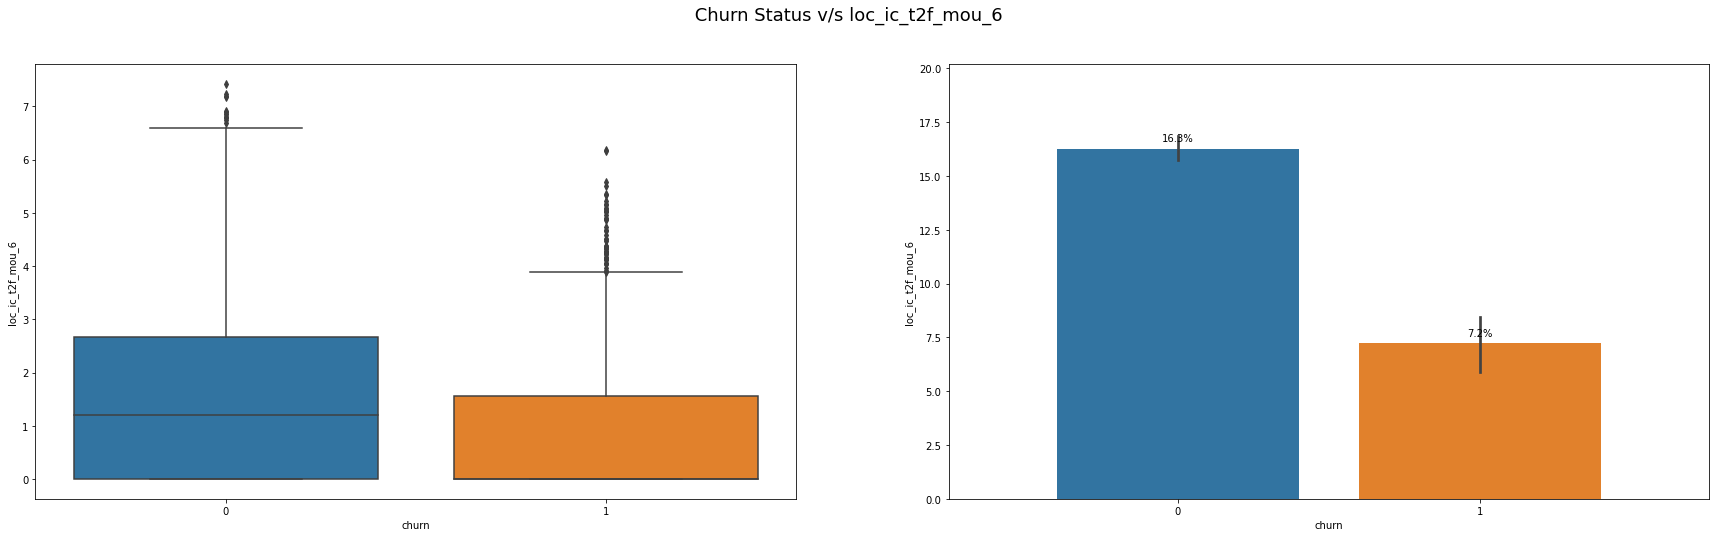

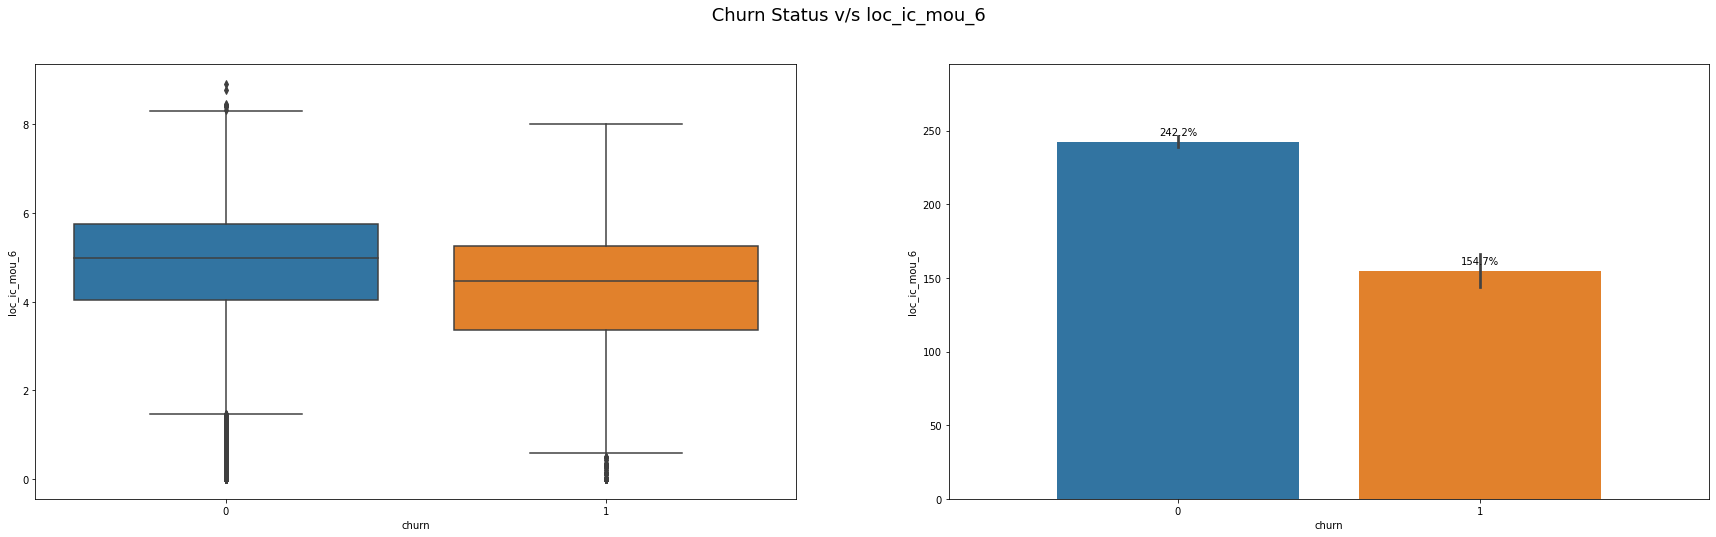

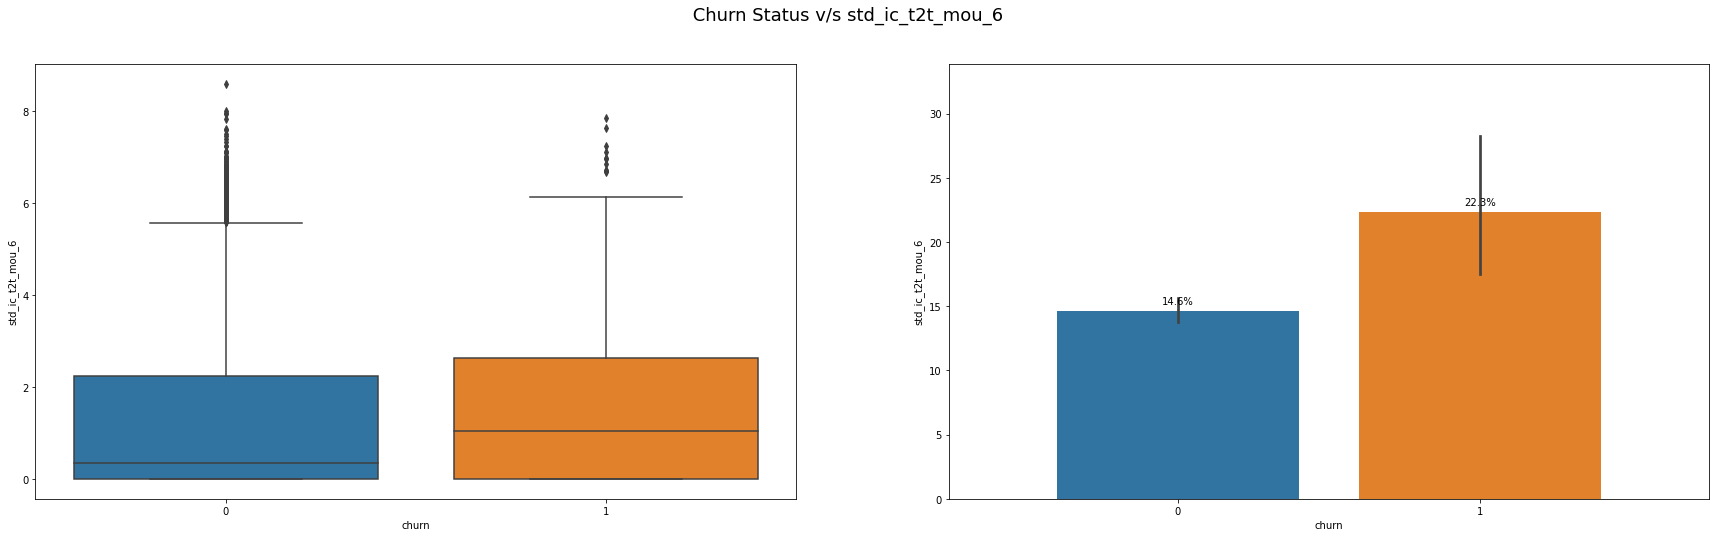

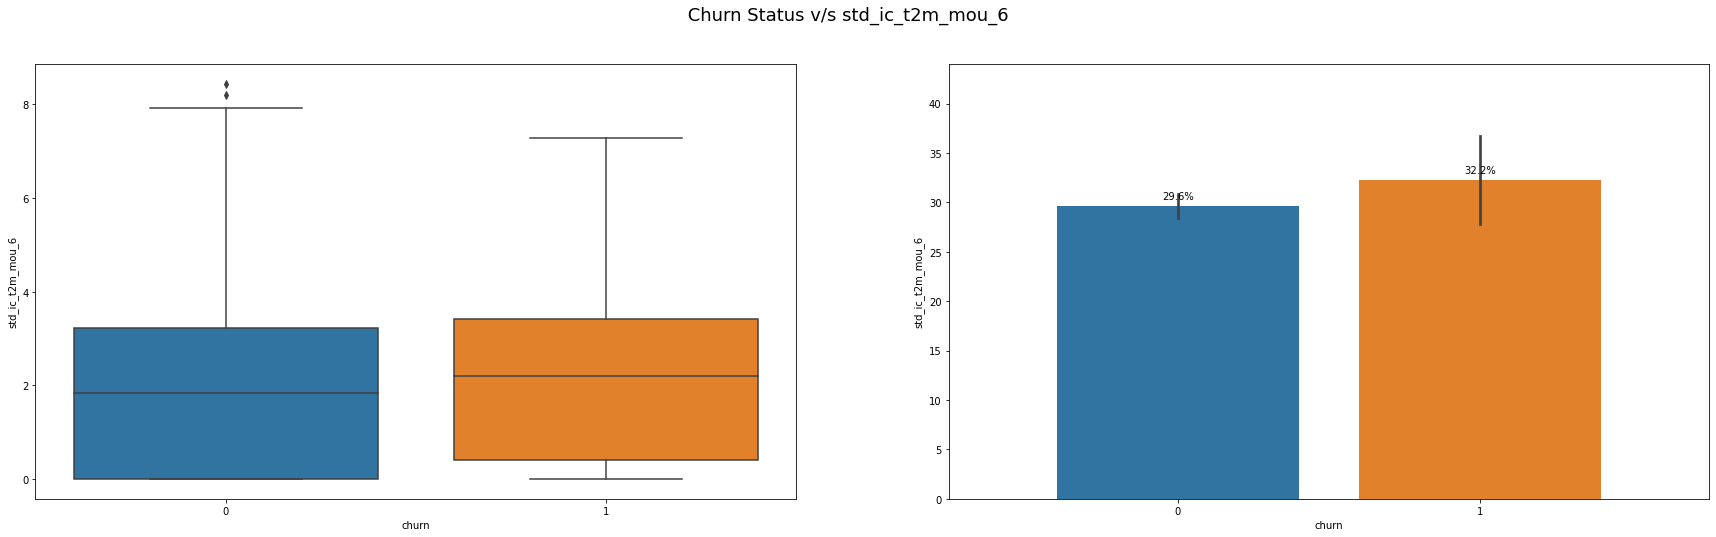

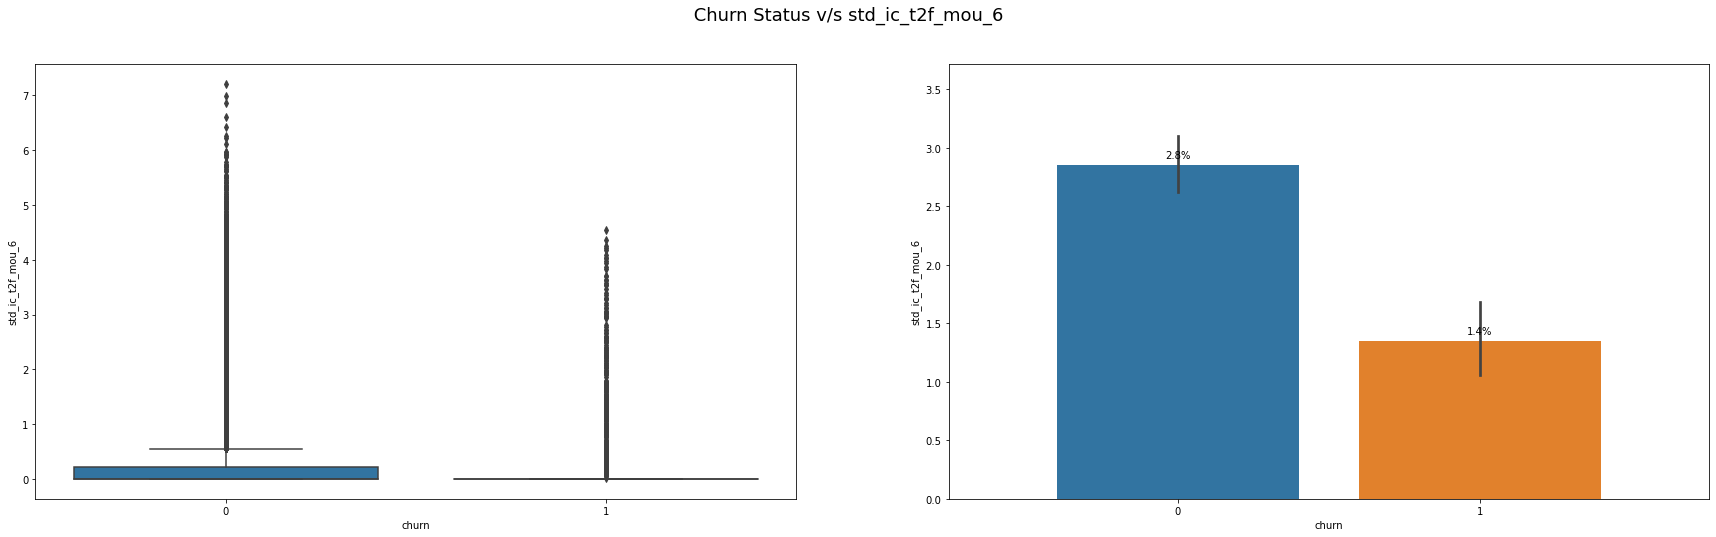

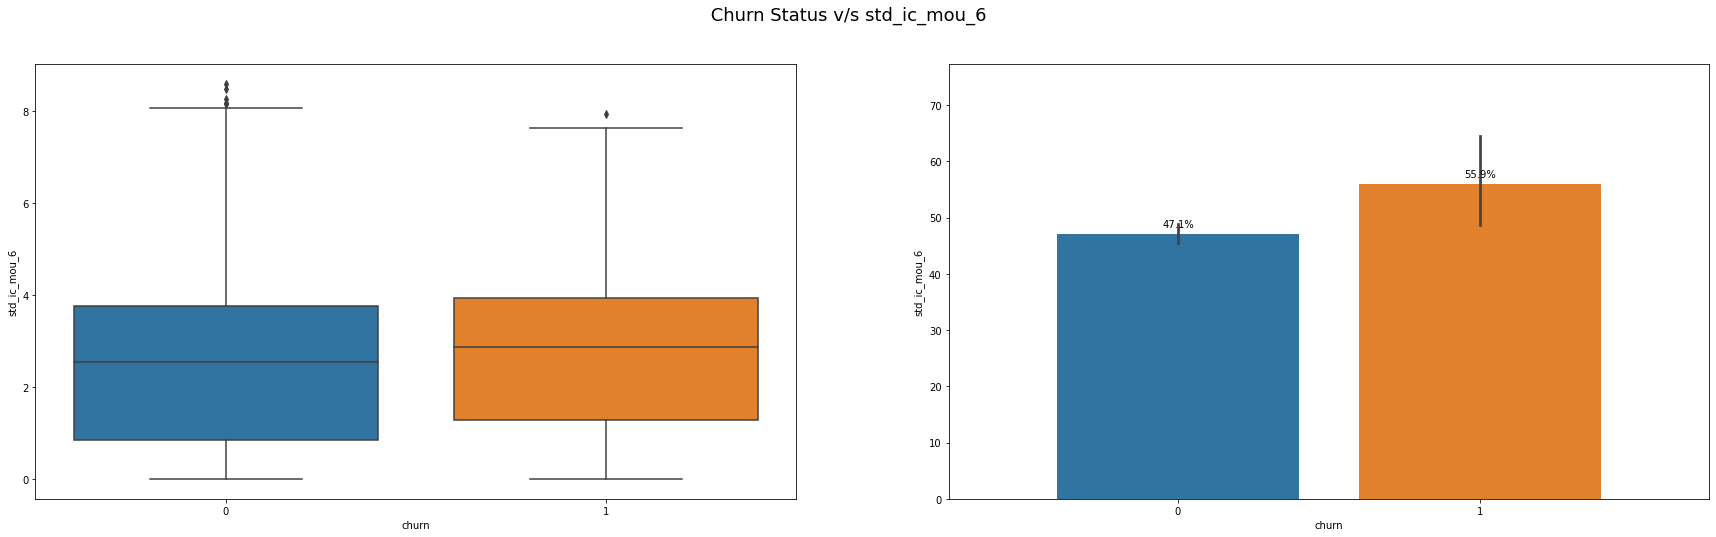

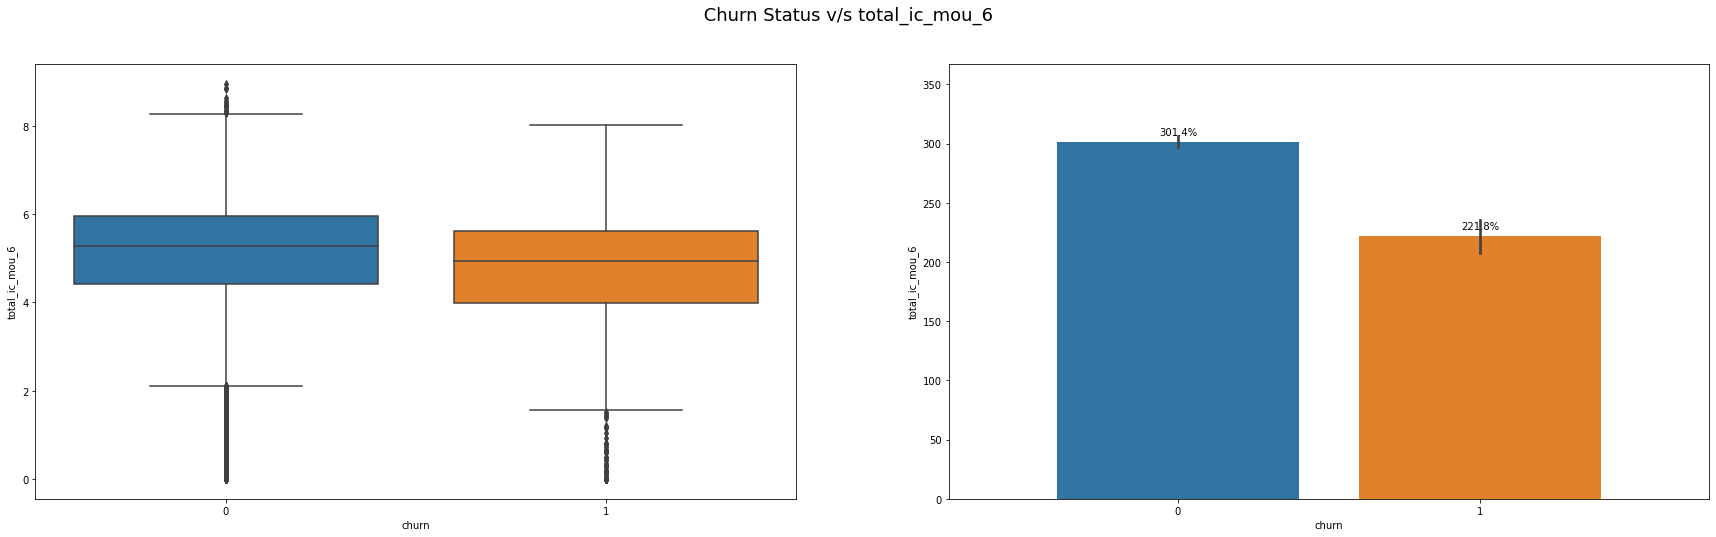

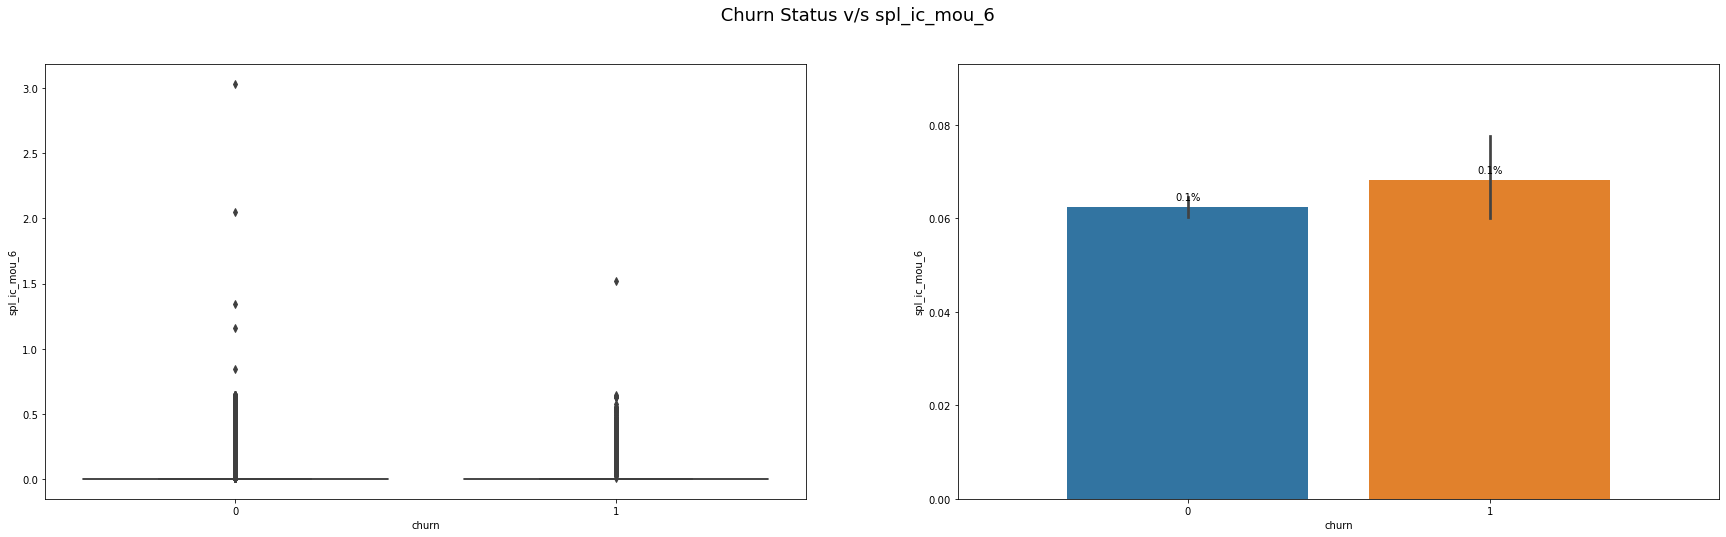

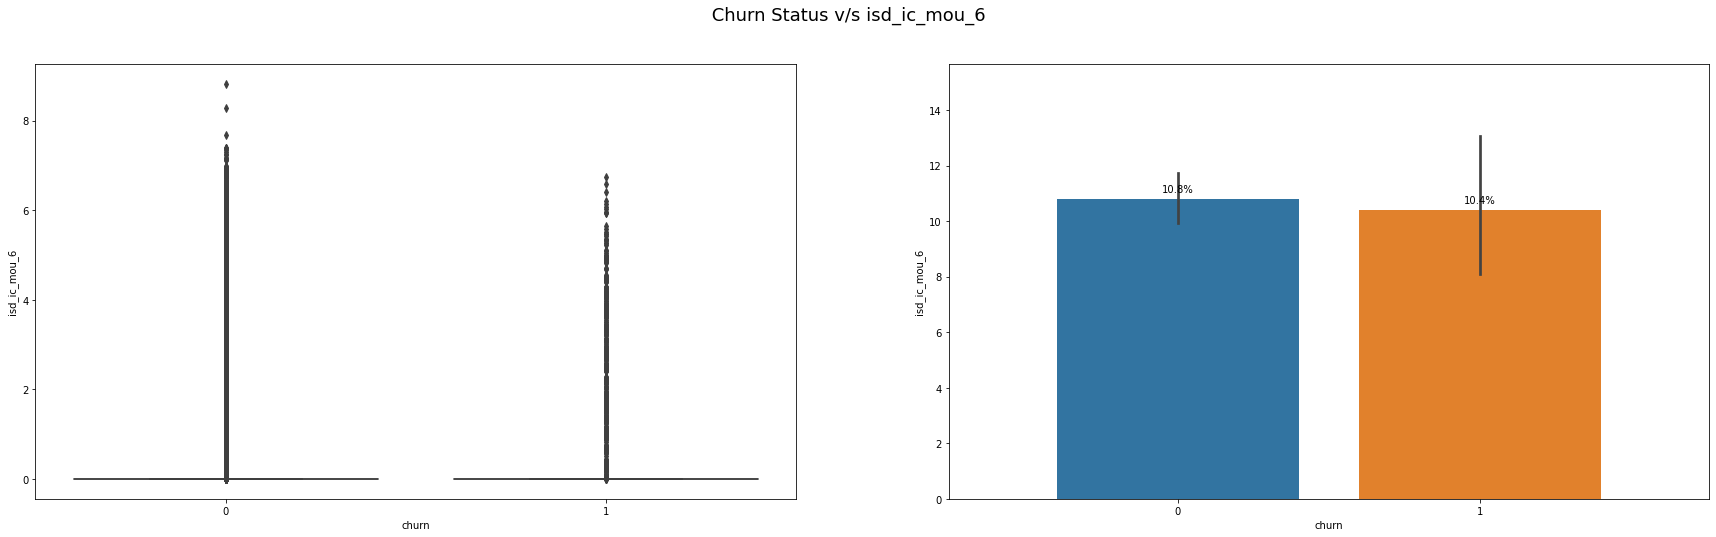

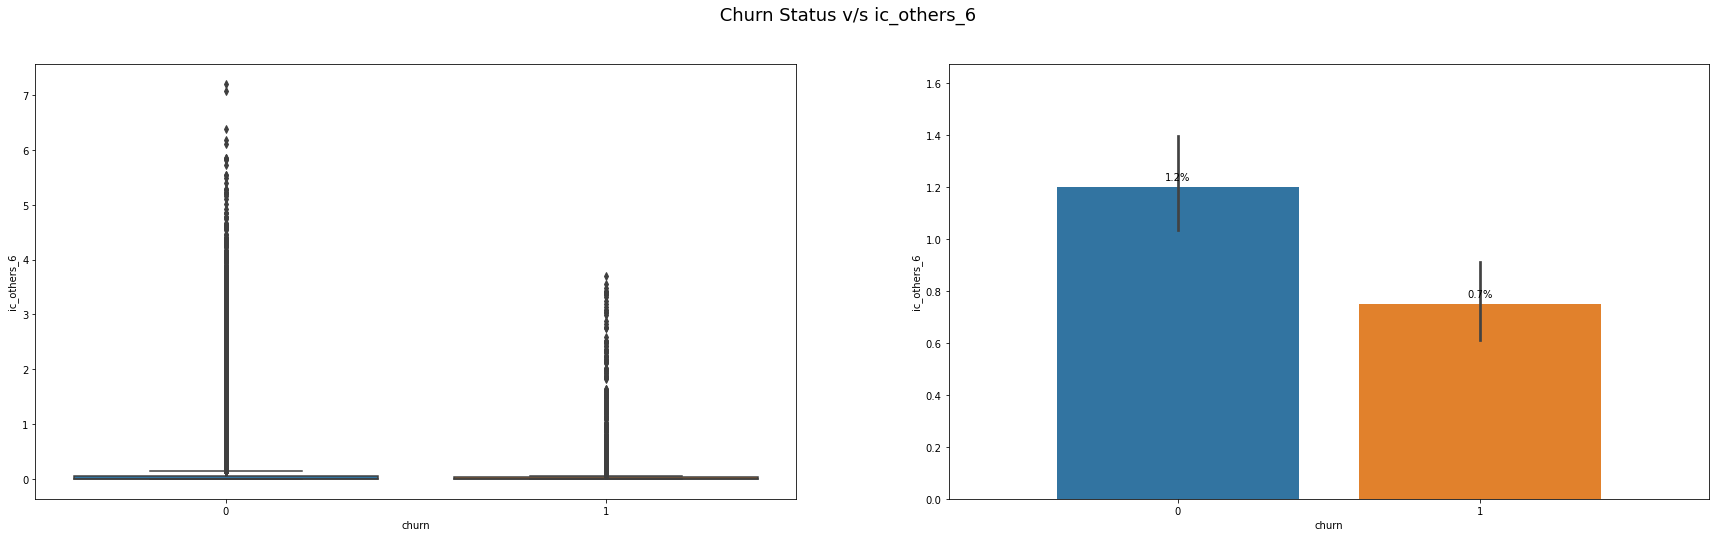

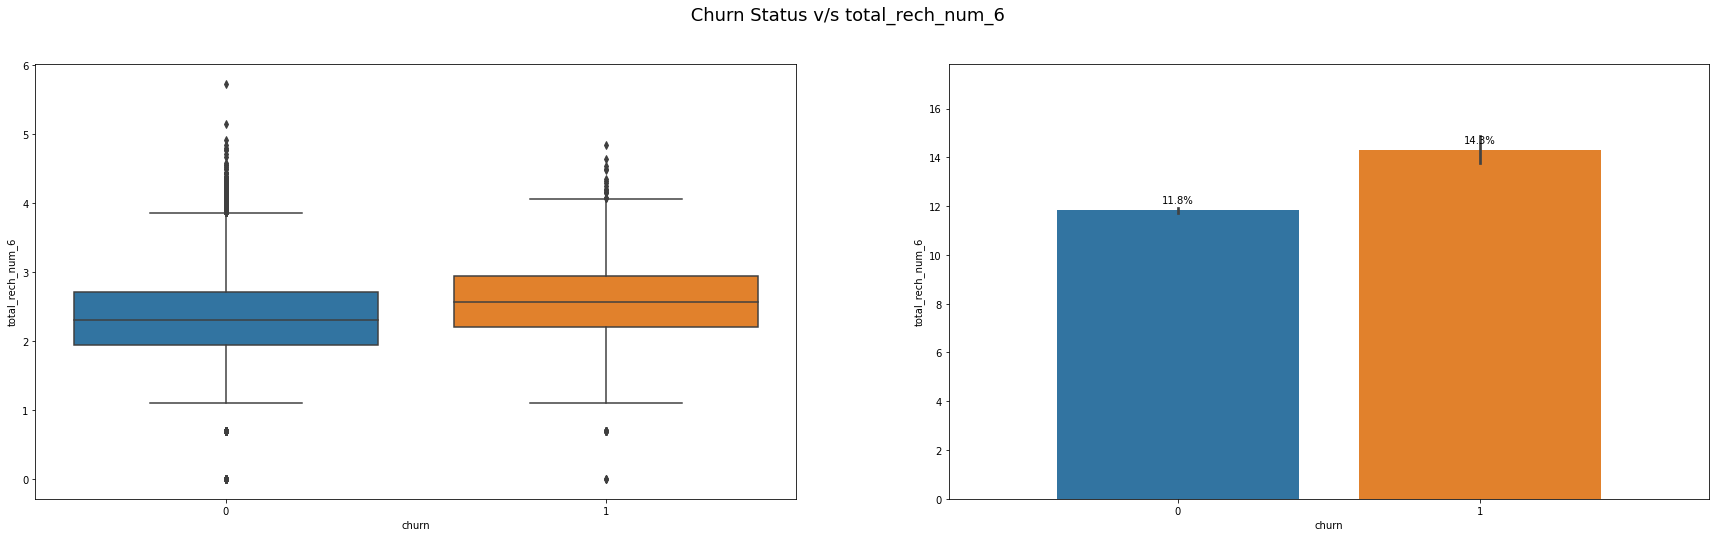

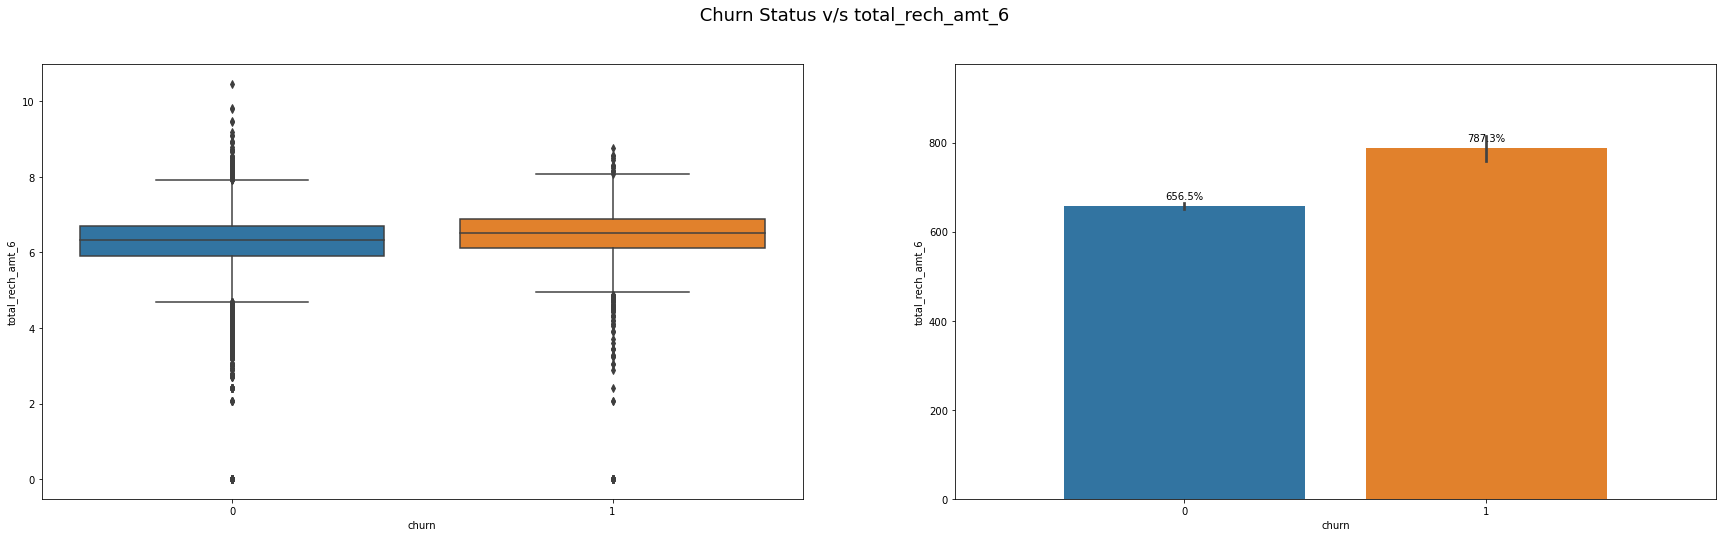

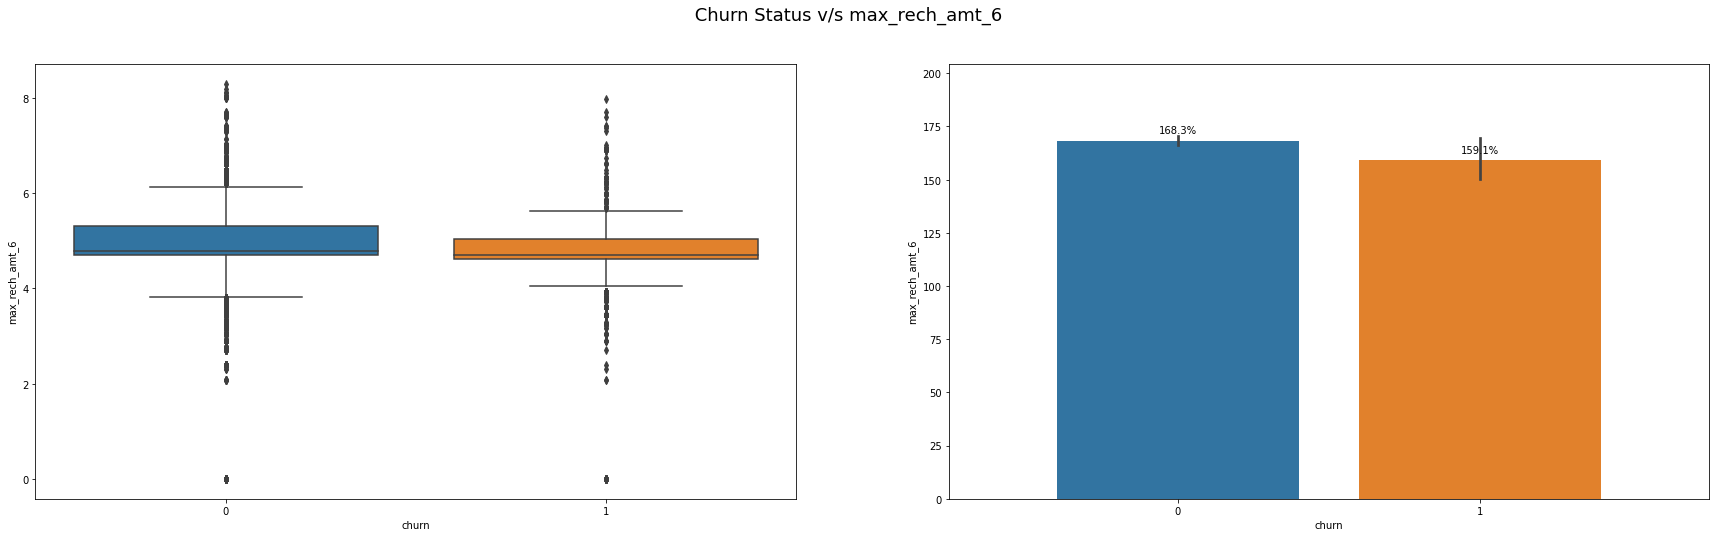

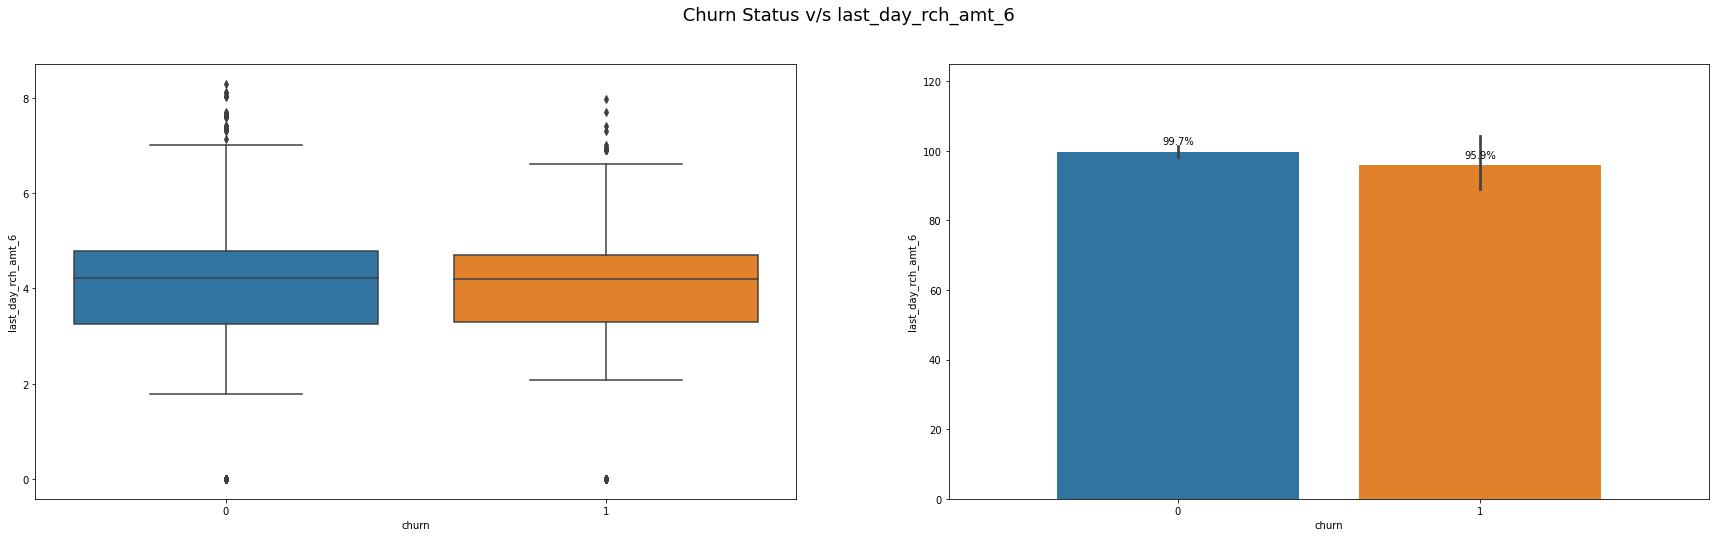

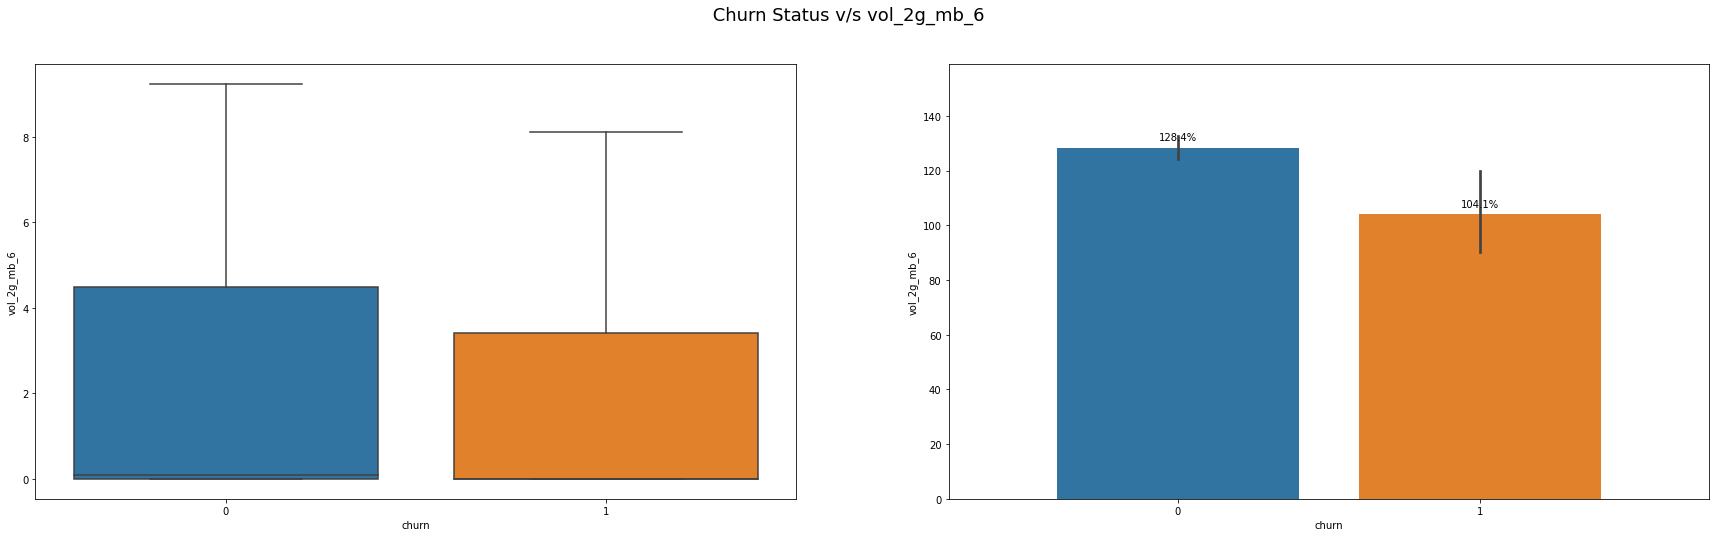

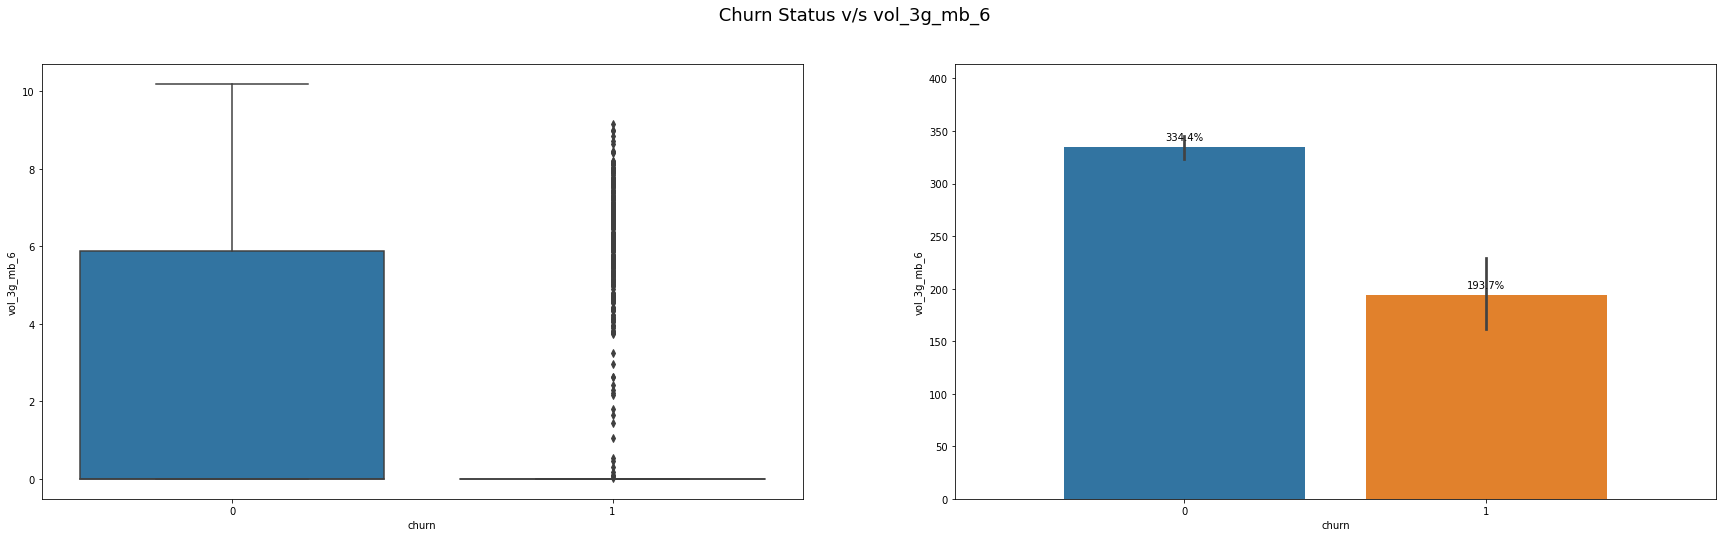

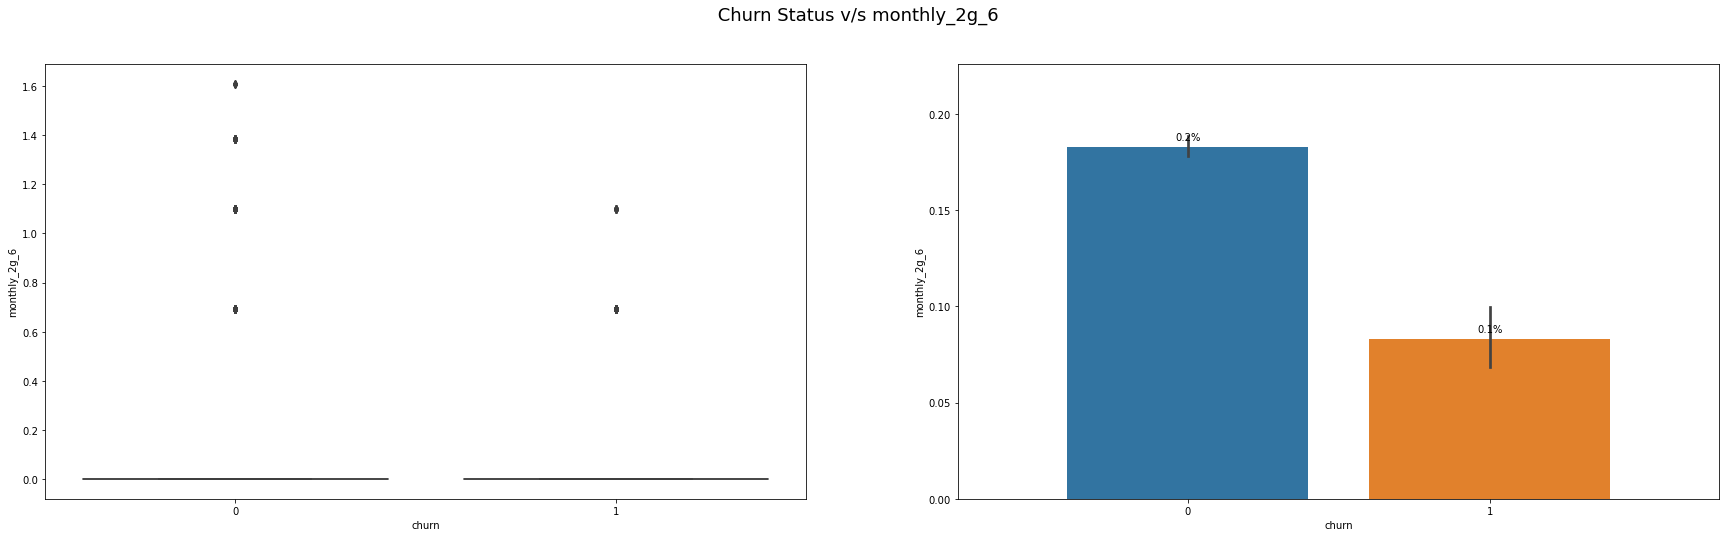

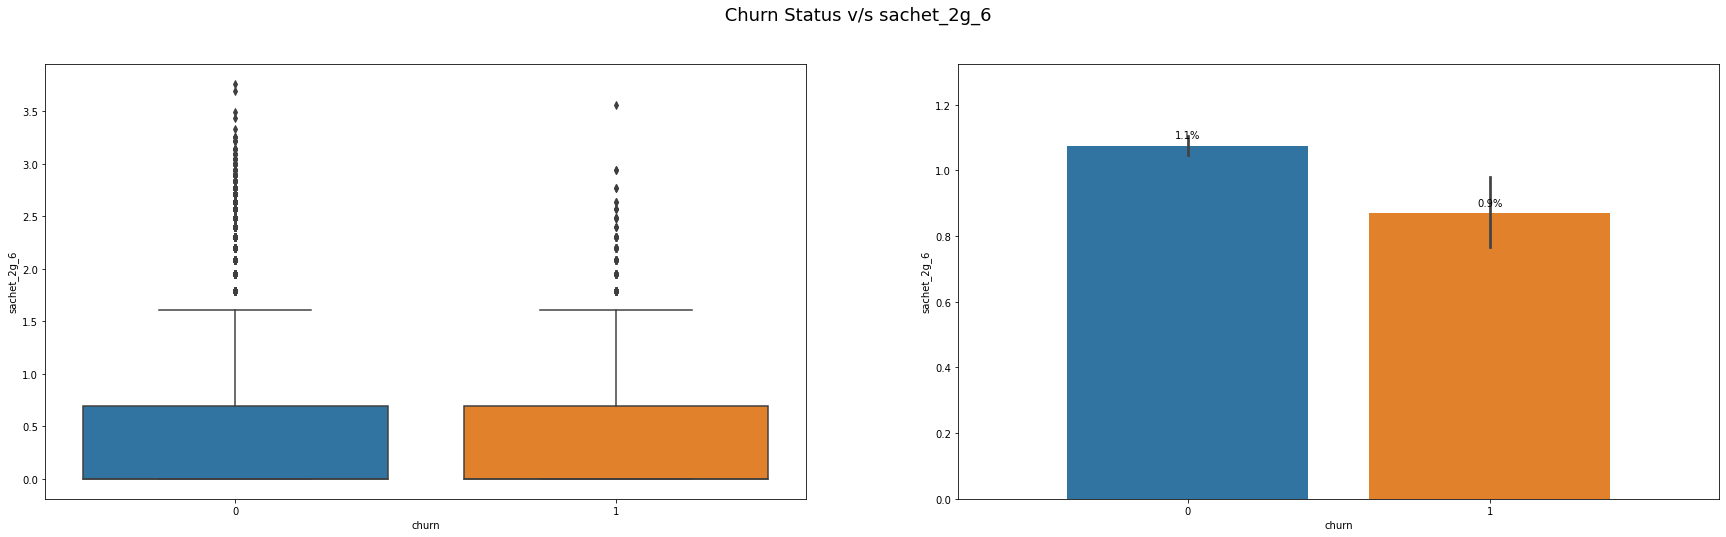

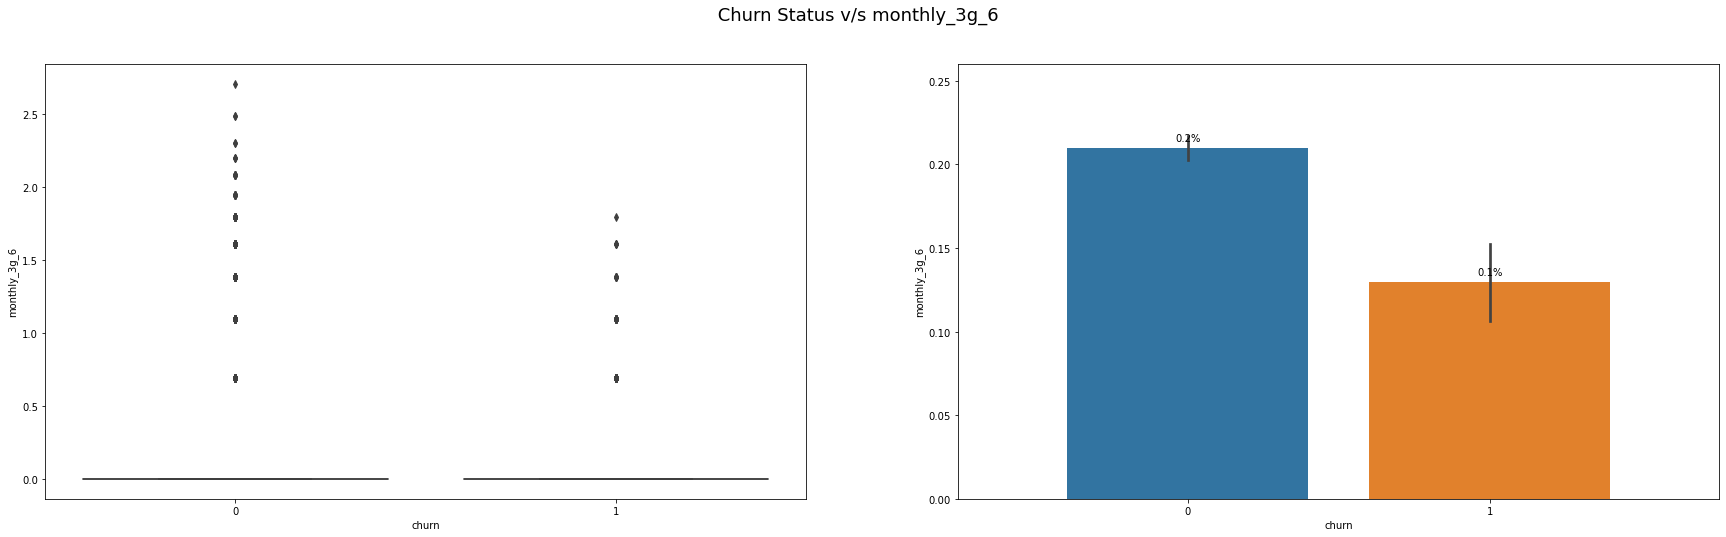

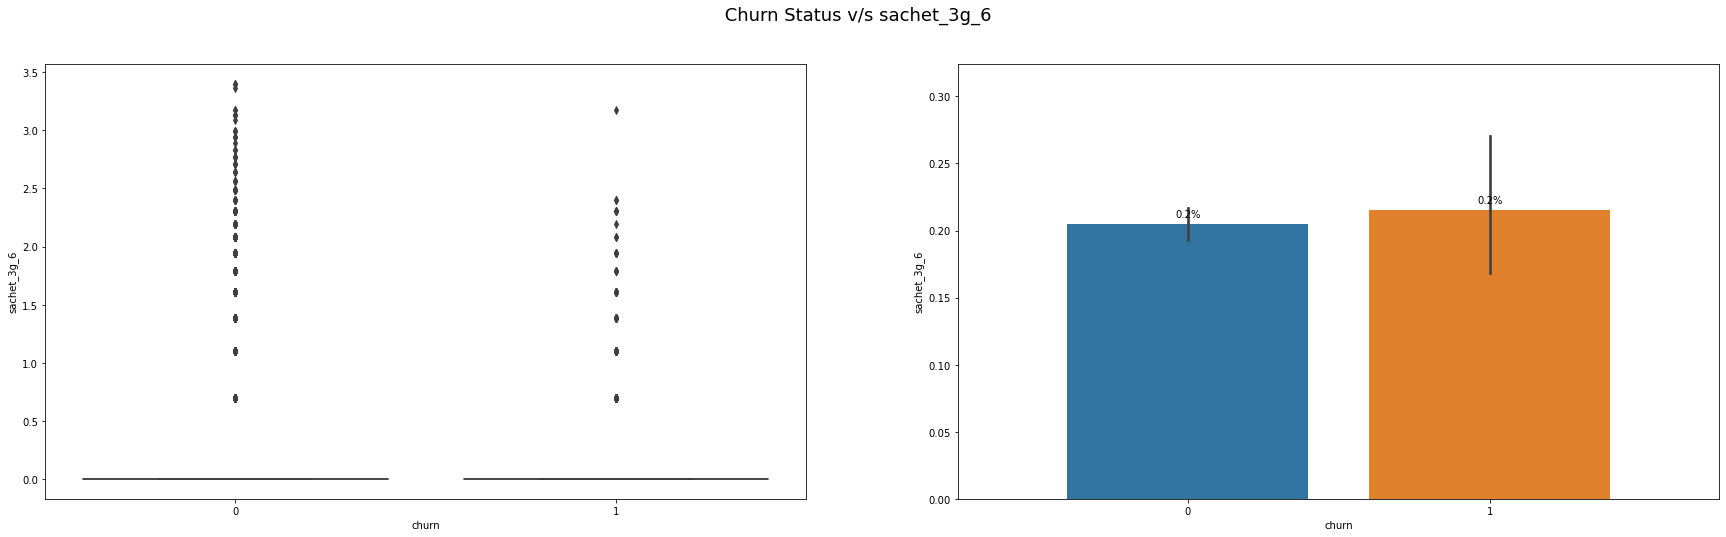

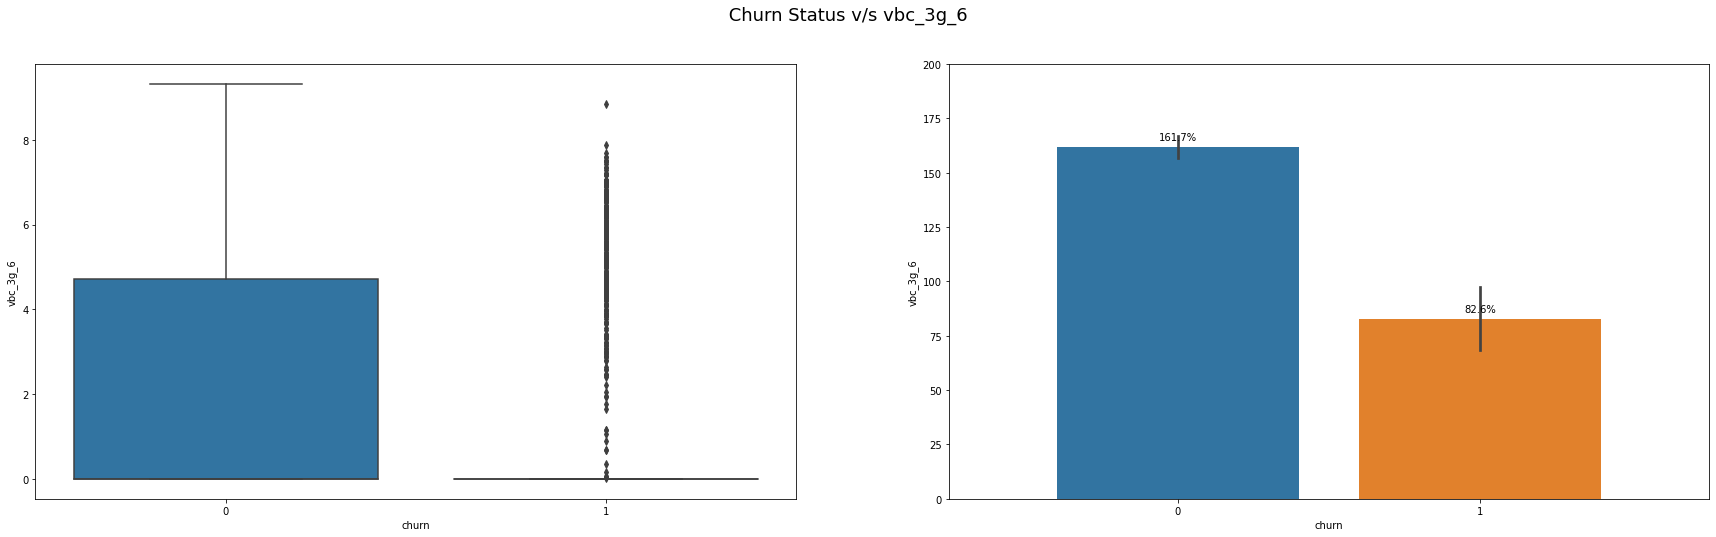

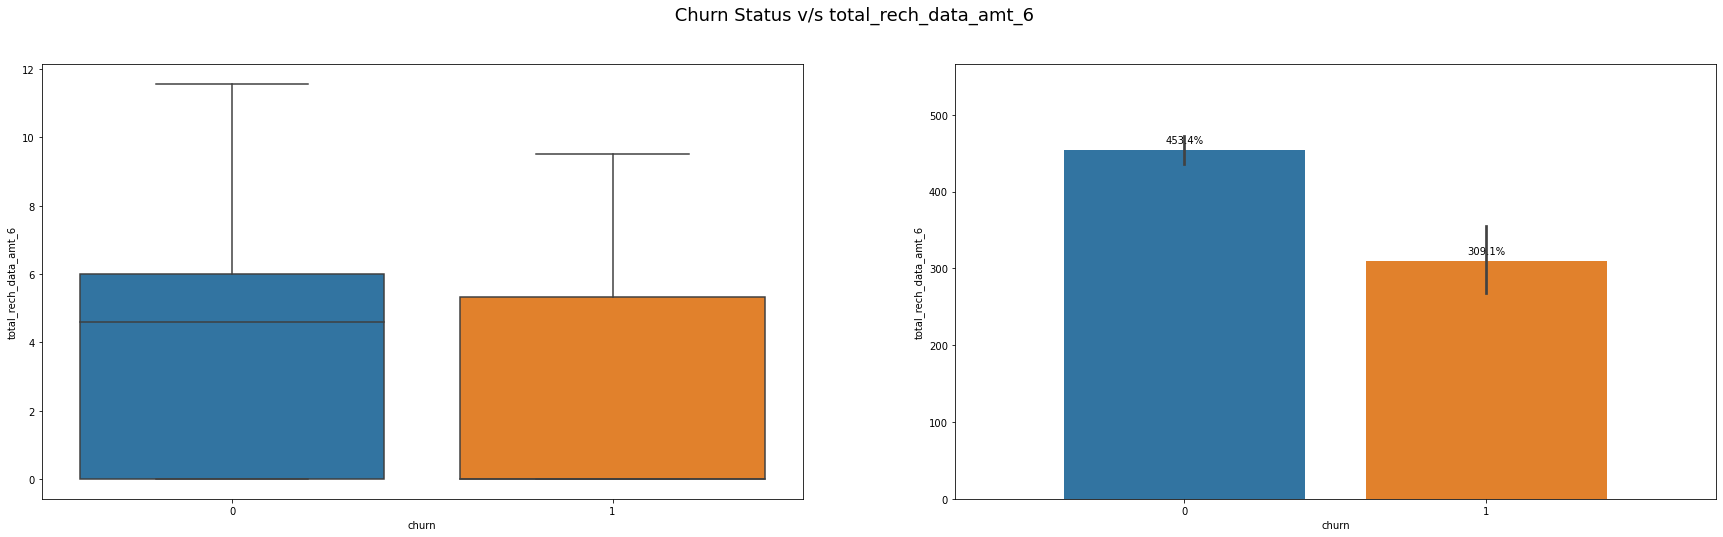

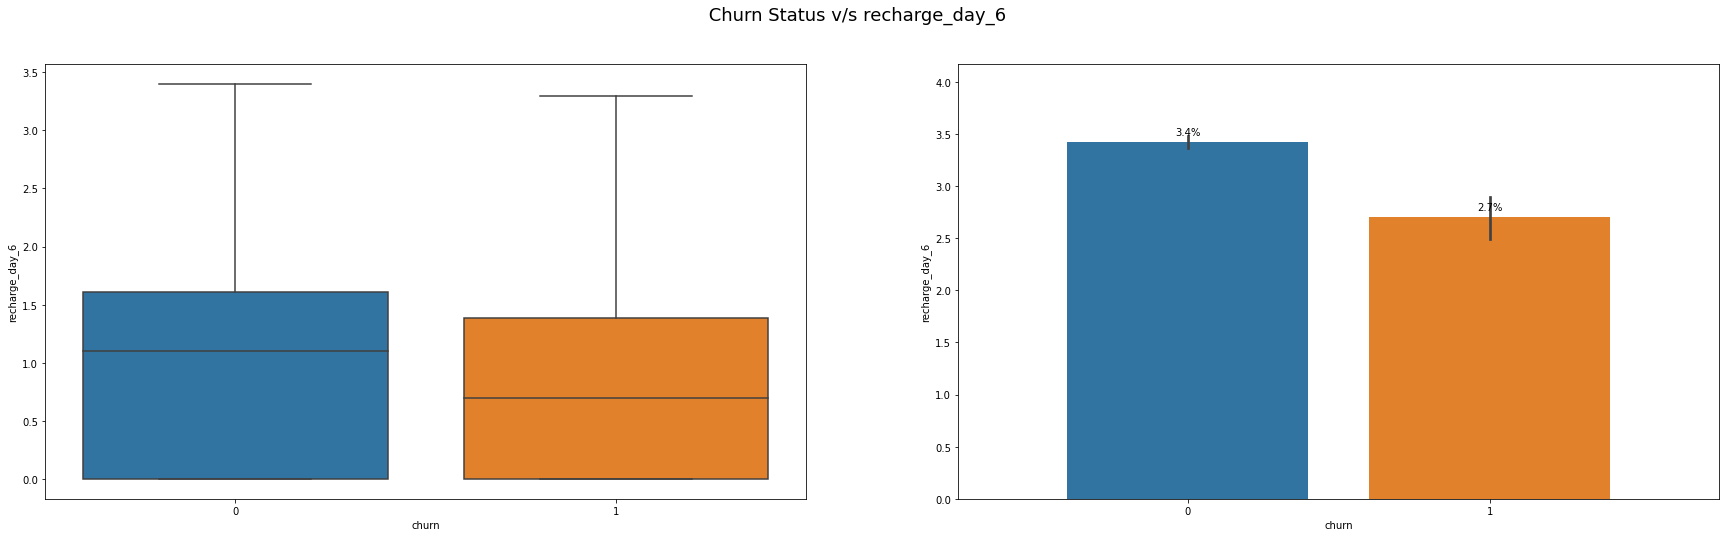

In [38]:
#Check the data in 6th month
for i in telecom_data_master[telecom_data_master.columns[telecom_data_master.columns.to_series().str.contains('_6')]].columns:
    checkChurnStatus(telecom_data_master,i)

## Observations:

As seen from the above plots there is significant dip in the important metrics like revenue and usage over the period of time by the churners. i.e. For good phase there is no significant difference in metrics for churners and non-churners but for action phase there is significant dip in usage metrics for churners then non-churners. And this is observed in almost all the important metrics.

Now lets check the distribution of important variable total_rech_amt_* in comparison to churn status from among different months.

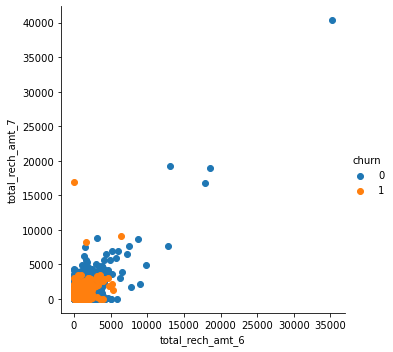

In [39]:
#Check the churn status for 6th and 7th month
sns.FacetGrid(telecom_data_master,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

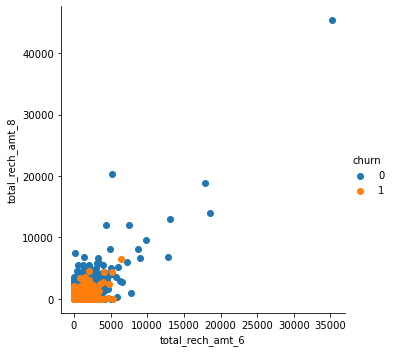

In [40]:
#Check the churn status for 6th and 8th month
sns.FacetGrid(telecom_data_master,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

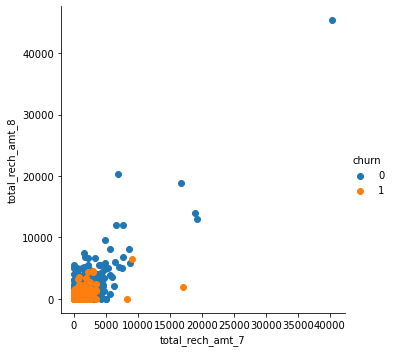

In [41]:
#Check the churn status for 8th and 7th month
sns.FacetGrid(telecom_data_master,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

From above plots its clear that the churners tend to reduce the amount of recharge in the action phase as compared to the good phase.

Lets check whats the effect of age on network on the churn status. 

Text(0.5, 1.0, 'AON v/s Churn Count')

[Text(0, 0.5, 'Churn Count'), Text(0.5, 0, 'Age on Network(in years)')]

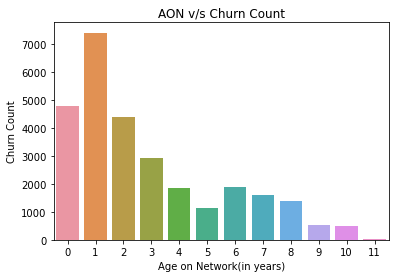

In [42]:
#Check the churn status based on age on network (aon_years)
plt.title('AON v/s Churn Count')
ax = sns.countplot(x='aon_years',data=telecom_data_master)
ax.set(xlabel='Age on Network(in years)', ylabel='Churn Count')

The above re-affirms our earlier assumption that if AON value is high the churn count is low since loyal customers find it hard to leave the network until and unless they have some very solid reason to do so.

## Correlation between Variables

From the above univariate analysis its clear that most of the variables some what follow the same pattern. Is it because of the collinearity between the variables? Lets find that out.

<Figure size 2160x2160 with 0 Axes>

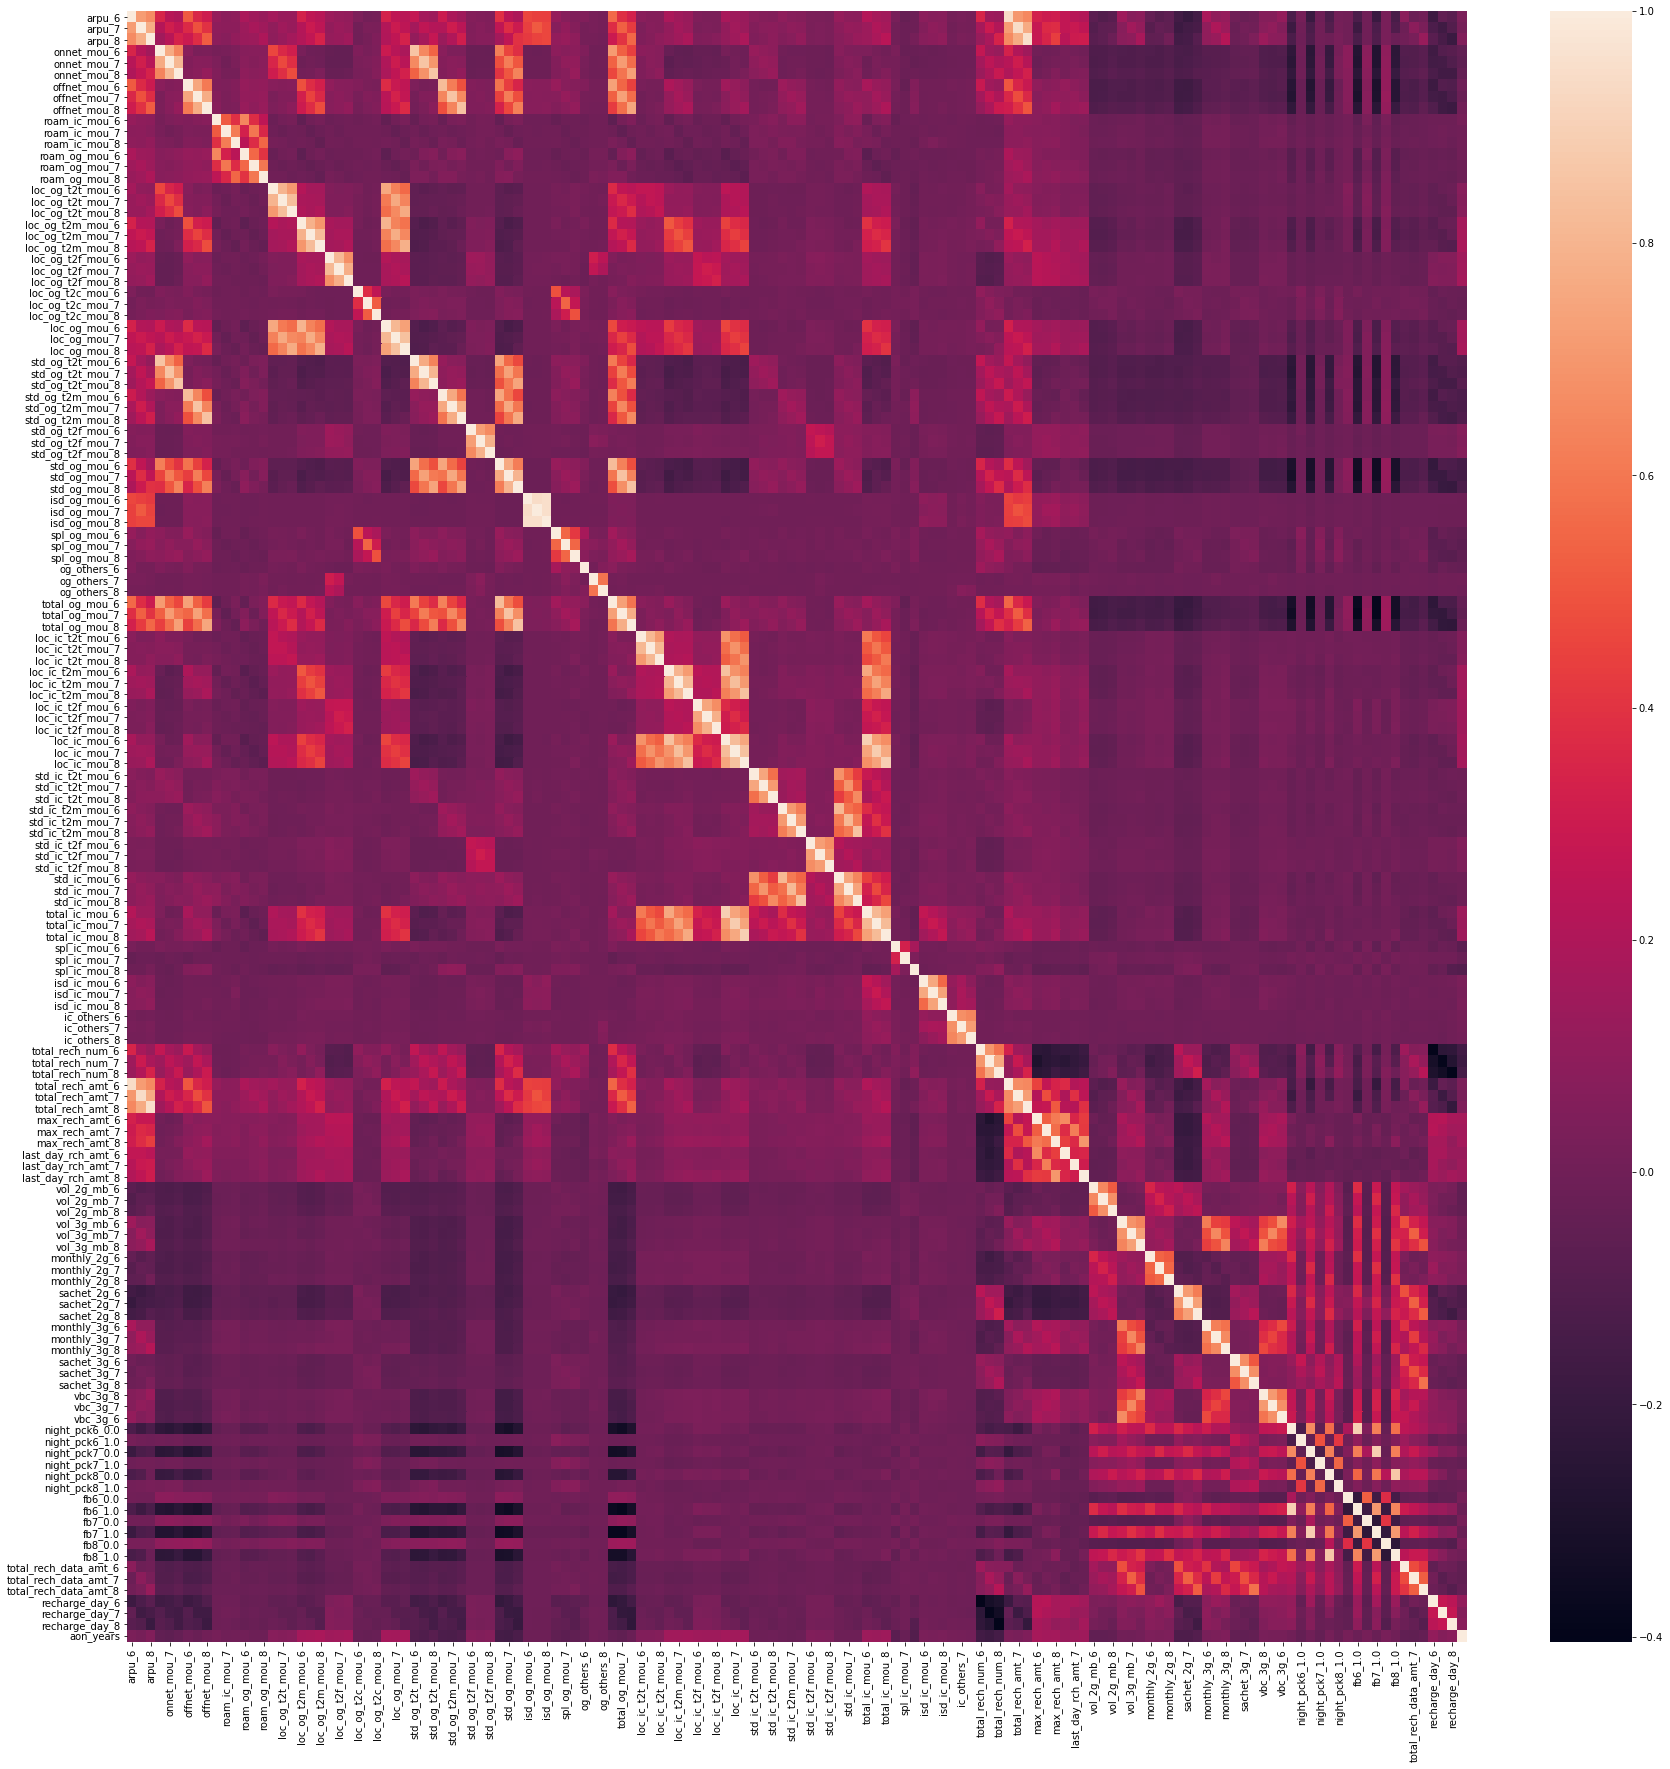

In [43]:
#Drop the variables first which are of no use and then check correlation
telecom_temp = telecom_data_master.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(telecom_temp.corr())

In [44]:
# Create correlation matrix
corr_var = telecom_temp.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_var.where(np.triu(np.ones(corr_var.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
correlated_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Top Correlated features in dataset:{}\n\n{}".format(len(correlated_features), correlated_features))

Top Correlated features in dataset:36

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0']


### Observations:
1. In the action phase, the churners seems to drastically reduce the usage of important metrics as compared to that in good phase.

2. There are about 36 variables in the dataset that are highly correlated (~80% correlated to each other). We can drop them right away but we will use dimensionality reducing technique like PCA later to drop these correlated variables.

3. The dataset is highly imbalance with 94% non-churners and 6% churners.

4. Customers staying with network for longer period of time are less likely to churn so its important to study the behaviour of these customers.

# Data Modelling

Lets pre-process the data before modelling.

Split the dataset into X and y variables and then later split them into train and test dataset.

**Also we will compare the metrics on the test data of the respective models**.

In [45]:
# Drop mobile_number column since its not rquired
telecom_data = telecom_data_master.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom_data = telecom_data.drop(['churn'], axis=1)

#Split the dataset into X and y [y is the churn column]
X = telecom_data.drop(['churn'], axis=1)
y = telecom_data['churn']

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [47]:
# Split in train & Test dataset into 70-30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

In [48]:
#Check the dataset information
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

X_train Dataframe Shape (19922, 142)
X_test Dataframe Shape (8538, 142)


Check the class imbalance if any

In [49]:
#Check the class imbalance
#Percentage of non-churners (0) v/s churners (!=0/1)
y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(round(y_train_imbalance,2)))
print("Imbalance in Test Data: {}".format(round(y_test_imbalance,2)))

Imbalance in Train Data: 0.06
Imbalance in Test Data: 0.06


There is highly class imbalance in test and train dataset as seen above. 

Lets take of this class imbalance using over sampling method of SMOTE.

In [50]:
# Use oversampling to do class balancing
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_bal,y_bal = sm.fit_sample(X_train,y_train)

In [51]:
#Check the data shape after balancing
print("X_tr Dataframe Shape {}".format(X_bal.shape))
print("y_tr Dataframe Shape {}".format(y_bal.shape))

data_imbalance = (y_bal != 0).sum()/(y_bal == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37606, 142)
y_tr Dataframe Shape (37606,)
Imbalance in Train Data: 1.0


Now it seems there is no class imbalance as the ratio of churners to non-churners is 1.

## Model 1: Logistic Regression using RFE

We will start the data modelling by using the basic classification model - logistic regression and we will use basic RFE technique for shortlisting the top 20 features.

In [52]:
#Modelling Logistic regression using RFE
#This steo takes around 10-15 mins for execution so please be patient!!!
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_bal, y_bal)

In [53]:
X_rfe = pd.DataFrame(data=X_bal).iloc[:, rfe.support_]
y_rfe = y_bal

In [54]:
#Check the RFE shortlisted features
rfe_features = list(df_telecom_data.columns[rfe.support_])
rfe_features

['roam_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_amt_6',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'vbc_3g_8',
 'fb8_1.0',
 'recharge_day_8',
 'aon_years']

In [55]:
#Use these shortlisted RFE features to create the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [56]:
#Predict the test data
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = classifier.predict(X_test_rfe)

In [57]:
#Check the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6636 1433]
 [  92  377]]


In [58]:
#Check the classification score on this logistic regression model
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(round(classifier.score(X_test_rfe, y_test),2)*100))

Accuracy of logistic regression classifier on test set: 82.00%


In [59]:
#Check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8069
           1       0.21      0.80      0.33       469

    accuracy                           0.82      8538
   macro avg       0.60      0.81      0.61      8538
weighted avg       0.94      0.82      0.87      8538



In [60]:
total = sum(sum(confusion_matrix))
accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/total

print("-------------Metrics of Logistic Regression with RFE-----------")
print('Accuracy {0}%: '.format(round(accuracy,2)*100))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : {0}%'.format(round(sensitivity,2)*100))

specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : {0}%'.format(round(specificity,2)*100))

#Check Positives and Negatives
print('True positive = ', confusion_matrix[0][0])
print('False positive = ', confusion_matrix[0][1])
print('False negative = ', confusion_matrix[1][0])
print('True negative = ', confusion_matrix[1][1])

-------------Metrics of Logistic Regression with RFE-----------
Accuracy 82.0%: 
Sensitivity : 82.0%
Specificity : 80.0%
True positive =  6636
False positive =  1433
False negative =  92
True negative =  377


### Observations

1. Based on the initial analysis using the logistic regression and RFE we get 81% accuracy.
2. Confusion matix clearly shows that the model has drawback in predicting churn with high false positives.
3. Top 20 important features as identified by Logistic Regression using RFE are:

'arpu_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_amt_6',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'fb8_1.0',
 'recharge_day_8'

## Model 2: Logistic Regression using PCA

Now lets use PCA to find the important features and then use logistic regression for modelling.

In [61]:
#Use PCA to shortlist the features
from sklearn.decomposition import PCA

pca = PCA(random_state=1)

#Use PCA on the X_train balanced using SMOTE earlier
pca.fit(X_bal)

PCA(random_state=1)

In [62]:
#Use PCA to model and fit on train and test dataset

#Fit on train dataset
df_train_pca = pca.fit_transform(X_bal)
df_train_pca.shape

#Fit on test dataset
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(37606, 142)

(8538, 142)

In [63]:
# Now run the model using the selected PCA variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression()
lr_pca.fit(df_train_pca, y_bal)

# Predicted probabilities
y_pred = lr_pca.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

LogisticRegression()

In [64]:
# Check the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6676 1393]
 [ 101  368]]


In [65]:
print("Accuracy of Logistic Regression using PCA (defualt): {0}%".format(round(accuracy_score(y_test,y_pred),2)*100))

Accuracy of Logistic Regression using PCA (defualt): 83.0%


In [66]:
#Check the PCA component values
pca.components_

array([[ 1.55753247e-01,  1.52212525e-01,  9.43081165e-02, ...,
        -5.05250585e-02, -3.45679373e-02, -1.84567076e-02],
       [ 9.61433616e-02,  1.32621434e-01,  1.60043328e-01, ...,
        -1.35269086e-02, -1.71219790e-02,  8.50934210e-02],
       [ 7.84046652e-02,  6.49138106e-02,  5.89192469e-02, ...,
         3.97356281e-02,  1.99860895e-02,  1.04194378e-02],
       ...,
       [ 0.00000000e+00, -1.64886508e-16,  9.65772220e-19, ...,
         6.13385414e-18,  2.55087946e-17,  7.88227405e-18],
       [-1.75750709e-16,  4.46844483e-17, -2.48247017e-16, ...,
        -5.91718205e-17,  2.27602583e-17, -1.28313268e-17],
       [-0.00000000e+00, -8.56273096e-17, -2.14418305e-16, ...,
        -9.14748328e-18, -1.51307053e-17,  1.66977521e-17]])

In [67]:
#Column names shortlisted by PCA
colnames = list(df_telecom_data.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pca_df.head(20)

PC1       PC2       PC3           Feature
0   0.155753  0.096143  0.078405            arpu_6
1   0.152213  0.132621  0.064914            arpu_7
2   0.094308  0.160043  0.058919            arpu_8
3   0.173168 -0.052365 -0.055964       onnet_mou_6
4   0.172889 -0.029018 -0.063391       onnet_mou_7
5   0.118926  0.024860 -0.041872       onnet_mou_8
6   0.200585  0.035334  0.004849      offnet_mou_6
7   0.193814  0.057144 -0.002909      offnet_mou_7
8   0.110374  0.096198  0.001718      offnet_mou_8
9   0.025160  0.012839  0.351751     roam_ic_mou_6
10  0.025965 -0.001351  0.417083     roam_ic_mou_7
11  0.042508  0.002355  0.325036     roam_ic_mou_8
12  0.037543 -0.005141  0.322081     roam_og_mou_6
13  0.048552 -0.019328  0.373845     roam_og_mou_7
14  0.059478 -0.003980  0.264111     roam_og_mou_8
15  0.028133  0.088746 -0.038386  loc_og_t2t_mou_6
16  0.032546  0.093445 -0.041934  loc_og_t2t_mou_7
17  0.027423  0.095330 -0.037791  loc_og_t2t_mou_8
18  0.033027  0.151136 -0.042227  loc_og_t2m_mou_6
19  0.038285  0.165971 -0.047602  loc_og_t2m_mou_7

In [68]:
pca_df.Feature.head(20)

0               arpu_6
1               arpu_7
2               arpu_8
3          onnet_mou_6
4          onnet_mou_7
5          onnet_mou_8
6         offnet_mou_6
7         offnet_mou_7
8         offnet_mou_8
9        roam_ic_mou_6
10       roam_ic_mou_7
11       roam_ic_mou_8
12       roam_og_mou_6
13       roam_og_mou_7
14       roam_og_mou_8
15    loc_og_t2t_mou_6
16    loc_og_t2t_mou_7
17    loc_og_t2t_mou_8
18    loc_og_t2m_mou_6
19    loc_og_t2m_mou_7
Name: Feature, dtype: object

([<matplotlib.axis.XTick at 0x1de38c93a30>,
 <a list of 30 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x1de38c93580>,
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative explained variance')

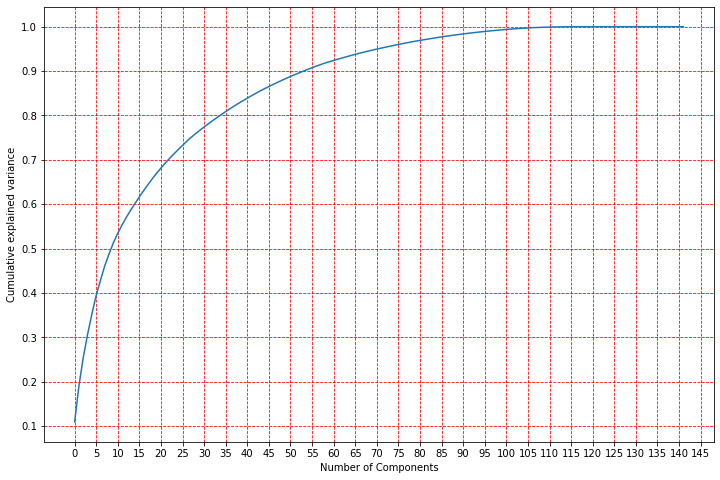

In [69]:
#Plot the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.grid(color='r', linestyle='--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 150, 5))
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

**From the above plot it is clear that 35 variables are able to explain 80% of data variance while 55 variables are able to explain 90% of data variance.**

In [70]:
#Since 90% data variance is expalined by 55 variables we will use that value for PCA shortlisting.
pca_55 = PCA(n_components=55)

In [71]:
#Fit PCA on train dataset which is balance using SMOTE earlier
df_train_pca_55 = pca_55.fit_transform(X_bal)
print(df_train_pca_55.shape)

(37606, 55)


In [72]:
#Fit PCA on test dataset 
df_test_pca_55 = pca_55.transform(X_test)


print(df_test_pca_55.shape)

(8538, 55)


### Handling Multi-Collinearity using PCA
Before proceeding lets check if there is any collinearity between the variables choosen

In [73]:
#creating correlation matrix for the principal components
corr_mat = np.corrcoef(df_train_pca_55.transpose())

<Figure size 4320x2160 with 0 Axes>

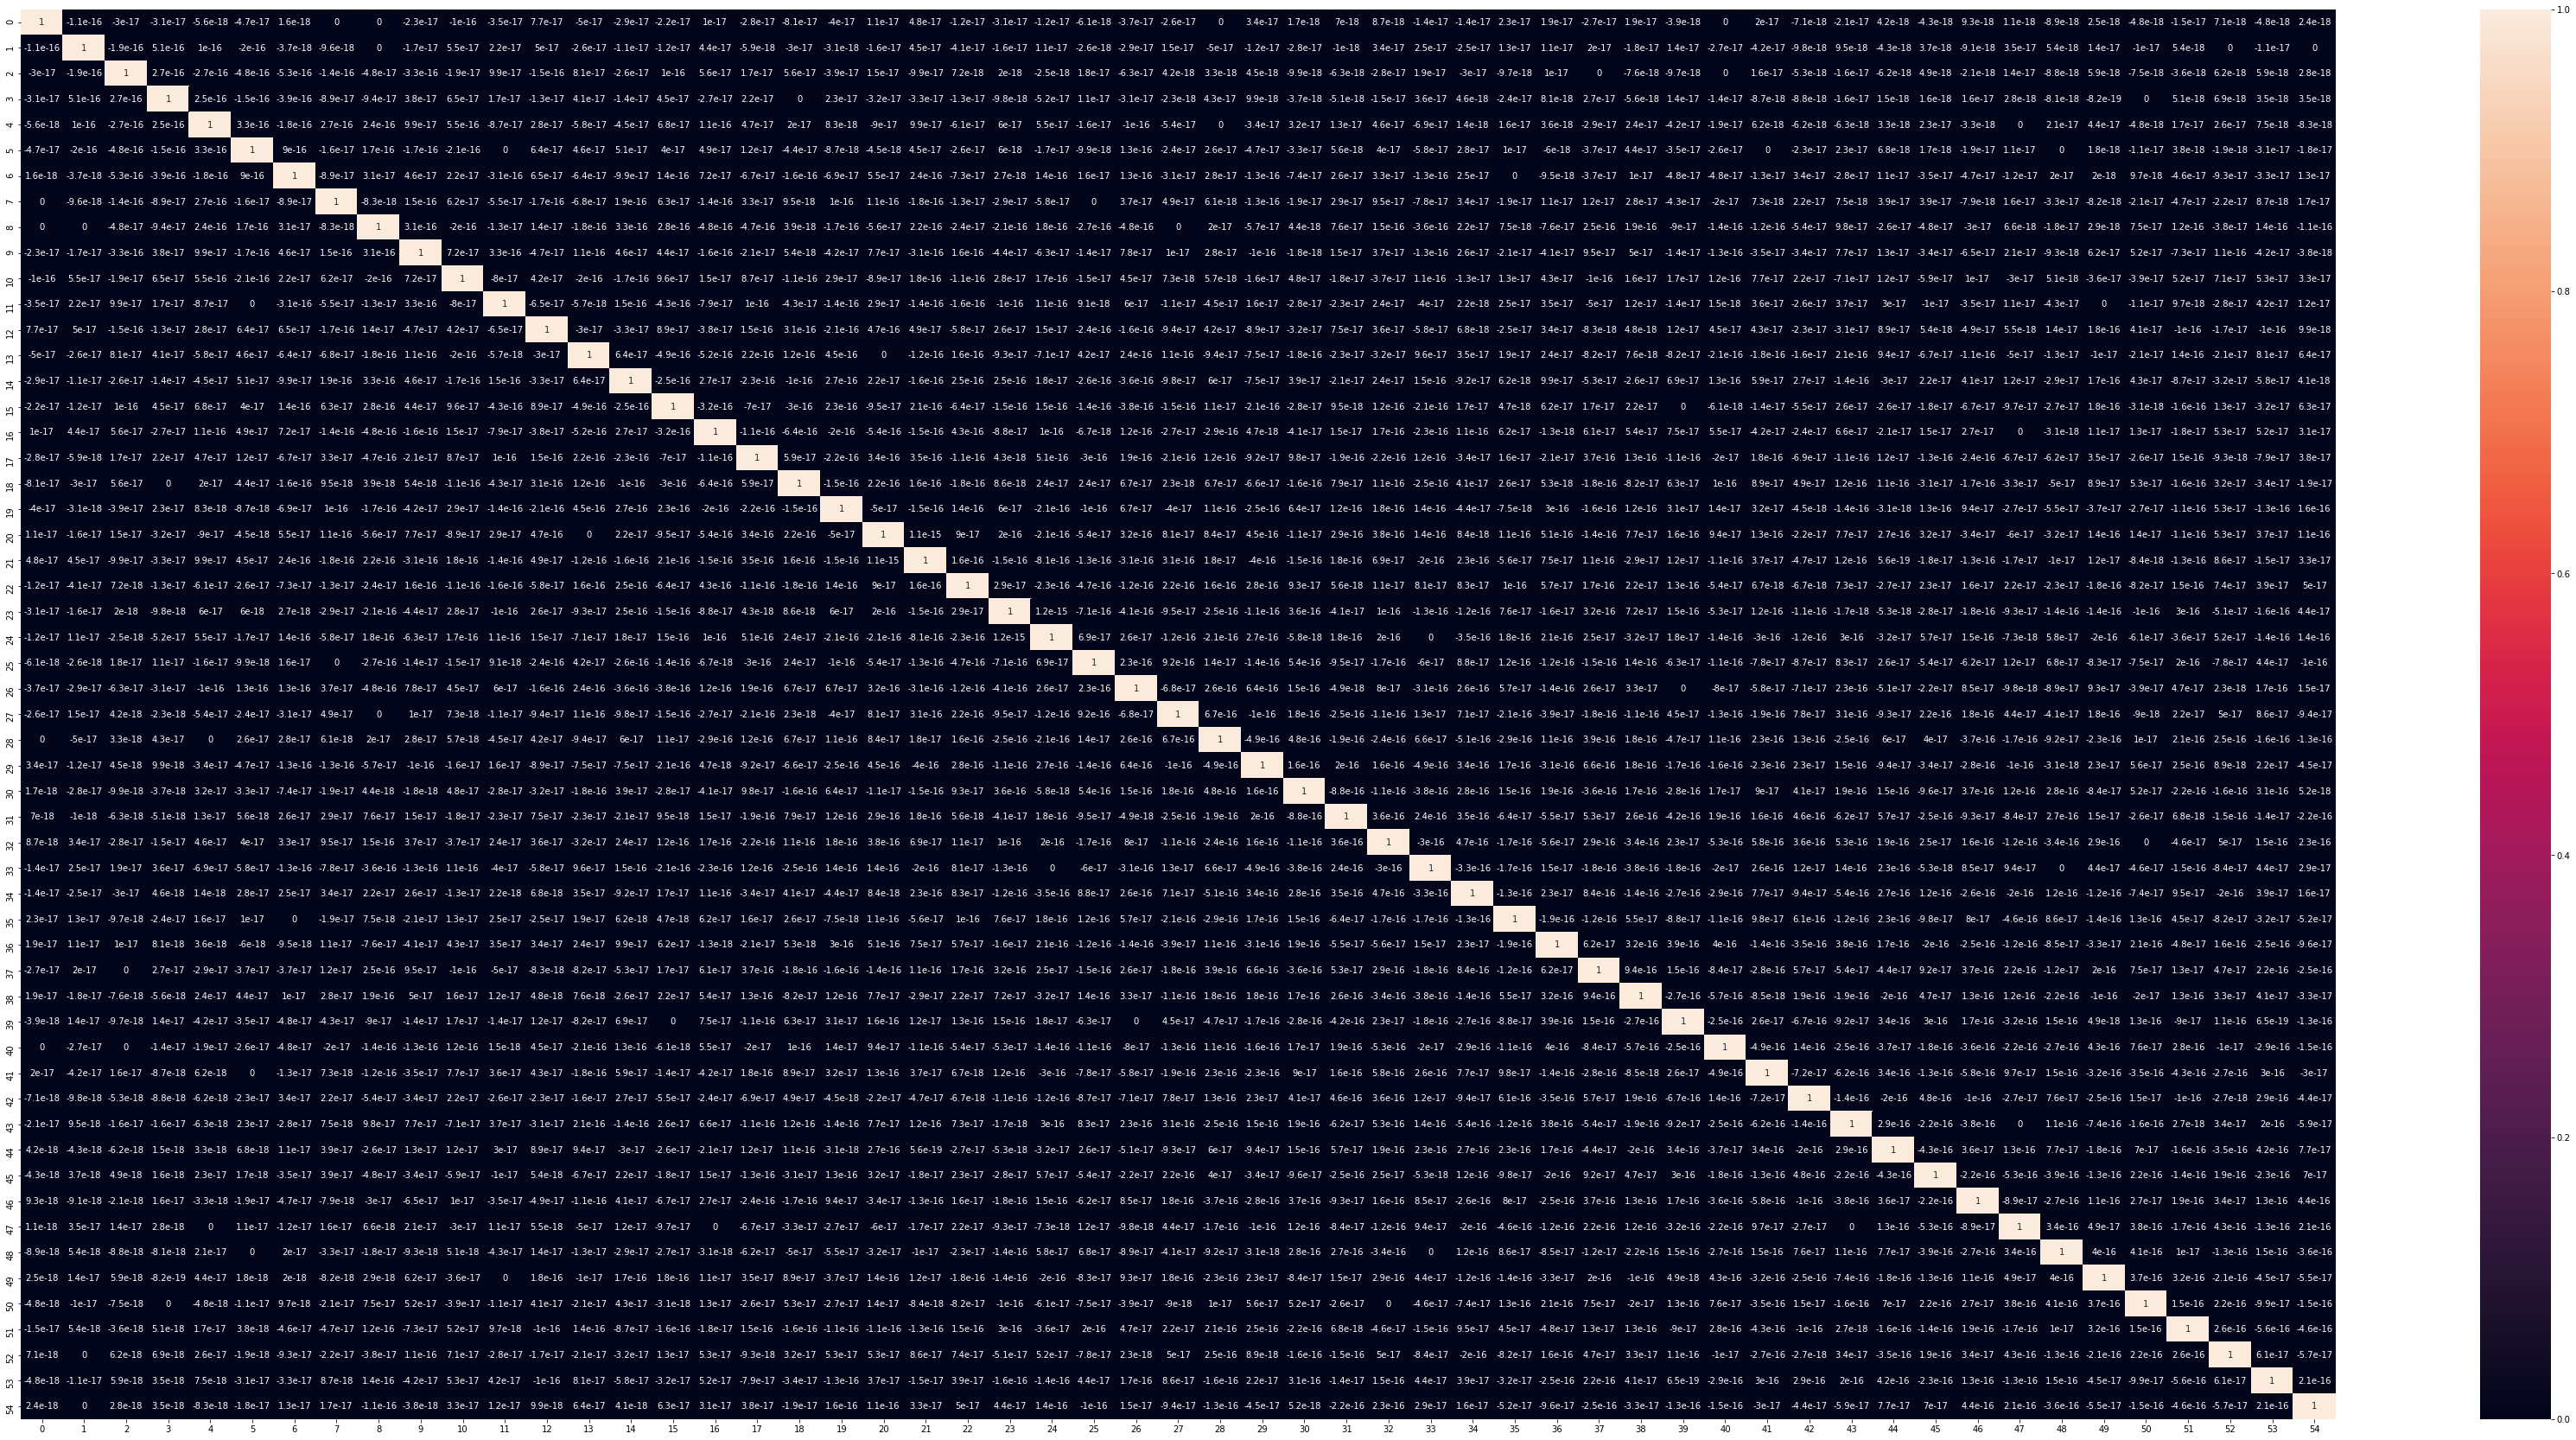

In [74]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (60,30))
sns.heatmap(corr_mat,annot = True)

In [75]:
# Check the correlation between variables
corrmat_nodiag = corr_mat - np.diagflat(corr_mat.diagonal())
print("max corr:",round(corrmat_nodiag.max(),2), ", min corr: ", round(corrmat_nodiag.min(),2),)

max corr: 0.0 , min corr:  -0.0


The correlation seems to equal to 0.
Seems there isnt any collinearity between the variables shortlisted by PCA. Hence we can safely use them for modelling.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca_55 = LogisticRegression()
lr_pca_55.fit(df_train_pca_55, y_bal)

# Predicted probabilities
y_pred_55 = lr_pca_55.predict(df_test_pca_55)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_55)

LogisticRegression()

In [77]:
# Check the confusion metric
cm = confusion_matrix(y_test,y_pred_55)
print(cm)

[[6638 1431]
 [ 107  362]]


In [78]:
print("Accaracy of Logistic Regression  with PCA (55 variables for 90% data variance): {0}%".format(round(accuracy_score(y_test,y_pred_55),2)*100))

Accaracy of Logistic Regression  with PCA (55 variables for 90% data variance): 82.0%


In [79]:
#Check other metrics
total = sum(sum(cm))

print("----------Metrcis of Logistic Regression with PCA-------------")
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy {0}%: '.format(round(accuracy,2)*100))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : {0}%'.format(round(sensitivity,2)*100))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : {0}%'.format(round(specificity,2)*100))

#Check Positives and Negatives
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

----------Metrcis of Logistic Regression with PCA-------------
Accuracy 82.0%: 
Sensitivity : 82.0%
Specificity : 77.0%
True positive =  6638
False positive =  1431
False negative =  107
True negative =  362


## Observations:

1. Running Logistic Regression with default PCA gives 82% accuracy.
2. Data is highly balanced and SMOTE is applied to balance the data and then used it for modelling.
3. 35 variables are able to explain 80% of data variance while 55 variables are able to explain 90% of data variance. We used 55 variables to model PCA.
4. There isnt any collinearity between the variables shortlisted by PCA. Hence PCA can handle multicollinearity properly.
5. With PCA and 55 variables the logistic regression model gives 81% accuracy.
6. Few shortlisted features by PCA are:                        
arpu_6,
arpu_7,
      arpu_8,
      onnet_mou_6,
      onnet_mou_7,
      onnet_mou_8,
     offnet_mou_6,
     offnet_mou_7,
     offnet_mou_8,
    roam_ic_mou_6,
    roam_ic_mou_7,
    roam_ic_mou_8,
    roam_og_mou_6,
    roam_og_mou_7,
    roam_og_mou_8,
 loc_og_t2t_mou_6,
 loc_og_t2t_mou_7,
 loc_og_t2t_mou_8,
 loc_og_t2m_mou_6,
 loc_og_t2m_mou_7


7. Still there are high number of false positives.


# Model 3: Random Forest Classifier

Now lets check how other ensemble technique like Random Forest CLassifier behaves. We will start with default parameters and later go on and tune the hyperparameters and see how the model accuracy behaves.

In [80]:
# Create RandomForest object with default parameters
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:1,1:2})

Since Random Forest Classifier is highly prone to class imbalance, we will adjust class_weight parameter as shown above to take care of class imbalance in the dataset. Since have already used SMOTE earlier in Logistic Regression PCA lets try out how the model performs with this attribute values.

In [81]:
#Fit the balanced dataset to the RandomForest Object
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2})

In [82]:
# Making predictions on train dataset
prediction_train = rfc.predict(X_train)

In [83]:
# Let's check the report of our default model on train dataset
import sklearn.metrics as metrics
print('---Classification Report in Train-------')
print(metrics.classification_report(y_train,prediction_train))
print('Accuracy Score on Train using RFC: ', accuracy_score(y_train,prediction_train))

---Classification Report in Train-------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18803
           1       1.00      1.00      1.00      1119

    accuracy                           1.00     19922
   macro avg       1.00      1.00      1.00     19922
weighted avg       1.00      1.00      1.00     19922

Accuracy Score on Train using RFC:  1.0


In [84]:
#Make predictions test dataset
prediction_test = rfc.predict(X_test)

# Let's check the report of our default model on train dataset
import sklearn.metrics as metrics
print('---Classification Report in Train-------')
print(metrics.classification_report(y_test,prediction_test))
print('Accuracy Score on Test using RFC: ', accuracy_score(y_test,prediction_test))

---Classification Report in Train-------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8069
           1       0.60      0.23      0.33       469

    accuracy                           0.95      8538
   macro avg       0.78      0.61      0.65      8538
weighted avg       0.94      0.95      0.94      8538

Accuracy Score on Test using RFC:  0.9492855469665027


The accuracy using default parameters on test dataset is approximately 94%. Now lets tune the hyperparameters and see if we can improve the accuracy of the model.

**NOTE**: The hyper parameter tuning code takes a bit of time. Please be patient!!!!

In [85]:
# Tuning Hyperparameter - max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
kfolds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1,1:2})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=kfolds, 
                   scoring="accuracy",
                return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight={0: 1, 1: 2}),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [86]:
# scores of max_depth
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.850610      0.128253         0.078106        0.009881   
1       8.310937      0.255769         0.084348        0.015923   
2      12.491237      0.293719         0.103093        0.021197   
3      13.648254      0.330291         0.109342        0.013980   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.950314           0.947302   
1               7   {'max_depth': 7}           0.950816           0.950063   
2              12  {'max_depth': 12}           0.949059           0.950816   
3              17  {'max_depth': 17}           0.949561           0.949059   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.951556           0.953564  ...         0.950608        0.002037   
1           0.951054           0.952560  ...         0.950909        0.000918   
2           0.952058           0.953313  ...         0.951109        0.001463   
3           0.952560           0.951807  ...         0.950457        0.001439   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.951308            0.950869   
1                2            0.958210            0.957457   
2                1            0.984313            0.983874   
3                4            0.998620            0.998557   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.951437            0.950558            0.950872   
1            0.957084            0.956958            0.958150   
2            0.984126            0.985130            0.985004   
3            0.997929            0.998682            0.997867   

   mean_train_score  std_train_score  
0          0.951009         0.000321  
1          0.957572         0.000524  
2          0.984489         0.000493  
3          0.998331         0.000356  

[4 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

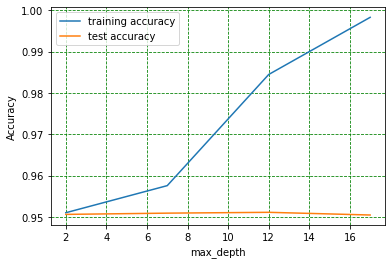

In [87]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(color='g', linestyle='--')
plt.legend()
plt.show()

From the plot above it seems like with max_depth of 2 we can get ~92% accuracy, with max_depth=7 ~accuracy is >92%. Beyond 7 the accuracy decreases.

In [88]:
# Tuning Hyperparameter: n_estimators. (number of trees)
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
kfolds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 10, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1,1:2})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=kfolds, 
                   scoring="accuracy",
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight={0: 1, 1: 2}),
             param_grid={'n_estimators': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [89]:
# scores of n_estimators
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.150962      0.006615         0.009372        0.007652   
1       0.283799      0.042840         0.010901        0.015243   
2       0.462392      0.021191         0.012497        0.006248   
3       0.604425      0.058201         0.003124        0.006248   
4       0.793690      0.074769         0.012495        0.006247   

  param_n_estimators               params  split0_test_score  \
0                  1  {'n_estimators': 1}           0.926223   
1                  2  {'n_estimators': 2}           0.942785   
2                  3  {'n_estimators': 3}           0.938519   
3                  4  {'n_estimators': 4}           0.946299   
4                  5  {'n_estimators': 5}           0.946048   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.921957           0.917922           0.921687  ...   
1           0.944040           0.946034           0.946034  ...   
2           0.939774           0.942771           0.942269  ...   
3           0.945546           0.946536           0.945281  ...   
4           0.948306           0.949548           0.944528  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.920992        0.003250                9            0.971827   
1         0.944785        0.001244                7            0.974525   
2         0.940669        0.001602                8            0.987953   
3         0.946040        0.000525                6            0.984250   
4         0.946792        0.001852                5            0.992282   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.971638            0.967562            0.969570   
1            0.974211            0.975154            0.974526   
2            0.988706            0.987075            0.988267   
3            0.984125            0.984063            0.982808   
4            0.993161            0.991843            0.992157   

   split4_train_score  mean_train_score  std_train_score  
0            0.969570          0.970033         0.001570  
1            0.975028          0.974689         0.000350  
2            0.986510          0.987702         0.000800  
3            0.985757          0.984201         0.000937  
4            0.992157          0.992320         0.000445  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

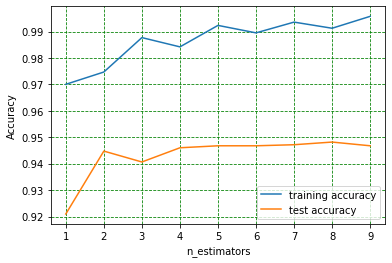

In [90]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(color='g', linestyle='--')
plt.legend()
plt.show()

From above plot it seems like setting:
n_estimators to 2 we get >94% accuracy which seems highest for test set.
Beyond 4 the accracy decreases and is constant.
We will use these parameters to fine tune later.

In [91]:
# Tuning hyperparameter: max_features
# This code execution takes a bit of time. Please be patient!!!!
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
kfolds = 5

# parameters to build the model on
parameters = {'max_features': [10, 25, 50, 75 , 100]} 

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1,1:2})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=kfolds, 
                   scoring="accuracy",
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight={0: 1, 1: 2}),
             param_grid={'max_features': [10, 25, 50, 75, 100]},
             return_train_score=True, scoring='accuracy')

In [92]:
# scores of max_features
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.386770      0.427937         0.118732        0.023381   
1      35.642059      1.188616         0.109416        0.009880   
2      73.072906      2.727670         0.096927        0.006378   
3     113.451489      4.787472         0.119933        0.029703   
4    3248.188300   6063.640677         0.356878        0.270479   

  param_max_features                 params  split0_test_score  \
0                 10   {'max_features': 10}           0.949310   
1                 25   {'max_features': 25}           0.948808   
2                 50   {'max_features': 50}           0.948055   
3                 75   {'max_features': 75}           0.947051   
4                100  {'max_features': 100}           0.946048   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.947804           0.952560           0.951807  ...   
1           0.947302           0.953062           0.950301  ...   
2           0.949561           0.952811           0.951305  ...   
3           0.949059           0.952811           0.950552  ...   
4           0.948055           0.953062           0.952058  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.950106        0.001787                1            1.000000   
1         0.949654        0.001950                3            1.000000   
2         0.950106        0.001731                2            0.999937   
3         0.949503        0.002019                5            0.999937   
4         0.949604        0.002596                4            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000                 1.0            1.000000   
1            0.999937                 1.0            0.999937   
2            1.000000                 1.0            1.000000   
3            0.999937                 1.0            0.999937   
4            0.999875                 1.0            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.999937          0.999987         0.000025  
1            1.000000          0.999975         0.000031  
2            1.000000          0.999987         0.000025  
3            1.000000          0.999962         0.000031  
4            1.000000          0.999975         0.000050  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

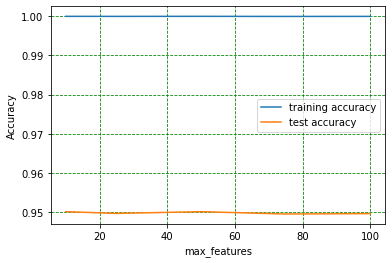

In [93]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.grid(color='g', linestyle='--')
plt.legend()
plt.show()

From above plot it is clear that with max_features ~25 gives more accuracy on test data beyond that accuracy decreases. So we will use this for fine tuning.


Based on the above observations lets use the shortlisted values to build the model.

In [94]:
# Create the parameter grid based on the results of random search  
param_grid = {     'max_depth': [2,4,6],
                   'n_estimators': [2,3,4],
                   'max_features': [5,25,50] } 

# Create a based model 
rf = RandomForestClassifier(class_weight={0:1,1:2}) 

# Instantiate the grid search 
model_GSV = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1,verbose = 1) 

# Fit the grid search to the data grid_search.fit(X_train, y_train) 
model_GSV.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight={0: 1, 1: 2}),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [5, 25, 50],
                         'n_estimators': [2, 3, 4]},
             verbose=1)

In [95]:
#Find the best values for parameters.
print('We can get accuracy of',model_GSV.best_score_,'using',model_GSV.best_params_)

We can get accuracy of 0.9505572432781872 using {'max_depth': 4, 'max_features': 50, 'n_estimators': 4}


In [96]:
# model with the best hyperparameters from sklearn.ensemble
rfc_best = RandomForestClassifier(bootstrap=True,         max_depth=4,
                                                           max_features=25,
                                                           n_estimators=4,
                                                            class_weight={0:1,1:2}) 
rfc_best.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=4, max_features=25,
                       n_estimators=4)

In [97]:
# Making predictions
y_pred_test = rfc_best.predict(X_test)

In [98]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8069
           1       0.57      0.28      0.38       469

    accuracy                           0.95      8538
   macro avg       0.76      0.63      0.67      8538
weighted avg       0.94      0.95      0.94      8538



In [99]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
print(cm)

[[7968  101]
 [ 337  132]]


In [100]:
print(accuracy_score(y_test,y_pred_test))

0.9486999297259311


In [101]:
#Check other metrics
total = sum(sum(cm))

print("----------Metrcis of Random Forest Classifier-------------")
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy {0}%: '.format(round(accuracy,2)*100))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : {0}%'.format(round(sensitivity,2)*100))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : {0}%'.format(round(specificity,2)*100))

#Check Positives and Negatives
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

----------Metrcis of Random Forest Classifier-------------
Accuracy 95.0%: 
Sensitivity : 99.0%
Specificity : 28.000000000000004%
True positive =  7968
False positive =  101
False negative =  337
True negative =  132


In [102]:
import pandas as pd
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = df_telecom_data.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [103]:
feature_importances.head(20)

importance
total_ic_mou_8           0.046154
loc_ic_mou_8             0.038762
loc_ic_t2m_mou_8         0.033814
roam_og_mou_8            0.033714
roam_ic_mou_8            0.024483
recharge_day_8           0.023843
last_day_rch_amt_8       0.023502
total_rech_amt_8         0.021899
total_og_mou_8           0.019415
arpu_8                   0.018682
loc_og_mou_8             0.018480
loc_og_t2t_mou_8         0.015621
loc_ic_t2t_mou_8         0.015258
total_rech_data_amt_8    0.014410
loc_og_t2m_mou_8         0.014158
std_ic_mou_8             0.011426
total_rech_num_7         0.011418
roam_og_mou_7            0.010384
std_og_mou_7             0.010316
offnet_mou_8             0.010307

## Observation:

1. Using Random Forest Classifier we get the Accracy of 95%
2. The false positives are less (just 90) as compare to Logistic Regression.
3. The features detected by Random Forest Classifier are:
total_ic_mou_8
,roam_og_mou_8
,loc_ic_t2t_mou_8
,recharge_day_8
,total_rech_amt_8
,last_day_rch_amt_8
,loc_og_t2m_mou_8
,loc_ic_t2m_mou_8
,loc_og_mou_8
,roam_ic_mou_8
,loc_og_t2t_mou_8
,loc_ic_mou_8
,total_ic_mou_7
,total_rech_num_7
,std_og_mou_6
,arpu_8
,total_rech_num_6
,total_og_mou_6
,total_og_mou_8
,loc_ic_t2m_mou_7



# Model 4 - XGBoost Modelling

Since we are done with modelling using basic logistic regression and Random Forrest Classifier lets check how the accuracy of model behaves with ensemble technique called as XGBoost. 

Instead of using SMOTE for data balancing we will use the XGBoost attribute

scale_pos_weight which is basically calculated by number of negatives/number of positives.

Here that is the churn rate and it is calculated a 6% earlier so we will use scale_pos_weight=0.06 to handle the class imsbalance in the dataset and then train the model.

In [105]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [106]:
# fit model on training data with default hyperparameters and scale_pos_weight to 0.06 to handle class imbalance
xgb_model = XGBClassifier(scale_pos_weight=0.06)
xgb_model.fit(X_train, y_train)

[16:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.06, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
# make predictions for test data
# use predict_proba since we need probabilities to compute AUC
y_pred = xgb_model.predict_proba(X_test)
y_pred[:10]

array([[9.9974722e-01, 2.5277771e-04],
       [9.9441081e-01, 5.5891587e-03],
       [9.9989903e-01, 1.0098837e-04],
       [9.9991739e-01, 8.2617851e-05],
       [9.9334270e-01, 6.6573103e-03],
       [8.8028598e-01, 1.1971403e-01],
       [9.7935605e-01, 2.0643950e-02],
       [9.9997395e-01, 2.6022592e-05],
       [9.9767137e-01, 2.3286263e-03],
       [9.7189862e-01, 2.8101370e-02]], dtype=float32)

In [108]:
# evaluate predictions using AUC metric
import sklearn.metrics as metrics
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("Area under the curve: %.2f%%" % (roc * 100.0))

Area under the curve: 92.16%


Are under the curve is 93% which is pretty good. Now lets tune the hyperparameters and see how the model improves.

In [109]:
#Hyperparameter tuning with XGBoost using GridSearch
from sklearn.model_selection import GridSearchCV

#creating 3 Fold object 
kfolds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        return_train_score=True)  

Here for tuning the hyperparameters we have set the learning rate value to 0.2 and 0.6 which is pretty standard and subsample value to 0.3, 0.6 and 0.9.

In [110]:
#fit the model for the defined parameters
#This step takes approx 6 to 7 mins for execution. Please be pateint !!!!!!

xgb_model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[16:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:18]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [111]:
#Check the tuning results
cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.608745      0.855012         0.247119        0.170644   
1      11.260916      0.022971         0.067810        0.051479   
2      12.207232      0.394176         0.044743        0.012881   
3       9.057842      0.241589         0.086001        0.032709   
4      11.499320      0.490238         0.029804        0.002034   
5      12.567092      1.233585         0.032796        0.002197   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.916830   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.919448   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.921548   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.862219   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.892882   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.898762   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.908157           0.913606         0.912865        0.003579   
1           0.915320           0.924724         0.919831        0.003849   
2           0.922950           0.928007         0.924168        0.002774   
3           0.858788           0.847821         0.856276        0.006141   
4           0.899761           0.899262         0.897302        0.003132   
5           0.903146           0.904981         0.902297        0.002609   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.970855            0.974311   
1                2            0.977299            0.978391   
2                1            0.977070            0.978434   
3                6            0.974780            0.975255   
4                5            0.993921            0.993745   
5                4            0.996663            0.996674   

   split2_train_score  mean_train_score  std_train_score  
0            0.972159          0.972442         0.001425  
1            0.978020          0.977903         0.000453  
2            0.977723          0.977742         0.000557  
3            0.970554          0.973530         0.002113  
4            0.994874          0.994180         0.000496  
5            0.996589          0.996642         0.000038

<Figure size 1152x432 with 0 Axes>

Text(0.5, 0, 'learning_rate')

Text(0, 0.5, 'AUC')

Text(0.5, 1.0, 'subsample=0.3')

(0.6, 1.0)

Text(0.5, 0, 'learning_rate')

Text(0, 0.5, 'AUC')

Text(0.5, 1.0, 'subsample=0.6')

(0.6, 1.0)

Text(0.5, 0, 'learning_rate')

Text(0, 0.5, 'AUC')

Text(0.5, 1.0, 'subsample=0.9')

(0.6, 1.0)

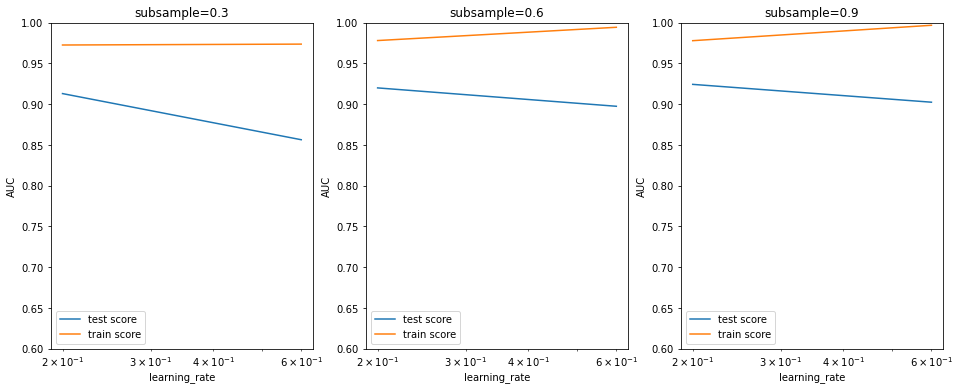

In [112]:
#Plot the results
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param_grid['subsample']):
    plt.subplot(1,len(param_grid['subsample']), n+1)
    plot_df = cv_results[cv_results['param_subsample']==subsample]
    plt.plot(plot_df["param_learning_rate"], plot_df["mean_test_score"])
    plt.plot(plot_df["param_learning_rate"], plot_df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.xscale('log')
    plt.legend(['test score', 'train score'], loc='lower left')
    


From the above graph it is clear that with learning_rate of 0.2 and subsample of 0.9, the model produces higher AUC. So we will use these params to build the final model.

In [113]:
# Build Model with chosen params
#We use default max_depth and n_estimators here
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_tune = XGBClassifier(params = params)
xgb_model_tune.fit(X_train, y_train)

[16:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Now lets ROC score/Area under the curve of this tuned model.


In [114]:
# predict
#y_pred_actual was for the predictions in terms of churns
#y_pred_prob is for probabilistic predictions used for AUC.

y_pred_actual = xgb_model_tune.predict(X_test)
y_pred_prob = xgb_model_tune.predict_proba(X_test)

In [115]:
# Area under curve
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_prob[:, 1])
print("Area Under Curve of Tuned Model is: {0}%".format(round(auc,2)*100))

Area Under Curve of Tuned Model is: 92.0%


Now make predictions based on this tuned model for test dataset.

In [116]:
#y_pred_actual was for the predictions interms of churns
#y_pred_prob is for probabilistic predictions used for AUC.
y_pred_actual = xgb_model_tune.predict(X_test)
y_pred_prob = xgb_model_tune.predict_proba(X_test)
y_pred_prob[:10]

array([[9.9942499e-01, 5.7499739e-04],
       [9.8705262e-01, 1.2947374e-02],
       [9.9973273e-01, 2.6729034e-04],
       [9.9995047e-01, 4.9509723e-05],
       [9.8763269e-01, 1.2367303e-02],
       [4.0531880e-01, 5.9468120e-01],
       [9.9160141e-01, 8.3986055e-03],
       [9.9955434e-01, 4.4565278e-04],
       [9.9043882e-01, 9.5611606e-03],
       [8.9332443e-01, 1.0667557e-01]], dtype=float32)

In [117]:
#Check other metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred_actual)

print("-----Metrics for XGBoost----------")

print(cm)


total =sum(sum(cm))
accuracy =(cm[0,0]+cm[1,1])/total
print ('Accuracy : {0}% '.format(round(accuracy,2)*100))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : {0}%'.format(round(sensitivity,2)*100))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : {0}%'.format(round(specificity,2)*100))

#Check Positives and Negatives
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

-----Metrics for XGBoost----------
[[7968  101]
 [ 319  150]]
Accuracy : 95.0% 
Sensitivity : 99.0%
Specificity : 32.0%
True positive =  7968
False positive =  101
False negative =  319
True negative =  150


In [118]:
# Shortlist the feature according to importance
important_features = dict(zip(df_telecom_data.columns, xgb_model_tune.feature_importances_))
important_features

{'arpu_6': 0.004241161,
 'arpu_7': 0.0066250768,
 'arpu_8': 0.007294588,
 'onnet_mou_6': 0.006218059,
 'onnet_mou_7': 0.0050647506,
 'onnet_mou_8': 0.003580732,
 'offnet_mou_6': 0.0033592947,
 'offnet_mou_7': 0.004138587,
 'offnet_mou_8': 0.00435578,
 'roam_ic_mou_6': 0.0057999888,
 'roam_ic_mou_7': 0.007072345,
 'roam_ic_mou_8': 0.012985638,
 'roam_og_mou_6': 0.0057281237,
 'roam_og_mou_7': 0.0103339655,
 'roam_og_mou_8': 0.021518232,
 'loc_og_t2t_mou_6': 0.004196164,
 'loc_og_t2t_mou_7': 0.0044087754,
 'loc_og_t2t_mou_8': 0.0066216434,
 'loc_og_t2m_mou_6': 0.0038063382,
 'loc_og_t2m_mou_7': 0.005361656,
 'loc_og_t2m_mou_8': 0.004459402,
 'loc_og_t2f_mou_6': 0.0045134476,
 'loc_og_t2f_mou_7': 0.003899873,
 'loc_og_t2f_mou_8': 0.010344706,
 'loc_og_t2c_mou_6': 0.0030050538,
 'loc_og_t2c_mou_7': 0.004942965,
 'loc_og_t2c_mou_8': 0.005077278,
 'loc_og_mou_6': 0.004468283,
 'loc_og_mou_7': 0.0048743556,
 'loc_og_mou_8': 0.00834411,
 'std_og_t2t_mou_6': 0.004641249,
 'std_og_t2t_mou_7': 0.

In [119]:
#Sort the shortlisted features as per importance
import operator
columns_sorted_desc_importance = sorted(important_features.items(), key=operator.itemgetter(1),reverse=True)

In [120]:
columns_sorted_desc_importance[:20]

[('fb8_1.0', 0.1307024),
 ('total_ic_mou_8', 0.057425626),
 ('loc_ic_mou_8', 0.043099012),
 ('total_rech_data_amt_8', 0.026910786),
 ('roam_og_mou_8', 0.021518232),
 ('last_day_rch_amt_8', 0.01843186),
 ('recharge_day_8', 0.01399154),
 ('roam_ic_mou_8', 0.012985638),
 ('spl_ic_mou_8', 0.012846583),
 ('total_rech_num_7', 0.012648453),
 ('std_og_mou_7', 0.012452624),
 ('vol_3g_mb_8', 0.011812527),
 ('loc_og_t2f_mou_8', 0.010344706),
 ('roam_og_mou_7', 0.0103339655),
 ('max_rech_amt_8', 0.009872534),
 ('isd_og_mou_6', 0.0090286),
 ('monthly_3g_6', 0.008858016),
 ('isd_og_mou_8', 0.0086395675),
 ('ic_others_7', 0.008417688),
 ('sachet_3g_7', 0.008391466)]

# Observations:

1. We used scale_pos_weight attribute of XGBoost to handle the class imbalance issue.
2. By using the ensemble technique like XGBoost we are able to bump up the accuracy to 95% which is highest among the models used until now.
3. The False positives are reduced to 100 on test dataset
4. The top features identified by XGBoost are:
'total_ic_mou_8', 
'total_rech_data_amt_8',
'loc_ic_mou_8', 
'roam_og_mou_8',
'fb8_1.0', 
'total_rech_num_7', 
'loc_og_mou_8', 
'loc_og_t2f_mou_8', 
'last_day_rch_amt_8',
'roam_ic_mou_8', 
'std_og_mou_7', 
'total_rech_amt_8', 
'recharge_day_8', 
'arpu_8', 
'vol_3g_mb_8', 
'total_rech_num_6', 
'loc_ic_mou_7', 
'vol_2g_mb_8', 
'arpu_7', 
'loc_og_t2t_mou_7'

# Summary

1. The dataset given here has high rate of class imbalance. Using the dataset as it is would have given us incorect results since most of the models would have been alligned to the class with highest value. So we used data balancing technique like oversampling to balance the dataset and then build the models.

2. We tested out 4 different models for building the churn prediction model.

3. Logistic Regression with RFE and Logistic Regression with PCA by considering 55 variables that explained 90% of data variance, which gave us the Accuracy of 82% and high number of false positives. We need to keep the value of false positive to minimum to correctkly identify the churn customers.

4. Random Forest Classifier gave us the accuracy of 95% and false positives to just 83 which was lowest among all the models.

5. XGBoost also gave us the accuracy of 95% and false positives  to 106 which was second lowest among the models tested.

6. Based on the above observation seems like Random Forest Classifier and XGBoost are the best models to work with for this business problem.

7. Based on the features identified we have shortlisted the features which are most common in the models tested above. These features are:total_ic_mou_8
,total_rech_data_amt_8
,total_rech_num_7
,loc_og_mou_8
,last_day_rch_amt_8
,roam_ic_mou_8
,total_rech_amt_8
,recharge_day_8
,arpu_8
,total_rech_num_6
,loc_ic_mou_8
,roam_og_mou_8,aon_years

# Recommendations

Following are the recommendations suggested based on the observations from the models tested:

1. Since most of the features identified by the models are based on incoming, outgoing and roaming, we recommend offering discounted rates for incoming and outgoing calls locally and also discounted rates for incoming and outgoing while roaming.

2. The second feature identified is based on total recharges done for data packs and calling. We recommend monitoring the total recharges done by customer and if the customer tends to recharge with less amount in the action phase, then offer additional data and talktime for these customers to retain them. May be exclusive one time offers which would give free data and calling by recharging minimum amount would address this issue.

3. Give additional or exclsuive offers to the cutomers who have been with the network for the longest of time. Based on the  modelling data the customers who are with network for minimum of 3 months should be attracted with these offers.

4. For the action phase give additional talktime, data and release exclusive offers to retain the customers.

5. Monitor the activity of the customers. If the date of last recharge is more than average i.e. if the customer who usually recharges within the first week of the month misses the deadline and doesnt recharge for another week, its a red flag. Get in touch with the customer and address the necessary issues the customer is facing. So monitoring the date of last recharge is also crucial.

6. Also as observed from the data analysis above customers are more prone to churning if there usage drops as the months go by. If the usgae by customer is significantly less in the subsequent months, get in touch with the customer to know the issues and get them resolved to avoid the churn.

7. Another important metric is ARPU. If the average revenue per user for the 7th and 8th month is less than compared to the 6th month, its red flag for churn and the necessary action as said above should be taken.